pyright:  reportUnusedExpression=false

In [1]:
# Copyright (c) Microsoft Corporation.
# Licensed under the MIT License.

"""Tabular Q-learning agent (notebook)

This notebooks can be run directly from VSCode, to generate a
traditional Jupyter Notebook to open in your browser
 you can run the VSCode command `Export Currenty Python File As Jupyter Notebook`.
"""

# pylint: disable=invalid-name

'Tabular Q-learning agent (notebook)\n\nThis notebooks can be run directly from VSCode, to generate a\ntraditional Jupyter Notebook to open in your browser\n you can run the VSCode command `Export Currenty Python File As Jupyter Notebook`.\n'

In [2]:
import sys
import os
import logging
from typing import cast
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt # type: ignore
from cyberbattle.agents.baseline.learner import TrainedLearner
import cyberbattle.agents.baseline.plotting as p
import cyberbattle.agents.baseline.agent_wrapper as w
import cyberbattle.agents.baseline.agent_tabularqlearning as a
from cyberbattle.agents.baseline.agent_wrapper import Verbosity
import cyberbattle.agents.baseline.learner as learner
import cyberbattle._env.cyberbattle_env as cyberbattle_env
from cyberbattle._env.cyberbattle_env import AttackerGoal

logging.basicConfig(stream=sys.stdout, level=logging.ERROR, format="%(levelname)s: %(message)s")

In [3]:
%matplotlib inline

In [4]:
# Benchmark parameters:
#   Parameters from DeepDoubleQ paper
#    - learning_rate = 0.00025
#    - linear epsilon decay
#    - gamma = 0.99
#   Eliminated gamma_values
#       0.0,
#       0.0015,  # too small
#       0.15,  # too big
#       0.25,  # too big
#       0.35,  # too big
#
# NOTE: Given the relatively low number of training episodes (50,
# a high learning rate of .99 gives better result
# than a lower learning rate of 0.25 (i.e. maximal rewards reached faster on average).
# Ideally we should decay the learning rate just like gamma and train over a
# much larger number of episodes

cyberbattlechain_10 = gym.make("CyberBattleChain-v0", size=10, attacker_goal=AttackerGoal(own_atleast_percent=1.0)).unwrapped

assert isinstance(cyberbattlechain_10, cyberbattle_env.CyberBattleEnv)

ep = w.EnvironmentBounds.of_identifiers(maximum_node_count=12, maximum_total_credentials=12, identifiers=cyberbattlechain_10.identifiers)

/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/envs/registration.py:481: UserWarning: WARN: The environment creator metadata doesn't include `render_modes`, contains: ['render.modes']
  logger.warn(


In [5]:
iteration_count = 9000
training_episode_count = 5
eval_episode_count = 5
gamma_sweep = [
    0.015,  # about right
]
plots_dir = 'output/plots'

In [6]:
# Parameters
plots_dir = "notebooks/output/benchmark/plots"


In [7]:
os.makedirs(plots_dir, exist_ok=True)

In [8]:
def qlearning_run(gamma, gym_env):
    """Execute one run of the q-learning algorithm for the
    specified gamma value"""
    return learner.epsilon_greedy_search(
        gym_env,
        ep,
        a.QTabularLearner(ep, gamma=gamma, learning_rate=0.90, exploit_percentile=100),
        episode_count=training_episode_count,
        iteration_count=iteration_count,
        epsilon=0.90,
        render=False,
        epsilon_multdecay=0.75,  # 0.999,
        epsilon_minimum=0.01,
        verbosity=Verbosity.Quiet,
        title="Q-learning",
    )

###### Q-learning
Learning with: episode_count=5,iteration_count=9000,ϵ=0.9,ϵ_min=0.01, ϵ_multdecay=0.75,γ=0.015,learning_rate=0.9,Q%=100
  ## Episode: 1/5 'Q-learning' ϵ=0.9000, γ=0.015,learning_rate=0.9,Q%=100


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 11|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 11|reward:   14.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 1|Iteration 12|reward:   16.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 1|Iteration 12|reward:   16.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 1|Iteration 15|reward:   20.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 1|Iteration 15|reward:   20.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 1|Iteration 18|reward:  120.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 1|Iteration 18|reward:  120.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 1|Iteration 44|reward:  131.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 1|Iteration 44|reward:  131.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 1|Iteration 45|reward:  137.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 1|Iteration 45|reward:  137.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 1|Iteration 50|reward:  146.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 1|Iteration 50|reward:  146.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 1|Iteration 53|reward:  246.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 1|Iteration 53|reward:  246.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 1|Iteration 72|reward:  260.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 1|Iteration 72|reward:  260.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 1|Iteration 76|reward:  360.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 1|Iteration 76|reward:  360.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 1|Iteration 77|reward:  366.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 1|Iteration 77|reward:  366.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 1|Iteration 79|reward:  377.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 1|Iteration 79|reward:  377.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 1|Iteration 85|reward:  386.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 1|Iteration 85|reward:  386.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 1|Iteration 92|reward:  392.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 1|Iteration 92|reward:  392.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 1|Iteration 94|reward:  400.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 1|Iteration 94|reward:  400.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 1|Iteration 95|reward:  500.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 1|Iteration 95|reward:  500.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 1|Iteration 105|reward:  502.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 1|Iteration 105|reward:  502.0|last_reward_at:  105|Elapsed Time: 0:00:00||

Episode 1|Iteration 121|reward:  508.0|last_reward_at:  105|Elapsed Time: 0:00:00||

Episode 1|Iteration 121|reward:  508.0|last_reward_at:  121|Elapsed Time: 0:00:00||

Episode 1|Iteration 136|reward:  519.0|last_reward_at:  121|Elapsed Time: 0:00:00||

Episode 1|Iteration 136|reward:  519.0|last_reward_at:  136|Elapsed Time: 0:00:00||

Episode 1|Iteration 144|reward:  521.0|last_reward_at:  136|Elapsed Time: 0:00:00||

Episode 1|Iteration 144|reward:  521.0|last_reward_at:  144|Elapsed Time: 0:00:00||

Episode 1|Iteration 148|reward:  525.0|last_reward_at:  144|Elapsed Time: 0:00:00||

Episode 1|Iteration 148|reward:  525.0|last_reward_at:  148|Elapsed Time: 0:00:00||

Episode 1|Iteration 149|reward:  527.0|last_reward_at:  148|Elapsed Time: 0:00:00||

Episode 1|Iteration 149|reward:  527.0|last_reward_at:  149|Elapsed Time: 0:00:00||

Episode 1|Iteration 190|reward:  527.0|last_reward_at:  149|Elapsed Time: 0:00:00||

Episode 1|Iteration 228|reward:  527.0|last_reward_at:  149|Elapsed Time: 0:00:00||

Episode 1|Iteration 268|reward:  527.0|last_reward_at:  149|Elapsed Time: 0:00:00||

Episode 1|Iteration 306|reward:  527.0|last_reward_at:  149|Elapsed Time: 0:00:00||

Episode 1|Iteration 318|reward:  536.0|last_reward_at:  149|Elapsed Time: 0:00:00||

Episode 1|Iteration 318|reward:  536.0|last_reward_at:  318|Elapsed Time: 0:00:00||

Episode 1|Iteration 337|reward:  636.0|last_reward_at:  318|Elapsed Time: 0:00:00||

Episode 1|Iteration 337|reward:  636.0|last_reward_at:  337|Elapsed Time: 0:00:00||

Episode 1|Iteration 369|reward:  636.0|last_reward_at:  337|Elapsed Time: 0:00:01||

Episode 1|Iteration 371|reward:  650.0|last_reward_at:  337|Elapsed Time: 0:00:01||

Episode 1|Iteration 371|reward:  650.0|last_reward_at:  371|Elapsed Time: 0:00:01||

Episode 1|Iteration 374|reward:  750.0|last_reward_at:  371|Elapsed Time: 0:00:01||

Episode 1|Iteration 374|reward:  750.0|last_reward_at:  374|Elapsed Time: 0:00:01||

Episode 1|Iteration 389|reward:  756.0|last_reward_at:  374|Elapsed Time: 0:00:01||

Episode 1|Iteration 389|reward:  756.0|last_reward_at:  389|Elapsed Time: 0:00:01||

Episode 1|Iteration 396|reward:  762.0|last_reward_at:  389|Elapsed Time: 0:00:01||

Episode 1|Iteration 396|reward:  762.0|last_reward_at:  396|Elapsed Time: 0:00:01||

Episode 1|Iteration 433|reward:  762.0|last_reward_at:  396|Elapsed Time: 0:00:01||

Episode 1|Iteration 434|reward:  773.0|last_reward_at:  396|Elapsed Time: 0:00:01||

Episode 1|Iteration 434|reward:  773.0|last_reward_at:  434|Elapsed Time: 0:00:01||

Episode 1|Iteration 449|reward:  777.0|last_reward_at:  434|Elapsed Time: 0:00:01||

Episode 1|Iteration 449|reward:  777.0|last_reward_at:  449|Elapsed Time: 0:00:01||

Episode 1|Iteration 451|reward:  783.0|last_reward_at:  449|Elapsed Time: 0:00:01||

Episode 1|Iteration 451|reward:  783.0|last_reward_at:  451|Elapsed Time: 0:00:01||

Episode 1|Iteration 463|reward:  785.0|last_reward_at:  451|Elapsed Time: 0:00:01||

Episode 1|Iteration 463|reward:  785.0|last_reward_at:  463|Elapsed Time: 0:00:01||

Episode 1|Iteration 476|reward:  794.0|last_reward_at:  463|Elapsed Time: 0:00:01||

Episode 1|Iteration 476|reward:  794.0|last_reward_at:  476|Elapsed Time: 0:00:01||

Episode 1|Iteration 479|reward:  894.0|last_reward_at:  476|Elapsed Time: 0:00:01||

Episode 1|Iteration 479|reward:  894.0|last_reward_at:  479|Elapsed Time: 0:00:01||

Episode 1|Iteration 506|reward:  894.0|last_reward_at:  479|Elapsed Time: 0:00:01||

Episode 1|Iteration 511|reward:  905.0|last_reward_at:  479|Elapsed Time: 0:00:01||

Episode 1|Iteration 511|reward:  905.0|last_reward_at:  511|Elapsed Time: 0:00:01||

Episode 1|Iteration 532|reward:  913.0|last_reward_at:  511|Elapsed Time: 0:00:01||

Episode 1|Iteration 532|reward:  913.0|last_reward_at:  532|Elapsed Time: 0:00:01||

Episode 1|Iteration 541|reward:  919.0|last_reward_at:  532|Elapsed Time: 0:00:01||

Episode 1|Iteration 541|reward:  919.0|last_reward_at:  541|Elapsed Time: 0:00:01||

Episode 1|Iteration 560|reward:  928.0|last_reward_at:  541|Elapsed Time: 0:00:01||

Episode 1|Iteration 560|reward:  928.0|last_reward_at:  560|Elapsed Time: 0:00:01||

Episode 1|Iteration 570|reward: 1028.0|last_reward_at:  560|Elapsed Time: 0:00:01||

Episode 1|Iteration 570|reward: 1028.0|last_reward_at:  570|Elapsed Time: 0:00:01||

Episode 1|Iteration 578|reward: 1039.0|last_reward_at:  570|Elapsed Time: 0:00:01||

Episode 1|Iteration 578|reward: 1039.0|last_reward_at:  578|Elapsed Time: 0:00:01||

Episode 1|Iteration 580|reward: 1041.0|last_reward_at:  578|Elapsed Time: 0:00:01||

Episode 1|Iteration 580|reward: 1041.0|last_reward_at:  580|Elapsed Time: 0:00:01||

Episode 1|Iteration 602|reward: 1045.0|last_reward_at:  580|Elapsed Time: 0:00:01||

Episode 1|Iteration 602|reward: 1045.0|last_reward_at:  602|Elapsed Time: 0:00:01||

Episode 1|Iteration 620|reward: 1054.0|last_reward_at:  602|Elapsed Time: 0:00:01||

Episode 1|Iteration 620|reward: 1054.0|last_reward_at:  620|Elapsed Time: 0:00:01||

Episode 1|Iteration 640|reward: 1154.0|last_reward_at:  620|Elapsed Time: 0:00:01||

Episode 1|Iteration 640|reward: 1154.0|last_reward_at:  640|Elapsed Time: 0:00:01||

Episode 1|Iteration 665|reward: 1165.0|last_reward_at:  640|Elapsed Time: 0:00:02||

Episode 1|Iteration 665|reward: 1165.0|last_reward_at:  665|Elapsed Time: 0:00:02||

Episode 1|Iteration 680|reward: 1171.0|last_reward_at:  665|Elapsed Time: 0:00:02||

Episode 1|Iteration 680|reward: 1171.0|last_reward_at:  680|Elapsed Time: 0:00:02||

Episode 1|Iteration 701|reward: 1179.0|last_reward_at:  680|Elapsed Time: 0:00:02||

Episode 1|Iteration 701|reward: 1179.0|last_reward_at:  701|Elapsed Time: 0:00:02||

Episode 1|Iteration 726|reward: 1179.0|last_reward_at:  701|Elapsed Time: 0:00:02||

Episode 1|Iteration 756|reward: 1179.0|last_reward_at:  701|Elapsed Time: 0:00:02||

Episode 1|Iteration 786|reward: 1179.0|last_reward_at:  701|Elapsed Time: 0:00:02||

Episode 1|Iteration 797|reward: 1188.0|last_reward_at:  701|Elapsed Time: 0:00:02||

Episode 1|Iteration 797|reward: 1188.0|last_reward_at:  797|Elapsed Time: 0:00:02||

Episode 1|Iteration 807|reward: 1288.0|last_reward_at:  797|Elapsed Time: 0:00:02||

Episode 1|Iteration 807|reward: 1288.0|last_reward_at:  807|Elapsed Time: 0:00:02||

Episode 1|Iteration 834|reward: 1288.0|last_reward_at:  807|Elapsed Time: 0:00:02||

Episode 1|Iteration 857|reward: 1288.0|last_reward_at:  807|Elapsed Time: 0:00:02||

Episode 1|Iteration 871|reward: 1302.0|last_reward_at:  807|Elapsed Time: 0:00:02||

Episode 1|Iteration 871|reward: 1302.0|last_reward_at:  871|Elapsed Time: 0:00:02||

Episode 1|Iteration 874|reward: 6302.0|last_reward_at:  871|Elapsed Time: 0:00:02||

Episode 1|Iteration 874|reward: 6302.0|last_reward_at:  874|Elapsed Time: 0:00:02||

  Episode 1 ended at t=874 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 18/219 (0.08)
    explore-remote: 18/282 (0.06)
    explore-connect: 0/283 (0.00)
    exploit-local: 2/9 (0.18)
    exploit-remote: 2/30 (0.06)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 45
  ## Episode: 2/5 'Q-learning' ϵ=0.6750, γ=0.015,learning_rate=0.9,Q%=100


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 6|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 6|reward:  114.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 2|Iteration 8|reward:  128.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 2|Iteration 8|reward:  128.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 2|Iteration 12|reward:  130.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 2|Iteration 12|reward:  130.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 2|Iteration 13|reward:  230.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 2|Iteration 13|reward:  230.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 2|Iteration 18|reward:  236.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 2|Iteration 18|reward:  236.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 2|Iteration 21|reward:  238.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 2|Iteration 21|reward:  238.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 2|Iteration 23|reward:  244.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 2|Iteration 23|reward:  244.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 2|Iteration 25|reward:  258.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 2|Iteration 25|reward:  258.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 2|Iteration 26|reward:  358.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 2|Iteration 26|reward:  358.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 2|Iteration 28|reward:  360.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 2|Iteration 28|reward:  360.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 2|Iteration 29|reward:  374.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 2|Iteration 29|reward:  374.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 2|Iteration 32|reward:  380.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 2|Iteration 32|reward:  380.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 2|Iteration 34|reward:  480.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 2|Iteration 34|reward:  480.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 2|Iteration 35|reward:  486.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 2|Iteration 35|reward:  486.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 2|Iteration 42|reward:  492.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 2|Iteration 42|reward:  492.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 2|Iteration 51|reward:  494.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 2|Iteration 51|reward:  494.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 2|Iteration 52|reward:  500.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 2|Iteration 52|reward:  500.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 2|Iteration 55|reward:  514.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 2|Iteration 55|reward:  514.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 2|Iteration 56|reward:  614.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 2|Iteration 56|reward:  614.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 2|Iteration 64|reward:  628.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 2|Iteration 64|reward:  628.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 2|Iteration 68|reward:  728.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 2|Iteration 68|reward:  728.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 2|Iteration 84|reward:  734.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 2|Iteration 84|reward:  734.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 2|Iteration 91|reward:  748.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 2|Iteration 91|reward:  748.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 2|Iteration 93|reward:  848.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 2|Iteration 93|reward:  848.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 2|Iteration 95|reward:  850.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 2|Iteration 95|reward:  850.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 2|Iteration 99|reward:  856.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 2|Iteration 99|reward:  856.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 2|Iteration 114|reward:  856.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 2|Iteration 114|reward:  858.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 2|Iteration 114|reward:  858.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 2|Iteration 117|reward:  864.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 2|Iteration 117|reward:  864.0|last_reward_at:  117|Elapsed Time: 0:00:00||

Episode 2|Iteration 120|reward:  866.0|last_reward_at:  117|Elapsed Time: 0:00:00||

Episode 2|Iteration 120|reward:  866.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 2|Iteration 142|reward:  877.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 2|Iteration 142|reward:  877.0|last_reward_at:  142|Elapsed Time: 0:00:00||

Episode 2|Iteration 144|reward:  885.0|last_reward_at:  142|Elapsed Time: 0:00:00||

Episode 2|Iteration 144|reward:  885.0|last_reward_at:  144|Elapsed Time: 0:00:00||

Episode 2|Iteration 168|reward:  885.0|last_reward_at:  144|Elapsed Time: 0:00:00||

Episode 2|Iteration 196|reward:  885.0|last_reward_at:  144|Elapsed Time: 0:00:00||

Episode 2|Iteration 219|reward:  885.0|last_reward_at:  144|Elapsed Time: 0:00:00||

Episode 2|Iteration 238|reward:  887.0|last_reward_at:  144|Elapsed Time: 0:00:00||

Episode 2|Iteration 238|reward:  887.0|last_reward_at:  238|Elapsed Time: 0:00:00||

Episode 2|Iteration 247|reward:  893.0|last_reward_at:  238|Elapsed Time: 0:00:01||

Episode 2|Iteration 247|reward:  893.0|last_reward_at:  247|Elapsed Time: 0:00:01||

Episode 2|Iteration 267|reward:  902.0|last_reward_at:  247|Elapsed Time: 0:00:01||

Episode 2|Iteration 267|reward:  902.0|last_reward_at:  267|Elapsed Time: 0:00:01||

Episode 2|Iteration 268|reward: 1002.0|last_reward_at:  267|Elapsed Time: 0:00:01||

Episode 2|Iteration 268|reward: 1002.0|last_reward_at:  268|Elapsed Time: 0:00:01||

Episode 2|Iteration 291|reward: 1002.0|last_reward_at:  268|Elapsed Time: 0:00:01||

Episode 2|Iteration 317|reward: 1002.0|last_reward_at:  268|Elapsed Time: 0:00:01||

Episode 2|Iteration 318|reward: 1016.0|last_reward_at:  268|Elapsed Time: 0:00:01||

Episode 2|Iteration 318|reward: 1016.0|last_reward_at:  318|Elapsed Time: 0:00:01||

Episode 2|Iteration 322|reward: 1116.0|last_reward_at:  318|Elapsed Time: 0:00:01||

Episode 2|Iteration 322|reward: 1116.0|last_reward_at:  322|Elapsed Time: 0:00:01||

Episode 2|Iteration 332|reward: 1122.0|last_reward_at:  322|Elapsed Time: 0:00:01||

Episode 2|Iteration 332|reward: 1122.0|last_reward_at:  332|Elapsed Time: 0:00:01||

Episode 2|Iteration 341|reward: 1133.0|last_reward_at:  332|Elapsed Time: 0:00:01||

Episode 2|Iteration 341|reward: 1133.0|last_reward_at:  341|Elapsed Time: 0:00:01||

Episode 2|Iteration 350|reward: 1135.0|last_reward_at:  341|Elapsed Time: 0:00:01||

Episode 2|Iteration 350|reward: 1135.0|last_reward_at:  350|Elapsed Time: 0:00:01||

Episode 2|Iteration 366|reward: 1137.0|last_reward_at:  350|Elapsed Time: 0:00:01||

Episode 2|Iteration 366|reward: 1137.0|last_reward_at:  366|Elapsed Time: 0:00:01||

Episode 2|Iteration 388|reward: 1137.0|last_reward_at:  366|Elapsed Time: 0:00:01||

Episode 2|Iteration 407|reward: 1145.0|last_reward_at:  366|Elapsed Time: 0:00:01||

Episode 2|Iteration 407|reward: 1145.0|last_reward_at:  407|Elapsed Time: 0:00:01||

Episode 2|Iteration 412|reward: 1151.0|last_reward_at:  407|Elapsed Time: 0:00:01||

Episode 2|Iteration 412|reward: 1151.0|last_reward_at:  412|Elapsed Time: 0:00:01||

Episode 2|Iteration 427|reward: 1157.0|last_reward_at:  412|Elapsed Time: 0:00:01||

Episode 2|Iteration 427|reward: 1157.0|last_reward_at:  427|Elapsed Time: 0:00:01||

Episode 2|Iteration 429|reward: 1166.0|last_reward_at:  427|Elapsed Time: 0:00:01||

Episode 2|Iteration 429|reward: 1166.0|last_reward_at:  429|Elapsed Time: 0:00:01||

Episode 2|Iteration 431|reward: 1266.0|last_reward_at:  429|Elapsed Time: 0:00:01||

Episode 2|Iteration 431|reward: 1266.0|last_reward_at:  431|Elapsed Time: 0:00:01||

Episode 2|Iteration 436|reward: 1280.0|last_reward_at:  431|Elapsed Time: 0:00:01||

Episode 2|Iteration 436|reward: 1280.0|last_reward_at:  436|Elapsed Time: 0:00:01||

Episode 2|Iteration 437|reward: 6280.0|last_reward_at:  436|Elapsed Time: 0:00:01||

Episode 2|Iteration 437|reward: 6280.0|last_reward_at:  437|Elapsed Time: 0:00:01||

  Episode 2 ended at t=437 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 10/77 (0.11)
    explore-remote: 16/105 (0.13)
    explore-connect: 0/149 (0.00)
    exploit-local: 10/24 (0.29)
    exploit-remote: 2/33 (0.06)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 63
  ## Episode: 3/5 'Q-learning' ϵ=0.5063, γ=0.015,learning_rate=0.9,Q%=100


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 4|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 5|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 3|Iteration 7|reward:  234.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 3|Iteration 7|reward:  234.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 3|Iteration 10|reward:  248.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 3|Iteration 10|reward:  248.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 3|Iteration 11|reward:  348.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 3|Iteration 11|reward:  348.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 3|Iteration 15|reward:  362.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 3|Iteration 15|reward:  362.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 3|Iteration 16|reward:  462.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 3|Iteration 16|reward:  462.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 3|Iteration 17|reward:  464.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 3|Iteration 17|reward:  464.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 3|Iteration 18|reward:  470.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 3|Iteration 18|reward:  470.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 3|Iteration 20|reward:  472.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 3|Iteration 20|reward:  472.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 3|Iteration 21|reward:  478.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 3|Iteration 21|reward:  478.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 3|Iteration 26|reward:  484.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 3|Iteration 26|reward:  484.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 3|Iteration 30|reward:  490.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 3|Iteration 30|reward:  490.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 3|Iteration 38|reward:  504.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 3|Iteration 38|reward:  504.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 3|Iteration 39|reward:  604.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 3|Iteration 39|reward:  604.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 3|Iteration 40|reward:  606.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 3|Iteration 40|reward:  606.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 3|Iteration 44|reward:  620.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 3|Iteration 44|reward:  620.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 3|Iteration 47|reward:  720.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 3|Iteration 47|reward:  720.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 3|Iteration 50|reward:  722.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 3|Iteration 50|reward:  722.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 3|Iteration 54|reward:  728.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 3|Iteration 54|reward:  728.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 3|Iteration 57|reward:  734.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 3|Iteration 57|reward:  734.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 3|Iteration 58|reward:  740.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 3|Iteration 58|reward:  740.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 3|Iteration 59|reward:  746.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 3|Iteration 59|reward:  746.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 3|Iteration 60|reward:  760.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 3|Iteration 60|reward:  760.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 3|Iteration 62|reward:  762.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 3|Iteration 62|reward:  762.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 3|Iteration 63|reward:  768.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 3|Iteration 63|reward:  768.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 3|Iteration 65|reward:  868.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 3|Iteration 65|reward:  868.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 3|Iteration 78|reward:  874.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 3|Iteration 78|reward:  874.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 3|Iteration 82|reward:  876.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 3|Iteration 82|reward:  876.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 3|Iteration 92|reward:  882.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 3|Iteration 92|reward:  882.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 3|Iteration 93|reward:  884.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 3|Iteration 93|reward:  884.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 3|Iteration 99|reward:  898.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 3|Iteration 99|reward:  898.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 3|Iteration 100|reward:  998.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 3|Iteration 100|reward:  998.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 3|Iteration 101|reward: 1012.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 3|Iteration 101|reward: 1012.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 3|Iteration 103|reward: 1112.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 3|Iteration 103|reward: 1112.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 3|Iteration 105|reward: 1114.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 3|Iteration 105|reward: 1114.0|last_reward_at:  105|Elapsed Time: 0:00:00||

Episode 3|Iteration 106|reward: 1120.0|last_reward_at:  105|Elapsed Time: 0:00:00||

Episode 3|Iteration 106|reward: 1120.0|last_reward_at:  106|Elapsed Time: 0:00:00||

Episode 3|Iteration 109|reward: 1134.0|last_reward_at:  106|Elapsed Time: 0:00:00||

Episode 3|Iteration 109|reward: 1134.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 3|Iteration 110|reward: 1234.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 3|Iteration 110|reward: 1234.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 3|Iteration 118|reward: 1248.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 3|Iteration 118|reward: 1248.0|last_reward_at:  118|Elapsed Time: 0:00:00||

Episode 3|Iteration 121|reward: 6248.0|last_reward_at:  118|Elapsed Time: 0:00:00||

Episode 3|Iteration 121|reward: 6248.0|last_reward_at:  121|Elapsed Time: 0:00:00||

  Episode 3 ended at t=121 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/23 (0.18)
    explore-remote: 10/15 (0.40)
    explore-connect: 0/24 (0.00)
    exploit-local: 13/4 (0.76)
    exploit-remote: 4/12 (0.25)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 24
  ## Episode: 4/5 'Q-learning' ϵ=0.3797, γ=0.015,learning_rate=0.9,Q%=100


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:   18.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:  132.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:  132.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 5|reward:  232.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 5|reward:  232.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 4|Iteration 6|reward:  246.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 4|Iteration 6|reward:  246.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 4|Iteration 7|reward:  346.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 4|Iteration 7|reward:  346.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 4|Iteration 8|reward:  352.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 4|Iteration 8|reward:  352.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 4|Iteration 9|reward:  366.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 4|Iteration 9|reward:  366.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 4|Iteration 11|reward:  466.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 4|Iteration 11|reward:  466.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 4|Iteration 12|reward:  480.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 4|Iteration 12|reward:  480.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 4|Iteration 13|reward:  580.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 4|Iteration 13|reward:  580.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 4|Iteration 16|reward:  591.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 4|Iteration 16|reward:  591.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 4|Iteration 18|reward:  600.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 4|Iteration 18|reward:  600.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 4|Iteration 19|reward:  700.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 4|Iteration 19|reward:  700.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 4|Iteration 23|reward:  706.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 4|Iteration 23|reward:  706.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 4|Iteration 24|reward:  712.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 4|Iteration 24|reward:  712.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 4|Iteration 25|reward:  714.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 4|Iteration 25|reward:  714.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 4|Iteration 26|reward:  716.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 4|Iteration 26|reward:  716.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 4|Iteration 27|reward:  730.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 4|Iteration 27|reward:  730.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 4|Iteration 28|reward:  830.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 4|Iteration 28|reward:  830.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 4|Iteration 29|reward:  844.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 4|Iteration 29|reward:  844.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 4|Iteration 31|reward:  944.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 4|Iteration 31|reward:  944.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 4|Iteration 32|reward:  950.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 4|Iteration 32|reward:  950.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 4|Iteration 35|reward:  952.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 4|Iteration 35|reward:  952.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 4|Iteration 38|reward:  954.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 4|Iteration 38|reward:  954.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 4|Iteration 40|reward:  968.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 4|Iteration 40|reward:  968.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 4|Iteration 42|reward:  970.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 4|Iteration 42|reward:  970.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 4|Iteration 44|reward: 1070.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 4|Iteration 44|reward: 1070.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 4|Iteration 45|reward: 1076.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 4|Iteration 45|reward: 1076.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 4|Iteration 51|reward: 1082.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 4|Iteration 51|reward: 1082.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 4|Iteration 53|reward: 1096.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 4|Iteration 53|reward: 1096.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 4|Iteration 55|reward: 1196.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 4|Iteration 55|reward: 1196.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 4|Iteration 59|reward: 1210.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 4|Iteration 59|reward: 1210.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 4|Iteration 62|reward: 6210.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 4|Iteration 62|reward: 6210.0|last_reward_at:   62|Elapsed Time: 0:00:00||

  Episode 4 ended at t=62 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/6 (0.25)
    explore-remote: 7/4 (0.64)
    explore-connect: 0/12 (0.00)
    exploit-local: 13/2 (0.87)
    exploit-remote: 2/3 (0.40)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 10
  ## Episode: 5/5 'Q-learning' ϵ=0.2848, γ=0.015,learning_rate=0.9,Q%=100


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 4|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 5|Iteration 5|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 5|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 5|Iteration 7|reward:  234.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 5|Iteration 7|reward:  234.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 5|Iteration 8|reward:  248.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 5|Iteration 8|reward:  248.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 5|Iteration 9|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 5|Iteration 9|reward:  348.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 5|Iteration 11|reward:  350.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 5|Iteration 11|reward:  350.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 5|Iteration 12|reward:  364.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 5|Iteration 12|reward:  364.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 5|Iteration 13|reward:  464.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 5|Iteration 13|reward:  464.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 5|Iteration 18|reward:  470.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 5|Iteration 18|reward:  470.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 5|Iteration 22|reward:  476.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 5|Iteration 22|reward:  476.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 5|Iteration 28|reward:  490.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 5|Iteration 28|reward:  490.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 5|Iteration 29|reward:  590.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 5|Iteration 29|reward:  590.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 5|Iteration 30|reward:  592.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 5|Iteration 30|reward:  592.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 5|Iteration 34|reward:  594.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 5|Iteration 34|reward:  594.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 5|Iteration 38|reward:  600.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 5|Iteration 38|reward:  600.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 5|Iteration 40|reward:  606.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 5|Iteration 40|reward:  606.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 5|Iteration 52|reward:  608.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 5|Iteration 52|reward:  608.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 5|Iteration 58|reward:  610.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 5|Iteration 58|reward:  610.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 5|Iteration 59|reward:  612.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 5|Iteration 59|reward:  612.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 5|Iteration 64|reward:  626.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 5|Iteration 64|reward:  626.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 5|Iteration 65|reward:  726.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 5|Iteration 65|reward:  726.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 5|Iteration 66|reward:  732.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 5|Iteration 66|reward:  732.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 5|Iteration 68|reward:  738.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 5|Iteration 68|reward:  738.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 5|Iteration 69|reward:  744.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 5|Iteration 69|reward:  744.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 5|Iteration 74|reward:  758.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 5|Iteration 74|reward:  758.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 5|Iteration 75|reward:  858.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 5|Iteration 75|reward:  858.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 5|Iteration 80|reward:  872.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 5|Iteration 80|reward:  872.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 5|Iteration 81|reward:  972.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 5|Iteration 81|reward:  972.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 5|Iteration 84|reward:  978.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 5|Iteration 84|reward:  978.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 5|Iteration 94|reward:  992.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 5|Iteration 94|reward:  992.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 5|Iteration 95|reward: 1092.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 5|Iteration 95|reward: 1092.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 5|Iteration 110|reward: 1092.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 5|Iteration 112|reward: 1106.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 5|Iteration 112|reward: 1106.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 5|Iteration 113|reward: 1206.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 5|Iteration 113|reward: 1206.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 5|Iteration 114|reward: 1208.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 5|Iteration 114|reward: 1208.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 5|Iteration 122|reward: 1219.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 5|Iteration 122|reward: 1219.0|last_reward_at:  122|Elapsed Time: 0:00:00||

Episode 5|Iteration 128|reward: 1225.0|last_reward_at:  122|Elapsed Time: 0:00:00||

Episode 5|Iteration 128|reward: 1225.0|last_reward_at:  128|Elapsed Time: 0:00:00||

Episode 5|Iteration 129|reward: 1231.0|last_reward_at:  128|Elapsed Time: 0:00:00||

Episode 5|Iteration 129|reward: 1231.0|last_reward_at:  129|Elapsed Time: 0:00:00||

Episode 5|Iteration 132|reward: 1237.0|last_reward_at:  129|Elapsed Time: 0:00:00||

Episode 5|Iteration 132|reward: 1237.0|last_reward_at:  132|Elapsed Time: 0:00:00||

Episode 5|Iteration 138|reward: 1243.0|last_reward_at:  132|Elapsed Time: 0:00:00||

Episode 5|Iteration 138|reward: 1243.0|last_reward_at:  138|Elapsed Time: 0:00:00||

Episode 5|Iteration 154|reward: 1245.0|last_reward_at:  138|Elapsed Time: 0:00:00||

Episode 5|Iteration 154|reward: 1245.0|last_reward_at:  154|Elapsed Time: 0:00:00||

Episode 5|Iteration 169|reward: 1245.0|last_reward_at:  154|Elapsed Time: 0:00:01||

Episode 5|Iteration 178|reward: 1251.0|last_reward_at:  154|Elapsed Time: 0:00:01||

Episode 5|Iteration 178|reward: 1251.0|last_reward_at:  178|Elapsed Time: 0:00:01||

Episode 5|Iteration 181|reward: 1253.0|last_reward_at:  178|Elapsed Time: 0:00:01||

Episode 5|Iteration 181|reward: 1253.0|last_reward_at:  181|Elapsed Time: 0:00:01||

Episode 5|Iteration 195|reward: 1259.0|last_reward_at:  181|Elapsed Time: 0:00:01||

Episode 5|Iteration 195|reward: 1259.0|last_reward_at:  195|Elapsed Time: 0:00:01||

Episode 5|Iteration 211|reward: 1259.0|last_reward_at:  195|Elapsed Time: 0:00:01||

Episode 5|Iteration 226|reward: 1259.0|last_reward_at:  195|Elapsed Time: 0:00:01||

Episode 5|Iteration 242|reward: 1259.0|last_reward_at:  195|Elapsed Time: 0:00:01||

Episode 5|Iteration 257|reward: 1259.0|last_reward_at:  195|Elapsed Time: 0:00:01||

Episode 5|Iteration 258|reward: 1268.0|last_reward_at:  195|Elapsed Time: 0:00:01||

Episode 5|Iteration 258|reward: 1268.0|last_reward_at:  258|Elapsed Time: 0:00:01||

Episode 5|Iteration 259|reward: 6268.0|last_reward_at:  258|Elapsed Time: 0:00:01||

Episode 5|Iteration 259|reward: 6268.0|last_reward_at:  259|Elapsed Time: 0:00:01||

  Episode 5 ended at t=259 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 7/46 (0.13)
    explore-remote: 9/38 (0.19)
    explore-connect: 0/57 (0.00)
    exploit-local: 10/21 (0.32)
    exploit-remote: 10/50 (0.17)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 88
simulation ended


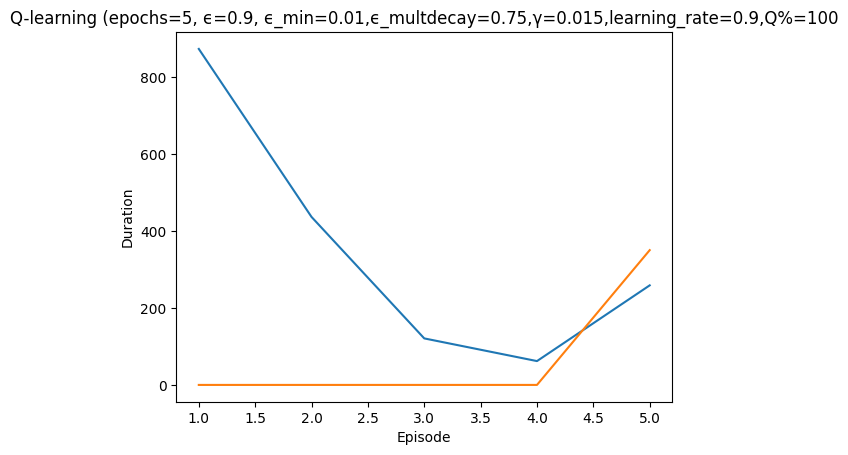

In [9]:
# Run Q-learning with gamma-sweep
qlearning_results = [qlearning_run(gamma, cyberbattlechain_10) for gamma in gamma_sweep]

In [10]:
qlearning_bestrun_10 = qlearning_results[0]

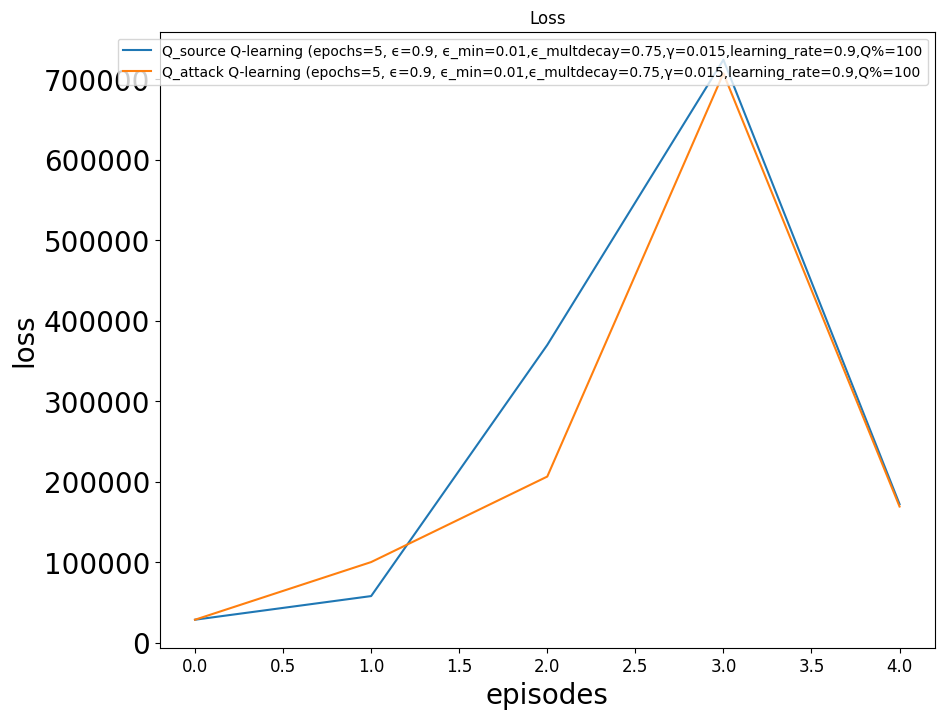

In [11]:
p.new_plot_loss()
for results in qlearning_results:
    p.plot_all_episodes_loss(cast(a.QTabularLearner, results["learner"]).loss_qsource.all_episodes, "Q_source", results["title"])
    p.plot_all_episodes_loss(cast(a.QTabularLearner, results["learner"]).loss_qattack.all_episodes, "Q_attack", results["title"])
plt.legend(loc="upper right")
plt.show()

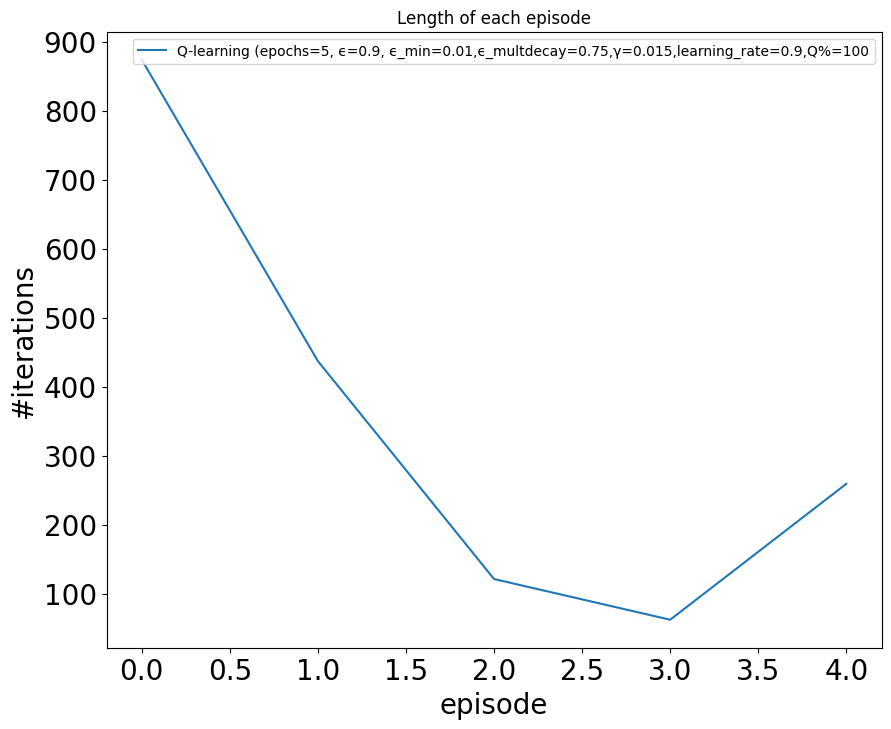

In [12]:
p.plot_episodes_length(qlearning_results)

###### Exploiting Q-matrix
Learning with: episode_count=5,iteration_count=9000,ϵ=0.3,ϵ_min=0.0, γ=0.0,learning_rate=0.0,Q%=100
  ## Episode: 1/5 'Exploiting Q-matrix' ϵ=0.3000, γ=0.0,learning_rate=0.0,Q%=100


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 1|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 1|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 1|Iteration 4|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 1|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 1|Iteration 5|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 1|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 1|Iteration 8|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 1|Iteration 8|reward:  242.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 1|Iteration 9|reward:  342.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 1|Iteration 9|reward:  342.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 1|Iteration 15|reward:  348.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 1|Iteration 15|reward:  348.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 1|Iteration 19|reward:  350.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 1|Iteration 19|reward:  350.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 1|Iteration 20|reward:  352.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 1|Iteration 20|reward:  352.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 1|Iteration 25|reward:  366.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 1|Iteration 25|reward:  366.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 1|Iteration 26|reward:  466.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 1|Iteration 26|reward:  466.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 1|Iteration 27|reward:  472.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 1|Iteration 27|reward:  472.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 1|Iteration 28|reward:  486.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 1|Iteration 28|reward:  486.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 1|Iteration 29|reward:  586.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 1|Iteration 29|reward:  586.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 1|Iteration 30|reward:  592.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 1|Iteration 30|reward:  592.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 1|Iteration 32|reward:  606.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 1|Iteration 32|reward:  606.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 1|Iteration 33|reward:  612.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 1|Iteration 33|reward:  612.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 1|Iteration 35|reward:  712.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 1|Iteration 35|reward:  712.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 1|Iteration 37|reward:  718.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 1|Iteration 37|reward:  718.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 1|Iteration 38|reward:  724.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 1|Iteration 38|reward:  724.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 1|Iteration 41|reward:  738.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 1|Iteration 41|reward:  738.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 1|Iteration 43|reward:  838.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 1|Iteration 43|reward:  838.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 1|Iteration 45|reward:  840.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 1|Iteration 45|reward:  840.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 1|Iteration 48|reward:  842.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 1|Iteration 48|reward:  842.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 1|Iteration 49|reward:  844.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 1|Iteration 49|reward:  844.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 1|Iteration 55|reward:  846.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 1|Iteration 55|reward:  846.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 1|Iteration 59|reward:  852.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 1|Iteration 59|reward:  852.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 1|Iteration 76|reward:  858.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 1|Iteration 76|reward:  858.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 1|Iteration 81|reward:  860.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 1|Iteration 81|reward:  860.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 1|Iteration 94|reward:  874.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 1|Iteration 94|reward:  874.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 1|Iteration 96|reward:  974.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 1|Iteration 96|reward:  974.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 1|Iteration 97|reward:  980.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 1|Iteration 97|reward:  980.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 1|Iteration 99|reward:  994.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 1|Iteration 99|reward:  994.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 1|Iteration 100|reward: 1094.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 1|Iteration 100|reward: 1094.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 1|Iteration 101|reward: 1108.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 1|Iteration 101|reward: 1108.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 1|Iteration 102|reward: 1208.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 1|Iteration 102|reward: 1208.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 1|Iteration 106|reward: 1222.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 1|Iteration 106|reward: 1222.0|last_reward_at:  106|Elapsed Time: 0:00:00||

Episode 1|Iteration 107|reward: 6222.0|last_reward_at:  106|Elapsed Time: 0:00:00||

Episode 1|Iteration 107|reward: 6222.0|last_reward_at:  107|Elapsed Time: 0:00:00||

  Episode 1 ended at t=107 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 7/12 (0.37)
    explore-remote: 10/22 (0.31)
    explore-connect: 0/30 (0.00)
    exploit-local: 8/1 (0.89)
    exploit-remote: 2/4 (0.33)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 53
  ## Episode: 2/5 'Exploiting Q-matrix' ϵ=0.3000, γ=0.0,learning_rate=0.0,Q%=100


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:   16.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:   16.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:   20.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:   20.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 8|reward:  120.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 8|reward:  120.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 2|Iteration 11|reward:  134.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 2|Iteration 11|reward:  134.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 2|Iteration 12|reward:  234.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 2|Iteration 12|reward:  234.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 2|Iteration 14|reward:  248.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 2|Iteration 14|reward:  248.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 2|Iteration 15|reward:  348.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 2|Iteration 15|reward:  348.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 2|Iteration 16|reward:  359.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 2|Iteration 16|reward:  359.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 2|Iteration 17|reward:  365.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 2|Iteration 17|reward:  365.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 2|Iteration 20|reward:  373.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 2|Iteration 20|reward:  373.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 2|Iteration 25|reward:  379.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 2|Iteration 25|reward:  379.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 2|Iteration 26|reward:  385.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 2|Iteration 26|reward:  385.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 2|Iteration 50|reward:  385.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 2|Iteration 52|reward:  387.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 2|Iteration 52|reward:  387.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 2|Iteration 73|reward:  387.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 2|Iteration 98|reward:  389.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 2|Iteration 98|reward:  389.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 2|Iteration 114|reward:  389.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 2|Iteration 118|reward:  395.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 2|Iteration 118|reward:  395.0|last_reward_at:  118|Elapsed Time: 0:00:00||

Episode 2|Iteration 141|reward:  395.0|last_reward_at:  118|Elapsed Time: 0:00:00||

Episode 2|Iteration 161|reward:  395.0|last_reward_at:  118|Elapsed Time: 0:00:00||

Episode 2|Iteration 186|reward:  395.0|last_reward_at:  118|Elapsed Time: 0:00:00||

Episode 2|Iteration 209|reward:  395.0|last_reward_at:  118|Elapsed Time: 0:00:00||

Episode 2|Iteration 228|reward:  395.0|last_reward_at:  118|Elapsed Time: 0:00:01||

Episode 2|Iteration 250|reward:  395.0|last_reward_at:  118|Elapsed Time: 0:00:01||

Episode 2|Iteration 272|reward:  395.0|last_reward_at:  118|Elapsed Time: 0:00:01||

Episode 2|Iteration 295|reward:  395.0|last_reward_at:  118|Elapsed Time: 0:00:01||

Episode 2|Iteration 319|reward:  395.0|last_reward_at:  118|Elapsed Time: 0:00:01||

Episode 2|Iteration 339|reward:  401.0|last_reward_at:  118|Elapsed Time: 0:00:01||

Episode 2|Iteration 339|reward:  401.0|last_reward_at:  339|Elapsed Time: 0:00:01||

Episode 2|Iteration 359|reward:  401.0|last_reward_at:  339|Elapsed Time: 0:00:01||

Episode 2|Iteration 370|reward:  410.0|last_reward_at:  339|Elapsed Time: 0:00:01||

Episode 2|Iteration 370|reward:  410.0|last_reward_at:  370|Elapsed Time: 0:00:01||

Episode 2|Iteration 372|reward:  510.0|last_reward_at:  370|Elapsed Time: 0:00:01||

Episode 2|Iteration 372|reward:  510.0|last_reward_at:  372|Elapsed Time: 0:00:01||

Episode 2|Iteration 375|reward:  524.0|last_reward_at:  372|Elapsed Time: 0:00:01||

Episode 2|Iteration 375|reward:  524.0|last_reward_at:  375|Elapsed Time: 0:00:01||

Episode 2|Iteration 376|reward:  624.0|last_reward_at:  375|Elapsed Time: 0:00:01||

Episode 2|Iteration 376|reward:  624.0|last_reward_at:  376|Elapsed Time: 0:00:01||

Episode 2|Iteration 394|reward:  626.0|last_reward_at:  376|Elapsed Time: 0:00:01||

Episode 2|Iteration 394|reward:  626.0|last_reward_at:  394|Elapsed Time: 0:00:01||

Episode 2|Iteration 398|reward:  628.0|last_reward_at:  394|Elapsed Time: 0:00:01||

Episode 2|Iteration 398|reward:  628.0|last_reward_at:  398|Elapsed Time: 0:00:01||

Episode 2|Iteration 402|reward:  642.0|last_reward_at:  398|Elapsed Time: 0:00:01||

Episode 2|Iteration 402|reward:  642.0|last_reward_at:  402|Elapsed Time: 0:00:01||

Episode 2|Iteration 403|reward:  742.0|last_reward_at:  402|Elapsed Time: 0:00:01||

Episode 2|Iteration 403|reward:  742.0|last_reward_at:  403|Elapsed Time: 0:00:01||

Episode 2|Iteration 404|reward:  756.0|last_reward_at:  403|Elapsed Time: 0:00:01||

Episode 2|Iteration 404|reward:  756.0|last_reward_at:  404|Elapsed Time: 0:00:01||

Episode 2|Iteration 405|reward:  856.0|last_reward_at:  404|Elapsed Time: 0:00:01||

Episode 2|Iteration 405|reward:  856.0|last_reward_at:  405|Elapsed Time: 0:00:01||

Episode 2|Iteration 406|reward:  870.0|last_reward_at:  405|Elapsed Time: 0:00:01||

Episode 2|Iteration 406|reward:  870.0|last_reward_at:  406|Elapsed Time: 0:00:01||

Episode 2|Iteration 407|reward:  970.0|last_reward_at:  406|Elapsed Time: 0:00:01||

Episode 2|Iteration 407|reward:  970.0|last_reward_at:  407|Elapsed Time: 0:00:01||

Episode 2|Iteration 408|reward:  976.0|last_reward_at:  407|Elapsed Time: 0:00:01||

Episode 2|Iteration 408|reward:  976.0|last_reward_at:  408|Elapsed Time: 0:00:01||

Episode 2|Iteration 409|reward:  982.0|last_reward_at:  408|Elapsed Time: 0:00:01||

Episode 2|Iteration 409|reward:  982.0|last_reward_at:  409|Elapsed Time: 0:00:01||

Episode 2|Iteration 411|reward:  996.0|last_reward_at:  409|Elapsed Time: 0:00:01||

Episode 2|Iteration 411|reward:  996.0|last_reward_at:  411|Elapsed Time: 0:00:01||

Episode 2|Iteration 412|reward: 1096.0|last_reward_at:  411|Elapsed Time: 0:00:01||

Episode 2|Iteration 412|reward: 1096.0|last_reward_at:  412|Elapsed Time: 0:00:01||

Episode 2|Iteration 424|reward: 1098.0|last_reward_at:  412|Elapsed Time: 0:00:02||

Episode 2|Iteration 424|reward: 1098.0|last_reward_at:  424|Elapsed Time: 0:00:02||

Episode 2|Iteration 425|reward: 1104.0|last_reward_at:  424|Elapsed Time: 0:00:02||

Episode 2|Iteration 425|reward: 1104.0|last_reward_at:  425|Elapsed Time: 0:00:02||

Episode 2|Iteration 428|reward: 1110.0|last_reward_at:  425|Elapsed Time: 0:00:02||

Episode 2|Iteration 428|reward: 1110.0|last_reward_at:  428|Elapsed Time: 0:00:02||

Episode 2|Iteration 431|reward: 1124.0|last_reward_at:  428|Elapsed Time: 0:00:02||

Episode 2|Iteration 431|reward: 1124.0|last_reward_at:  431|Elapsed Time: 0:00:02||

Episode 2|Iteration 432|reward: 1224.0|last_reward_at:  431|Elapsed Time: 0:00:02||

Episode 2|Iteration 432|reward: 1224.0|last_reward_at:  432|Elapsed Time: 0:00:02||

Episode 2|Iteration 433|reward: 1230.0|last_reward_at:  432|Elapsed Time: 0:00:02||

Episode 2|Iteration 433|reward: 1230.0|last_reward_at:  433|Elapsed Time: 0:00:02||

Episode 2|Iteration 435|reward: 1244.0|last_reward_at:  433|Elapsed Time: 0:00:02||

Episode 2|Iteration 435|reward: 1244.0|last_reward_at:  435|Elapsed Time: 0:00:02||

Episode 2|Iteration 443|reward: 6244.0|last_reward_at:  435|Elapsed Time: 0:00:02||

Episode 2|Iteration 443|reward: 6244.0|last_reward_at:  443|Elapsed Time: 0:00:02||

  Episode 2 ended at t=443 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 8/31 (0.21)
    explore-remote: 13/63 (0.17)
    explore-connect: 0/48 (0.00)
    exploit-local: 8/258 (0.03)
    exploit-remote: 1/2 (0.33)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 33
  ## Episode: 3/5 'Exploiting Q-matrix' ϵ=0.3000, γ=0.0,learning_rate=0.0,Q%=100


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 3|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 3|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 3|Iteration 4|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 3|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 6|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 6|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 3|Iteration 7|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 3|Iteration 7|reward:  242.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 3|Iteration 8|reward:  342.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 3|Iteration 8|reward:  342.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 3|Iteration 11|reward:  353.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 3|Iteration 11|reward:  353.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 3|Iteration 14|reward:  359.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 3|Iteration 14|reward:  359.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 3|Iteration 15|reward:  361.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 3|Iteration 15|reward:  361.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 3|Iteration 16|reward:  363.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 3|Iteration 16|reward:  363.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 3|Iteration 25|reward:  369.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 3|Iteration 25|reward:  369.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 3|Iteration 36|reward:  371.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 3|Iteration 36|reward:  371.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 3|Iteration 39|reward:  380.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 3|Iteration 39|reward:  380.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 3|Iteration 40|reward:  480.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 3|Iteration 40|reward:  480.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 3|Iteration 42|reward:  494.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 3|Iteration 42|reward:  494.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 3|Iteration 43|reward:  594.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 3|Iteration 43|reward:  594.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 3|Iteration 46|reward:  600.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 3|Iteration 46|reward:  600.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 3|Iteration 48|reward:  606.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 3|Iteration 48|reward:  606.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 3|Iteration 53|reward:  612.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 3|Iteration 53|reward:  612.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 3|Iteration 56|reward:  614.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 3|Iteration 56|reward:  614.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 3|Iteration 60|reward:  616.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 3|Iteration 60|reward:  616.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 3|Iteration 66|reward:  622.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 3|Iteration 66|reward:  622.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 3|Iteration 83|reward:  624.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 3|Iteration 83|reward:  624.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 3|Iteration 89|reward:  635.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 3|Iteration 89|reward:  635.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 3|Iteration 108|reward:  641.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 3|Iteration 108|reward:  641.0|last_reward_at:  108|Elapsed Time: 0:00:00||

Episode 3|Iteration 128|reward:  650.0|last_reward_at:  108|Elapsed Time: 0:00:00||

Episode 3|Iteration 128|reward:  650.0|last_reward_at:  128|Elapsed Time: 0:00:00||

Episode 3|Iteration 130|reward:  750.0|last_reward_at:  128|Elapsed Time: 0:00:00||

Episode 3|Iteration 130|reward:  750.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 3|Iteration 134|reward:  764.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 3|Iteration 134|reward:  764.0|last_reward_at:  134|Elapsed Time: 0:00:00||

Episode 3|Iteration 135|reward:  864.0|last_reward_at:  134|Elapsed Time: 0:00:00||

Episode 3|Iteration 135|reward:  864.0|last_reward_at:  135|Elapsed Time: 0:00:00||

Episode 3|Iteration 151|reward:  864.0|last_reward_at:  135|Elapsed Time: 0:00:00||

Episode 3|Iteration 156|reward:  866.0|last_reward_at:  135|Elapsed Time: 0:00:00||

Episode 3|Iteration 156|reward:  866.0|last_reward_at:  156|Elapsed Time: 0:00:00||

Episode 3|Iteration 168|reward:  877.0|last_reward_at:  156|Elapsed Time: 0:00:00||

Episode 3|Iteration 168|reward:  877.0|last_reward_at:  168|Elapsed Time: 0:00:00||

Episode 3|Iteration 173|reward:  883.0|last_reward_at:  168|Elapsed Time: 0:00:00||

Episode 3|Iteration 173|reward:  883.0|last_reward_at:  173|Elapsed Time: 0:00:00||

Episode 3|Iteration 190|reward:  889.0|last_reward_at:  173|Elapsed Time: 0:00:01||

Episode 3|Iteration 190|reward:  889.0|last_reward_at:  190|Elapsed Time: 0:00:01||

Episode 3|Iteration 191|reward:  891.0|last_reward_at:  190|Elapsed Time: 0:00:01||

Episode 3|Iteration 191|reward:  891.0|last_reward_at:  191|Elapsed Time: 0:00:01||

Episode 3|Iteration 199|reward:  897.0|last_reward_at:  191|Elapsed Time: 0:00:01||

Episode 3|Iteration 199|reward:  897.0|last_reward_at:  199|Elapsed Time: 0:00:01||

Episode 3|Iteration 216|reward:  905.0|last_reward_at:  199|Elapsed Time: 0:00:01||

Episode 3|Iteration 216|reward:  905.0|last_reward_at:  216|Elapsed Time: 0:00:01||

Episode 3|Iteration 228|reward:  905.0|last_reward_at:  216|Elapsed Time: 0:00:01||

Episode 3|Iteration 228|reward:  911.0|last_reward_at:  216|Elapsed Time: 0:00:01||

Episode 3|Iteration 228|reward:  911.0|last_reward_at:  228|Elapsed Time: 0:00:01||

Episode 3|Iteration 250|reward:  911.0|last_reward_at:  228|Elapsed Time: 0:00:01||

Episode 3|Iteration 267|reward:  911.0|last_reward_at:  228|Elapsed Time: 0:00:01||

Episode 3|Iteration 288|reward:  911.0|last_reward_at:  228|Elapsed Time: 0:00:01||

Episode 3|Iteration 307|reward:  911.0|last_reward_at:  228|Elapsed Time: 0:00:01||

Episode 3|Iteration 322|reward:  911.0|last_reward_at:  228|Elapsed Time: 0:00:01||

Episode 3|Iteration 340|reward:  920.0|last_reward_at:  228|Elapsed Time: 0:00:01||

Episode 3|Iteration 340|reward:  920.0|last_reward_at:  340|Elapsed Time: 0:00:01||

Episode 3|Iteration 341|reward: 1020.0|last_reward_at:  340|Elapsed Time: 0:00:01||

Episode 3|Iteration 341|reward: 1020.0|last_reward_at:  341|Elapsed Time: 0:00:01||

Episode 3|Iteration 343|reward: 1034.0|last_reward_at:  341|Elapsed Time: 0:00:01||

Episode 3|Iteration 343|reward: 1034.0|last_reward_at:  343|Elapsed Time: 0:00:01||

Episode 3|Iteration 344|reward: 1134.0|last_reward_at:  343|Elapsed Time: 0:00:01||

Episode 3|Iteration 344|reward: 1134.0|last_reward_at:  344|Elapsed Time: 0:00:01||

Episode 3|Iteration 362|reward: 1134.0|last_reward_at:  344|Elapsed Time: 0:00:02||

Episode 3|Iteration 364|reward: 1145.0|last_reward_at:  344|Elapsed Time: 0:00:02||

Episode 3|Iteration 364|reward: 1145.0|last_reward_at:  364|Elapsed Time: 0:00:02||

Episode 3|Iteration 365|reward: 1151.0|last_reward_at:  364|Elapsed Time: 0:00:02||

Episode 3|Iteration 365|reward: 1151.0|last_reward_at:  365|Elapsed Time: 0:00:02||

Episode 3|Iteration 375|reward: 1157.0|last_reward_at:  365|Elapsed Time: 0:00:02||

Episode 3|Iteration 375|reward: 1157.0|last_reward_at:  375|Elapsed Time: 0:00:02||

Episode 3|Iteration 391|reward: 1157.0|last_reward_at:  375|Elapsed Time: 0:00:02||

Episode 3|Iteration 399|reward: 1159.0|last_reward_at:  375|Elapsed Time: 0:00:02||

Episode 3|Iteration 399|reward: 1159.0|last_reward_at:  399|Elapsed Time: 0:00:02||

Episode 3|Iteration 415|reward: 1159.0|last_reward_at:  399|Elapsed Time: 0:00:02||

Episode 3|Iteration 431|reward: 1159.0|last_reward_at:  399|Elapsed Time: 0:00:02||

Episode 3|Iteration 451|reward: 1159.0|last_reward_at:  399|Elapsed Time: 0:00:02||

Episode 3|Iteration 469|reward: 1159.0|last_reward_at:  399|Elapsed Time: 0:00:02||

Episode 3|Iteration 488|reward: 1159.0|last_reward_at:  399|Elapsed Time: 0:00:02||

Episode 3|Iteration 504|reward: 1159.0|last_reward_at:  399|Elapsed Time: 0:00:02||

Episode 3|Iteration 514|reward: 1161.0|last_reward_at:  399|Elapsed Time: 0:00:02||

Episode 3|Iteration 514|reward: 1161.0|last_reward_at:  514|Elapsed Time: 0:00:02||

Episode 3|Iteration 532|reward: 1161.0|last_reward_at:  514|Elapsed Time: 0:00:03||

Episode 3|Iteration 549|reward: 1161.0|last_reward_at:  514|Elapsed Time: 0:00:03||

Episode 3|Iteration 556|reward: 1169.0|last_reward_at:  514|Elapsed Time: 0:00:03||

Episode 3|Iteration 556|reward: 1169.0|last_reward_at:  556|Elapsed Time: 0:00:03||

Episode 3|Iteration 570|reward: 1169.0|last_reward_at:  556|Elapsed Time: 0:00:03||

Episode 3|Iteration 578|reward: 1178.0|last_reward_at:  556|Elapsed Time: 0:00:03||

Episode 3|Iteration 578|reward: 1178.0|last_reward_at:  578|Elapsed Time: 0:00:03||

Episode 3|Iteration 579|reward: 1278.0|last_reward_at:  578|Elapsed Time: 0:00:03||

Episode 3|Iteration 579|reward: 1278.0|last_reward_at:  579|Elapsed Time: 0:00:03||

Episode 3|Iteration 597|reward: 1278.0|last_reward_at:  579|Elapsed Time: 0:00:03||

Episode 3|Iteration 607|reward: 1292.0|last_reward_at:  579|Elapsed Time: 0:00:03||

Episode 3|Iteration 607|reward: 1292.0|last_reward_at:  607|Elapsed Time: 0:00:03||

Episode 3|Iteration 608|reward: 6292.0|last_reward_at:  607|Elapsed Time: 0:00:03||

Episode 3|Iteration 608|reward: 6292.0|last_reward_at:  608|Elapsed Time: 0:00:03||

  Episode 3 ended at t=608 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 10/116 (0.08)
    explore-remote: 19/121 (0.14)
    explore-connect: 0/142 (0.00)
    exploit-local: 10/129 (0.07)
    exploit-remote: 1/49 (0.02)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 221
  ## Episode: 4/5 'Exploiting Q-matrix' ϵ=0.3000, γ=0.0,learning_rate=0.0,Q%=100


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 4|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 4|Iteration 6|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 4|Iteration 7|reward:  344.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 4|Iteration 7|reward:  344.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 4|Iteration 9|reward:  346.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 4|Iteration 9|reward:  346.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 4|Iteration 28|reward:  346.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 4|Iteration 30|reward:  348.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 4|Iteration 30|reward:  348.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 4|Iteration 31|reward:  354.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 4|Iteration 31|reward:  354.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 4|Iteration 43|reward:  360.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 4|Iteration 43|reward:  360.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 4|Iteration 46|reward:  362.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 4|Iteration 46|reward:  362.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 4|Iteration 47|reward:  368.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 4|Iteration 47|reward:  368.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 4|Iteration 67|reward:  368.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 4|Iteration 80|reward:  382.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 4|Iteration 80|reward:  382.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 4|Iteration 82|reward:  482.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 4|Iteration 82|reward:  482.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 4|Iteration 84|reward:  496.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 4|Iteration 84|reward:  496.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 4|Iteration 85|reward:  596.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 4|Iteration 85|reward:  596.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 4|Iteration 91|reward:  602.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 4|Iteration 91|reward:  602.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 4|Iteration 103|reward:  608.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 4|Iteration 103|reward:  608.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 4|Iteration 114|reward:  608.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 4|Iteration 118|reward:  622.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 4|Iteration 118|reward:  622.0|last_reward_at:  118|Elapsed Time: 0:00:00||

Episode 4|Iteration 123|reward:  722.0|last_reward_at:  118|Elapsed Time: 0:00:00||

Episode 4|Iteration 123|reward:  722.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 4|Iteration 124|reward:  736.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 4|Iteration 124|reward:  736.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 4|Iteration 125|reward:  836.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 4|Iteration 125|reward:  836.0|last_reward_at:  125|Elapsed Time: 0:00:00||

Episode 4|Iteration 128|reward:  842.0|last_reward_at:  125|Elapsed Time: 0:00:00||

Episode 4|Iteration 128|reward:  842.0|last_reward_at:  128|Elapsed Time: 0:00:00||

Episode 4|Iteration 129|reward:  844.0|last_reward_at:  128|Elapsed Time: 0:00:00||

Episode 4|Iteration 129|reward:  844.0|last_reward_at:  129|Elapsed Time: 0:00:00||

Episode 4|Iteration 134|reward:  846.0|last_reward_at:  129|Elapsed Time: 0:00:00||

Episode 4|Iteration 134|reward:  846.0|last_reward_at:  134|Elapsed Time: 0:00:00||

Episode 4|Iteration 147|reward:  848.0|last_reward_at:  134|Elapsed Time: 0:00:00||

Episode 4|Iteration 147|reward:  848.0|last_reward_at:  147|Elapsed Time: 0:00:00||

Episode 4|Iteration 155|reward:  854.0|last_reward_at:  147|Elapsed Time: 0:00:00||

Episode 4|Iteration 155|reward:  854.0|last_reward_at:  155|Elapsed Time: 0:00:00||

Episode 4|Iteration 170|reward:  854.0|last_reward_at:  155|Elapsed Time: 0:00:00||

Episode 4|Iteration 190|reward:  854.0|last_reward_at:  155|Elapsed Time: 0:00:01||

Episode 4|Iteration 207|reward:  854.0|last_reward_at:  155|Elapsed Time: 0:00:01||

Episode 4|Iteration 223|reward:  856.0|last_reward_at:  155|Elapsed Time: 0:00:01||

Episode 4|Iteration 223|reward:  856.0|last_reward_at:  223|Elapsed Time: 0:00:01||

Episode 4|Iteration 239|reward:  862.0|last_reward_at:  223|Elapsed Time: 0:00:01||

Episode 4|Iteration 239|reward:  862.0|last_reward_at:  239|Elapsed Time: 0:00:01||

Episode 4|Iteration 248|reward:  873.0|last_reward_at:  239|Elapsed Time: 0:00:01||

Episode 4|Iteration 248|reward:  873.0|last_reward_at:  248|Elapsed Time: 0:00:01||

Episode 4|Iteration 251|reward:  879.0|last_reward_at:  248|Elapsed Time: 0:00:01||

Episode 4|Iteration 251|reward:  879.0|last_reward_at:  251|Elapsed Time: 0:00:01||

Episode 4|Iteration 270|reward:  879.0|last_reward_at:  251|Elapsed Time: 0:00:01||

Episode 4|Iteration 288|reward:  879.0|last_reward_at:  251|Elapsed Time: 0:00:01||

Episode 4|Iteration 301|reward:  885.0|last_reward_at:  251|Elapsed Time: 0:00:01||

Episode 4|Iteration 301|reward:  885.0|last_reward_at:  301|Elapsed Time: 0:00:01||

Episode 4|Iteration 310|reward:  894.0|last_reward_at:  301|Elapsed Time: 0:00:01||

Episode 4|Iteration 310|reward:  894.0|last_reward_at:  310|Elapsed Time: 0:00:01||

Episode 4|Iteration 311|reward:  994.0|last_reward_at:  310|Elapsed Time: 0:00:01||

Episode 4|Iteration 311|reward:  994.0|last_reward_at:  311|Elapsed Time: 0:00:01||

Episode 4|Iteration 317|reward: 1008.0|last_reward_at:  311|Elapsed Time: 0:00:01||

Episode 4|Iteration 317|reward: 1008.0|last_reward_at:  317|Elapsed Time: 0:00:01||

Episode 4|Iteration 318|reward: 1108.0|last_reward_at:  317|Elapsed Time: 0:00:01||

Episode 4|Iteration 318|reward: 1108.0|last_reward_at:  318|Elapsed Time: 0:00:01||

Episode 4|Iteration 327|reward: 1110.0|last_reward_at:  318|Elapsed Time: 0:00:01||

Episode 4|Iteration 327|reward: 1110.0|last_reward_at:  327|Elapsed Time: 0:00:01||

Episode 4|Iteration 329|reward: 1116.0|last_reward_at:  327|Elapsed Time: 0:00:01||

Episode 4|Iteration 329|reward: 1116.0|last_reward_at:  329|Elapsed Time: 0:00:01||

Episode 4|Iteration 330|reward: 1122.0|last_reward_at:  329|Elapsed Time: 0:00:01||

Episode 4|Iteration 330|reward: 1122.0|last_reward_at:  330|Elapsed Time: 0:00:01||

Episode 4|Iteration 331|reward: 1124.0|last_reward_at:  330|Elapsed Time: 0:00:01||

Episode 4|Iteration 331|reward: 1124.0|last_reward_at:  331|Elapsed Time: 0:00:01||

Episode 4|Iteration 339|reward: 1135.0|last_reward_at:  331|Elapsed Time: 0:00:01||

Episode 4|Iteration 339|reward: 1135.0|last_reward_at:  339|Elapsed Time: 0:00:01||

Episode 4|Iteration 352|reward: 1141.0|last_reward_at:  339|Elapsed Time: 0:00:01||

Episode 4|Iteration 352|reward: 1141.0|last_reward_at:  352|Elapsed Time: 0:00:01||

Episode 4|Iteration 369|reward: 1141.0|last_reward_at:  352|Elapsed Time: 0:00:02||

Episode 4|Iteration 378|reward: 1147.0|last_reward_at:  352|Elapsed Time: 0:00:02||

Episode 4|Iteration 378|reward: 1147.0|last_reward_at:  378|Elapsed Time: 0:00:02||

Episode 4|Iteration 385|reward: 1153.0|last_reward_at:  378|Elapsed Time: 0:00:02||

Episode 4|Iteration 385|reward: 1153.0|last_reward_at:  385|Elapsed Time: 0:00:02||

Episode 4|Iteration 402|reward: 1153.0|last_reward_at:  385|Elapsed Time: 0:00:02||

Episode 4|Iteration 420|reward: 1161.0|last_reward_at:  385|Elapsed Time: 0:00:02||

Episode 4|Iteration 420|reward: 1161.0|last_reward_at:  420|Elapsed Time: 0:00:02||

Episode 4|Iteration 438|reward: 1161.0|last_reward_at:  420|Elapsed Time: 0:00:02||

Episode 4|Iteration 456|reward: 1161.0|last_reward_at:  420|Elapsed Time: 0:00:02||

Episode 4|Iteration 472|reward: 1161.0|last_reward_at:  420|Elapsed Time: 0:00:02||

Episode 4|Iteration 489|reward: 1161.0|last_reward_at:  420|Elapsed Time: 0:00:02||

Episode 4|Iteration 509|reward: 1161.0|last_reward_at:  420|Elapsed Time: 0:00:02||

Episode 4|Iteration 526|reward: 1161.0|last_reward_at:  420|Elapsed Time: 0:00:02||

Episode 4|Iteration 543|reward: 1161.0|last_reward_at:  420|Elapsed Time: 0:00:03||

Episode 4|Iteration 562|reward: 1161.0|last_reward_at:  420|Elapsed Time: 0:00:03||

Episode 4|Iteration 581|reward: 1161.0|last_reward_at:  420|Elapsed Time: 0:00:03||

Episode 4|Iteration 599|reward: 1161.0|last_reward_at:  420|Elapsed Time: 0:00:03||

Episode 4|Iteration 618|reward: 1161.0|last_reward_at:  420|Elapsed Time: 0:00:03||

Episode 4|Iteration 636|reward: 1161.0|last_reward_at:  420|Elapsed Time: 0:00:03||

Episode 4|Iteration 656|reward: 1161.0|last_reward_at:  420|Elapsed Time: 0:00:03||

Episode 4|Iteration 672|reward: 1161.0|last_reward_at:  420|Elapsed Time: 0:00:03||

Episode 4|Iteration 684|reward: 1161.0|last_reward_at:  420|Elapsed Time: 0:00:03||

Episode 4|Iteration 699|reward: 1161.0|last_reward_at:  420|Elapsed Time: 0:00:03||

Episode 4|Iteration 718|reward: 1161.0|last_reward_at:  420|Elapsed Time: 0:00:04||

Episode 4|Iteration 726|reward: 1170.0|last_reward_at:  420|Elapsed Time: 0:00:04||

Episode 4|Iteration 726|reward: 1170.0|last_reward_at:  726|Elapsed Time: 0:00:04||

Episode 4|Iteration 728|reward: 1270.0|last_reward_at:  726|Elapsed Time: 0:00:04||

Episode 4|Iteration 728|reward: 1270.0|last_reward_at:  728|Elapsed Time: 0:00:04||

Episode 4|Iteration 746|reward: 1284.0|last_reward_at:  728|Elapsed Time: 0:00:04||

Episode 4|Iteration 746|reward: 1284.0|last_reward_at:  746|Elapsed Time: 0:00:04||

Episode 4|Iteration 749|reward: 6284.0|last_reward_at:  746|Elapsed Time: 0:00:04||

Episode 4|Iteration 749|reward: 6284.0|last_reward_at:  749|Elapsed Time: 0:00:04||

  Episode 4 ended at t=749 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 11/137 (0.07)
    explore-remote: 17/163 (0.09)
    explore-connect: 0/211 (0.00)
    exploit-local: 8/90 (0.08)
    exploit-remote: 3/98 (0.03)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 307
  ## Episode: 5/5 'Exploiting Q-matrix' ϵ=0.3000, γ=0.0,learning_rate=0.0,Q%=100


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 5|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 5|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 5|Iteration 6|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 5|Iteration 6|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 5|Iteration 9|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 5|Iteration 9|reward:  342.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 5|Iteration 10|reward:  348.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 5|Iteration 10|reward:  348.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 5|Iteration 11|reward:  350.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 5|Iteration 11|reward:  350.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 5|Iteration 20|reward:  352.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 5|Iteration 20|reward:  352.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 5|Iteration 22|reward:  354.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 5|Iteration 22|reward:  354.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 5|Iteration 25|reward:  360.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 5|Iteration 25|reward:  360.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 5|Iteration 27|reward:  366.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 5|Iteration 27|reward:  366.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 5|Iteration 33|reward:  372.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 5|Iteration 33|reward:  372.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 5|Iteration 45|reward:  383.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 5|Iteration 45|reward:  383.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 5|Iteration 65|reward:  392.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 5|Iteration 65|reward:  392.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 5|Iteration 67|reward:  492.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 5|Iteration 67|reward:  492.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 5|Iteration 68|reward:  506.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 5|Iteration 68|reward:  506.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 5|Iteration 69|reward:  606.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 5|Iteration 69|reward:  606.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 5|Iteration 77|reward:  620.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 5|Iteration 77|reward:  620.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 5|Iteration 78|reward:  720.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 5|Iteration 78|reward:  720.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 5|Iteration 80|reward:  726.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 5|Iteration 80|reward:  726.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 5|Iteration 81|reward:  737.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 5|Iteration 81|reward:  737.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 5|Iteration 82|reward:  741.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 5|Iteration 82|reward:  741.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 5|Iteration 86|reward:  747.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 5|Iteration 86|reward:  747.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 5|Iteration 99|reward:  753.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 5|Iteration 99|reward:  753.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 5|Iteration 103|reward:  759.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 5|Iteration 103|reward:  759.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 5|Iteration 108|reward:  761.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 5|Iteration 108|reward:  761.0|last_reward_at:  108|Elapsed Time: 0:00:00||

Episode 5|Iteration 111|reward:  763.0|last_reward_at:  108|Elapsed Time: 0:00:00||

Episode 5|Iteration 111|reward:  763.0|last_reward_at:  111|Elapsed Time: 0:00:00||

Episode 5|Iteration 131|reward:  763.0|last_reward_at:  111|Elapsed Time: 0:00:00||

Episode 5|Iteration 132|reward:  765.0|last_reward_at:  111|Elapsed Time: 0:00:00||

Episode 5|Iteration 132|reward:  765.0|last_reward_at:  132|Elapsed Time: 0:00:00||

Episode 5|Iteration 150|reward:  765.0|last_reward_at:  132|Elapsed Time: 0:00:00||

Episode 5|Iteration 153|reward:  774.0|last_reward_at:  132|Elapsed Time: 0:00:00||

Episode 5|Iteration 153|reward:  774.0|last_reward_at:  153|Elapsed Time: 0:00:00||

Episode 5|Iteration 154|reward:  874.0|last_reward_at:  153|Elapsed Time: 0:00:00||

Episode 5|Iteration 154|reward:  874.0|last_reward_at:  154|Elapsed Time: 0:00:00||

Episode 5|Iteration 159|reward:  876.0|last_reward_at:  154|Elapsed Time: 0:00:00||

Episode 5|Iteration 159|reward:  876.0|last_reward_at:  159|Elapsed Time: 0:00:00||

Episode 5|Iteration 176|reward:  876.0|last_reward_at:  159|Elapsed Time: 0:00:00||

Episode 5|Iteration 184|reward:  890.0|last_reward_at:  159|Elapsed Time: 0:00:01||

Episode 5|Iteration 184|reward:  890.0|last_reward_at:  184|Elapsed Time: 0:00:01||

Episode 5|Iteration 185|reward:  990.0|last_reward_at:  184|Elapsed Time: 0:00:01||

Episode 5|Iteration 185|reward:  990.0|last_reward_at:  185|Elapsed Time: 0:00:01||

Episode 5|Iteration 186|reward: 1004.0|last_reward_at:  185|Elapsed Time: 0:00:01||

Episode 5|Iteration 186|reward: 1004.0|last_reward_at:  186|Elapsed Time: 0:00:01||

Episode 5|Iteration 188|reward: 1104.0|last_reward_at:  186|Elapsed Time: 0:00:01||

Episode 5|Iteration 188|reward: 1104.0|last_reward_at:  188|Elapsed Time: 0:00:01||

Episode 5|Iteration 205|reward: 1110.0|last_reward_at:  188|Elapsed Time: 0:00:01||

Episode 5|Iteration 205|reward: 1110.0|last_reward_at:  205|Elapsed Time: 0:00:01||

Episode 5|Iteration 207|reward: 1116.0|last_reward_at:  205|Elapsed Time: 0:00:01||

Episode 5|Iteration 207|reward: 1116.0|last_reward_at:  207|Elapsed Time: 0:00:01||

Episode 5|Iteration 211|reward: 1122.0|last_reward_at:  207|Elapsed Time: 0:00:01||

Episode 5|Iteration 211|reward: 1122.0|last_reward_at:  211|Elapsed Time: 0:00:01||

Episode 5|Iteration 217|reward: 1124.0|last_reward_at:  211|Elapsed Time: 0:00:01||

Episode 5|Iteration 217|reward: 1124.0|last_reward_at:  217|Elapsed Time: 0:00:01||

Episode 5|Iteration 228|reward: 1124.0|last_reward_at:  217|Elapsed Time: 0:00:01||

Episode 5|Iteration 244|reward: 1124.0|last_reward_at:  217|Elapsed Time: 0:00:01||

Episode 5|Iteration 248|reward: 1126.0|last_reward_at:  217|Elapsed Time: 0:00:01||

Episode 5|Iteration 248|reward: 1126.0|last_reward_at:  248|Elapsed Time: 0:00:01||

Episode 5|Iteration 250|reward: 1140.0|last_reward_at:  248|Elapsed Time: 0:00:01||

Episode 5|Iteration 250|reward: 1140.0|last_reward_at:  250|Elapsed Time: 0:00:01||

Episode 5|Iteration 251|reward: 1240.0|last_reward_at:  250|Elapsed Time: 0:00:01||

Episode 5|Iteration 251|reward: 1240.0|last_reward_at:  251|Elapsed Time: 0:00:01||

Episode 5|Iteration 252|reward: 1246.0|last_reward_at:  251|Elapsed Time: 0:00:01||

Episode 5|Iteration 252|reward: 1246.0|last_reward_at:  252|Elapsed Time: 0:00:01||

Episode 5|Iteration 253|reward: 1252.0|last_reward_at:  252|Elapsed Time: 0:00:01||

Episode 5|Iteration 253|reward: 1252.0|last_reward_at:  253|Elapsed Time: 0:00:01||

Episode 5|Iteration 263|reward: 1266.0|last_reward_at:  253|Elapsed Time: 0:00:01||

Episode 5|Iteration 263|reward: 1266.0|last_reward_at:  263|Elapsed Time: 0:00:01||

Episode 5|Iteration 264|reward: 6266.0|last_reward_at:  263|Elapsed Time: 0:00:01||

Episode 5|Iteration 264|reward: 6266.0|last_reward_at:  264|Elapsed Time: 0:00:01||

  Episode 5 ended at t=264 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 10/42 (0.19)
    explore-remote: 15/66 (0.19)
    explore-connect: 0/59 (0.00)
    exploit-local: 8/33 (0.20)
    exploit-remote: 3/17 (0.15)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 120
simulation ended


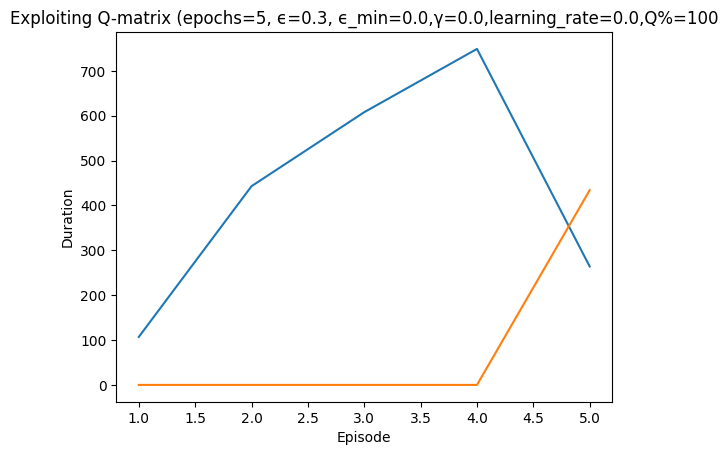

In [13]:
nolearning_results = learner.epsilon_greedy_search(
    cyberbattlechain_10,
    ep,
    learner=a.QTabularLearner(ep, trained=qlearning_bestrun_10["learner"], gamma=0.0, learning_rate=0.0, exploit_percentile=100),
    episode_count=eval_episode_count,
    iteration_count=iteration_count,
    epsilon=0.30,  # 0.35,
    render=False,
    title="Exploiting Q-matrix",
    verbosity=Verbosity.Quiet,
)

###### Random search
Learning with: episode_count=5,iteration_count=9000,ϵ=1.0,ϵ_min=0.0, γ=0.0,learning_rate=0.0,Q%=100
  ## Episode: 1/5 'Random search' ϵ=1.0000, γ=0.0,learning_rate=0.0,Q%=100


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 18|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 18|reward:   14.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 1|Iteration 20|reward:   18.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 1|Iteration 20|reward:   18.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 1|Iteration 22|reward:   20.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 1|Iteration 22|reward:   20.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 1|Iteration 28|reward:  120.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 1|Iteration 28|reward:  120.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 1|Iteration 37|reward:  131.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 1|Iteration 37|reward:  131.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 1|Iteration 46|reward:  140.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 1|Iteration 46|reward:  140.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 1|Iteration 58|reward:  146.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 1|Iteration 58|reward:  146.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 1|Iteration 69|reward:  154.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 1|Iteration 69|reward:  154.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 1|Iteration 108|reward:  254.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 1|Iteration 108|reward:  254.0|last_reward_at:  108|Elapsed Time: 0:00:00||

Episode 1|Iteration 116|reward:  268.0|last_reward_at:  108|Elapsed Time: 0:00:00||

Episode 1|Iteration 116|reward:  268.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 1|Iteration 145|reward:  272.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 1|Iteration 145|reward:  272.0|last_reward_at:  145|Elapsed Time: 0:00:00||

Episode 1|Iteration 157|reward:  274.0|last_reward_at:  145|Elapsed Time: 0:00:00||

Episode 1|Iteration 157|reward:  274.0|last_reward_at:  157|Elapsed Time: 0:00:00||

Episode 1|Iteration 201|reward:  374.0|last_reward_at:  157|Elapsed Time: 0:00:00||

Episode 1|Iteration 201|reward:  374.0|last_reward_at:  201|Elapsed Time: 0:00:00||

Episode 1|Iteration 221|reward:  380.0|last_reward_at:  201|Elapsed Time: 0:00:00||

Episode 1|Iteration 221|reward:  380.0|last_reward_at:  221|Elapsed Time: 0:00:00||

Episode 1|Iteration 234|reward:  394.0|last_reward_at:  221|Elapsed Time: 0:00:00||

Episode 1|Iteration 234|reward:  394.0|last_reward_at:  234|Elapsed Time: 0:00:00||

Episode 1|Iteration 235|reward:  400.0|last_reward_at:  234|Elapsed Time: 0:00:00||

Episode 1|Iteration 235|reward:  400.0|last_reward_at:  235|Elapsed Time: 0:00:00||

Episode 1|Iteration 246|reward:  408.0|last_reward_at:  235|Elapsed Time: 0:00:00||

Episode 1|Iteration 246|reward:  408.0|last_reward_at:  246|Elapsed Time: 0:00:00||

Episode 1|Iteration 252|reward:  414.0|last_reward_at:  246|Elapsed Time: 0:00:00||

Episode 1|Iteration 252|reward:  414.0|last_reward_at:  252|Elapsed Time: 0:00:00||

Episode 1|Iteration 301|reward:  414.0|last_reward_at:  252|Elapsed Time: 0:00:00||

Episode 1|Iteration 342|reward:  414.0|last_reward_at:  252|Elapsed Time: 0:00:00||

Episode 1|Iteration 366|reward:  514.0|last_reward_at:  252|Elapsed Time: 0:00:00||

Episode 1|Iteration 366|reward:  514.0|last_reward_at:  366|Elapsed Time: 0:00:00||

Episode 1|Iteration 412|reward:  514.0|last_reward_at:  366|Elapsed Time: 0:00:00||

Episode 1|Iteration 437|reward:  528.0|last_reward_at:  366|Elapsed Time: 0:00:00||

Episode 1|Iteration 437|reward:  528.0|last_reward_at:  437|Elapsed Time: 0:00:00||

Episode 1|Iteration 451|reward:  534.0|last_reward_at:  437|Elapsed Time: 0:00:00||

Episode 1|Iteration 451|reward:  534.0|last_reward_at:  451|Elapsed Time: 0:00:00||

Episode 1|Iteration 463|reward:  536.0|last_reward_at:  451|Elapsed Time: 0:00:00||

Episode 1|Iteration 463|reward:  536.0|last_reward_at:  463|Elapsed Time: 0:00:00||

Episode 1|Iteration 502|reward:  540.0|last_reward_at:  463|Elapsed Time: 0:00:01||

Episode 1|Iteration 502|reward:  540.0|last_reward_at:  502|Elapsed Time: 0:00:01||

Episode 1|Iteration 544|reward:  540.0|last_reward_at:  502|Elapsed Time: 0:00:01||

Episode 1|Iteration 570|reward:  540.0|last_reward_at:  502|Elapsed Time: 0:00:01||

Episode 1|Iteration 614|reward:  540.0|last_reward_at:  502|Elapsed Time: 0:00:01||

Episode 1|Iteration 658|reward:  540.0|last_reward_at:  502|Elapsed Time: 0:00:01||

Episode 1|Iteration 684|reward:  540.0|last_reward_at:  502|Elapsed Time: 0:00:01||

Episode 1|Iteration 728|reward:  540.0|last_reward_at:  502|Elapsed Time: 0:00:01||

Episode 1|Iteration 772|reward:  540.0|last_reward_at:  502|Elapsed Time: 0:00:01||

Episode 1|Iteration 798|reward:  540.0|last_reward_at:  502|Elapsed Time: 0:00:01||

Episode 1|Iteration 841|reward:  540.0|last_reward_at:  502|Elapsed Time: 0:00:01||

Episode 1|Iteration 884|reward:  540.0|last_reward_at:  502|Elapsed Time: 0:00:01||

Episode 1|Iteration 912|reward:  540.0|last_reward_at:  502|Elapsed Time: 0:00:02||

Episode 1|Iteration 955|reward:  540.0|last_reward_at:  502|Elapsed Time: 0:00:02||

Episode 1|Iteration 995|reward:  540.0|last_reward_at:  502|Elapsed Time: 0:00:02||

Episode 1|Iteration 1026|reward:  540.0|last_reward_at:  502|Elapsed Time: 0:00:02||

Episode 1|Iteration 1069|reward:  540.0|last_reward_at:  502|Elapsed Time: 0:00:02||

Episode 1|Iteration 1113|reward:  540.0|last_reward_at:  502|Elapsed Time: 0:00:02||

Episode 1|Iteration 1140|reward:  540.0|last_reward_at:  502|Elapsed Time: 0:00:02||

Episode 1|Iteration 1183|reward:  540.0|last_reward_at:  502|Elapsed Time: 0:00:02||

Episode 1|Iteration 1227|reward:  540.0|last_reward_at:  502|Elapsed Time: 0:00:02||

Episode 1|Iteration 1254|reward:  540.0|last_reward_at:  502|Elapsed Time: 0:00:02||

Episode 1|Iteration 1296|reward:  540.0|last_reward_at:  502|Elapsed Time: 0:00:02||

Episode 1|Iteration 1339|reward:  540.0|last_reward_at:  502|Elapsed Time: 0:00:03||

Episode 1|Iteration 1368|reward:  540.0|last_reward_at:  502|Elapsed Time: 0:00:03||

Episode 1|Iteration 1410|reward:  540.0|last_reward_at:  502|Elapsed Time: 0:00:03||

Episode 1|Iteration 1433|reward:  640.0|last_reward_at:  502|Elapsed Time: 0:00:03||

Episode 1|Iteration 1433|reward:  640.0|last_reward_at: 1433|Elapsed Time: 0:00:03||

Episode 1|Iteration 1451|reward:  651.0|last_reward_at: 1433|Elapsed Time: 0:00:03||

Episode 1|Iteration 1451|reward:  651.0|last_reward_at: 1451|Elapsed Time: 0:00:03||

Episode 1|Iteration 1454|reward:  659.0|last_reward_at: 1451|Elapsed Time: 0:00:03||

Episode 1|Iteration 1454|reward:  659.0|last_reward_at: 1454|Elapsed Time: 0:00:03||

Episode 1|Iteration 1482|reward:  659.0|last_reward_at: 1454|Elapsed Time: 0:00:03||

Episode 1|Iteration 1522|reward:  659.0|last_reward_at: 1454|Elapsed Time: 0:00:03||

Episode 1|Iteration 1539|reward:  665.0|last_reward_at: 1454|Elapsed Time: 0:00:03||

Episode 1|Iteration 1539|reward:  665.0|last_reward_at: 1539|Elapsed Time: 0:00:03||

Episode 1|Iteration 1581|reward:  665.0|last_reward_at: 1539|Elapsed Time: 0:00:03||

Episode 1|Iteration 1623|reward:  665.0|last_reward_at: 1539|Elapsed Time: 0:00:03||

Episode 1|Iteration 1664|reward:  665.0|last_reward_at: 1539|Elapsed Time: 0:00:03||

Episode 1|Iteration 1704|reward:  665.0|last_reward_at: 1539|Elapsed Time: 0:00:03||

Episode 1|Iteration 1734|reward:  674.0|last_reward_at: 1539|Elapsed Time: 0:00:03||

Episode 1|Iteration 1734|reward:  674.0|last_reward_at: 1734|Elapsed Time: 0:00:03||

Episode 1|Iteration 1775|reward:  674.0|last_reward_at: 1734|Elapsed Time: 0:00:04||

Episode 1|Iteration 1816|reward:  674.0|last_reward_at: 1734|Elapsed Time: 0:00:04||

Episode 1|Iteration 1857|reward:  674.0|last_reward_at: 1734|Elapsed Time: 0:00:04||

Episode 1|Iteration 1899|reward:  674.0|last_reward_at: 1734|Elapsed Time: 0:00:04||

Episode 1|Iteration 1937|reward:  674.0|last_reward_at: 1734|Elapsed Time: 0:00:04||

Episode 1|Iteration 1977|reward:  674.0|last_reward_at: 1734|Elapsed Time: 0:00:04||

Episode 1|Iteration 2018|reward:  674.0|last_reward_at: 1734|Elapsed Time: 0:00:04||

Episode 1|Iteration 2051|reward:  674.0|last_reward_at: 1734|Elapsed Time: 0:00:04||

Episode 1|Iteration 2090|reward:  674.0|last_reward_at: 1734|Elapsed Time: 0:00:04||

Episode 1|Iteration 2131|reward:  674.0|last_reward_at: 1734|Elapsed Time: 0:00:04||

Episode 1|Iteration 2165|reward:  674.0|last_reward_at: 1734|Elapsed Time: 0:00:05||

Episode 1|Iteration 2169|reward:  774.0|last_reward_at: 1734|Elapsed Time: 0:00:05||

Episode 1|Iteration 2169|reward:  774.0|last_reward_at: 2169|Elapsed Time: 0:00:05||

Episode 1|Iteration 2208|reward:  774.0|last_reward_at: 2169|Elapsed Time: 0:00:05||

Episode 1|Iteration 2216|reward:  788.0|last_reward_at: 2169|Elapsed Time: 0:00:05||

Episode 1|Iteration 2216|reward:  788.0|last_reward_at: 2216|Elapsed Time: 0:00:05||

Episode 1|Iteration 2250|reward:  794.0|last_reward_at: 2216|Elapsed Time: 0:00:05||

Episode 1|Iteration 2250|reward:  794.0|last_reward_at: 2250|Elapsed Time: 0:00:05||

Episode 1|Iteration 2279|reward:  794.0|last_reward_at: 2250|Elapsed Time: 0:00:05||

Episode 1|Iteration 2316|reward:  794.0|last_reward_at: 2250|Elapsed Time: 0:00:05||

Episode 1|Iteration 2350|reward:  796.0|last_reward_at: 2250|Elapsed Time: 0:00:05||

Episode 1|Iteration 2350|reward:  796.0|last_reward_at: 2350|Elapsed Time: 0:00:05||

Episode 1|Iteration 2388|reward:  796.0|last_reward_at: 2350|Elapsed Time: 0:00:05||

Episode 1|Iteration 2426|reward:  796.0|last_reward_at: 2350|Elapsed Time: 0:00:05||

Episode 1|Iteration 2431|reward:  800.0|last_reward_at: 2350|Elapsed Time: 0:00:05||

Episode 1|Iteration 2431|reward:  800.0|last_reward_at: 2431|Elapsed Time: 0:00:05||

Episode 1|Iteration 2468|reward:  800.0|last_reward_at: 2431|Elapsed Time: 0:00:05||

Episode 1|Iteration 2505|reward:  800.0|last_reward_at: 2431|Elapsed Time: 0:00:05||

Episode 1|Iteration 2542|reward:  800.0|last_reward_at: 2431|Elapsed Time: 0:00:06||

Episode 1|Iteration 2578|reward:  800.0|last_reward_at: 2431|Elapsed Time: 0:00:06||

Episode 1|Iteration 2616|reward:  800.0|last_reward_at: 2431|Elapsed Time: 0:00:06||

Episode 1|Iteration 2652|reward:  800.0|last_reward_at: 2431|Elapsed Time: 0:00:06||

Episode 1|Iteration 2689|reward:  800.0|last_reward_at: 2431|Elapsed Time: 0:00:06||

Episode 1|Iteration 2726|reward:  800.0|last_reward_at: 2431|Elapsed Time: 0:00:06||

Episode 1|Iteration 2762|reward:  800.0|last_reward_at: 2431|Elapsed Time: 0:00:06||

Episode 1|Iteration 2799|reward:  800.0|last_reward_at: 2431|Elapsed Time: 0:00:06||

Episode 1|Iteration 2835|reward:  800.0|last_reward_at: 2431|Elapsed Time: 0:00:06||

Episode 1|Iteration 2872|reward:  800.0|last_reward_at: 2431|Elapsed Time: 0:00:06||

Episode 1|Iteration 2908|reward:  800.0|last_reward_at: 2431|Elapsed Time: 0:00:07||

Episode 1|Iteration 2942|reward:  800.0|last_reward_at: 2431|Elapsed Time: 0:00:07||

Episode 1|Iteration 2963|reward:  800.0|last_reward_at: 2431|Elapsed Time: 0:00:07||

Episode 1|Iteration 2999|reward:  800.0|last_reward_at: 2431|Elapsed Time: 0:00:07||

Episode 1|Iteration 3035|reward:  800.0|last_reward_at: 2431|Elapsed Time: 0:00:07||

Episode 1|Iteration 3071|reward:  800.0|last_reward_at: 2431|Elapsed Time: 0:00:07||

Episode 1|Iteration 3108|reward:  800.0|last_reward_at: 2431|Elapsed Time: 0:00:07||

Episode 1|Iteration 3145|reward:  800.0|last_reward_at: 2431|Elapsed Time: 0:00:07||

Episode 1|Iteration 3181|reward:  800.0|last_reward_at: 2431|Elapsed Time: 0:00:07||

Episode 1|Iteration 3218|reward:  800.0|last_reward_at: 2431|Elapsed Time: 0:00:07||

Episode 1|Iteration 3255|reward:  800.0|last_reward_at: 2431|Elapsed Time: 0:00:08||

Episode 1|Iteration 3292|reward:  800.0|last_reward_at: 2431|Elapsed Time: 0:00:08||

Episode 1|Iteration 3329|reward:  800.0|last_reward_at: 2431|Elapsed Time: 0:00:08||

Episode 1|Iteration 3366|reward:  800.0|last_reward_at: 2431|Elapsed Time: 0:00:08||

Episode 1|Iteration 3403|reward:  800.0|last_reward_at: 2431|Elapsed Time: 0:00:08||

Episode 1|Iteration 3440|reward:  800.0|last_reward_at: 2431|Elapsed Time: 0:00:08||

Episode 1|Iteration 3476|reward:  800.0|last_reward_at: 2431|Elapsed Time: 0:00:08||

Episode 1|Iteration 3513|reward:  800.0|last_reward_at: 2431|Elapsed Time: 0:00:08||

Episode 1|Iteration 3550|reward:  800.0|last_reward_at: 2431|Elapsed Time: 0:00:08||

Episode 1|Iteration 3587|reward:  800.0|last_reward_at: 2431|Elapsed Time: 0:00:08||

Episode 1|Iteration 3624|reward:  800.0|last_reward_at: 2431|Elapsed Time: 0:00:09||

Episode 1|Iteration 3646|reward:  800.0|last_reward_at: 2431|Elapsed Time: 0:00:09||

Episode 1|Iteration 3682|reward:  800.0|last_reward_at: 2431|Elapsed Time: 0:00:09||

Episode 1|Iteration 3719|reward:  800.0|last_reward_at: 2431|Elapsed Time: 0:00:09||

Episode 1|Iteration 3756|reward:  800.0|last_reward_at: 2431|Elapsed Time: 0:00:09||

Episode 1|Iteration 3793|reward:  800.0|last_reward_at: 2431|Elapsed Time: 0:00:09||

Episode 1|Iteration 3829|reward:  800.0|last_reward_at: 2431|Elapsed Time: 0:00:09||

Episode 1|Iteration 3866|reward:  800.0|last_reward_at: 2431|Elapsed Time: 0:00:09||

Episode 1|Iteration 3902|reward:  800.0|last_reward_at: 2431|Elapsed Time: 0:00:09||

Episode 1|Iteration 3938|reward:  800.0|last_reward_at: 2431|Elapsed Time: 0:00:09||

Episode 1|Iteration 3975|reward:  800.0|last_reward_at: 2431|Elapsed Time: 0:00:10||

Episode 1|Iteration 4011|reward:  800.0|last_reward_at: 2431|Elapsed Time: 0:00:10||

Episode 1|Iteration 4047|reward:  800.0|last_reward_at: 2431|Elapsed Time: 0:00:10||

Episode 1|Iteration 4082|reward:  800.0|last_reward_at: 2431|Elapsed Time: 0:00:10||

Episode 1|Iteration 4102|reward:  800.0|last_reward_at: 2431|Elapsed Time: 0:00:10||

Episode 1|Iteration 4136|reward:  800.0|last_reward_at: 2431|Elapsed Time: 0:00:10||

Episode 1|Iteration 4165|reward:  800.0|last_reward_at: 2431|Elapsed Time: 0:00:10||

Episode 1|Iteration 4201|reward:  800.0|last_reward_at: 2431|Elapsed Time: 0:00:10||

Episode 1|Iteration 4231|reward:  900.0|last_reward_at: 2431|Elapsed Time: 0:00:10||

Episode 1|Iteration 4231|reward:  900.0|last_reward_at: 4231|Elapsed Time: 0:00:10||

Episode 1|Iteration 4264|reward:  900.0|last_reward_at: 4231|Elapsed Time: 0:00:10||

Episode 1|Iteration 4299|reward:  900.0|last_reward_at: 4231|Elapsed Time: 0:00:11||

Episode 1|Iteration 4303|reward:  914.0|last_reward_at: 4231|Elapsed Time: 0:00:11||

Episode 1|Iteration 4303|reward:  914.0|last_reward_at: 4303|Elapsed Time: 0:00:11||

Episode 1|Iteration 4329|reward:  922.0|last_reward_at: 4303|Elapsed Time: 0:00:11||

Episode 1|Iteration 4329|reward:  922.0|last_reward_at: 4329|Elapsed Time: 0:00:11||

Episode 1|Iteration 4363|reward:  922.0|last_reward_at: 4329|Elapsed Time: 0:00:11||

Episode 1|Iteration 4395|reward:  922.0|last_reward_at: 4329|Elapsed Time: 0:00:11||

Episode 1|Iteration 4424|reward:  928.0|last_reward_at: 4329|Elapsed Time: 0:00:11||

Episode 1|Iteration 4424|reward:  928.0|last_reward_at: 4424|Elapsed Time: 0:00:11||

Episode 1|Iteration 4444|reward:  928.0|last_reward_at: 4424|Elapsed Time: 0:00:11||

Episode 1|Iteration 4474|reward:  928.0|last_reward_at: 4424|Elapsed Time: 0:00:11||

Episode 1|Iteration 4507|reward:  928.0|last_reward_at: 4424|Elapsed Time: 0:00:11||

Episode 1|Iteration 4540|reward:  928.0|last_reward_at: 4424|Elapsed Time: 0:00:11||

Episode 1|Iteration 4551|reward:  934.0|last_reward_at: 4424|Elapsed Time: 0:00:11||

Episode 1|Iteration 4551|reward:  934.0|last_reward_at: 4551|Elapsed Time: 0:00:11||

Episode 1|Iteration 4583|reward:  934.0|last_reward_at: 4551|Elapsed Time: 0:00:11||

Episode 1|Iteration 4616|reward:  934.0|last_reward_at: 4551|Elapsed Time: 0:00:12||

Episode 1|Iteration 4649|reward:  934.0|last_reward_at: 4551|Elapsed Time: 0:00:12||

Episode 1|Iteration 4671|reward:  934.0|last_reward_at: 4551|Elapsed Time: 0:00:12||

Episode 1|Iteration 4703|reward:  934.0|last_reward_at: 4551|Elapsed Time: 0:00:12||

Episode 1|Iteration 4737|reward:  934.0|last_reward_at: 4551|Elapsed Time: 0:00:12||

Episode 1|Iteration 4770|reward:  934.0|last_reward_at: 4551|Elapsed Time: 0:00:12||

Episode 1|Iteration 4804|reward:  934.0|last_reward_at: 4551|Elapsed Time: 0:00:12||

Episode 1|Iteration 4836|reward:  934.0|last_reward_at: 4551|Elapsed Time: 0:00:12||

Episode 1|Iteration 4870|reward:  934.0|last_reward_at: 4551|Elapsed Time: 0:00:12||

Episode 1|Iteration 4899|reward:  934.0|last_reward_at: 4551|Elapsed Time: 0:00:12||

Episode 1|Iteration 4931|reward:  934.0|last_reward_at: 4551|Elapsed Time: 0:00:12||

Episode 1|Iteration 4964|reward:  934.0|last_reward_at: 4551|Elapsed Time: 0:00:13||

Episode 1|Iteration 4997|reward:  934.0|last_reward_at: 4551|Elapsed Time: 0:00:13||

Episode 1|Iteration 5030|reward:  934.0|last_reward_at: 4551|Elapsed Time: 0:00:13||

Episode 1|Iteration 5061|reward:  934.0|last_reward_at: 4551|Elapsed Time: 0:00:13||

Episode 1|Iteration 5095|reward:  934.0|last_reward_at: 4551|Elapsed Time: 0:00:13||

Episode 1|Iteration 5127|reward:  934.0|last_reward_at: 4551|Elapsed Time: 0:00:13||

Episode 1|Iteration 5159|reward:  934.0|last_reward_at: 4551|Elapsed Time: 0:00:13||

Episode 1|Iteration 5192|reward:  934.0|last_reward_at: 4551|Elapsed Time: 0:00:13||

Episode 1|Iteration 5225|reward:  934.0|last_reward_at: 4551|Elapsed Time: 0:00:13||

Episode 1|Iteration 5258|reward:  934.0|last_reward_at: 4551|Elapsed Time: 0:00:13||

Episode 1|Iteration 5291|reward:  934.0|last_reward_at: 4551|Elapsed Time: 0:00:14||

Episode 1|Iteration 5325|reward:  934.0|last_reward_at: 4551|Elapsed Time: 0:00:14||

Episode 1|Iteration 5355|reward:  934.0|last_reward_at: 4551|Elapsed Time: 0:00:14||

Episode 1|Iteration 5387|reward:  934.0|last_reward_at: 4551|Elapsed Time: 0:00:14||

Episode 1|Iteration 5420|reward:  934.0|last_reward_at: 4551|Elapsed Time: 0:00:14||

Episode 1|Iteration 5452|reward:  934.0|last_reward_at: 4551|Elapsed Time: 0:00:14||

Episode 1|Iteration 5469|reward:  934.0|last_reward_at: 4551|Elapsed Time: 0:00:14||

Episode 1|Iteration 5501|reward:  934.0|last_reward_at: 4551|Elapsed Time: 0:00:14||

Episode 1|Iteration 5534|reward:  934.0|last_reward_at: 4551|Elapsed Time: 0:00:14||

Episode 1|Iteration 5567|reward:  934.0|last_reward_at: 4551|Elapsed Time: 0:00:14||

Episode 1|Iteration 5600|reward:  934.0|last_reward_at: 4551|Elapsed Time: 0:00:15||

Episode 1|Iteration 5633|reward:  934.0|last_reward_at: 4551|Elapsed Time: 0:00:15||

Episode 1|Iteration 5666|reward:  934.0|last_reward_at: 4551|Elapsed Time: 0:00:15||

Episode 1|Iteration 5697|reward:  934.0|last_reward_at: 4551|Elapsed Time: 0:00:15||

Episode 1|Iteration 5729|reward:  934.0|last_reward_at: 4551|Elapsed Time: 0:00:15||

Episode 1|Iteration 5762|reward:  934.0|last_reward_at: 4551|Elapsed Time: 0:00:15||

Episode 1|Iteration 5790|reward: 1034.0|last_reward_at: 4551|Elapsed Time: 0:00:15||

Episode 1|Iteration 5790|reward: 1034.0|last_reward_at: 5790|Elapsed Time: 0:00:15||

Episode 1|Iteration 5811|reward: 1034.0|last_reward_at: 5790|Elapsed Time: 0:00:15||

Episode 1|Iteration 5832|reward: 1045.0|last_reward_at: 5790|Elapsed Time: 0:00:15||

Episode 1|Iteration 5832|reward: 1045.0|last_reward_at: 5832|Elapsed Time: 0:00:15||

Episode 1|Iteration 5854|reward: 1047.0|last_reward_at: 5832|Elapsed Time: 0:00:15||

Episode 1|Iteration 5854|reward: 1047.0|last_reward_at: 5854|Elapsed Time: 0:00:15||

Episode 1|Iteration 5884|reward: 1047.0|last_reward_at: 5854|Elapsed Time: 0:00:15||

Episode 1|Iteration 5885|reward: 1051.0|last_reward_at: 5854|Elapsed Time: 0:00:15||

Episode 1|Iteration 5885|reward: 1051.0|last_reward_at: 5885|Elapsed Time: 0:00:15||

Episode 1|Iteration 5916|reward: 1051.0|last_reward_at: 5885|Elapsed Time: 0:00:16||

Episode 1|Iteration 5947|reward: 1051.0|last_reward_at: 5885|Elapsed Time: 0:00:16||

Episode 1|Iteration 5978|reward: 1051.0|last_reward_at: 5885|Elapsed Time: 0:00:16||

Episode 1|Iteration 6010|reward: 1051.0|last_reward_at: 5885|Elapsed Time: 0:00:16||

Episode 1|Iteration 6038|reward: 1051.0|last_reward_at: 5885|Elapsed Time: 0:00:16||

Episode 1|Iteration 6069|reward: 1051.0|last_reward_at: 5885|Elapsed Time: 0:00:16||

Episode 1|Iteration 6100|reward: 1051.0|last_reward_at: 5885|Elapsed Time: 0:00:16||

Episode 1|Iteration 6131|reward: 1051.0|last_reward_at: 5885|Elapsed Time: 0:00:16||

Episode 1|Iteration 6152|reward: 1051.0|last_reward_at: 5885|Elapsed Time: 0:00:16||

Episode 1|Iteration 6181|reward: 1051.0|last_reward_at: 5885|Elapsed Time: 0:00:16||

Episode 1|Iteration 6212|reward: 1051.0|last_reward_at: 5885|Elapsed Time: 0:00:17||

Episode 1|Iteration 6243|reward: 1051.0|last_reward_at: 5885|Elapsed Time: 0:00:17||

Episode 1|Iteration 6257|reward: 1060.0|last_reward_at: 5885|Elapsed Time: 0:00:17||

Episode 1|Iteration 6257|reward: 1060.0|last_reward_at: 6257|Elapsed Time: 0:00:17||

Episode 1|Iteration 6288|reward: 1060.0|last_reward_at: 6257|Elapsed Time: 0:00:17||

Episode 1|Iteration 6319|reward: 1060.0|last_reward_at: 6257|Elapsed Time: 0:00:17||

Episode 1|Iteration 6350|reward: 1060.0|last_reward_at: 6257|Elapsed Time: 0:00:17||

Episode 1|Iteration 6380|reward: 1060.0|last_reward_at: 6257|Elapsed Time: 0:00:17||

Episode 1|Iteration 6410|reward: 1060.0|last_reward_at: 6257|Elapsed Time: 0:00:17||

Episode 1|Iteration 6441|reward: 1060.0|last_reward_at: 6257|Elapsed Time: 0:00:17||

Episode 1|Iteration 6471|reward: 1060.0|last_reward_at: 6257|Elapsed Time: 0:00:17||

Episode 1|Iteration 6494|reward: 1060.0|last_reward_at: 6257|Elapsed Time: 0:00:17||

Episode 1|Iteration 6524|reward: 1060.0|last_reward_at: 6257|Elapsed Time: 0:00:18||

Episode 1|Iteration 6555|reward: 1060.0|last_reward_at: 6257|Elapsed Time: 0:00:18||

Episode 1|Iteration 6586|reward: 1060.0|last_reward_at: 6257|Elapsed Time: 0:00:18||

Episode 1|Iteration 6608|reward: 1060.0|last_reward_at: 6257|Elapsed Time: 0:00:18||

Episode 1|Iteration 6638|reward: 1060.0|last_reward_at: 6257|Elapsed Time: 0:00:18||

Episode 1|Iteration 6669|reward: 1060.0|last_reward_at: 6257|Elapsed Time: 0:00:18||

Episode 1|Iteration 6700|reward: 1060.0|last_reward_at: 6257|Elapsed Time: 0:00:18||

Episode 1|Iteration 6722|reward: 1060.0|last_reward_at: 6257|Elapsed Time: 0:00:18||

Episode 1|Iteration 6749|reward: 1060.0|last_reward_at: 6257|Elapsed Time: 0:00:18||

Episode 1|Iteration 6778|reward: 1060.0|last_reward_at: 6257|Elapsed Time: 0:00:18||

Episode 1|Iteration 6809|reward: 1060.0|last_reward_at: 6257|Elapsed Time: 0:00:19||

Episode 1|Iteration 6836|reward: 1060.0|last_reward_at: 6257|Elapsed Time: 0:00:19||

Episode 1|Iteration 6866|reward: 1060.0|last_reward_at: 6257|Elapsed Time: 0:00:19||

Episode 1|Iteration 6897|reward: 1060.0|last_reward_at: 6257|Elapsed Time: 0:00:19||

Episode 1|Iteration 6899|reward: 1160.0|last_reward_at: 6257|Elapsed Time: 0:00:19||

Episode 1|Iteration 6899|reward: 1160.0|last_reward_at: 6899|Elapsed Time: 0:00:19||

Episode 1|Iteration 6906|reward: 1174.0|last_reward_at: 6899|Elapsed Time: 0:00:19||

Episode 1|Iteration 6906|reward: 1174.0|last_reward_at: 6906|Elapsed Time: 0:00:19||

Episode 1|Iteration 6914|reward: 1180.0|last_reward_at: 6906|Elapsed Time: 0:00:19||

Episode 1|Iteration 6914|reward: 1180.0|last_reward_at: 6914|Elapsed Time: 0:00:19||

Episode 1|Iteration 6940|reward: 1188.0|last_reward_at: 6914|Elapsed Time: 0:00:19||

Episode 1|Iteration 6940|reward: 1188.0|last_reward_at: 6940|Elapsed Time: 0:00:19||

Episode 1|Iteration 6968|reward: 1188.0|last_reward_at: 6940|Elapsed Time: 0:00:19||

Episode 1|Iteration 6977|reward: 1194.0|last_reward_at: 6940|Elapsed Time: 0:00:19||

Episode 1|Iteration 6977|reward: 1194.0|last_reward_at: 6977|Elapsed Time: 0:00:19||

Episode 1|Iteration 7005|reward: 1194.0|last_reward_at: 6977|Elapsed Time: 0:00:19||

Episode 1|Iteration 7033|reward: 1194.0|last_reward_at: 6977|Elapsed Time: 0:00:19||

Episode 1|Iteration 7059|reward: 1194.0|last_reward_at: 6977|Elapsed Time: 0:00:19||

Episode 1|Iteration 7087|reward: 1194.0|last_reward_at: 6977|Elapsed Time: 0:00:19||

Episode 1|Iteration 7114|reward: 1194.0|last_reward_at: 6977|Elapsed Time: 0:00:20||

Episode 1|Iteration 7141|reward: 1194.0|last_reward_at: 6977|Elapsed Time: 0:00:20||

Episode 1|Iteration 7169|reward: 1194.0|last_reward_at: 6977|Elapsed Time: 0:00:20||

Episode 1|Iteration 7197|reward: 1194.0|last_reward_at: 6977|Elapsed Time: 0:00:20||

Episode 1|Iteration 7224|reward: 1194.0|last_reward_at: 6977|Elapsed Time: 0:00:20||

Episode 1|Iteration 7252|reward: 1194.0|last_reward_at: 6977|Elapsed Time: 0:00:20||

Episode 1|Iteration 7280|reward: 1194.0|last_reward_at: 6977|Elapsed Time: 0:00:20||

Episode 1|Iteration 7288|reward: 1294.0|last_reward_at: 6977|Elapsed Time: 0:00:20||

Episode 1|Iteration 7288|reward: 1294.0|last_reward_at: 7288|Elapsed Time: 0:00:20||

Episode 1|Iteration 7295|reward: 1305.0|last_reward_at: 7288|Elapsed Time: 0:00:20||

Episode 1|Iteration 7295|reward: 1305.0|last_reward_at: 7295|Elapsed Time: 0:00:20||

Episode 1|Iteration 7320|reward: 1305.0|last_reward_at: 7295|Elapsed Time: 0:00:20||

Episode 1|Iteration 7346|reward: 1305.0|last_reward_at: 7295|Elapsed Time: 0:00:20||

Episode 1|Iteration 7353|reward: 1314.0|last_reward_at: 7295|Elapsed Time: 0:00:21||

Episode 1|Iteration 7353|reward: 1314.0|last_reward_at: 7353|Elapsed Time: 0:00:21||

Episode 1|Iteration 7380|reward: 1314.0|last_reward_at: 7353|Elapsed Time: 0:00:21||

Episode 1|Iteration 7406|reward: 1314.0|last_reward_at: 7353|Elapsed Time: 0:00:21||

Episode 1|Iteration 7432|reward: 1314.0|last_reward_at: 7353|Elapsed Time: 0:00:21||

Episode 1|Iteration 7458|reward: 1314.0|last_reward_at: 7353|Elapsed Time: 0:00:21||

Episode 1|Iteration 7482|reward: 1314.0|last_reward_at: 7353|Elapsed Time: 0:00:21||

Episode 1|Iteration 7505|reward: 1314.0|last_reward_at: 7353|Elapsed Time: 0:00:21||

Episode 1|Iteration 7519|reward: 1314.0|last_reward_at: 7353|Elapsed Time: 0:00:21||

Episode 1|Iteration 7542|reward: 1314.0|last_reward_at: 7353|Elapsed Time: 0:00:21||

Episode 1|Iteration 7567|reward: 1314.0|last_reward_at: 7353|Elapsed Time: 0:00:21||

Episode 1|Iteration 7594|reward: 1314.0|last_reward_at: 7353|Elapsed Time: 0:00:21||

Episode 1|Iteration 7621|reward: 1314.0|last_reward_at: 7353|Elapsed Time: 0:00:22||

Episode 1|Iteration 7648|reward: 1314.0|last_reward_at: 7353|Elapsed Time: 0:00:22||

Episode 1|Iteration 7675|reward: 1314.0|last_reward_at: 7353|Elapsed Time: 0:00:22||

Episode 1|Iteration 7701|reward: 1314.0|last_reward_at: 7353|Elapsed Time: 0:00:22||

Episode 1|Iteration 7727|reward: 1314.0|last_reward_at: 7353|Elapsed Time: 0:00:22||

Episode 1|Iteration 7747|reward: 1314.0|last_reward_at: 7353|Elapsed Time: 0:00:22||

Episode 1|Iteration 7772|reward: 1314.0|last_reward_at: 7353|Elapsed Time: 0:00:22||

Episode 1|Iteration 7798|reward: 1314.0|last_reward_at: 7353|Elapsed Time: 0:00:22||

Episode 1|Iteration 7822|reward: 1314.0|last_reward_at: 7353|Elapsed Time: 0:00:22||

Episode 1|Iteration 7847|reward: 1314.0|last_reward_at: 7353|Elapsed Time: 0:00:22||

Episode 1|Iteration 7861|reward: 1314.0|last_reward_at: 7353|Elapsed Time: 0:00:23||

Episode 1|Iteration 7887|reward: 1314.0|last_reward_at: 7353|Elapsed Time: 0:00:23||

Episode 1|Iteration 7914|reward: 1314.0|last_reward_at: 7353|Elapsed Time: 0:00:23||

Episode 1|Iteration 7941|reward: 1314.0|last_reward_at: 7353|Elapsed Time: 0:00:23||

Episode 1|Iteration 7967|reward: 1314.0|last_reward_at: 7353|Elapsed Time: 0:00:23||

Episode 1|Iteration 7994|reward: 1314.0|last_reward_at: 7353|Elapsed Time: 0:00:23||

Episode 1|Iteration 8021|reward: 1314.0|last_reward_at: 7353|Elapsed Time: 0:00:23||

Episode 1|Iteration 8047|reward: 1314.0|last_reward_at: 7353|Elapsed Time: 0:00:23||

Episode 1|Iteration 8072|reward: 1314.0|last_reward_at: 7353|Elapsed Time: 0:00:23||

Episode 1|Iteration 8089|reward: 1314.0|last_reward_at: 7353|Elapsed Time: 0:00:23||

Episode 1|Iteration 8115|reward: 1314.0|last_reward_at: 7353|Elapsed Time: 0:00:24||

Episode 1|Iteration 8142|reward: 1314.0|last_reward_at: 7353|Elapsed Time: 0:00:24||

Episode 1|Iteration 8168|reward: 1314.0|last_reward_at: 7353|Elapsed Time: 0:00:24||

Episode 1|Iteration 8193|reward: 1314.0|last_reward_at: 7353|Elapsed Time: 0:00:24||

Episode 1|Iteration 8219|reward: 1314.0|last_reward_at: 7353|Elapsed Time: 0:00:24||

Episode 1|Iteration 8246|reward: 1314.0|last_reward_at: 7353|Elapsed Time: 0:00:24||

Episode 1|Iteration 8273|reward: 1314.0|last_reward_at: 7353|Elapsed Time: 0:00:24||

Episode 1|Iteration 8299|reward: 1314.0|last_reward_at: 7353|Elapsed Time: 0:00:24||

Episode 1|Iteration 8317|reward: 1314.0|last_reward_at: 7353|Elapsed Time: 0:00:24||

Episode 1|Iteration 8340|reward: 1314.0|last_reward_at: 7353|Elapsed Time: 0:00:24||

Episode 1|Iteration 8365|reward: 1314.0|last_reward_at: 7353|Elapsed Time: 0:00:25||

Episode 1|Iteration 8391|reward: 1314.0|last_reward_at: 7353|Elapsed Time: 0:00:25||

Episode 1|Iteration 8417|reward: 1314.0|last_reward_at: 7353|Elapsed Time: 0:00:25||

Episode 1|Iteration 8431|reward: 1314.0|last_reward_at: 7353|Elapsed Time: 0:00:25||

Episode 1|Iteration 8456|reward: 1314.0|last_reward_at: 7353|Elapsed Time: 0:00:25||

Episode 1|Iteration 8482|reward: 1314.0|last_reward_at: 7353|Elapsed Time: 0:00:25||

Episode 1|Iteration 8508|reward: 1314.0|last_reward_at: 7353|Elapsed Time: 0:00:25||

Episode 1|Iteration 8534|reward: 1314.0|last_reward_at: 7353|Elapsed Time: 0:00:25||

Episode 1|Iteration 8560|reward: 1314.0|last_reward_at: 7353|Elapsed Time: 0:00:25||

Episode 1|Iteration 8583|reward: 1314.0|last_reward_at: 7353|Elapsed Time: 0:00:25||

Episode 1|Iteration 8609|reward: 1314.0|last_reward_at: 7353|Elapsed Time: 0:00:25||

Episode 1|Iteration 8634|reward: 1314.0|last_reward_at: 7353|Elapsed Time: 0:00:26||

Episode 1|Iteration 8659|reward: 1314.0|last_reward_at: 7353|Elapsed Time: 0:00:26||

Episode 1|Iteration 8684|reward: 1314.0|last_reward_at: 7353|Elapsed Time: 0:00:26||

Episode 1|Iteration 8710|reward: 1314.0|last_reward_at: 7353|Elapsed Time: 0:00:26||

Episode 1|Iteration 8736|reward: 1314.0|last_reward_at: 7353|Elapsed Time: 0:00:26||

Episode 1|Iteration 8762|reward: 1314.0|last_reward_at: 7353|Elapsed Time: 0:00:26||

Episode 1|Iteration 8788|reward: 1314.0|last_reward_at: 7353|Elapsed Time: 0:00:26||

Episode 1|Iteration 8813|reward: 1314.0|last_reward_at: 7353|Elapsed Time: 0:00:26||

Episode 1|Iteration 8836|reward: 1314.0|last_reward_at: 7353|Elapsed Time: 0:00:26||

Episode 1|Iteration 8861|reward: 1314.0|last_reward_at: 7353|Elapsed Time: 0:00:26||

Episode 1|Iteration 8885|reward: 1314.0|last_reward_at: 7353|Elapsed Time: 0:00:27||

Episode 1|Iteration 8910|reward: 1314.0|last_reward_at: 7353|Elapsed Time: 0:00:27||

Episode 1|Iteration 8936|reward: 1314.0|last_reward_at: 7353|Elapsed Time: 0:00:27||

Episode 1|Iteration 8961|reward: 1314.0|last_reward_at: 7353|Elapsed Time: 0:00:27||

Episode 1|Iteration 8987|reward: 1314.0|last_reward_at: 7353|Elapsed Time: 0:00:27||

Episode 1|Iteration 9000|reward: 1314.0|last_reward_at: 7353|Elapsed Time: 0:00:27||

  Episode 1 stopped at t=9000 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 21/2592 (0.01)
    explore-remote: 20/3225 (0.01)
    explore-connect: 10/3132 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 2/5 'Random search' ϵ=1.0000, γ=0.0,learning_rate=0.0,Q%=100


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:   14.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 14|reward:   16.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 14|reward:   16.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 2|Iteration 15|reward:   20.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 2|Iteration 15|reward:   20.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 2|Iteration 39|reward:  120.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 2|Iteration 39|reward:  120.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 2|Iteration 46|reward:  131.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 2|Iteration 46|reward:  131.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 2|Iteration 48|reward:  137.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 2|Iteration 48|reward:  137.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 2|Iteration 49|reward:  146.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 2|Iteration 49|reward:  146.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 2|Iteration 75|reward:  154.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 2|Iteration 75|reward:  154.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 2|Iteration 114|reward:  154.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 2|Iteration 156|reward:  254.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 2|Iteration 156|reward:  254.0|last_reward_at:  156|Elapsed Time: 0:00:00||

Episode 2|Iteration 161|reward:  268.0|last_reward_at:  156|Elapsed Time: 0:00:00||

Episode 2|Iteration 161|reward:  268.0|last_reward_at:  161|Elapsed Time: 0:00:00||

Episode 2|Iteration 167|reward:  270.0|last_reward_at:  161|Elapsed Time: 0:00:00||

Episode 2|Iteration 167|reward:  270.0|last_reward_at:  167|Elapsed Time: 0:00:00||

Episode 2|Iteration 198|reward:  274.0|last_reward_at:  167|Elapsed Time: 0:00:00||

Episode 2|Iteration 198|reward:  274.0|last_reward_at:  198|Elapsed Time: 0:00:00||

Episode 2|Iteration 228|reward:  274.0|last_reward_at:  198|Elapsed Time: 0:00:00||

Episode 2|Iteration 280|reward:  274.0|last_reward_at:  198|Elapsed Time: 0:00:00||

Episode 2|Iteration 308|reward:  280.0|last_reward_at:  198|Elapsed Time: 0:00:00||

Episode 2|Iteration 308|reward:  280.0|last_reward_at:  308|Elapsed Time: 0:00:00||

Episode 2|Iteration 342|reward:  280.0|last_reward_at:  308|Elapsed Time: 0:00:00||

Episode 2|Iteration 394|reward:  280.0|last_reward_at:  308|Elapsed Time: 0:00:00||

Episode 2|Iteration 426|reward:  380.0|last_reward_at:  308|Elapsed Time: 0:00:00||

Episode 2|Iteration 426|reward:  380.0|last_reward_at:  426|Elapsed Time: 0:00:00||

Episode 2|Iteration 456|reward:  380.0|last_reward_at:  426|Elapsed Time: 0:00:00||

Episode 2|Iteration 458|reward:  391.0|last_reward_at:  426|Elapsed Time: 0:00:00||

Episode 2|Iteration 458|reward:  391.0|last_reward_at:  458|Elapsed Time: 0:00:00||

Episode 2|Iteration 469|reward:  397.0|last_reward_at:  458|Elapsed Time: 0:00:00||

Episode 2|Iteration 469|reward:  397.0|last_reward_at:  469|Elapsed Time: 0:00:00||

Episode 2|Iteration 500|reward:  405.0|last_reward_at:  469|Elapsed Time: 0:00:00||

Episode 2|Iteration 500|reward:  405.0|last_reward_at:  500|Elapsed Time: 0:00:00||

Episode 2|Iteration 548|reward:  405.0|last_reward_at:  500|Elapsed Time: 0:00:01||

Episode 2|Iteration 586|reward:  414.0|last_reward_at:  500|Elapsed Time: 0:00:01||

Episode 2|Iteration 586|reward:  414.0|last_reward_at:  586|Elapsed Time: 0:00:01||

Episode 2|Iteration 636|reward:  414.0|last_reward_at:  586|Elapsed Time: 0:00:01||

Episode 2|Iteration 682|reward:  414.0|last_reward_at:  586|Elapsed Time: 0:00:01||

Episode 2|Iteration 731|reward:  414.0|last_reward_at:  586|Elapsed Time: 0:00:01||

Episode 2|Iteration 781|reward:  414.0|last_reward_at:  586|Elapsed Time: 0:00:01||

Episode 2|Iteration 794|reward:  514.0|last_reward_at:  586|Elapsed Time: 0:00:01||

Episode 2|Iteration 794|reward:  514.0|last_reward_at:  794|Elapsed Time: 0:00:01||

Episode 2|Iteration 831|reward:  528.0|last_reward_at:  794|Elapsed Time: 0:00:01||

Episode 2|Iteration 831|reward:  528.0|last_reward_at:  831|Elapsed Time: 0:00:01||

Episode 2|Iteration 836|reward:  530.0|last_reward_at:  831|Elapsed Time: 0:00:01||

Episode 2|Iteration 836|reward:  530.0|last_reward_at:  836|Elapsed Time: 0:00:01||

Episode 2|Iteration 880|reward:  530.0|last_reward_at:  836|Elapsed Time: 0:00:01||

Episode 2|Iteration 912|reward:  530.0|last_reward_at:  836|Elapsed Time: 0:00:01||

Episode 2|Iteration 924|reward:  534.0|last_reward_at:  836|Elapsed Time: 0:00:01||

Episode 2|Iteration 924|reward:  534.0|last_reward_at:  924|Elapsed Time: 0:00:01||

Episode 2|Iteration 956|reward:  540.0|last_reward_at:  924|Elapsed Time: 0:00:01||

Episode 2|Iteration 956|reward:  540.0|last_reward_at:  956|Elapsed Time: 0:00:01||

Episode 2|Iteration 1000|reward:  540.0|last_reward_at:  956|Elapsed Time: 0:00:02||

Episode 2|Iteration 1026|reward:  540.0|last_reward_at:  956|Elapsed Time: 0:00:02||

Episode 2|Iteration 1069|reward:  540.0|last_reward_at:  956|Elapsed Time: 0:00:02||

Episode 2|Iteration 1110|reward:  540.0|last_reward_at:  956|Elapsed Time: 0:00:02||

Episode 2|Iteration 1140|reward:  540.0|last_reward_at:  956|Elapsed Time: 0:00:02||

Episode 2|Iteration 1183|reward:  540.0|last_reward_at:  956|Elapsed Time: 0:00:02||

Episode 2|Iteration 1227|reward:  540.0|last_reward_at:  956|Elapsed Time: 0:00:02||

Episode 2|Iteration 1254|reward:  540.0|last_reward_at:  956|Elapsed Time: 0:00:02||

Episode 2|Iteration 1296|reward:  540.0|last_reward_at:  956|Elapsed Time: 0:00:02||

Episode 2|Iteration 1339|reward:  540.0|last_reward_at:  956|Elapsed Time: 0:00:02||

Episode 2|Iteration 1368|reward:  540.0|last_reward_at:  956|Elapsed Time: 0:00:02||

Episode 2|Iteration 1411|reward:  540.0|last_reward_at:  956|Elapsed Time: 0:00:03||

Episode 2|Iteration 1454|reward:  540.0|last_reward_at:  956|Elapsed Time: 0:00:03||

Episode 2|Iteration 1482|reward:  540.0|last_reward_at:  956|Elapsed Time: 0:00:03||

Episode 2|Iteration 1521|reward:  540.0|last_reward_at:  956|Elapsed Time: 0:00:03||

Episode 2|Iteration 1564|reward:  540.0|last_reward_at:  956|Elapsed Time: 0:00:03||

Episode 2|Iteration 1595|reward:  540.0|last_reward_at:  956|Elapsed Time: 0:00:03||

Episode 2|Iteration 1636|reward:  540.0|last_reward_at:  956|Elapsed Time: 0:00:03||

Episode 2|Iteration 1678|reward:  540.0|last_reward_at:  956|Elapsed Time: 0:00:03||

Episode 2|Iteration 1709|reward:  540.0|last_reward_at:  956|Elapsed Time: 0:00:03||

Episode 2|Iteration 1751|reward:  540.0|last_reward_at:  956|Elapsed Time: 0:00:03||

Episode 2|Iteration 1794|reward:  540.0|last_reward_at:  956|Elapsed Time: 0:00:03||

Episode 2|Iteration 1823|reward:  540.0|last_reward_at:  956|Elapsed Time: 0:00:04||

Episode 2|Iteration 1864|reward:  540.0|last_reward_at:  956|Elapsed Time: 0:00:04||

Episode 2|Iteration 1904|reward:  540.0|last_reward_at:  956|Elapsed Time: 0:00:04||

Episode 2|Iteration 1937|reward:  540.0|last_reward_at:  956|Elapsed Time: 0:00:04||

Episode 2|Iteration 1980|reward:  540.0|last_reward_at:  956|Elapsed Time: 0:00:04||

Episode 2|Iteration 2024|reward:  540.0|last_reward_at:  956|Elapsed Time: 0:00:04||

Episode 2|Iteration 2051|reward:  540.0|last_reward_at:  956|Elapsed Time: 0:00:04||

Episode 2|Iteration 2076|reward:  640.0|last_reward_at:  956|Elapsed Time: 0:00:04||

Episode 2|Iteration 2076|reward:  640.0|last_reward_at: 2076|Elapsed Time: 0:00:04||

Episode 2|Iteration 2092|reward:  654.0|last_reward_at: 2076|Elapsed Time: 0:00:04||

Episode 2|Iteration 2092|reward:  654.0|last_reward_at: 2092|Elapsed Time: 0:00:04||

Episode 2|Iteration 2105|reward:  662.0|last_reward_at: 2092|Elapsed Time: 0:00:04||

Episode 2|Iteration 2105|reward:  662.0|last_reward_at: 2105|Elapsed Time: 0:00:04||

Episode 2|Iteration 2125|reward:  668.0|last_reward_at: 2105|Elapsed Time: 0:00:04||

Episode 2|Iteration 2125|reward:  668.0|last_reward_at: 2125|Elapsed Time: 0:00:04||

Episode 2|Iteration 2165|reward:  668.0|last_reward_at: 2125|Elapsed Time: 0:00:04||

Episode 2|Iteration 2165|reward:  674.0|last_reward_at: 2125|Elapsed Time: 0:00:04||

Episode 2|Iteration 2165|reward:  674.0|last_reward_at: 2165|Elapsed Time: 0:00:04||

Episode 2|Iteration 2186|reward:  774.0|last_reward_at: 2165|Elapsed Time: 0:00:04||

Episode 2|Iteration 2186|reward:  774.0|last_reward_at: 2186|Elapsed Time: 0:00:04||

Episode 2|Iteration 2225|reward:  774.0|last_reward_at: 2186|Elapsed Time: 0:00:05||

Episode 2|Iteration 2237|reward:  788.0|last_reward_at: 2186|Elapsed Time: 0:00:05||

Episode 2|Iteration 2237|reward:  788.0|last_reward_at: 2237|Elapsed Time: 0:00:05||

Episode 2|Iteration 2248|reward:  792.0|last_reward_at: 2237|Elapsed Time: 0:00:05||

Episode 2|Iteration 2248|reward:  792.0|last_reward_at: 2248|Elapsed Time: 0:00:05||

Episode 2|Iteration 2279|reward:  792.0|last_reward_at: 2248|Elapsed Time: 0:00:05||

Episode 2|Iteration 2281|reward:  798.0|last_reward_at: 2248|Elapsed Time: 0:00:05||

Episode 2|Iteration 2281|reward:  798.0|last_reward_at: 2281|Elapsed Time: 0:00:05||

Episode 2|Iteration 2297|reward:  800.0|last_reward_at: 2281|Elapsed Time: 0:00:05||

Episode 2|Iteration 2297|reward:  800.0|last_reward_at: 2297|Elapsed Time: 0:00:05||

Episode 2|Iteration 2332|reward:  800.0|last_reward_at: 2297|Elapsed Time: 0:00:05||

Episode 2|Iteration 2370|reward:  800.0|last_reward_at: 2297|Elapsed Time: 0:00:05||

Episode 2|Iteration 2393|reward:  800.0|last_reward_at: 2297|Elapsed Time: 0:00:05||

Episode 2|Iteration 2429|reward:  800.0|last_reward_at: 2297|Elapsed Time: 0:00:05||

Episode 2|Iteration 2467|reward:  800.0|last_reward_at: 2297|Elapsed Time: 0:00:05||

Episode 2|Iteration 2505|reward:  800.0|last_reward_at: 2297|Elapsed Time: 0:00:05||

Episode 2|Iteration 2543|reward:  800.0|last_reward_at: 2297|Elapsed Time: 0:00:05||

Episode 2|Iteration 2580|reward:  800.0|last_reward_at: 2297|Elapsed Time: 0:00:05||

Episode 2|Iteration 2617|reward:  800.0|last_reward_at: 2297|Elapsed Time: 0:00:06||

Episode 2|Iteration 2649|reward:  800.0|last_reward_at: 2297|Elapsed Time: 0:00:06||

Episode 2|Iteration 2686|reward:  800.0|last_reward_at: 2297|Elapsed Time: 0:00:06||

Episode 2|Iteration 2722|reward:  800.0|last_reward_at: 2297|Elapsed Time: 0:00:06||

Episode 2|Iteration 2760|reward:  800.0|last_reward_at: 2297|Elapsed Time: 0:00:06||

Episode 2|Iteration 2797|reward:  800.0|last_reward_at: 2297|Elapsed Time: 0:00:06||

Episode 2|Iteration 2806|reward:  900.0|last_reward_at: 2297|Elapsed Time: 0:00:06||

Episode 2|Iteration 2806|reward:  900.0|last_reward_at: 2806|Elapsed Time: 0:00:06||

Episode 2|Iteration 2842|reward:  900.0|last_reward_at: 2806|Elapsed Time: 0:00:06||

Episode 2|Iteration 2877|reward:  900.0|last_reward_at: 2806|Elapsed Time: 0:00:06||

Episode 2|Iteration 2881|reward:  911.0|last_reward_at: 2806|Elapsed Time: 0:00:06||

Episode 2|Iteration 2881|reward:  911.0|last_reward_at: 2881|Elapsed Time: 0:00:06||

Episode 2|Iteration 2906|reward:  917.0|last_reward_at: 2881|Elapsed Time: 0:00:06||

Episode 2|Iteration 2906|reward:  917.0|last_reward_at: 2906|Elapsed Time: 0:00:06||

Episode 2|Iteration 2909|reward:  925.0|last_reward_at: 2906|Elapsed Time: 0:00:06||

Episode 2|Iteration 2909|reward:  925.0|last_reward_at: 2909|Elapsed Time: 0:00:06||

Episode 2|Iteration 2944|reward:  925.0|last_reward_at: 2909|Elapsed Time: 0:00:07||

Episode 2|Iteration 2948|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:07||

Episode 2|Iteration 2948|reward:  934.0|last_reward_at: 2948|Elapsed Time: 0:00:07||

Episode 2|Iteration 2982|reward:  934.0|last_reward_at: 2948|Elapsed Time: 0:00:07||

Episode 2|Iteration 3016|reward:  934.0|last_reward_at: 2948|Elapsed Time: 0:00:07||

Episode 2|Iteration 3048|reward:  934.0|last_reward_at: 2948|Elapsed Time: 0:00:07||

Episode 2|Iteration 3076|reward:  934.0|last_reward_at: 2948|Elapsed Time: 0:00:07||

Episode 2|Iteration 3110|reward:  934.0|last_reward_at: 2948|Elapsed Time: 0:00:07||

Episode 2|Iteration 3145|reward:  934.0|last_reward_at: 2948|Elapsed Time: 0:00:07||

Episode 2|Iteration 3177|reward:  934.0|last_reward_at: 2948|Elapsed Time: 0:00:07||

Episode 2|Iteration 3211|reward:  934.0|last_reward_at: 2948|Elapsed Time: 0:00:07||

Episode 2|Iteration 3235|reward: 1034.0|last_reward_at: 2948|Elapsed Time: 0:00:07||

Episode 2|Iteration 3235|reward: 1034.0|last_reward_at: 3235|Elapsed Time: 0:00:07||

Episode 2|Iteration 3269|reward: 1034.0|last_reward_at: 3235|Elapsed Time: 0:00:07||

Episode 2|Iteration 3289|reward: 1045.0|last_reward_at: 3235|Elapsed Time: 0:00:08||

Episode 2|Iteration 3289|reward: 1045.0|last_reward_at: 3289|Elapsed Time: 0:00:08||

Episode 2|Iteration 3322|reward: 1045.0|last_reward_at: 3289|Elapsed Time: 0:00:08||

Episode 2|Iteration 3355|reward: 1045.0|last_reward_at: 3289|Elapsed Time: 0:00:08||

Episode 2|Iteration 3386|reward: 1045.0|last_reward_at: 3289|Elapsed Time: 0:00:08||

Episode 2|Iteration 3418|reward: 1045.0|last_reward_at: 3289|Elapsed Time: 0:00:08||

Episode 2|Iteration 3421|reward: 1049.0|last_reward_at: 3289|Elapsed Time: 0:00:08||

Episode 2|Iteration 3421|reward: 1049.0|last_reward_at: 3421|Elapsed Time: 0:00:08||

Episode 2|Iteration 3439|reward: 1051.0|last_reward_at: 3421|Elapsed Time: 0:00:08||

Episode 2|Iteration 3439|reward: 1051.0|last_reward_at: 3439|Elapsed Time: 0:00:08||

Episode 2|Iteration 3472|reward: 1051.0|last_reward_at: 3439|Elapsed Time: 0:00:08||

Episode 2|Iteration 3505|reward: 1051.0|last_reward_at: 3439|Elapsed Time: 0:00:08||

Episode 2|Iteration 3532|reward: 1051.0|last_reward_at: 3439|Elapsed Time: 0:00:08||

Episode 2|Iteration 3563|reward: 1051.0|last_reward_at: 3439|Elapsed Time: 0:00:08||

Episode 2|Iteration 3595|reward: 1051.0|last_reward_at: 3439|Elapsed Time: 0:00:09||

Episode 2|Iteration 3628|reward: 1051.0|last_reward_at: 3439|Elapsed Time: 0:00:09||

Episode 2|Iteration 3646|reward: 1051.0|last_reward_at: 3439|Elapsed Time: 0:00:09||

Episode 2|Iteration 3676|reward: 1051.0|last_reward_at: 3439|Elapsed Time: 0:00:09||

Episode 2|Iteration 3688|reward: 1060.0|last_reward_at: 3439|Elapsed Time: 0:00:09||

Episode 2|Iteration 3688|reward: 1060.0|last_reward_at: 3688|Elapsed Time: 0:00:09||

Episode 2|Iteration 3717|reward: 1060.0|last_reward_at: 3688|Elapsed Time: 0:00:09||

Episode 2|Iteration 3749|reward: 1060.0|last_reward_at: 3688|Elapsed Time: 0:00:09||

Episode 2|Iteration 3781|reward: 1060.0|last_reward_at: 3688|Elapsed Time: 0:00:09||

Episode 2|Iteration 3812|reward: 1060.0|last_reward_at: 3688|Elapsed Time: 0:00:09||

Episode 2|Iteration 3844|reward: 1060.0|last_reward_at: 3688|Elapsed Time: 0:00:09||

Episode 2|Iteration 3874|reward: 1060.0|last_reward_at: 3688|Elapsed Time: 0:00:09||

Episode 2|Iteration 3905|reward: 1060.0|last_reward_at: 3688|Elapsed Time: 0:00:10||

Episode 2|Iteration 3936|reward: 1060.0|last_reward_at: 3688|Elapsed Time: 0:00:10||

Episode 2|Iteration 3960|reward: 1160.0|last_reward_at: 3688|Elapsed Time: 0:00:10||

Episode 2|Iteration 3960|reward: 1160.0|last_reward_at: 3960|Elapsed Time: 0:00:10||

Episode 2|Iteration 3962|reward: 1174.0|last_reward_at: 3960|Elapsed Time: 0:00:10||

Episode 2|Iteration 3962|reward: 1174.0|last_reward_at: 3962|Elapsed Time: 0:00:10||

Episode 2|Iteration 3988|reward: 1174.0|last_reward_at: 3962|Elapsed Time: 0:00:10||

Episode 2|Iteration 4011|reward: 1180.0|last_reward_at: 3962|Elapsed Time: 0:00:10||

Episode 2|Iteration 4011|reward: 1180.0|last_reward_at: 4011|Elapsed Time: 0:00:10||

Episode 2|Iteration 4027|reward: 1188.0|last_reward_at: 4011|Elapsed Time: 0:00:10||

Episode 2|Iteration 4027|reward: 1188.0|last_reward_at: 4027|Elapsed Time: 0:00:10||

Episode 2|Iteration 4056|reward: 1188.0|last_reward_at: 4027|Elapsed Time: 0:00:10||

Episode 2|Iteration 4085|reward: 1188.0|last_reward_at: 4027|Elapsed Time: 0:00:10||

Episode 2|Iteration 4102|reward: 1188.0|last_reward_at: 4027|Elapsed Time: 0:00:10||

Episode 2|Iteration 4130|reward: 1188.0|last_reward_at: 4027|Elapsed Time: 0:00:10||

Episode 2|Iteration 4158|reward: 1188.0|last_reward_at: 4027|Elapsed Time: 0:00:10||

Episode 2|Iteration 4187|reward: 1188.0|last_reward_at: 4027|Elapsed Time: 0:00:11||

Episode 2|Iteration 4216|reward: 1188.0|last_reward_at: 4027|Elapsed Time: 0:00:11||

Episode 2|Iteration 4243|reward: 1188.0|last_reward_at: 4027|Elapsed Time: 0:00:11||

Episode 2|Iteration 4269|reward: 1188.0|last_reward_at: 4027|Elapsed Time: 0:00:11||

Episode 2|Iteration 4297|reward: 1188.0|last_reward_at: 4027|Elapsed Time: 0:00:11||

Episode 2|Iteration 4325|reward: 1188.0|last_reward_at: 4027|Elapsed Time: 0:00:11||

Episode 2|Iteration 4354|reward: 1188.0|last_reward_at: 4027|Elapsed Time: 0:00:11||

Episode 2|Iteration 4381|reward: 1188.0|last_reward_at: 4027|Elapsed Time: 0:00:11||

Episode 2|Iteration 4406|reward: 1188.0|last_reward_at: 4027|Elapsed Time: 0:00:11||

Episode 2|Iteration 4434|reward: 1188.0|last_reward_at: 4027|Elapsed Time: 0:00:11||

Episode 2|Iteration 4463|reward: 1188.0|last_reward_at: 4027|Elapsed Time: 0:00:12||

Episode 2|Iteration 4492|reward: 1188.0|last_reward_at: 4027|Elapsed Time: 0:00:12||

Episode 2|Iteration 4520|reward: 1188.0|last_reward_at: 4027|Elapsed Time: 0:00:12||

Episode 2|Iteration 4546|reward: 1188.0|last_reward_at: 4027|Elapsed Time: 0:00:12||

Episode 2|Iteration 4574|reward: 1188.0|last_reward_at: 4027|Elapsed Time: 0:00:12||

Episode 2|Iteration 4602|reward: 1188.0|last_reward_at: 4027|Elapsed Time: 0:00:12||

Episode 2|Iteration 4630|reward: 1188.0|last_reward_at: 4027|Elapsed Time: 0:00:12||

Episode 2|Iteration 4658|reward: 1188.0|last_reward_at: 4027|Elapsed Time: 0:00:12||

Episode 2|Iteration 4677|reward: 1194.0|last_reward_at: 4027|Elapsed Time: 0:00:12||

Episode 2|Iteration 4677|reward: 1194.0|last_reward_at: 4677|Elapsed Time: 0:00:12||

Episode 2|Iteration 4705|reward: 1194.0|last_reward_at: 4677|Elapsed Time: 0:00:12||

Episode 2|Iteration 4733|reward: 1194.0|last_reward_at: 4677|Elapsed Time: 0:00:13||

Episode 2|Iteration 4761|reward: 1194.0|last_reward_at: 4677|Elapsed Time: 0:00:13||

Episode 2|Iteration 4785|reward: 1194.0|last_reward_at: 4677|Elapsed Time: 0:00:13||

Episode 2|Iteration 4810|reward: 1194.0|last_reward_at: 4677|Elapsed Time: 0:00:13||

Episode 2|Iteration 4838|reward: 1194.0|last_reward_at: 4677|Elapsed Time: 0:00:13||

Episode 2|Iteration 4865|reward: 1194.0|last_reward_at: 4677|Elapsed Time: 0:00:13||

Episode 2|Iteration 4891|reward: 1194.0|last_reward_at: 4677|Elapsed Time: 0:00:13||

Episode 2|Iteration 4919|reward: 1194.0|last_reward_at: 4677|Elapsed Time: 0:00:13||

Episode 2|Iteration 4946|reward: 1194.0|last_reward_at: 4677|Elapsed Time: 0:00:13||

Episode 2|Iteration 4973|reward: 1194.0|last_reward_at: 4677|Elapsed Time: 0:00:13||

Episode 2|Iteration 5001|reward: 1194.0|last_reward_at: 4677|Elapsed Time: 0:00:14||

Episode 2|Iteration 5029|reward: 1194.0|last_reward_at: 4677|Elapsed Time: 0:00:14||

Episode 2|Iteration 5057|reward: 1194.0|last_reward_at: 4677|Elapsed Time: 0:00:14||

Episode 2|Iteration 5082|reward: 1194.0|last_reward_at: 4677|Elapsed Time: 0:00:14||

Episode 2|Iteration 5107|reward: 1194.0|last_reward_at: 4677|Elapsed Time: 0:00:14||

Episode 2|Iteration 5127|reward: 1194.0|last_reward_at: 4677|Elapsed Time: 0:00:14||

Episode 2|Iteration 5154|reward: 1194.0|last_reward_at: 4677|Elapsed Time: 0:00:14||

Episode 2|Iteration 5182|reward: 1194.0|last_reward_at: 4677|Elapsed Time: 0:00:14||

Episode 2|Iteration 5210|reward: 1194.0|last_reward_at: 4677|Elapsed Time: 0:00:14||

Episode 2|Iteration 5238|reward: 1194.0|last_reward_at: 4677|Elapsed Time: 0:00:14||

Episode 2|Iteration 5266|reward: 1194.0|last_reward_at: 4677|Elapsed Time: 0:00:15||

Episode 2|Iteration 5294|reward: 1294.0|last_reward_at: 4677|Elapsed Time: 0:00:15||

Episode 2|Iteration 5294|reward: 1294.0|last_reward_at: 5294|Elapsed Time: 0:00:15||

Episode 2|Iteration 5321|reward: 1294.0|last_reward_at: 5294|Elapsed Time: 0:00:15||

Episode 2|Iteration 5346|reward: 1294.0|last_reward_at: 5294|Elapsed Time: 0:00:15||

Episode 2|Iteration 5363|reward: 1305.0|last_reward_at: 5294|Elapsed Time: 0:00:15||

Episode 2|Iteration 5363|reward: 1305.0|last_reward_at: 5363|Elapsed Time: 0:00:15||

Episode 2|Iteration 5380|reward: 1314.0|last_reward_at: 5363|Elapsed Time: 0:00:15||

Episode 2|Iteration 5380|reward: 1314.0|last_reward_at: 5380|Elapsed Time: 0:00:15||

Episode 2|Iteration 5407|reward: 1314.0|last_reward_at: 5380|Elapsed Time: 0:00:15||

Episode 2|Iteration 5434|reward: 1314.0|last_reward_at: 5380|Elapsed Time: 0:00:15||

Episode 2|Iteration 5460|reward: 1314.0|last_reward_at: 5380|Elapsed Time: 0:00:15||

Episode 2|Iteration 5485|reward: 1314.0|last_reward_at: 5380|Elapsed Time: 0:00:15||

Episode 2|Iteration 5510|reward: 1314.0|last_reward_at: 5380|Elapsed Time: 0:00:15||

Episode 2|Iteration 5537|reward: 1314.0|last_reward_at: 5380|Elapsed Time: 0:00:16||

Episode 2|Iteration 5563|reward: 1314.0|last_reward_at: 5380|Elapsed Time: 0:00:16||

Episode 2|Iteration 5583|reward: 1314.0|last_reward_at: 5380|Elapsed Time: 0:00:16||

Episode 2|Iteration 5607|reward: 1314.0|last_reward_at: 5380|Elapsed Time: 0:00:16||

Episode 2|Iteration 5634|reward: 1314.0|last_reward_at: 5380|Elapsed Time: 0:00:16||

Episode 2|Iteration 5661|reward: 1314.0|last_reward_at: 5380|Elapsed Time: 0:00:16||

Episode 2|Iteration 5688|reward: 1314.0|last_reward_at: 5380|Elapsed Time: 0:00:16||

Episode 2|Iteration 5715|reward: 1314.0|last_reward_at: 5380|Elapsed Time: 0:00:16||

Episode 2|Iteration 5741|reward: 1314.0|last_reward_at: 5380|Elapsed Time: 0:00:16||

Episode 2|Iteration 5767|reward: 1314.0|last_reward_at: 5380|Elapsed Time: 0:00:16||

Episode 2|Iteration 5794|reward: 1314.0|last_reward_at: 5380|Elapsed Time: 0:00:17||

Episode 2|Iteration 5811|reward: 1314.0|last_reward_at: 5380|Elapsed Time: 0:00:17||

Episode 2|Iteration 5837|reward: 1314.0|last_reward_at: 5380|Elapsed Time: 0:00:17||

Episode 2|Iteration 5862|reward: 1314.0|last_reward_at: 5380|Elapsed Time: 0:00:17||

Episode 2|Iteration 5888|reward: 1314.0|last_reward_at: 5380|Elapsed Time: 0:00:17||

Episode 2|Iteration 5913|reward: 1314.0|last_reward_at: 5380|Elapsed Time: 0:00:17||

Episode 2|Iteration 5937|reward: 1314.0|last_reward_at: 5380|Elapsed Time: 0:00:17||

Episode 2|Iteration 5952|reward: 6314.0|last_reward_at: 5380|Elapsed Time: 0:00:17||

Episode 2|Iteration 5952|reward: 6314.0|last_reward_at: 5952|Elapsed Time: 0:00:17||

  Episode 2 ended at t=5952 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 21/1602 (0.01)
    explore-remote: 20/2098 (0.01)
    explore-connect: 11/2200 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 3/5 'Random search' ϵ=1.0000, γ=0.0,learning_rate=0.0,Q%=100


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 3|Iteration 11|reward:   16.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 3|Iteration 11|reward:   16.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 3|Iteration 12|reward:   20.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 3|Iteration 12|reward:   20.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 3|Iteration 51|reward:  120.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 3|Iteration 51|reward:  120.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 3|Iteration 52|reward:  131.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 3|Iteration 52|reward:  131.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 3|Iteration 53|reward:  139.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 3|Iteration 53|reward:  139.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 3|Iteration 61|reward:  148.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 3|Iteration 61|reward:  148.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 3|Iteration 65|reward:  154.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 3|Iteration 65|reward:  154.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 3|Iteration 114|reward:  154.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 3|Iteration 167|reward:  154.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 3|Iteration 224|reward:  154.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 3|Iteration 281|reward:  154.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 3|Iteration 319|reward:  254.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 3|Iteration 319|reward:  254.0|last_reward_at:  319|Elapsed Time: 0:00:00||

Episode 3|Iteration 365|reward:  268.0|last_reward_at:  319|Elapsed Time: 0:00:00||

Episode 3|Iteration 365|reward:  268.0|last_reward_at:  365|Elapsed Time: 0:00:00||

Episode 3|Iteration 369|reward:  272.0|last_reward_at:  365|Elapsed Time: 0:00:00||

Episode 3|Iteration 369|reward:  272.0|last_reward_at:  369|Elapsed Time: 0:00:00||

Episode 3|Iteration 371|reward:  274.0|last_reward_at:  369|Elapsed Time: 0:00:00||

Episode 3|Iteration 371|reward:  274.0|last_reward_at:  371|Elapsed Time: 0:00:00||

Episode 3|Iteration 423|reward:  274.0|last_reward_at:  371|Elapsed Time: 0:00:00||

Episode 3|Iteration 428|reward:  374.0|last_reward_at:  371|Elapsed Time: 0:00:00||

Episode 3|Iteration 428|reward:  374.0|last_reward_at:  428|Elapsed Time: 0:00:00||

Episode 3|Iteration 456|reward:  374.0|last_reward_at:  428|Elapsed Time: 0:00:00||

Episode 3|Iteration 459|reward:  388.0|last_reward_at:  428|Elapsed Time: 0:00:00||

Episode 3|Iteration 459|reward:  388.0|last_reward_at:  459|Elapsed Time: 0:00:00||

Episode 3|Iteration 460|reward:  396.0|last_reward_at:  459|Elapsed Time: 0:00:00||

Episode 3|Iteration 460|reward:  396.0|last_reward_at:  460|Elapsed Time: 0:00:00||

Episode 3|Iteration 463|reward:  402.0|last_reward_at:  460|Elapsed Time: 0:00:00||

Episode 3|Iteration 463|reward:  402.0|last_reward_at:  463|Elapsed Time: 0:00:00||

Episode 3|Iteration 469|reward:  408.0|last_reward_at:  463|Elapsed Time: 0:00:00||

Episode 3|Iteration 469|reward:  408.0|last_reward_at:  469|Elapsed Time: 0:00:00||

Episode 3|Iteration 480|reward:  414.0|last_reward_at:  469|Elapsed Time: 0:00:00||

Episode 3|Iteration 480|reward:  414.0|last_reward_at:  480|Elapsed Time: 0:00:00||

Episode 3|Iteration 494|reward:  514.0|last_reward_at:  480|Elapsed Time: 0:00:00||

Episode 3|Iteration 494|reward:  514.0|last_reward_at:  494|Elapsed Time: 0:00:00||

Episode 3|Iteration 523|reward:  528.0|last_reward_at:  494|Elapsed Time: 0:00:01||

Episode 3|Iteration 523|reward:  528.0|last_reward_at:  523|Elapsed Time: 0:00:01||

Episode 3|Iteration 538|reward:  532.0|last_reward_at:  523|Elapsed Time: 0:00:01||

Episode 3|Iteration 538|reward:  532.0|last_reward_at:  538|Elapsed Time: 0:00:01||

Episode 3|Iteration 553|reward:  538.0|last_reward_at:  538|Elapsed Time: 0:00:01||

Episode 3|Iteration 553|reward:  538.0|last_reward_at:  553|Elapsed Time: 0:00:01||

Episode 3|Iteration 560|reward:  540.0|last_reward_at:  553|Elapsed Time: 0:00:01||

Episode 3|Iteration 560|reward:  540.0|last_reward_at:  560|Elapsed Time: 0:00:01||

Episode 3|Iteration 604|reward:  540.0|last_reward_at:  560|Elapsed Time: 0:00:01||

Episode 3|Iteration 616|reward:  640.0|last_reward_at:  560|Elapsed Time: 0:00:01||

Episode 3|Iteration 616|reward:  640.0|last_reward_at:  616|Elapsed Time: 0:00:01||

Episode 3|Iteration 650|reward:  654.0|last_reward_at:  616|Elapsed Time: 0:00:01||

Episode 3|Iteration 650|reward:  654.0|last_reward_at:  650|Elapsed Time: 0:00:01||

Episode 3|Iteration 655|reward:  660.0|last_reward_at:  650|Elapsed Time: 0:00:01||

Episode 3|Iteration 655|reward:  660.0|last_reward_at:  655|Elapsed Time: 0:00:01||

Episode 3|Iteration 684|reward:  660.0|last_reward_at:  655|Elapsed Time: 0:00:01||

Episode 3|Iteration 689|reward:  666.0|last_reward_at:  655|Elapsed Time: 0:00:01||

Episode 3|Iteration 689|reward:  666.0|last_reward_at:  689|Elapsed Time: 0:00:01||

Episode 3|Iteration 728|reward:  674.0|last_reward_at:  689|Elapsed Time: 0:00:01||

Episode 3|Iteration 728|reward:  674.0|last_reward_at:  728|Elapsed Time: 0:00:01||

Episode 3|Iteration 767|reward:  674.0|last_reward_at:  728|Elapsed Time: 0:00:01||

Episode 3|Iteration 798|reward:  674.0|last_reward_at:  728|Elapsed Time: 0:00:01||

Episode 3|Iteration 839|reward:  674.0|last_reward_at:  728|Elapsed Time: 0:00:01||

Episode 3|Iteration 880|reward:  674.0|last_reward_at:  728|Elapsed Time: 0:00:01||

Episode 3|Iteration 912|reward:  674.0|last_reward_at:  728|Elapsed Time: 0:00:01||

Episode 3|Iteration 952|reward:  674.0|last_reward_at:  728|Elapsed Time: 0:00:02||

Episode 3|Iteration 993|reward:  674.0|last_reward_at:  728|Elapsed Time: 0:00:02||

Episode 3|Iteration 1026|reward:  674.0|last_reward_at:  728|Elapsed Time: 0:00:02||

Episode 3|Iteration 1066|reward:  674.0|last_reward_at:  728|Elapsed Time: 0:00:02||

Episode 3|Iteration 1107|reward:  674.0|last_reward_at:  728|Elapsed Time: 0:00:02||

Episode 3|Iteration 1140|reward:  674.0|last_reward_at:  728|Elapsed Time: 0:00:02||

Episode 3|Iteration 1181|reward:  674.0|last_reward_at:  728|Elapsed Time: 0:00:02||

Episode 3|Iteration 1223|reward:  674.0|last_reward_at:  728|Elapsed Time: 0:00:02||

Episode 3|Iteration 1254|reward:  674.0|last_reward_at:  728|Elapsed Time: 0:00:02||

Episode 3|Iteration 1293|reward:  674.0|last_reward_at:  728|Elapsed Time: 0:00:02||

Episode 3|Iteration 1334|reward:  674.0|last_reward_at:  728|Elapsed Time: 0:00:03||

Episode 3|Iteration 1368|reward:  674.0|last_reward_at:  728|Elapsed Time: 0:00:03||

Episode 3|Iteration 1408|reward:  674.0|last_reward_at:  728|Elapsed Time: 0:00:03||

Episode 3|Iteration 1449|reward:  674.0|last_reward_at:  728|Elapsed Time: 0:00:03||

Episode 3|Iteration 1471|reward:  774.0|last_reward_at:  728|Elapsed Time: 0:00:03||

Episode 3|Iteration 1471|reward:  774.0|last_reward_at: 1471|Elapsed Time: 0:00:03||

Episode 3|Iteration 1508|reward:  788.0|last_reward_at: 1471|Elapsed Time: 0:00:03||

Episode 3|Iteration 1508|reward:  788.0|last_reward_at: 1508|Elapsed Time: 0:00:03||

Episode 3|Iteration 1519|reward:  888.0|last_reward_at: 1508|Elapsed Time: 0:00:03||

Episode 3|Iteration 1519|reward:  888.0|last_reward_at: 1519|Elapsed Time: 0:00:03||

Episode 3|Iteration 1524|reward:  890.0|last_reward_at: 1519|Elapsed Time: 0:00:03||

Episode 3|Iteration 1524|reward:  890.0|last_reward_at: 1524|Elapsed Time: 0:00:03||

Episode 3|Iteration 1555|reward:  890.0|last_reward_at: 1524|Elapsed Time: 0:00:03||

Episode 3|Iteration 1559|reward:  901.0|last_reward_at: 1524|Elapsed Time: 0:00:03||

Episode 3|Iteration 1559|reward:  901.0|last_reward_at: 1559|Elapsed Time: 0:00:03||

Episode 3|Iteration 1561|reward:  909.0|last_reward_at: 1559|Elapsed Time: 0:00:03||

Episode 3|Iteration 1561|reward:  909.0|last_reward_at: 1561|Elapsed Time: 0:00:03||

Episode 3|Iteration 1595|reward:  909.0|last_reward_at: 1561|Elapsed Time: 0:00:03||

Episode 3|Iteration 1618|reward:  915.0|last_reward_at: 1561|Elapsed Time: 0:00:03||

Episode 3|Iteration 1618|reward:  915.0|last_reward_at: 1618|Elapsed Time: 0:00:03||

Episode 3|Iteration 1623|reward:  924.0|last_reward_at: 1618|Elapsed Time: 0:00:03||

Episode 3|Iteration 1623|reward:  924.0|last_reward_at: 1623|Elapsed Time: 0:00:03||

Episode 3|Iteration 1645|reward:  926.0|last_reward_at: 1623|Elapsed Time: 0:00:03||

Episode 3|Iteration 1645|reward:  926.0|last_reward_at: 1645|Elapsed Time: 0:00:03||

Episode 3|Iteration 1679|reward:  926.0|last_reward_at: 1645|Elapsed Time: 0:00:03||

Episode 3|Iteration 1709|reward:  926.0|last_reward_at: 1645|Elapsed Time: 0:00:04||

Episode 3|Iteration 1742|reward:  926.0|last_reward_at: 1645|Elapsed Time: 0:00:04||

Episode 3|Iteration 1775|reward:  926.0|last_reward_at: 1645|Elapsed Time: 0:00:04||

Episode 3|Iteration 1810|reward:  926.0|last_reward_at: 1645|Elapsed Time: 0:00:04||

Episode 3|Iteration 1827|reward:  932.0|last_reward_at: 1645|Elapsed Time: 0:00:04||

Episode 3|Iteration 1827|reward:  932.0|last_reward_at: 1827|Elapsed Time: 0:00:04||

Episode 3|Iteration 1859|reward:  932.0|last_reward_at: 1827|Elapsed Time: 0:00:04||

Episode 3|Iteration 1892|reward:  932.0|last_reward_at: 1827|Elapsed Time: 0:00:04||

Episode 3|Iteration 1927|reward:  932.0|last_reward_at: 1827|Elapsed Time: 0:00:04||

Episode 3|Iteration 1962|reward:  932.0|last_reward_at: 1827|Elapsed Time: 0:00:04||

Episode 3|Iteration 1996|reward:  932.0|last_reward_at: 1827|Elapsed Time: 0:00:04||

Episode 3|Iteration 2030|reward:  932.0|last_reward_at: 1827|Elapsed Time: 0:00:05||

Episode 3|Iteration 2051|reward:  932.0|last_reward_at: 1827|Elapsed Time: 0:00:05||

Episode 3|Iteration 2085|reward:  932.0|last_reward_at: 1827|Elapsed Time: 0:00:05||

Episode 3|Iteration 2119|reward:  932.0|last_reward_at: 1827|Elapsed Time: 0:00:05||

Episode 3|Iteration 2153|reward:  932.0|last_reward_at: 1827|Elapsed Time: 0:00:05||

Episode 3|Iteration 2186|reward:  932.0|last_reward_at: 1827|Elapsed Time: 0:00:05||

Episode 3|Iteration 2216|reward:  932.0|last_reward_at: 1827|Elapsed Time: 0:00:05||

Episode 3|Iteration 2249|reward:  932.0|last_reward_at: 1827|Elapsed Time: 0:00:05||

Episode 3|Iteration 2279|reward:  932.0|last_reward_at: 1827|Elapsed Time: 0:00:05||

Episode 3|Iteration 2312|reward:  932.0|last_reward_at: 1827|Elapsed Time: 0:00:05||

Episode 3|Iteration 2346|reward:  932.0|last_reward_at: 1827|Elapsed Time: 0:00:05||

Episode 3|Iteration 2380|reward:  932.0|last_reward_at: 1827|Elapsed Time: 0:00:06||

Episode 3|Iteration 2414|reward:  932.0|last_reward_at: 1827|Elapsed Time: 0:00:06||

Episode 3|Iteration 2448|reward:  932.0|last_reward_at: 1827|Elapsed Time: 0:00:06||

Episode 3|Iteration 2482|reward:  932.0|last_reward_at: 1827|Elapsed Time: 0:00:06||

Episode 3|Iteration 2507|reward:  932.0|last_reward_at: 1827|Elapsed Time: 0:00:06||

Episode 3|Iteration 2538|reward:  932.0|last_reward_at: 1827|Elapsed Time: 0:00:06||

Episode 3|Iteration 2569|reward:  932.0|last_reward_at: 1827|Elapsed Time: 0:00:06||

Episode 3|Iteration 2602|reward:  932.0|last_reward_at: 1827|Elapsed Time: 0:00:06||

Episode 3|Iteration 2621|reward:  932.0|last_reward_at: 1827|Elapsed Time: 0:00:06||

Episode 3|Iteration 2651|reward:  932.0|last_reward_at: 1827|Elapsed Time: 0:00:06||

Episode 3|Iteration 2684|reward:  932.0|last_reward_at: 1827|Elapsed Time: 0:00:07||

Episode 3|Iteration 2718|reward:  932.0|last_reward_at: 1827|Elapsed Time: 0:00:07||

Episode 3|Iteration 2752|reward:  932.0|last_reward_at: 1827|Elapsed Time: 0:00:07||

Episode 3|Iteration 2786|reward:  932.0|last_reward_at: 1827|Elapsed Time: 0:00:07||

Episode 3|Iteration 2820|reward:  932.0|last_reward_at: 1827|Elapsed Time: 0:00:07||

Episode 3|Iteration 2849|reward:  932.0|last_reward_at: 1827|Elapsed Time: 0:00:07||

Episode 3|Iteration 2882|reward:  932.0|last_reward_at: 1827|Elapsed Time: 0:00:07||

Episode 3|Iteration 2915|reward:  932.0|last_reward_at: 1827|Elapsed Time: 0:00:07||

Episode 3|Iteration 2948|reward:  932.0|last_reward_at: 1827|Elapsed Time: 0:00:07||

Episode 3|Iteration 2981|reward:  932.0|last_reward_at: 1827|Elapsed Time: 0:00:07||

Episode 3|Iteration 3015|reward:  932.0|last_reward_at: 1827|Elapsed Time: 0:00:08||

Episode 3|Iteration 3049|reward:  932.0|last_reward_at: 1827|Elapsed Time: 0:00:08||

Episode 3|Iteration 3076|reward:  932.0|last_reward_at: 1827|Elapsed Time: 0:00:08||

Episode 3|Iteration 3108|reward:  932.0|last_reward_at: 1827|Elapsed Time: 0:00:08||

Episode 3|Iteration 3141|reward:  932.0|last_reward_at: 1827|Elapsed Time: 0:00:08||

Episode 3|Iteration 3174|reward:  932.0|last_reward_at: 1827|Elapsed Time: 0:00:08||

Episode 3|Iteration 3208|reward:  932.0|last_reward_at: 1827|Elapsed Time: 0:00:08||

Episode 3|Iteration 3242|reward:  932.0|last_reward_at: 1827|Elapsed Time: 0:00:08||

Episode 3|Iteration 3276|reward:  932.0|last_reward_at: 1827|Elapsed Time: 0:00:08||

Episode 3|Iteration 3304|reward:  932.0|last_reward_at: 1827|Elapsed Time: 0:00:08||

Episode 3|Iteration 3336|reward:  932.0|last_reward_at: 1827|Elapsed Time: 0:00:09||

Episode 3|Iteration 3369|reward:  932.0|last_reward_at: 1827|Elapsed Time: 0:00:09||

Episode 3|Iteration 3403|reward:  932.0|last_reward_at: 1827|Elapsed Time: 0:00:09||

Episode 3|Iteration 3436|reward:  932.0|last_reward_at: 1827|Elapsed Time: 0:00:09||

Episode 3|Iteration 3470|reward:  932.0|last_reward_at: 1827|Elapsed Time: 0:00:09||

Episode 3|Iteration 3503|reward:  932.0|last_reward_at: 1827|Elapsed Time: 0:00:09||

Episode 3|Iteration 3532|reward:  932.0|last_reward_at: 1827|Elapsed Time: 0:00:09||

Episode 3|Iteration 3564|reward:  932.0|last_reward_at: 1827|Elapsed Time: 0:00:09||

Episode 3|Iteration 3598|reward:  932.0|last_reward_at: 1827|Elapsed Time: 0:00:09||

Episode 3|Iteration 3631|reward:  932.0|last_reward_at: 1827|Elapsed Time: 0:00:09||

Episode 3|Iteration 3664|reward:  932.0|last_reward_at: 1827|Elapsed Time: 0:00:10||

Episode 3|Iteration 3697|reward:  932.0|last_reward_at: 1827|Elapsed Time: 0:00:10||

Episode 3|Iteration 3731|reward:  932.0|last_reward_at: 1827|Elapsed Time: 0:00:10||

Episode 3|Iteration 3760|reward:  932.0|last_reward_at: 1827|Elapsed Time: 0:00:10||

Episode 3|Iteration 3793|reward:  932.0|last_reward_at: 1827|Elapsed Time: 0:00:10||

Episode 3|Iteration 3825|reward:  932.0|last_reward_at: 1827|Elapsed Time: 0:00:10||

Episode 3|Iteration 3858|reward:  932.0|last_reward_at: 1827|Elapsed Time: 0:00:10||

Episode 3|Iteration 3892|reward:  932.0|last_reward_at: 1827|Elapsed Time: 0:00:10||

Episode 3|Iteration 3926|reward:  932.0|last_reward_at: 1827|Elapsed Time: 0:00:10||

Episode 3|Iteration 3959|reward:  932.0|last_reward_at: 1827|Elapsed Time: 0:00:10||

Episode 3|Iteration 3988|reward:  932.0|last_reward_at: 1827|Elapsed Time: 0:00:11||

Episode 3|Iteration 4020|reward:  932.0|last_reward_at: 1827|Elapsed Time: 0:00:11||

Episode 3|Iteration 4053|reward:  932.0|last_reward_at: 1827|Elapsed Time: 0:00:11||

Episode 3|Iteration 4087|reward:  932.0|last_reward_at: 1827|Elapsed Time: 0:00:11||

Episode 3|Iteration 4120|reward:  932.0|last_reward_at: 1827|Elapsed Time: 0:00:11||

Episode 3|Iteration 4152|reward:  932.0|last_reward_at: 1827|Elapsed Time: 0:00:11||

Episode 3|Iteration 4184|reward:  932.0|last_reward_at: 1827|Elapsed Time: 0:00:11||

Episode 3|Iteration 4216|reward:  932.0|last_reward_at: 1827|Elapsed Time: 0:00:11||

Episode 3|Iteration 4248|reward:  932.0|last_reward_at: 1827|Elapsed Time: 0:00:11||

Episode 3|Iteration 4281|reward:  932.0|last_reward_at: 1827|Elapsed Time: 0:00:11||

Episode 3|Iteration 4314|reward:  932.0|last_reward_at: 1827|Elapsed Time: 0:00:12||

Episode 3|Iteration 4348|reward:  932.0|last_reward_at: 1827|Elapsed Time: 0:00:12||

Episode 3|Iteration 4381|reward:  932.0|last_reward_at: 1827|Elapsed Time: 0:00:12||

Episode 3|Iteration 4414|reward:  932.0|last_reward_at: 1827|Elapsed Time: 0:00:12||

Episode 3|Iteration 4444|reward:  932.0|last_reward_at: 1827|Elapsed Time: 0:00:12||

Episode 3|Iteration 4449|reward: 1032.0|last_reward_at: 1827|Elapsed Time: 0:00:12||

Episode 3|Iteration 4449|reward: 1032.0|last_reward_at: 4449|Elapsed Time: 0:00:12||

Episode 3|Iteration 4479|reward: 1032.0|last_reward_at: 4449|Elapsed Time: 0:00:12||

Episode 3|Iteration 4509|reward: 1043.0|last_reward_at: 4449|Elapsed Time: 0:00:12||

Episode 3|Iteration 4509|reward: 1043.0|last_reward_at: 4509|Elapsed Time: 0:00:12||

Episode 3|Iteration 4511|reward: 1047.0|last_reward_at: 4509|Elapsed Time: 0:00:12||

Episode 3|Iteration 4511|reward: 1047.0|last_reward_at: 4511|Elapsed Time: 0:00:12||

Episode 3|Iteration 4543|reward: 1047.0|last_reward_at: 4511|Elapsed Time: 0:00:12||

Episode 3|Iteration 4555|reward: 1049.0|last_reward_at: 4511|Elapsed Time: 0:00:12||

Episode 3|Iteration 4555|reward: 1049.0|last_reward_at: 4555|Elapsed Time: 0:00:12||

Episode 3|Iteration 4566|reward: 1058.0|last_reward_at: 4555|Elapsed Time: 0:00:12||

Episode 3|Iteration 4566|reward: 1058.0|last_reward_at: 4566|Elapsed Time: 0:00:12||

Episode 3|Iteration 4597|reward: 1058.0|last_reward_at: 4566|Elapsed Time: 0:00:12||

Episode 3|Iteration 4629|reward: 1058.0|last_reward_at: 4566|Elapsed Time: 0:00:13||

Episode 3|Iteration 4661|reward: 1058.0|last_reward_at: 4566|Elapsed Time: 0:00:13||

Episode 3|Iteration 4693|reward: 1058.0|last_reward_at: 4566|Elapsed Time: 0:00:13||

Episode 3|Iteration 4724|reward: 1058.0|last_reward_at: 4566|Elapsed Time: 0:00:13||

Episode 3|Iteration 4755|reward: 1058.0|last_reward_at: 4566|Elapsed Time: 0:00:13||

Episode 3|Iteration 4785|reward: 1058.0|last_reward_at: 4566|Elapsed Time: 0:00:13||

Episode 3|Iteration 4815|reward: 1058.0|last_reward_at: 4566|Elapsed Time: 0:00:13||

Episode 3|Iteration 4819|reward: 1158.0|last_reward_at: 4566|Elapsed Time: 0:00:13||

Episode 3|Iteration 4819|reward: 1158.0|last_reward_at: 4819|Elapsed Time: 0:00:13||

Episode 3|Iteration 4847|reward: 1158.0|last_reward_at: 4819|Elapsed Time: 0:00:13||

Episode 3|Iteration 4876|reward: 1158.0|last_reward_at: 4819|Elapsed Time: 0:00:13||

Episode 3|Iteration 4899|reward: 1158.0|last_reward_at: 4819|Elapsed Time: 0:00:13||

Episode 3|Iteration 4927|reward: 1158.0|last_reward_at: 4819|Elapsed Time: 0:00:14||

Episode 3|Iteration 4949|reward: 1169.0|last_reward_at: 4819|Elapsed Time: 0:00:14||

Episode 3|Iteration 4949|reward: 1169.0|last_reward_at: 4949|Elapsed Time: 0:00:14||

Episode 3|Iteration 4958|reward: 1177.0|last_reward_at: 4949|Elapsed Time: 0:00:14||

Episode 3|Iteration 4958|reward: 1177.0|last_reward_at: 4958|Elapsed Time: 0:00:14||

Episode 3|Iteration 4983|reward: 1183.0|last_reward_at: 4958|Elapsed Time: 0:00:14||

Episode 3|Iteration 4983|reward: 1183.0|last_reward_at: 4983|Elapsed Time: 0:00:14||

Episode 3|Iteration 5011|reward: 1183.0|last_reward_at: 4983|Elapsed Time: 0:00:14||

Episode 3|Iteration 5039|reward: 1183.0|last_reward_at: 4983|Elapsed Time: 0:00:14||

Episode 3|Iteration 5065|reward: 1183.0|last_reward_at: 4983|Elapsed Time: 0:00:14||

Episode 3|Iteration 5091|reward: 1183.0|last_reward_at: 4983|Elapsed Time: 0:00:14||

Episode 3|Iteration 5117|reward: 1183.0|last_reward_at: 4983|Elapsed Time: 0:00:14||

Episode 3|Iteration 5124|reward: 1192.0|last_reward_at: 4983|Elapsed Time: 0:00:14||

Episode 3|Iteration 5124|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:14||

Episode 3|Iteration 5152|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:14||

Episode 3|Iteration 5180|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:14||

Episode 3|Iteration 5208|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:15||

Episode 3|Iteration 5236|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:15||

Episode 3|Iteration 5264|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:15||

Episode 3|Iteration 5291|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:15||

Episode 3|Iteration 5318|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:15||

Episode 3|Iteration 5343|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:15||

Episode 3|Iteration 5371|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:15||

Episode 3|Iteration 5399|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:15||

Episode 3|Iteration 5426|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:15||

Episode 3|Iteration 5454|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:16||

Episode 3|Iteration 5469|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:16||

Episode 3|Iteration 5495|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:16||

Episode 3|Iteration 5523|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:16||

Episode 3|Iteration 5551|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:16||

Episode 3|Iteration 5579|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:16||

Episode 3|Iteration 5605|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:16||

Episode 3|Iteration 5632|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:16||

Episode 3|Iteration 5658|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:16||

Episode 3|Iteration 5685|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:16||

Episode 3|Iteration 5713|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:16||

Episode 3|Iteration 5738|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:17||

Episode 3|Iteration 5762|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:17||

Episode 3|Iteration 5790|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:17||

Episode 3|Iteration 5811|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:17||

Episode 3|Iteration 5837|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:17||

Episode 3|Iteration 5863|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:17||

Episode 3|Iteration 5890|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:17||

Episode 3|Iteration 5917|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:17||

Episode 3|Iteration 5945|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:17||

Episode 3|Iteration 5973|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:17||

Episode 3|Iteration 6001|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:18||

Episode 3|Iteration 6028|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:18||

Episode 3|Iteration 6056|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:18||

Episode 3|Iteration 6084|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:18||

Episode 3|Iteration 6112|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:18||

Episode 3|Iteration 6137|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:18||

Episode 3|Iteration 6152|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:18||

Episode 3|Iteration 6177|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:18||

Episode 3|Iteration 6202|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:18||

Episode 3|Iteration 6230|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:18||

Episode 3|Iteration 6258|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:19||

Episode 3|Iteration 6286|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:19||

Episode 3|Iteration 6313|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:19||

Episode 3|Iteration 6341|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:19||

Episode 3|Iteration 6368|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:19||

Episode 3|Iteration 6394|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:19||

Episode 3|Iteration 6421|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:19||

Episode 3|Iteration 6448|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:19||

Episode 3|Iteration 6476|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:19||

Episode 3|Iteration 6494|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:19||

Episode 3|Iteration 6520|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:20||

Episode 3|Iteration 6548|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:20||

Episode 3|Iteration 6575|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:20||

Episode 3|Iteration 6602|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:20||

Episode 3|Iteration 6628|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:20||

Episode 3|Iteration 6653|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:20||

Episode 3|Iteration 6680|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:20||

Episode 3|Iteration 6708|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:20||

Episode 3|Iteration 6735|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:20||

Episode 3|Iteration 6762|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:20||

Episode 3|Iteration 6788|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:21||

Episode 3|Iteration 6816|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:21||

Episode 3|Iteration 6836|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:21||

Episode 3|Iteration 6863|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:21||

Episode 3|Iteration 6890|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:21||

Episode 3|Iteration 6917|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:21||

Episode 3|Iteration 6942|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:21||

Episode 3|Iteration 6967|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:21||

Episode 3|Iteration 6992|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:21||

Episode 3|Iteration 7017|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:21||

Episode 3|Iteration 7041|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:22||

Episode 3|Iteration 7064|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:22||

Episode 3|Iteration 7090|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:22||

Episode 3|Iteration 7117|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:22||

Episode 3|Iteration 7144|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:22||

Episode 3|Iteration 7170|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:22||

Episode 3|Iteration 7197|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:22||

Episode 3|Iteration 7224|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:22||

Episode 3|Iteration 7251|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:22||

Episode 3|Iteration 7277|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:22||

Episode 3|Iteration 7292|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:23||

Episode 3|Iteration 7318|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:23||

Episode 3|Iteration 7345|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:23||

Episode 3|Iteration 7372|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:23||

Episode 3|Iteration 7399|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:23||

Episode 3|Iteration 7426|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:23||

Episode 3|Iteration 7452|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:23||

Episode 3|Iteration 7478|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:23||

Episode 3|Iteration 7505|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:23||

Episode 3|Iteration 7532|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:23||

Episode 3|Iteration 7559|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:24||

Episode 3|Iteration 7586|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:24||

Episode 3|Iteration 7611|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:24||

Episode 3|Iteration 7633|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:24||

Episode 3|Iteration 7659|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:24||

Episode 3|Iteration 7686|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:24||

Episode 3|Iteration 7712|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:24||

Episode 3|Iteration 7737|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:24||

Episode 3|Iteration 7763|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:24||

Episode 3|Iteration 7790|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:24||

Episode 3|Iteration 7817|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:25||

Episode 3|Iteration 7842|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:25||

Episode 3|Iteration 7861|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:25||

Episode 3|Iteration 7887|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:25||

Episode 3|Iteration 7914|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:25||

Episode 3|Iteration 7941|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:25||

Episode 3|Iteration 7965|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:25||

Episode 3|Iteration 7992|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:25||

Episode 3|Iteration 8019|reward: 1192.0|last_reward_at: 5124|Elapsed Time: 0:00:25||

Episode 3|Iteration 8030|reward: 1292.0|last_reward_at: 5124|Elapsed Time: 0:00:25||

Episode 3|Iteration 8030|reward: 1292.0|last_reward_at: 8030|Elapsed Time: 0:00:25||

Episode 3|Iteration 8057|reward: 1292.0|last_reward_at: 8030|Elapsed Time: 0:00:25||

Episode 3|Iteration 8084|reward: 1292.0|last_reward_at: 8030|Elapsed Time: 0:00:26||

Episode 3|Iteration 8110|reward: 1292.0|last_reward_at: 8030|Elapsed Time: 0:00:26||

Episode 3|Iteration 8137|reward: 1292.0|last_reward_at: 8030|Elapsed Time: 0:00:26||

Episode 3|Iteration 8146|reward: 1303.0|last_reward_at: 8030|Elapsed Time: 0:00:26||

Episode 3|Iteration 8146|reward: 1303.0|last_reward_at: 8146|Elapsed Time: 0:00:26||

Episode 3|Iteration 8172|reward: 1303.0|last_reward_at: 8146|Elapsed Time: 0:00:26||

Episode 3|Iteration 8197|reward: 1303.0|last_reward_at: 8146|Elapsed Time: 0:00:26||

Episode 3|Iteration 8213|reward: 1312.0|last_reward_at: 8146|Elapsed Time: 0:00:26||

Episode 3|Iteration 8213|reward: 1312.0|last_reward_at: 8213|Elapsed Time: 0:00:26||

Episode 3|Iteration 8239|reward: 1312.0|last_reward_at: 8213|Elapsed Time: 0:00:26||

Episode 3|Iteration 8265|reward: 1312.0|last_reward_at: 8213|Elapsed Time: 0:00:26||

Episode 3|Iteration 8291|reward: 1312.0|last_reward_at: 8213|Elapsed Time: 0:00:26||

Episode 3|Iteration 8316|reward: 1312.0|last_reward_at: 8213|Elapsed Time: 0:00:26||

Episode 3|Iteration 8341|reward: 1312.0|last_reward_at: 8213|Elapsed Time: 0:00:27||

Episode 3|Iteration 8366|reward: 1312.0|last_reward_at: 8213|Elapsed Time: 0:00:27||

Episode 3|Iteration 8390|reward: 1312.0|last_reward_at: 8213|Elapsed Time: 0:00:27||

Episode 3|Iteration 8412|reward: 1312.0|last_reward_at: 8213|Elapsed Time: 0:00:27||

Episode 3|Iteration 8431|reward: 1312.0|last_reward_at: 8213|Elapsed Time: 0:00:27||

Episode 3|Iteration 8454|reward: 1312.0|last_reward_at: 8213|Elapsed Time: 0:00:27||

Episode 3|Iteration 8479|reward: 1312.0|last_reward_at: 8213|Elapsed Time: 0:00:27||

Episode 3|Iteration 8504|reward: 1312.0|last_reward_at: 8213|Elapsed Time: 0:00:27||

Episode 3|Iteration 8529|reward: 1312.0|last_reward_at: 8213|Elapsed Time: 0:00:27||

Episode 3|Iteration 8545|reward: 1312.0|last_reward_at: 8213|Elapsed Time: 0:00:27||

Episode 3|Iteration 8569|reward: 1312.0|last_reward_at: 8213|Elapsed Time: 0:00:28||

Episode 3|Iteration 8594|reward: 1312.0|last_reward_at: 8213|Elapsed Time: 0:00:28||

Episode 3|Iteration 8619|reward: 1312.0|last_reward_at: 8213|Elapsed Time: 0:00:28||

Episode 3|Iteration 8645|reward: 1312.0|last_reward_at: 8213|Elapsed Time: 0:00:28||

Episode 3|Iteration 8659|reward: 1312.0|last_reward_at: 8213|Elapsed Time: 0:00:28||

Episode 3|Iteration 8683|reward: 1312.0|last_reward_at: 8213|Elapsed Time: 0:00:28||

Episode 3|Iteration 8707|reward: 1312.0|last_reward_at: 8213|Elapsed Time: 0:00:28||

Episode 3|Iteration 8731|reward: 1312.0|last_reward_at: 8213|Elapsed Time: 0:00:28||

Episode 3|Iteration 8756|reward: 1312.0|last_reward_at: 8213|Elapsed Time: 0:00:28||

Episode 3|Iteration 8773|reward: 1312.0|last_reward_at: 8213|Elapsed Time: 0:00:28||

Episode 3|Iteration 8797|reward: 1312.0|last_reward_at: 8213|Elapsed Time: 0:00:28||

Episode 3|Iteration 8822|reward: 1312.0|last_reward_at: 8213|Elapsed Time: 0:00:29||

Episode 3|Iteration 8847|reward: 1312.0|last_reward_at: 8213|Elapsed Time: 0:00:29||

Episode 3|Iteration 8872|reward: 1312.0|last_reward_at: 8213|Elapsed Time: 0:00:29||

Episode 3|Iteration 8887|reward: 1312.0|last_reward_at: 8213|Elapsed Time: 0:00:29||

Episode 3|Iteration 8911|reward: 1312.0|last_reward_at: 8213|Elapsed Time: 0:00:29||

Episode 3|Iteration 8937|reward: 1312.0|last_reward_at: 8213|Elapsed Time: 0:00:29||

Episode 3|Iteration 8962|reward: 1312.0|last_reward_at: 8213|Elapsed Time: 0:00:29||

Episode 3|Iteration 8986|reward: 1312.0|last_reward_at: 8213|Elapsed Time: 0:00:29||

Episode 3|Iteration 9000|reward: 1312.0|last_reward_at: 8213|Elapsed Time: 0:00:29||

Episode 3|Iteration 9000|reward: 1312.0|last_reward_at: 8213|Elapsed Time: 0:00:29||

  Episode 3 stopped at t=9000 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 21/2491 (0.01)
    explore-remote: 20/3268 (0.01)
    explore-connect: 10/3190 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 4/5 'Random search' ϵ=1.0000, γ=0.0,learning_rate=0.0,Q%=100


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 8|reward:   18.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 8|reward:   18.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 4|Iteration 11|reward:   20.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 4|Iteration 11|reward:   20.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 4|Iteration 75|reward:   20.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 4|Iteration 88|reward:  120.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 4|Iteration 88|reward:  120.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 4|Iteration 92|reward:  131.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 4|Iteration 92|reward:  131.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 4|Iteration 96|reward:  137.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 4|Iteration 96|reward:  137.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 4|Iteration 98|reward:  145.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 4|Iteration 98|reward:  145.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 4|Iteration 115|reward:  154.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 4|Iteration 115|reward:  154.0|last_reward_at:  115|Elapsed Time: 0:00:00||

Episode 4|Iteration 172|reward:  154.0|last_reward_at:  115|Elapsed Time: 0:00:00||

Episode 4|Iteration 228|reward:  154.0|last_reward_at:  115|Elapsed Time: 0:00:00||

Episode 4|Iteration 284|reward:  154.0|last_reward_at:  115|Elapsed Time: 0:00:00||

Episode 4|Iteration 341|reward:  154.0|last_reward_at:  115|Elapsed Time: 0:00:00||

Episode 4|Iteration 398|reward:  154.0|last_reward_at:  115|Elapsed Time: 0:00:00||

Episode 4|Iteration 405|reward:  254.0|last_reward_at:  115|Elapsed Time: 0:00:00||

Episode 4|Iteration 405|reward:  254.0|last_reward_at:  405|Elapsed Time: 0:00:00||

Episode 4|Iteration 431|reward:  265.0|last_reward_at:  405|Elapsed Time: 0:00:00||

Episode 4|Iteration 431|reward:  265.0|last_reward_at:  431|Elapsed Time: 0:00:00||

Episode 4|Iteration 459|reward:  267.0|last_reward_at:  431|Elapsed Time: 0:00:00||

Episode 4|Iteration 459|reward:  267.0|last_reward_at:  459|Elapsed Time: 0:00:00||

Episode 4|Iteration 468|reward:  276.0|last_reward_at:  459|Elapsed Time: 0:00:00||

Episode 4|Iteration 468|reward:  276.0|last_reward_at:  468|Elapsed Time: 0:00:00||

Episode 4|Iteration 476|reward:  280.0|last_reward_at:  468|Elapsed Time: 0:00:00||

Episode 4|Iteration 476|reward:  280.0|last_reward_at:  476|Elapsed Time: 0:00:00||

Episode 4|Iteration 529|reward:  280.0|last_reward_at:  476|Elapsed Time: 0:00:00||

Episode 4|Iteration 570|reward:  280.0|last_reward_at:  476|Elapsed Time: 0:00:01||

Episode 4|Iteration 622|reward:  280.0|last_reward_at:  476|Elapsed Time: 0:00:01||

Episode 4|Iteration 674|reward:  280.0|last_reward_at:  476|Elapsed Time: 0:00:01||

Episode 4|Iteration 727|reward:  280.0|last_reward_at:  476|Elapsed Time: 0:00:01||

Episode 4|Iteration 779|reward:  280.0|last_reward_at:  476|Elapsed Time: 0:00:01||

Episode 4|Iteration 832|reward:  280.0|last_reward_at:  476|Elapsed Time: 0:00:01||

Episode 4|Iteration 884|reward:  280.0|last_reward_at:  476|Elapsed Time: 0:00:01||

Episode 4|Iteration 912|reward:  280.0|last_reward_at:  476|Elapsed Time: 0:00:01||

Episode 4|Iteration 961|reward:  280.0|last_reward_at:  476|Elapsed Time: 0:00:01||

Episode 4|Iteration 1014|reward:  280.0|last_reward_at:  476|Elapsed Time: 0:00:01||

Episode 4|Iteration 1066|reward:  280.0|last_reward_at:  476|Elapsed Time: 0:00:02||

Episode 4|Iteration 1119|reward:  280.0|last_reward_at:  476|Elapsed Time: 0:00:02||

Episode 4|Iteration 1171|reward:  280.0|last_reward_at:  476|Elapsed Time: 0:00:02||

Episode 4|Iteration 1202|reward:  380.0|last_reward_at:  476|Elapsed Time: 0:00:02||

Episode 4|Iteration 1202|reward:  380.0|last_reward_at: 1202|Elapsed Time: 0:00:02||

Episode 4|Iteration 1213|reward:  391.0|last_reward_at: 1202|Elapsed Time: 0:00:02||

Episode 4|Iteration 1213|reward:  391.0|last_reward_at: 1213|Elapsed Time: 0:00:02||

Episode 4|Iteration 1214|reward:  400.0|last_reward_at: 1213|Elapsed Time: 0:00:02||

Episode 4|Iteration 1214|reward:  400.0|last_reward_at: 1214|Elapsed Time: 0:00:02||

Episode 4|Iteration 1228|reward:  408.0|last_reward_at: 1214|Elapsed Time: 0:00:02||

Episode 4|Iteration 1228|reward:  408.0|last_reward_at: 1228|Elapsed Time: 0:00:02||

Episode 4|Iteration 1231|reward:  414.0|last_reward_at: 1228|Elapsed Time: 0:00:02||

Episode 4|Iteration 1231|reward:  414.0|last_reward_at: 1231|Elapsed Time: 0:00:02||

Episode 4|Iteration 1279|reward:  414.0|last_reward_at: 1231|Elapsed Time: 0:00:02||

Episode 4|Iteration 1327|reward:  414.0|last_reward_at: 1231|Elapsed Time: 0:00:02||

Episode 4|Iteration 1368|reward:  414.0|last_reward_at: 1231|Elapsed Time: 0:00:02||

Episode 4|Iteration 1412|reward:  414.0|last_reward_at: 1231|Elapsed Time: 0:00:02||

Episode 4|Iteration 1458|reward:  414.0|last_reward_at: 1231|Elapsed Time: 0:00:02||

Episode 4|Iteration 1506|reward:  414.0|last_reward_at: 1231|Elapsed Time: 0:00:02||

Episode 4|Iteration 1553|reward:  414.0|last_reward_at: 1231|Elapsed Time: 0:00:03||

Episode 4|Iteration 1595|reward:  414.0|last_reward_at: 1231|Elapsed Time: 0:00:03||

Episode 4|Iteration 1641|reward:  414.0|last_reward_at: 1231|Elapsed Time: 0:00:03||

Episode 4|Iteration 1688|reward:  414.0|last_reward_at: 1231|Elapsed Time: 0:00:03||

Episode 4|Iteration 1735|reward:  414.0|last_reward_at: 1231|Elapsed Time: 0:00:03||

Episode 4|Iteration 1782|reward:  414.0|last_reward_at: 1231|Elapsed Time: 0:00:03||

Episode 4|Iteration 1823|reward:  414.0|last_reward_at: 1231|Elapsed Time: 0:00:03||

Episode 4|Iteration 1868|reward:  414.0|last_reward_at: 1231|Elapsed Time: 0:00:03||

Episode 4|Iteration 1912|reward:  414.0|last_reward_at: 1231|Elapsed Time: 0:00:03||

Episode 4|Iteration 1937|reward:  414.0|last_reward_at: 1231|Elapsed Time: 0:00:03||

Episode 4|Iteration 1978|reward:  414.0|last_reward_at: 1231|Elapsed Time: 0:00:03||

Episode 4|Iteration 2012|reward:  514.0|last_reward_at: 1231|Elapsed Time: 0:00:04||

Episode 4|Iteration 2012|reward:  514.0|last_reward_at: 2012|Elapsed Time: 0:00:04||

Episode 4|Iteration 2051|reward:  514.0|last_reward_at: 2012|Elapsed Time: 0:00:04||

Episode 4|Iteration 2063|reward:  528.0|last_reward_at: 2012|Elapsed Time: 0:00:04||

Episode 4|Iteration 2063|reward:  528.0|last_reward_at: 2063|Elapsed Time: 0:00:04||

Episode 4|Iteration 2068|reward:  532.0|last_reward_at: 2063|Elapsed Time: 0:00:04||

Episode 4|Iteration 2068|reward:  532.0|last_reward_at: 2068|Elapsed Time: 0:00:04||

Episode 4|Iteration 2099|reward:  538.0|last_reward_at: 2068|Elapsed Time: 0:00:04||

Episode 4|Iteration 2099|reward:  538.0|last_reward_at: 2099|Elapsed Time: 0:00:04||

Episode 4|Iteration 2121|reward:  540.0|last_reward_at: 2099|Elapsed Time: 0:00:04||

Episode 4|Iteration 2121|reward:  540.0|last_reward_at: 2121|Elapsed Time: 0:00:04||

Episode 4|Iteration 2164|reward:  540.0|last_reward_at: 2121|Elapsed Time: 0:00:04||

Episode 4|Iteration 2207|reward:  540.0|last_reward_at: 2121|Elapsed Time: 0:00:04||

Episode 4|Iteration 2250|reward:  540.0|last_reward_at: 2121|Elapsed Time: 0:00:04||

Episode 4|Iteration 2279|reward:  540.0|last_reward_at: 2121|Elapsed Time: 0:00:04||

Episode 4|Iteration 2318|reward:  540.0|last_reward_at: 2121|Elapsed Time: 0:00:04||

Episode 4|Iteration 2360|reward:  540.0|last_reward_at: 2121|Elapsed Time: 0:00:04||

Episode 4|Iteration 2393|reward:  540.0|last_reward_at: 2121|Elapsed Time: 0:00:04||

Episode 4|Iteration 2433|reward:  540.0|last_reward_at: 2121|Elapsed Time: 0:00:05||

Episode 4|Iteration 2475|reward:  540.0|last_reward_at: 2121|Elapsed Time: 0:00:05||

Episode 4|Iteration 2507|reward:  540.0|last_reward_at: 2121|Elapsed Time: 0:00:05||

Episode 4|Iteration 2549|reward:  540.0|last_reward_at: 2121|Elapsed Time: 0:00:05||

Episode 4|Iteration 2591|reward:  540.0|last_reward_at: 2121|Elapsed Time: 0:00:05||

Episode 4|Iteration 2621|reward:  540.0|last_reward_at: 2121|Elapsed Time: 0:00:05||

Episode 4|Iteration 2663|reward:  540.0|last_reward_at: 2121|Elapsed Time: 0:00:05||

Episode 4|Iteration 2706|reward:  540.0|last_reward_at: 2121|Elapsed Time: 0:00:05||

Episode 4|Iteration 2735|reward:  540.0|last_reward_at: 2121|Elapsed Time: 0:00:05||

Episode 4|Iteration 2777|reward:  540.0|last_reward_at: 2121|Elapsed Time: 0:00:05||

Episode 4|Iteration 2820|reward:  540.0|last_reward_at: 2121|Elapsed Time: 0:00:05||

Episode 4|Iteration 2849|reward:  540.0|last_reward_at: 2121|Elapsed Time: 0:00:06||

Episode 4|Iteration 2891|reward:  540.0|last_reward_at: 2121|Elapsed Time: 0:00:06||

Episode 4|Iteration 2933|reward:  540.0|last_reward_at: 2121|Elapsed Time: 0:00:06||

Episode 4|Iteration 2963|reward:  540.0|last_reward_at: 2121|Elapsed Time: 0:00:06||

Episode 4|Iteration 3002|reward:  540.0|last_reward_at: 2121|Elapsed Time: 0:00:06||

Episode 4|Iteration 3045|reward:  540.0|last_reward_at: 2121|Elapsed Time: 0:00:06||

Episode 4|Iteration 3076|reward:  540.0|last_reward_at: 2121|Elapsed Time: 0:00:06||

Episode 4|Iteration 3118|reward:  540.0|last_reward_at: 2121|Elapsed Time: 0:00:06||

Episode 4|Iteration 3159|reward:  540.0|last_reward_at: 2121|Elapsed Time: 0:00:06||

Episode 4|Iteration 3190|reward:  540.0|last_reward_at: 2121|Elapsed Time: 0:00:06||

Episode 4|Iteration 3231|reward:  540.0|last_reward_at: 2121|Elapsed Time: 0:00:06||

Episode 4|Iteration 3271|reward:  540.0|last_reward_at: 2121|Elapsed Time: 0:00:07||

Episode 4|Iteration 3304|reward:  540.0|last_reward_at: 2121|Elapsed Time: 0:00:07||

Episode 4|Iteration 3345|reward:  540.0|last_reward_at: 2121|Elapsed Time: 0:00:07||

Episode 4|Iteration 3387|reward:  540.0|last_reward_at: 2121|Elapsed Time: 0:00:07||

Episode 4|Iteration 3403|reward:  640.0|last_reward_at: 2121|Elapsed Time: 0:00:07||

Episode 4|Iteration 3403|reward:  640.0|last_reward_at: 3403|Elapsed Time: 0:00:07||

Episode 4|Iteration 3407|reward:  654.0|last_reward_at: 3403|Elapsed Time: 0:00:07||

Episode 4|Iteration 3407|reward:  654.0|last_reward_at: 3407|Elapsed Time: 0:00:07||

Episode 4|Iteration 3409|reward:  662.0|last_reward_at: 3407|Elapsed Time: 0:00:07||

Episode 4|Iteration 3409|reward:  662.0|last_reward_at: 3409|Elapsed Time: 0:00:07||

Episode 4|Iteration 3450|reward:  662.0|last_reward_at: 3409|Elapsed Time: 0:00:07||

Episode 4|Iteration 3451|reward:  668.0|last_reward_at: 3409|Elapsed Time: 0:00:07||

Episode 4|Iteration 3451|reward:  668.0|last_reward_at: 3451|Elapsed Time: 0:00:07||

Episode 4|Iteration 3490|reward:  668.0|last_reward_at: 3451|Elapsed Time: 0:00:07||

Episode 4|Iteration 3529|reward:  668.0|last_reward_at: 3451|Elapsed Time: 0:00:07||

Episode 4|Iteration 3565|reward:  668.0|last_reward_at: 3451|Elapsed Time: 0:00:07||

Episode 4|Iteration 3593|reward:  674.0|last_reward_at: 3451|Elapsed Time: 0:00:07||

Episode 4|Iteration 3593|reward:  674.0|last_reward_at: 3593|Elapsed Time: 0:00:07||

Episode 4|Iteration 3633|reward:  674.0|last_reward_at: 3593|Elapsed Time: 0:00:07||

Episode 4|Iteration 3673|reward:  674.0|last_reward_at: 3593|Elapsed Time: 0:00:08||

Episode 4|Iteration 3714|reward:  674.0|last_reward_at: 3593|Elapsed Time: 0:00:08||

Episode 4|Iteration 3753|reward:  674.0|last_reward_at: 3593|Elapsed Time: 0:00:08||

Episode 4|Iteration 3793|reward:  674.0|last_reward_at: 3593|Elapsed Time: 0:00:08||

Episode 4|Iteration 3833|reward:  674.0|last_reward_at: 3593|Elapsed Time: 0:00:08||

Episode 4|Iteration 3873|reward:  674.0|last_reward_at: 3593|Elapsed Time: 0:00:08||

Episode 4|Iteration 3913|reward:  674.0|last_reward_at: 3593|Elapsed Time: 0:00:08||

Episode 4|Iteration 3951|reward:  674.0|last_reward_at: 3593|Elapsed Time: 0:00:08||

Episode 4|Iteration 3988|reward:  674.0|last_reward_at: 3593|Elapsed Time: 0:00:08||

Episode 4|Iteration 4026|reward:  674.0|last_reward_at: 3593|Elapsed Time: 0:00:08||

Episode 4|Iteration 4066|reward:  674.0|last_reward_at: 3593|Elapsed Time: 0:00:09||

Episode 4|Iteration 4084|reward:  774.0|last_reward_at: 3593|Elapsed Time: 0:00:09||

Episode 4|Iteration 4084|reward:  774.0|last_reward_at: 4084|Elapsed Time: 0:00:09||

Episode 4|Iteration 4090|reward:  788.0|last_reward_at: 4084|Elapsed Time: 0:00:09||

Episode 4|Iteration 4090|reward:  788.0|last_reward_at: 4090|Elapsed Time: 0:00:09||

Episode 4|Iteration 4097|reward:  790.0|last_reward_at: 4090|Elapsed Time: 0:00:09||

Episode 4|Iteration 4097|reward:  790.0|last_reward_at: 4097|Elapsed Time: 0:00:09||

Episode 4|Iteration 4107|reward:  796.0|last_reward_at: 4097|Elapsed Time: 0:00:09||

Episode 4|Iteration 4107|reward:  796.0|last_reward_at: 4107|Elapsed Time: 0:00:09||

Episode 4|Iteration 4144|reward:  796.0|last_reward_at: 4107|Elapsed Time: 0:00:09||

Episode 4|Iteration 4181|reward:  796.0|last_reward_at: 4107|Elapsed Time: 0:00:09||

Episode 4|Iteration 4216|reward:  796.0|last_reward_at: 4107|Elapsed Time: 0:00:09||

Episode 4|Iteration 4227|reward:  800.0|last_reward_at: 4107|Elapsed Time: 0:00:09||

Episode 4|Iteration 4227|reward:  800.0|last_reward_at: 4227|Elapsed Time: 0:00:09||

Episode 4|Iteration 4260|reward:  800.0|last_reward_at: 4227|Elapsed Time: 0:00:09||

Episode 4|Iteration 4269|reward:  900.0|last_reward_at: 4227|Elapsed Time: 0:00:09||

Episode 4|Iteration 4269|reward:  900.0|last_reward_at: 4269|Elapsed Time: 0:00:09||

Episode 4|Iteration 4278|reward:  914.0|last_reward_at: 4269|Elapsed Time: 0:00:09||

Episode 4|Iteration 4278|reward:  914.0|last_reward_at: 4278|Elapsed Time: 0:00:09||

Episode 4|Iteration 4288|reward:  922.0|last_reward_at: 4278|Elapsed Time: 0:00:09||

Episode 4|Iteration 4288|reward:  922.0|last_reward_at: 4288|Elapsed Time: 0:00:09||

Episode 4|Iteration 4305|reward:  928.0|last_reward_at: 4288|Elapsed Time: 0:00:09||

Episode 4|Iteration 4305|reward:  928.0|last_reward_at: 4305|Elapsed Time: 0:00:09||

Episode 4|Iteration 4321|reward:  934.0|last_reward_at: 4305|Elapsed Time: 0:00:09||

Episode 4|Iteration 4321|reward:  934.0|last_reward_at: 4321|Elapsed Time: 0:00:09||

Episode 4|Iteration 4355|reward:  934.0|last_reward_at: 4321|Elapsed Time: 0:00:09||

Episode 4|Iteration 4389|reward:  934.0|last_reward_at: 4321|Elapsed Time: 0:00:10||

Episode 4|Iteration 4423|reward:  934.0|last_reward_at: 4321|Elapsed Time: 0:00:10||

Episode 4|Iteration 4444|reward:  934.0|last_reward_at: 4321|Elapsed Time: 0:00:10||

Episode 4|Iteration 4476|reward:  934.0|last_reward_at: 4321|Elapsed Time: 0:00:10||

Episode 4|Iteration 4510|reward:  934.0|last_reward_at: 4321|Elapsed Time: 0:00:10||

Episode 4|Iteration 4544|reward:  934.0|last_reward_at: 4321|Elapsed Time: 0:00:10||

Episode 4|Iteration 4557|reward: 1034.0|last_reward_at: 4321|Elapsed Time: 0:00:10||

Episode 4|Iteration 4557|reward: 1034.0|last_reward_at: 4557|Elapsed Time: 0:00:10||

Episode 4|Iteration 4587|reward: 1034.0|last_reward_at: 4557|Elapsed Time: 0:00:10||

Episode 4|Iteration 4617|reward: 1034.0|last_reward_at: 4557|Elapsed Time: 0:00:10||

Episode 4|Iteration 4650|reward: 1034.0|last_reward_at: 4557|Elapsed Time: 0:00:10||

Episode 4|Iteration 4661|reward: 1045.0|last_reward_at: 4557|Elapsed Time: 0:00:10||

Episode 4|Iteration 4661|reward: 1045.0|last_reward_at: 4661|Elapsed Time: 0:00:10||

Episode 4|Iteration 4665|reward: 1049.0|last_reward_at: 4661|Elapsed Time: 0:00:10||

Episode 4|Iteration 4665|reward: 1049.0|last_reward_at: 4665|Elapsed Time: 0:00:10||

Episode 4|Iteration 4697|reward: 1049.0|last_reward_at: 4665|Elapsed Time: 0:00:11||

Episode 4|Iteration 4712|reward: 1058.0|last_reward_at: 4665|Elapsed Time: 0:00:11||

Episode 4|Iteration 4712|reward: 1058.0|last_reward_at: 4712|Elapsed Time: 0:00:11||

Episode 4|Iteration 4714|reward: 1060.0|last_reward_at: 4712|Elapsed Time: 0:00:11||

Episode 4|Iteration 4714|reward: 1060.0|last_reward_at: 4714|Elapsed Time: 0:00:11||

Episode 4|Iteration 4746|reward: 1060.0|last_reward_at: 4714|Elapsed Time: 0:00:11||

Episode 4|Iteration 4778|reward: 1060.0|last_reward_at: 4714|Elapsed Time: 0:00:11||

Episode 4|Iteration 4810|reward: 1060.0|last_reward_at: 4714|Elapsed Time: 0:00:11||

Episode 4|Iteration 4842|reward: 1060.0|last_reward_at: 4714|Elapsed Time: 0:00:11||

Episode 4|Iteration 4874|reward: 1060.0|last_reward_at: 4714|Elapsed Time: 0:00:11||

Episode 4|Iteration 4899|reward: 1060.0|last_reward_at: 4714|Elapsed Time: 0:00:11||

Episode 4|Iteration 4928|reward: 1060.0|last_reward_at: 4714|Elapsed Time: 0:00:11||

Episode 4|Iteration 4959|reward: 1060.0|last_reward_at: 4714|Elapsed Time: 0:00:11||

Episode 4|Iteration 4990|reward: 1060.0|last_reward_at: 4714|Elapsed Time: 0:00:11||

Episode 4|Iteration 5013|reward: 1060.0|last_reward_at: 4714|Elapsed Time: 0:00:12||

Episode 4|Iteration 5043|reward: 1060.0|last_reward_at: 4714|Elapsed Time: 0:00:12||

Episode 4|Iteration 5075|reward: 1060.0|last_reward_at: 4714|Elapsed Time: 0:00:12||

Episode 4|Iteration 5107|reward: 1060.0|last_reward_at: 4714|Elapsed Time: 0:00:12||

Episode 4|Iteration 5127|reward: 1060.0|last_reward_at: 4714|Elapsed Time: 0:00:12||

Episode 4|Iteration 5158|reward: 1060.0|last_reward_at: 4714|Elapsed Time: 0:00:12||

Episode 4|Iteration 5189|reward: 1060.0|last_reward_at: 4714|Elapsed Time: 0:00:12||

Episode 4|Iteration 5220|reward: 1060.0|last_reward_at: 4714|Elapsed Time: 0:00:12||

Episode 4|Iteration 5241|reward: 1060.0|last_reward_at: 4714|Elapsed Time: 0:00:12||

Episode 4|Iteration 5272|reward: 1060.0|last_reward_at: 4714|Elapsed Time: 0:00:12||

Episode 4|Iteration 5303|reward: 1060.0|last_reward_at: 4714|Elapsed Time: 0:00:13||

Episode 4|Iteration 5334|reward: 1060.0|last_reward_at: 4714|Elapsed Time: 0:00:13||

Episode 4|Iteration 5355|reward: 1060.0|last_reward_at: 4714|Elapsed Time: 0:00:13||

Episode 4|Iteration 5386|reward: 1060.0|last_reward_at: 4714|Elapsed Time: 0:00:13||

Episode 4|Iteration 5417|reward: 1060.0|last_reward_at: 4714|Elapsed Time: 0:00:13||

Episode 4|Iteration 5448|reward: 1060.0|last_reward_at: 4714|Elapsed Time: 0:00:13||

Episode 4|Iteration 5469|reward: 1060.0|last_reward_at: 4714|Elapsed Time: 0:00:13||

Episode 4|Iteration 5499|reward: 1060.0|last_reward_at: 4714|Elapsed Time: 0:00:13||

Episode 4|Iteration 5527|reward: 1060.0|last_reward_at: 4714|Elapsed Time: 0:00:13||

Episode 4|Iteration 5557|reward: 1060.0|last_reward_at: 4714|Elapsed Time: 0:00:13||

Episode 4|Iteration 5583|reward: 1060.0|last_reward_at: 4714|Elapsed Time: 0:00:13||

Episode 4|Iteration 5612|reward: 1060.0|last_reward_at: 4714|Elapsed Time: 0:00:14||

Episode 4|Iteration 5642|reward: 1060.0|last_reward_at: 4714|Elapsed Time: 0:00:14||

Episode 4|Iteration 5673|reward: 1060.0|last_reward_at: 4714|Elapsed Time: 0:00:14||

Episode 4|Iteration 5697|reward: 1060.0|last_reward_at: 4714|Elapsed Time: 0:00:14||

Episode 4|Iteration 5727|reward: 1060.0|last_reward_at: 4714|Elapsed Time: 0:00:14||

Episode 4|Iteration 5757|reward: 1060.0|last_reward_at: 4714|Elapsed Time: 0:00:14||

Episode 4|Iteration 5787|reward: 1060.0|last_reward_at: 4714|Elapsed Time: 0:00:14||

Episode 4|Iteration 5811|reward: 1060.0|last_reward_at: 4714|Elapsed Time: 0:00:14||

Episode 4|Iteration 5839|reward: 1060.0|last_reward_at: 4714|Elapsed Time: 0:00:14||

Episode 4|Iteration 5869|reward: 1060.0|last_reward_at: 4714|Elapsed Time: 0:00:14||

Episode 4|Iteration 5900|reward: 1060.0|last_reward_at: 4714|Elapsed Time: 0:00:15||

Episode 4|Iteration 5925|reward: 1060.0|last_reward_at: 4714|Elapsed Time: 0:00:15||

Episode 4|Iteration 5954|reward: 1060.0|last_reward_at: 4714|Elapsed Time: 0:00:15||

Episode 4|Iteration 5983|reward: 1060.0|last_reward_at: 4714|Elapsed Time: 0:00:15||

Episode 4|Iteration 6014|reward: 1060.0|last_reward_at: 4714|Elapsed Time: 0:00:15||

Episode 4|Iteration 6034|reward: 1160.0|last_reward_at: 4714|Elapsed Time: 0:00:15||

Episode 4|Iteration 6034|reward: 1160.0|last_reward_at: 6034|Elapsed Time: 0:00:15||

Episode 4|Iteration 6061|reward: 1160.0|last_reward_at: 6034|Elapsed Time: 0:00:15||

Episode 4|Iteration 6088|reward: 1160.0|last_reward_at: 6034|Elapsed Time: 0:00:15||

Episode 4|Iteration 6111|reward: 1174.0|last_reward_at: 6034|Elapsed Time: 0:00:15||

Episode 4|Iteration 6111|reward: 1174.0|last_reward_at: 6111|Elapsed Time: 0:00:15||

Episode 4|Iteration 6116|reward: 1180.0|last_reward_at: 6111|Elapsed Time: 0:00:15||

Episode 4|Iteration 6116|reward: 1180.0|last_reward_at: 6116|Elapsed Time: 0:00:15||

Episode 4|Iteration 6142|reward: 1180.0|last_reward_at: 6116|Elapsed Time: 0:00:15||

Episode 4|Iteration 6169|reward: 1180.0|last_reward_at: 6116|Elapsed Time: 0:00:15||

Episode 4|Iteration 6195|reward: 1180.0|last_reward_at: 6116|Elapsed Time: 0:00:16||

Episode 4|Iteration 6206|reward: 1186.0|last_reward_at: 6116|Elapsed Time: 0:00:16||

Episode 4|Iteration 6206|reward: 1186.0|last_reward_at: 6206|Elapsed Time: 0:00:16||

Episode 4|Iteration 6220|reward: 1194.0|last_reward_at: 6206|Elapsed Time: 0:00:16||

Episode 4|Iteration 6220|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:16||

Episode 4|Iteration 6245|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:16||

Episode 4|Iteration 6266|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:16||

Episode 4|Iteration 6292|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:16||

Episode 4|Iteration 6318|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:16||

Episode 4|Iteration 6344|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:16||

Episode 4|Iteration 6369|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:16||

Episode 4|Iteration 6395|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:16||

Episode 4|Iteration 6421|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:16||

Episode 4|Iteration 6447|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:17||

Episode 4|Iteration 6473|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:17||

Episode 4|Iteration 6494|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:17||

Episode 4|Iteration 6519|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:17||

Episode 4|Iteration 6545|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:17||

Episode 4|Iteration 6571|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:17||

Episode 4|Iteration 6598|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:17||

Episode 4|Iteration 6621|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:17||

Episode 4|Iteration 6645|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:17||

Episode 4|Iteration 6669|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:17||

Episode 4|Iteration 6693|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:18||

Episode 4|Iteration 6719|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:18||

Episode 4|Iteration 6745|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:18||

Episode 4|Iteration 6770|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:18||

Episode 4|Iteration 6795|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:18||

Episode 4|Iteration 6821|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:18||

Episode 4|Iteration 6836|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:18||

Episode 4|Iteration 6860|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:18||

Episode 4|Iteration 6886|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:18||

Episode 4|Iteration 6912|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:18||

Episode 4|Iteration 6938|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:19||

Episode 4|Iteration 6964|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:19||

Episode 4|Iteration 6989|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:19||

Episode 4|Iteration 7015|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:19||

Episode 4|Iteration 7041|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:19||

Episode 4|Iteration 7064|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:19||

Episode 4|Iteration 7088|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:19||

Episode 4|Iteration 7113|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:19||

Episode 4|Iteration 7139|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:19||

Episode 4|Iteration 7166|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:19||

Episode 4|Iteration 7191|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:20||

Episode 4|Iteration 7217|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:20||

Episode 4|Iteration 7243|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:20||

Episode 4|Iteration 7266|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:20||

Episode 4|Iteration 7291|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:20||

Episode 4|Iteration 7313|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:20||

Episode 4|Iteration 7339|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:20||

Episode 4|Iteration 7364|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:20||

Episode 4|Iteration 7390|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:20||

Episode 4|Iteration 7406|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:20||

Episode 4|Iteration 7431|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:21||

Episode 4|Iteration 7458|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:21||

Episode 4|Iteration 7485|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:21||

Episode 4|Iteration 7512|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:21||

Episode 4|Iteration 7538|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:21||

Episode 4|Iteration 7565|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:21||

Episode 4|Iteration 7592|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:21||

Episode 4|Iteration 7616|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:21||

Episode 4|Iteration 7633|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:21||

Episode 4|Iteration 7656|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:21||

Episode 4|Iteration 7681|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:22||

Episode 4|Iteration 7697|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:22||

Episode 4|Iteration 7722|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:22||

Episode 4|Iteration 7747|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:22||

Episode 4|Iteration 7771|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:22||

Episode 4|Iteration 7797|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:22||

Episode 4|Iteration 7823|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:22||

Episode 4|Iteration 7849|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:22||

Episode 4|Iteration 7873|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:22||

Episode 4|Iteration 7896|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:22||

Episode 4|Iteration 7920|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:23||

Episode 4|Iteration 7944|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:23||

Episode 4|Iteration 7968|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:23||

Episode 4|Iteration 7992|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:23||

Episode 4|Iteration 8016|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:23||

Episode 4|Iteration 8041|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:23||

Episode 4|Iteration 8066|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:23||

Episode 4|Iteration 8089|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:23||

Episode 4|Iteration 8113|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:23||

Episode 4|Iteration 8138|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:23||

Episode 4|Iteration 8163|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:24||

Episode 4|Iteration 8188|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:24||

Episode 4|Iteration 8203|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:24||

Episode 4|Iteration 8227|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:24||

Episode 4|Iteration 8252|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:24||

Episode 4|Iteration 8276|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:24||

Episode 4|Iteration 8299|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:24||

Episode 4|Iteration 8317|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:24||

Episode 4|Iteration 8340|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:24||

Episode 4|Iteration 8367|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:24||

Episode 4|Iteration 8394|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:25||

Episode 4|Iteration 8420|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:25||

Episode 4|Iteration 8447|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:25||

Episode 4|Iteration 8474|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:25||

Episode 4|Iteration 8490|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:25||

Episode 4|Iteration 8517|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:25||

Episode 4|Iteration 8543|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:25||

Episode 4|Iteration 8570|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:25||

Episode 4|Iteration 8596|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:25||

Episode 4|Iteration 8623|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:25||

Episode 4|Iteration 8649|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:26||

Episode 4|Iteration 8675|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:26||

Episode 4|Iteration 8702|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:26||

Episode 4|Iteration 8729|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:26||

Episode 4|Iteration 8755|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:26||

Episode 4|Iteration 8773|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:26||

Episode 4|Iteration 8798|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:26||

Episode 4|Iteration 8825|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:26||

Episode 4|Iteration 8851|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:26||

Episode 4|Iteration 8878|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:26||

Episode 4|Iteration 8902|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:27||

Episode 4|Iteration 8927|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:27||

Episode 4|Iteration 8954|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:27||

Episode 4|Iteration 8980|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:27||

Episode 4|Iteration 9000|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:27||

Episode 4|Iteration 9000|reward: 1194.0|last_reward_at: 6220|Elapsed Time: 0:00:27||

  Episode 4 stopped at t=9000 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 19/2443 (0.01)
    explore-remote: 20/3209 (0.01)
    explore-connect: 9/3300 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 5/5 'Random search' ϵ=1.0000, γ=0.0,learning_rate=0.0,Q%=100


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 14|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 14|reward:   14.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 5|Iteration 20|reward:   18.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 5|Iteration 20|reward:   18.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 5|Iteration 43|reward:   20.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 5|Iteration 43|reward:   20.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 5|Iteration 64|reward:  120.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 5|Iteration 64|reward:  120.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 5|Iteration 82|reward:  134.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 5|Iteration 82|reward:  134.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 5|Iteration 91|reward:  140.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 5|Iteration 91|reward:  140.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 5|Iteration 98|reward:  146.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 5|Iteration 98|reward:  146.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 5|Iteration 99|reward:  154.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 5|Iteration 99|reward:  154.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 5|Iteration 138|reward:  254.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 5|Iteration 138|reward:  254.0|last_reward_at:  138|Elapsed Time: 0:00:00||

Episode 5|Iteration 166|reward:  265.0|last_reward_at:  138|Elapsed Time: 0:00:00||

Episode 5|Iteration 166|reward:  265.0|last_reward_at:  166|Elapsed Time: 0:00:00||

Episode 5|Iteration 167|reward:  269.0|last_reward_at:  166|Elapsed Time: 0:00:00||

Episode 5|Iteration 167|reward:  269.0|last_reward_at:  167|Elapsed Time: 0:00:00||

Episode 5|Iteration 174|reward:  271.0|last_reward_at:  167|Elapsed Time: 0:00:00||

Episode 5|Iteration 174|reward:  271.0|last_reward_at:  174|Elapsed Time: 0:00:00||

Episode 5|Iteration 204|reward:  280.0|last_reward_at:  174|Elapsed Time: 0:00:00||

Episode 5|Iteration 204|reward:  280.0|last_reward_at:  204|Elapsed Time: 0:00:00||

Episode 5|Iteration 257|reward:  280.0|last_reward_at:  204|Elapsed Time: 0:00:00||

Episode 5|Iteration 309|reward:  280.0|last_reward_at:  204|Elapsed Time: 0:00:00||

Episode 5|Iteration 342|reward:  280.0|last_reward_at:  204|Elapsed Time: 0:00:00||

Episode 5|Iteration 391|reward:  380.0|last_reward_at:  204|Elapsed Time: 0:00:00||

Episode 5|Iteration 391|reward:  380.0|last_reward_at:  391|Elapsed Time: 0:00:00||

Episode 5|Iteration 404|reward:  394.0|last_reward_at:  391|Elapsed Time: 0:00:00||

Episode 5|Iteration 404|reward:  394.0|last_reward_at:  404|Elapsed Time: 0:00:00||

Episode 5|Iteration 409|reward:  400.0|last_reward_at:  404|Elapsed Time: 0:00:00||

Episode 5|Iteration 409|reward:  400.0|last_reward_at:  409|Elapsed Time: 0:00:00||

Episode 5|Iteration 412|reward:  408.0|last_reward_at:  409|Elapsed Time: 0:00:00||

Episode 5|Iteration 412|reward:  408.0|last_reward_at:  412|Elapsed Time: 0:00:00||

Episode 5|Iteration 417|reward:  414.0|last_reward_at:  412|Elapsed Time: 0:00:00||

Episode 5|Iteration 417|reward:  414.0|last_reward_at:  417|Elapsed Time: 0:00:00||

Episode 5|Iteration 456|reward:  414.0|last_reward_at:  417|Elapsed Time: 0:00:00||

Episode 5|Iteration 504|reward:  414.0|last_reward_at:  417|Elapsed Time: 0:00:00||

Episode 5|Iteration 553|reward:  414.0|last_reward_at:  417|Elapsed Time: 0:00:01||

Episode 5|Iteration 602|reward:  414.0|last_reward_at:  417|Elapsed Time: 0:00:01||

Episode 5|Iteration 651|reward:  414.0|last_reward_at:  417|Elapsed Time: 0:00:01||

Episode 5|Iteration 684|reward:  414.0|last_reward_at:  417|Elapsed Time: 0:00:01||

Episode 5|Iteration 698|reward:  514.0|last_reward_at:  417|Elapsed Time: 0:00:01||

Episode 5|Iteration 698|reward:  514.0|last_reward_at:  698|Elapsed Time: 0:00:01||

Episode 5|Iteration 703|reward:  528.0|last_reward_at:  698|Elapsed Time: 0:00:01||

Episode 5|Iteration 703|reward:  528.0|last_reward_at:  703|Elapsed Time: 0:00:01||

Episode 5|Iteration 709|reward:  530.0|last_reward_at:  703|Elapsed Time: 0:00:01||

Episode 5|Iteration 709|reward:  530.0|last_reward_at:  709|Elapsed Time: 0:00:01||

Episode 5|Iteration 754|reward:  530.0|last_reward_at:  709|Elapsed Time: 0:00:01||

Episode 5|Iteration 768|reward:  534.0|last_reward_at:  709|Elapsed Time: 0:00:01||

Episode 5|Iteration 768|reward:  534.0|last_reward_at:  768|Elapsed Time: 0:00:01||

Episode 5|Iteration 787|reward:  540.0|last_reward_at:  768|Elapsed Time: 0:00:01||

Episode 5|Iteration 787|reward:  540.0|last_reward_at:  787|Elapsed Time: 0:00:01||

Episode 5|Iteration 832|reward:  540.0|last_reward_at:  787|Elapsed Time: 0:00:01||

Episode 5|Iteration 876|reward:  540.0|last_reward_at:  787|Elapsed Time: 0:00:01||

Episode 5|Iteration 888|reward:  640.0|last_reward_at:  787|Elapsed Time: 0:00:01||

Episode 5|Iteration 888|reward:  640.0|last_reward_at:  888|Elapsed Time: 0:00:01||

Episode 5|Iteration 894|reward:  654.0|last_reward_at:  888|Elapsed Time: 0:00:01||

Episode 5|Iteration 894|reward:  654.0|last_reward_at:  894|Elapsed Time: 0:00:01||

Episode 5|Iteration 904|reward:  660.0|last_reward_at:  894|Elapsed Time: 0:00:01||

Episode 5|Iteration 904|reward:  660.0|last_reward_at:  904|Elapsed Time: 0:00:01||

Episode 5|Iteration 931|reward:  666.0|last_reward_at:  904|Elapsed Time: 0:00:01||

Episode 5|Iteration 931|reward:  666.0|last_reward_at:  931|Elapsed Time: 0:00:01||

Episode 5|Iteration 937|reward:  674.0|last_reward_at:  931|Elapsed Time: 0:00:01||

Episode 5|Iteration 937|reward:  674.0|last_reward_at:  937|Elapsed Time: 0:00:01||

Episode 5|Iteration 979|reward:  674.0|last_reward_at:  937|Elapsed Time: 0:00:02||

Episode 5|Iteration 1021|reward:  674.0|last_reward_at:  937|Elapsed Time: 0:00:02||

Episode 5|Iteration 1063|reward:  674.0|last_reward_at:  937|Elapsed Time: 0:00:02||

Episode 5|Iteration 1104|reward:  674.0|last_reward_at:  937|Elapsed Time: 0:00:02||

Episode 5|Iteration 1140|reward:  674.0|last_reward_at:  937|Elapsed Time: 0:00:02||

Episode 5|Iteration 1181|reward:  674.0|last_reward_at:  937|Elapsed Time: 0:00:02||

Episode 5|Iteration 1222|reward:  674.0|last_reward_at:  937|Elapsed Time: 0:00:02||

Episode 5|Iteration 1254|reward:  674.0|last_reward_at:  937|Elapsed Time: 0:00:02||

Episode 5|Iteration 1295|reward:  674.0|last_reward_at:  937|Elapsed Time: 0:00:02||

Episode 5|Iteration 1336|reward:  674.0|last_reward_at:  937|Elapsed Time: 0:00:02||

Episode 5|Iteration 1368|reward:  674.0|last_reward_at:  937|Elapsed Time: 0:00:03||

Episode 5|Iteration 1408|reward:  674.0|last_reward_at:  937|Elapsed Time: 0:00:03||

Episode 5|Iteration 1449|reward:  674.0|last_reward_at:  937|Elapsed Time: 0:00:03||

Episode 5|Iteration 1482|reward:  674.0|last_reward_at:  937|Elapsed Time: 0:00:03||

Episode 5|Iteration 1521|reward:  674.0|last_reward_at:  937|Elapsed Time: 0:00:03||

Episode 5|Iteration 1562|reward:  674.0|last_reward_at:  937|Elapsed Time: 0:00:03||

Episode 5|Iteration 1595|reward:  674.0|last_reward_at:  937|Elapsed Time: 0:00:03||

Episode 5|Iteration 1635|reward:  674.0|last_reward_at:  937|Elapsed Time: 0:00:03||

Episode 5|Iteration 1676|reward:  674.0|last_reward_at:  937|Elapsed Time: 0:00:03||

Episode 5|Iteration 1709|reward:  674.0|last_reward_at:  937|Elapsed Time: 0:00:03||

Episode 5|Iteration 1748|reward:  674.0|last_reward_at:  937|Elapsed Time: 0:00:03||

Episode 5|Iteration 1789|reward:  674.0|last_reward_at:  937|Elapsed Time: 0:00:04||

Episode 5|Iteration 1823|reward:  674.0|last_reward_at:  937|Elapsed Time: 0:00:04||

Episode 5|Iteration 1863|reward:  674.0|last_reward_at:  937|Elapsed Time: 0:00:04||

Episode 5|Iteration 1903|reward:  674.0|last_reward_at:  937|Elapsed Time: 0:00:04||

Episode 5|Iteration 1937|reward:  674.0|last_reward_at:  937|Elapsed Time: 0:00:04||

Episode 5|Iteration 1955|reward:  774.0|last_reward_at:  937|Elapsed Time: 0:00:04||

Episode 5|Iteration 1955|reward:  774.0|last_reward_at: 1955|Elapsed Time: 0:00:04||

Episode 5|Iteration 1994|reward:  774.0|last_reward_at: 1955|Elapsed Time: 0:00:04||

Episode 5|Iteration 2007|reward:  785.0|last_reward_at: 1955|Elapsed Time: 0:00:04||

Episode 5|Iteration 2007|reward:  785.0|last_reward_at: 2007|Elapsed Time: 0:00:04||

Episode 5|Iteration 2031|reward:  789.0|last_reward_at: 2007|Elapsed Time: 0:00:04||

Episode 5|Iteration 2031|reward:  789.0|last_reward_at: 2031|Elapsed Time: 0:00:04||

Episode 5|Iteration 2041|reward:  791.0|last_reward_at: 2031|Elapsed Time: 0:00:04||

Episode 5|Iteration 2041|reward:  791.0|last_reward_at: 2041|Elapsed Time: 0:00:04||

Episode 5|Iteration 2079|reward:  791.0|last_reward_at: 2041|Elapsed Time: 0:00:04||

Episode 5|Iteration 2116|reward:  791.0|last_reward_at: 2041|Elapsed Time: 0:00:04||

Episode 5|Iteration 2136|reward:  800.0|last_reward_at: 2041|Elapsed Time: 0:00:04||

Episode 5|Iteration 2136|reward:  800.0|last_reward_at: 2136|Elapsed Time: 0:00:04||

Episode 5|Iteration 2165|reward:  800.0|last_reward_at: 2136|Elapsed Time: 0:00:05||

Episode 5|Iteration 2202|reward:  800.0|last_reward_at: 2136|Elapsed Time: 0:00:05||

Episode 5|Iteration 2239|reward:  800.0|last_reward_at: 2136|Elapsed Time: 0:00:05||

Episode 5|Iteration 2269|reward:  800.0|last_reward_at: 2136|Elapsed Time: 0:00:05||

Episode 5|Iteration 2307|reward:  800.0|last_reward_at: 2136|Elapsed Time: 0:00:05||

Episode 5|Iteration 2344|reward:  800.0|last_reward_at: 2136|Elapsed Time: 0:00:05||

Episode 5|Iteration 2381|reward:  800.0|last_reward_at: 2136|Elapsed Time: 0:00:05||

Episode 5|Iteration 2419|reward:  800.0|last_reward_at: 2136|Elapsed Time: 0:00:05||

Episode 5|Iteration 2457|reward:  800.0|last_reward_at: 2136|Elapsed Time: 0:00:05||

Episode 5|Iteration 2495|reward:  800.0|last_reward_at: 2136|Elapsed Time: 0:00:05||

Episode 5|Iteration 2533|reward:  800.0|last_reward_at: 2136|Elapsed Time: 0:00:06||

Episode 5|Iteration 2571|reward:  800.0|last_reward_at: 2136|Elapsed Time: 0:00:06||

Episode 5|Iteration 2609|reward:  800.0|last_reward_at: 2136|Elapsed Time: 0:00:06||

Episode 5|Iteration 2645|reward:  800.0|last_reward_at: 2136|Elapsed Time: 0:00:06||

Episode 5|Iteration 2683|reward:  800.0|last_reward_at: 2136|Elapsed Time: 0:00:06||

Episode 5|Iteration 2720|reward:  800.0|last_reward_at: 2136|Elapsed Time: 0:00:06||

Episode 5|Iteration 2758|reward:  800.0|last_reward_at: 2136|Elapsed Time: 0:00:06||

Episode 5|Iteration 2795|reward:  800.0|last_reward_at: 2136|Elapsed Time: 0:00:06||

Episode 5|Iteration 2832|reward:  800.0|last_reward_at: 2136|Elapsed Time: 0:00:06||

Episode 5|Iteration 2870|reward:  800.0|last_reward_at: 2136|Elapsed Time: 0:00:06||

Episode 5|Iteration 2908|reward:  800.0|last_reward_at: 2136|Elapsed Time: 0:00:07||

Episode 5|Iteration 2946|reward:  800.0|last_reward_at: 2136|Elapsed Time: 0:00:07||

Episode 5|Iteration 2983|reward:  800.0|last_reward_at: 2136|Elapsed Time: 0:00:07||

Episode 5|Iteration 3019|reward:  800.0|last_reward_at: 2136|Elapsed Time: 0:00:07||

Episode 5|Iteration 3056|reward:  800.0|last_reward_at: 2136|Elapsed Time: 0:00:07||

Episode 5|Iteration 3076|reward:  800.0|last_reward_at: 2136|Elapsed Time: 0:00:07||

Episode 5|Iteration 3112|reward:  800.0|last_reward_at: 2136|Elapsed Time: 0:00:07||

Episode 5|Iteration 3149|reward:  800.0|last_reward_at: 2136|Elapsed Time: 0:00:07||

Episode 5|Iteration 3186|reward:  800.0|last_reward_at: 2136|Elapsed Time: 0:00:07||

Episode 5|Iteration 3223|reward:  800.0|last_reward_at: 2136|Elapsed Time: 0:00:07||

Episode 5|Iteration 3260|reward:  800.0|last_reward_at: 2136|Elapsed Time: 0:00:08||

Episode 5|Iteration 3297|reward:  800.0|last_reward_at: 2136|Elapsed Time: 0:00:08||

Episode 5|Iteration 3334|reward:  800.0|last_reward_at: 2136|Elapsed Time: 0:00:08||

Episode 5|Iteration 3370|reward:  800.0|last_reward_at: 2136|Elapsed Time: 0:00:08||

Episode 5|Iteration 3407|reward:  800.0|last_reward_at: 2136|Elapsed Time: 0:00:08||

Episode 5|Iteration 3443|reward:  800.0|last_reward_at: 2136|Elapsed Time: 0:00:08||

Episode 5|Iteration 3480|reward:  800.0|last_reward_at: 2136|Elapsed Time: 0:00:08||

Episode 5|Iteration 3517|reward:  800.0|last_reward_at: 2136|Elapsed Time: 0:00:08||

Episode 5|Iteration 3554|reward:  800.0|last_reward_at: 2136|Elapsed Time: 0:00:08||

Episode 5|Iteration 3591|reward:  800.0|last_reward_at: 2136|Elapsed Time: 0:00:08||

Episode 5|Iteration 3627|reward:  800.0|last_reward_at: 2136|Elapsed Time: 0:00:09||

Episode 5|Iteration 3664|reward:  800.0|last_reward_at: 2136|Elapsed Time: 0:00:09||

Episode 5|Iteration 3701|reward:  800.0|last_reward_at: 2136|Elapsed Time: 0:00:09||

Episode 5|Iteration 3737|reward:  800.0|last_reward_at: 2136|Elapsed Time: 0:00:09||

Episode 5|Iteration 3760|reward:  800.0|last_reward_at: 2136|Elapsed Time: 0:00:09||

Episode 5|Iteration 3796|reward:  800.0|last_reward_at: 2136|Elapsed Time: 0:00:09||

Episode 5|Iteration 3832|reward:  800.0|last_reward_at: 2136|Elapsed Time: 0:00:09||

Episode 5|Iteration 3868|reward:  800.0|last_reward_at: 2136|Elapsed Time: 0:00:09||

Episode 5|Iteration 3902|reward:  800.0|last_reward_at: 2136|Elapsed Time: 0:00:09||

Episode 5|Iteration 3937|reward:  800.0|last_reward_at: 2136|Elapsed Time: 0:00:09||

Episode 5|Iteration 3974|reward:  800.0|last_reward_at: 2136|Elapsed Time: 0:00:10||

Episode 5|Iteration 4011|reward:  800.0|last_reward_at: 2136|Elapsed Time: 0:00:10||

Episode 5|Iteration 4048|reward:  800.0|last_reward_at: 2136|Elapsed Time: 0:00:10||

Episode 5|Iteration 4084|reward:  800.0|last_reward_at: 2136|Elapsed Time: 0:00:10||

Episode 5|Iteration 4121|reward:  800.0|last_reward_at: 2136|Elapsed Time: 0:00:10||

Episode 5|Iteration 4157|reward:  800.0|last_reward_at: 2136|Elapsed Time: 0:00:10||

Episode 5|Iteration 4194|reward:  800.0|last_reward_at: 2136|Elapsed Time: 0:00:10||

Episode 5|Iteration 4216|reward:  800.0|last_reward_at: 2136|Elapsed Time: 0:00:10||

Episode 5|Iteration 4251|reward:  800.0|last_reward_at: 2136|Elapsed Time: 0:00:10||

Episode 5|Iteration 4286|reward:  800.0|last_reward_at: 2136|Elapsed Time: 0:00:10||

Episode 5|Iteration 4314|reward:  800.0|last_reward_at: 2136|Elapsed Time: 0:00:10||

Episode 5|Iteration 4351|reward:  800.0|last_reward_at: 2136|Elapsed Time: 0:00:11||

Episode 5|Iteration 4388|reward:  800.0|last_reward_at: 2136|Elapsed Time: 0:00:11||

Episode 5|Iteration 4425|reward:  800.0|last_reward_at: 2136|Elapsed Time: 0:00:11||

Episode 5|Iteration 4444|reward:  800.0|last_reward_at: 2136|Elapsed Time: 0:00:11||

Episode 5|Iteration 4479|reward:  800.0|last_reward_at: 2136|Elapsed Time: 0:00:11||

Episode 5|Iteration 4515|reward:  800.0|last_reward_at: 2136|Elapsed Time: 0:00:11||

Episode 5|Iteration 4551|reward:  800.0|last_reward_at: 2136|Elapsed Time: 0:00:11||

Episode 5|Iteration 4587|reward:  800.0|last_reward_at: 2136|Elapsed Time: 0:00:11||

Episode 5|Iteration 4620|reward:  900.0|last_reward_at: 2136|Elapsed Time: 0:00:11||

Episode 5|Iteration 4620|reward:  900.0|last_reward_at: 4620|Elapsed Time: 0:00:11||

Episode 5|Iteration 4638|reward:  911.0|last_reward_at: 4620|Elapsed Time: 0:00:11||

Episode 5|Iteration 4638|reward:  911.0|last_reward_at: 4638|Elapsed Time: 0:00:11||

Episode 5|Iteration 4639|reward:  919.0|last_reward_at: 4638|Elapsed Time: 0:00:11||

Episode 5|Iteration 4639|reward:  919.0|last_reward_at: 4639|Elapsed Time: 0:00:11||

Episode 5|Iteration 4671|reward:  919.0|last_reward_at: 4639|Elapsed Time: 0:00:12||

Episode 5|Iteration 4688|reward:  925.0|last_reward_at: 4639|Elapsed Time: 0:00:12||

Episode 5|Iteration 4688|reward:  925.0|last_reward_at: 4688|Elapsed Time: 0:00:12||

Episode 5|Iteration 4721|reward:  925.0|last_reward_at: 4688|Elapsed Time: 0:00:12||

Episode 5|Iteration 4754|reward:  925.0|last_reward_at: 4688|Elapsed Time: 0:00:12||

Episode 5|Iteration 4773|reward:  934.0|last_reward_at: 4688|Elapsed Time: 0:00:12||

Episode 5|Iteration 4773|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:12||

Episode 5|Iteration 4806|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:12||

Episode 5|Iteration 4840|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:12||

Episode 5|Iteration 4874|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:12||

Episode 5|Iteration 4899|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:12||

Episode 5|Iteration 4931|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:12||

Episode 5|Iteration 4963|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:12||

Episode 5|Iteration 4996|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:12||

Episode 5|Iteration 5013|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:13||

Episode 5|Iteration 5046|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:13||

Episode 5|Iteration 5079|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:13||

Episode 5|Iteration 5112|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:13||

Episode 5|Iteration 5145|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:13||

Episode 5|Iteration 5178|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:13||

Episode 5|Iteration 5211|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:13||

Episode 5|Iteration 5241|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:13||

Episode 5|Iteration 5272|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:13||

Episode 5|Iteration 5304|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:13||

Episode 5|Iteration 5335|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:14||

Episode 5|Iteration 5355|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:14||

Episode 5|Iteration 5388|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:14||

Episode 5|Iteration 5421|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:14||

Episode 5|Iteration 5453|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:14||

Episode 5|Iteration 5486|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:14||

Episode 5|Iteration 5519|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:14||

Episode 5|Iteration 5552|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:14||

Episode 5|Iteration 5583|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:14||

Episode 5|Iteration 5615|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:14||

Episode 5|Iteration 5647|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:15||

Episode 5|Iteration 5679|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:15||

Episode 5|Iteration 5697|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:15||

Episode 5|Iteration 5729|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:15||

Episode 5|Iteration 5761|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:15||

Episode 5|Iteration 5794|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:15||

Episode 5|Iteration 5827|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:15||

Episode 5|Iteration 5859|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:15||

Episode 5|Iteration 5892|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:15||

Episode 5|Iteration 5925|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:15||

Episode 5|Iteration 5957|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:15||

Episode 5|Iteration 5990|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:16||

Episode 5|Iteration 6022|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:16||

Episode 5|Iteration 6055|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:16||

Episode 5|Iteration 6087|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:16||

Episode 5|Iteration 6120|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:16||

Episode 5|Iteration 6152|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:16||

Episode 5|Iteration 6184|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:16||

Episode 5|Iteration 6217|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:16||

Episode 5|Iteration 6249|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:16||

Episode 5|Iteration 6282|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:16||

Episode 5|Iteration 6315|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:17||

Episode 5|Iteration 6348|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:17||

Episode 5|Iteration 6379|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:17||

Episode 5|Iteration 6410|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:17||

Episode 5|Iteration 6442|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:17||

Episode 5|Iteration 6474|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:17||

Episode 5|Iteration 6494|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:17||

Episode 5|Iteration 6524|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:17||

Episode 5|Iteration 6556|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:17||

Episode 5|Iteration 6588|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:17||

Episode 5|Iteration 6608|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:18||

Episode 5|Iteration 6638|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:18||

Episode 5|Iteration 6670|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:18||

Episode 5|Iteration 6701|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:18||

Episode 5|Iteration 6722|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:18||

Episode 5|Iteration 6753|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:18||

Episode 5|Iteration 6785|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:18||

Episode 5|Iteration 6817|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:18||

Episode 5|Iteration 6836|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:18||

Episode 5|Iteration 6867|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:18||

Episode 5|Iteration 6899|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:18||

Episode 5|Iteration 6932|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:19||

Episode 5|Iteration 6950|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:19||

Episode 5|Iteration 6981|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:19||

Episode 5|Iteration 7013|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:19||

Episode 5|Iteration 7045|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:19||

Episode 5|Iteration 7064|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:19||

Episode 5|Iteration 7095|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:19||

Episode 5|Iteration 7127|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:19||

Episode 5|Iteration 7159|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:19||

Episode 5|Iteration 7178|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:19||

Episode 5|Iteration 7209|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:19||

Episode 5|Iteration 7241|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:20||

Episode 5|Iteration 7274|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:20||

Episode 5|Iteration 7292|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:20||

Episode 5|Iteration 7323|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:20||

Episode 5|Iteration 7354|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:20||

Episode 5|Iteration 7386|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:20||

Episode 5|Iteration 7406|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:20||

Episode 5|Iteration 7437|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:20||

Episode 5|Iteration 7469|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:20||

Episode 5|Iteration 7501|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:20||

Episode 5|Iteration 7519|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:20||

Episode 5|Iteration 7548|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:21||

Episode 5|Iteration 7577|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:21||

Episode 5|Iteration 7606|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:21||

Episode 5|Iteration 7633|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:21||

Episode 5|Iteration 7664|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:21||

Episode 5|Iteration 7696|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:21||

Episode 5|Iteration 7728|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:21||

Episode 5|Iteration 7747|reward:  934.0|last_reward_at: 4773|Elapsed Time: 0:00:21||

Episode 5|Iteration 7752|reward: 1034.0|last_reward_at: 4773|Elapsed Time: 0:00:21||

Episode 5|Iteration 7752|reward: 1034.0|last_reward_at: 7752|Elapsed Time: 0:00:21||

Episode 5|Iteration 7772|reward: 1045.0|last_reward_at: 7752|Elapsed Time: 0:00:21||

Episode 5|Iteration 7772|reward: 1045.0|last_reward_at: 7772|Elapsed Time: 0:00:21||

Episode 5|Iteration 7778|reward: 1047.0|last_reward_at: 7772|Elapsed Time: 0:00:21||

Episode 5|Iteration 7778|reward: 1047.0|last_reward_at: 7778|Elapsed Time: 0:00:21||

Episode 5|Iteration 7809|reward: 1047.0|last_reward_at: 7778|Elapsed Time: 0:00:21||

Episode 5|Iteration 7840|reward: 1047.0|last_reward_at: 7778|Elapsed Time: 0:00:21||

Episode 5|Iteration 7855|reward: 1051.0|last_reward_at: 7778|Elapsed Time: 0:00:22||

Episode 5|Iteration 7855|reward: 1051.0|last_reward_at: 7855|Elapsed Time: 0:00:22||

Episode 5|Iteration 7878|reward: 1060.0|last_reward_at: 7855|Elapsed Time: 0:00:22||

Episode 5|Iteration 7878|reward: 1060.0|last_reward_at: 7878|Elapsed Time: 0:00:22||

Episode 5|Iteration 7908|reward: 1060.0|last_reward_at: 7878|Elapsed Time: 0:00:22||

Episode 5|Iteration 7937|reward: 1060.0|last_reward_at: 7878|Elapsed Time: 0:00:22||

Episode 5|Iteration 7967|reward: 1060.0|last_reward_at: 7878|Elapsed Time: 0:00:22||

Episode 5|Iteration 7990|reward: 1060.0|last_reward_at: 7878|Elapsed Time: 0:00:22||

Episode 5|Iteration 8021|reward: 1060.0|last_reward_at: 7878|Elapsed Time: 0:00:22||

Episode 5|Iteration 8051|reward: 1060.0|last_reward_at: 7878|Elapsed Time: 0:00:22||

Episode 5|Iteration 8082|reward: 1060.0|last_reward_at: 7878|Elapsed Time: 0:00:22||

Episode 5|Iteration 8110|reward: 1060.0|last_reward_at: 7878|Elapsed Time: 0:00:22||

Episode 5|Iteration 8141|reward: 1060.0|last_reward_at: 7878|Elapsed Time: 0:00:23||

Episode 5|Iteration 8172|reward: 1060.0|last_reward_at: 7878|Elapsed Time: 0:00:23||

Episode 5|Iteration 8202|reward: 1060.0|last_reward_at: 7878|Elapsed Time: 0:00:23||

Episode 5|Iteration 8231|reward: 1060.0|last_reward_at: 7878|Elapsed Time: 0:00:23||

Episode 5|Iteration 8262|reward: 1060.0|last_reward_at: 7878|Elapsed Time: 0:00:23||

Episode 5|Iteration 8293|reward: 1060.0|last_reward_at: 7878|Elapsed Time: 0:00:23||

Episode 5|Iteration 8317|reward: 1060.0|last_reward_at: 7878|Elapsed Time: 0:00:23||

Episode 5|Iteration 8346|reward: 1060.0|last_reward_at: 7878|Elapsed Time: 0:00:23||

Episode 5|Iteration 8376|reward: 1060.0|last_reward_at: 7878|Elapsed Time: 0:00:23||

Episode 5|Iteration 8407|reward: 1060.0|last_reward_at: 7878|Elapsed Time: 0:00:23||

Episode 5|Iteration 8412|reward: 1160.0|last_reward_at: 7878|Elapsed Time: 0:00:23||

Episode 5|Iteration 8412|reward: 1160.0|last_reward_at: 8412|Elapsed Time: 0:00:23||

Episode 5|Iteration 8431|reward: 1160.0|last_reward_at: 8412|Elapsed Time: 0:00:24||

Episode 5|Iteration 8458|reward: 1160.0|last_reward_at: 8412|Elapsed Time: 0:00:24||

Episode 5|Iteration 8487|reward: 1160.0|last_reward_at: 8412|Elapsed Time: 0:00:24||

Episode 5|Iteration 8514|reward: 1160.0|last_reward_at: 8412|Elapsed Time: 0:00:24||

Episode 5|Iteration 8526|reward: 1174.0|last_reward_at: 8412|Elapsed Time: 0:00:24||

Episode 5|Iteration 8526|reward: 1174.0|last_reward_at: 8526|Elapsed Time: 0:00:24||

Episode 5|Iteration 8528|reward: 1182.0|last_reward_at: 8526|Elapsed Time: 0:00:24||

Episode 5|Iteration 8528|reward: 1182.0|last_reward_at: 8528|Elapsed Time: 0:00:24||

Episode 5|Iteration 8538|reward: 1188.0|last_reward_at: 8528|Elapsed Time: 0:00:24||

Episode 5|Iteration 8538|reward: 1188.0|last_reward_at: 8538|Elapsed Time: 0:00:24||

Episode 5|Iteration 8565|reward: 1188.0|last_reward_at: 8538|Elapsed Time: 0:00:24||

Episode 5|Iteration 8593|reward: 1188.0|last_reward_at: 8538|Elapsed Time: 0:00:24||

Episode 5|Iteration 8621|reward: 1188.0|last_reward_at: 8538|Elapsed Time: 0:00:24||

Episode 5|Iteration 8646|reward: 1188.0|last_reward_at: 8538|Elapsed Time: 0:00:24||

Episode 5|Iteration 8652|reward: 1194.0|last_reward_at: 8538|Elapsed Time: 0:00:24||

Episode 5|Iteration 8652|reward: 1194.0|last_reward_at: 8652|Elapsed Time: 0:00:24||

Episode 5|Iteration 8675|reward: 1194.0|last_reward_at: 8652|Elapsed Time: 0:00:24||

Episode 5|Iteration 8700|reward: 1194.0|last_reward_at: 8652|Elapsed Time: 0:00:25||

Episode 5|Iteration 8728|reward: 1194.0|last_reward_at: 8652|Elapsed Time: 0:00:25||

Episode 5|Iteration 8755|reward: 1194.0|last_reward_at: 8652|Elapsed Time: 0:00:25||

Episode 5|Iteration 8773|reward: 1194.0|last_reward_at: 8652|Elapsed Time: 0:00:25||

Episode 5|Iteration 8799|reward: 1194.0|last_reward_at: 8652|Elapsed Time: 0:00:25||

Episode 5|Iteration 8826|reward: 1194.0|last_reward_at: 8652|Elapsed Time: 0:00:25||

Episode 5|Iteration 8853|reward: 1194.0|last_reward_at: 8652|Elapsed Time: 0:00:25||

Episode 5|Iteration 8880|reward: 1194.0|last_reward_at: 8652|Elapsed Time: 0:00:25||

Episode 5|Iteration 8907|reward: 1194.0|last_reward_at: 8652|Elapsed Time: 0:00:25||

Episode 5|Iteration 8933|reward: 1194.0|last_reward_at: 8652|Elapsed Time: 0:00:25||

Episode 5|Iteration 8960|reward: 1194.0|last_reward_at: 8652|Elapsed Time: 0:00:26||

Episode 5|Iteration 8987|reward: 1194.0|last_reward_at: 8652|Elapsed Time: 0:00:26||

Episode 5|Iteration 9000|reward: 1194.0|last_reward_at: 8652|Elapsed Time: 0:00:26||

  Episode 5 stopped at t=9000 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 19/2460 (0.01)
    explore-remote: 20/3296 (0.01)
    explore-connect: 9/3196 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
simulation ended


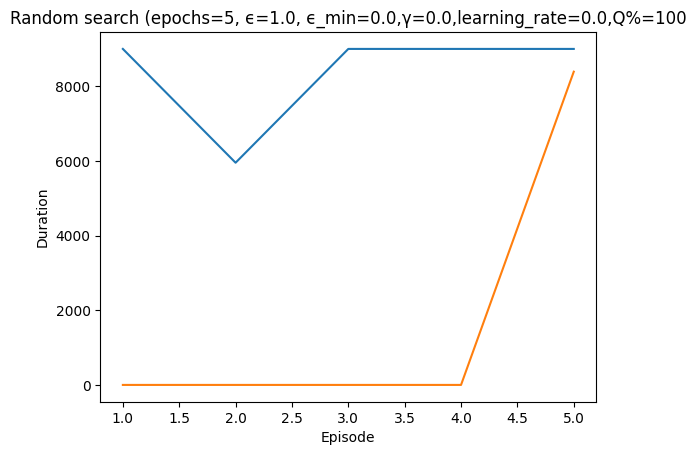

In [14]:
randomlearning_results = learner.epsilon_greedy_search(
    cyberbattlechain_10,
    ep,
    learner=a.QTabularLearner(ep, trained=qlearning_bestrun_10["learner"], gamma=0.0, learning_rate=0.0, exploit_percentile=100),
    episode_count=eval_episode_count,
    iteration_count=iteration_count,
    epsilon=1.0,  # purely random
    render=False,
    verbosity=Verbosity.Quiet,
    title="Random search",
)

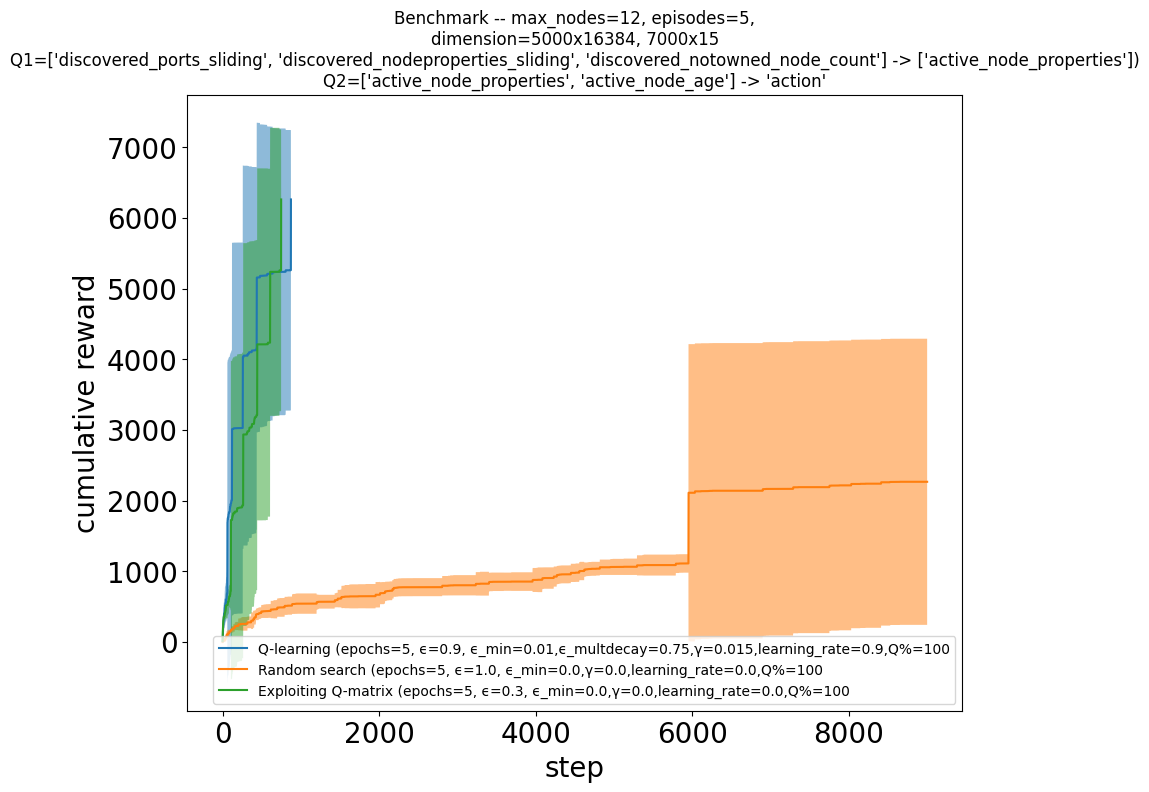

In [15]:
# Plot averaged cumulative rewards for Q-learning vs Random vs Q-Exploit
all_runs = [*qlearning_results, randomlearning_results, nolearning_results]

Q_source_10 = cast(a.QTabularLearner, qlearning_bestrun_10["learner"]).qsource
Q_attack_10 = cast(a.QTabularLearner, qlearning_bestrun_10["learner"]).qattack

p.plot_averaged_cummulative_rewards(
    all_runs=all_runs,
    title=f"Benchmark -- max_nodes={ep.maximum_node_count}, episodes={eval_episode_count},\n"
    f"dimension={Q_source_10.state_space.flat_size()}x{Q_source_10.action_space.flat_size()}, "
    f"{Q_attack_10.state_space.flat_size()}x{Q_attack_10.action_space.flat_size()}\n"
    f"Q1={[f.name() for f in Q_source_10.state_space.feature_selection]} "
    f"-> {[f.name() for f in Q_source_10.action_space.feature_selection]})\n"
    f"Q2={[f.name() for f in Q_attack_10.state_space.feature_selection]} -> 'action'",
    save_at=os.path.join(plots_dir, "benchmark-tabularq-cumrewards.png")
)

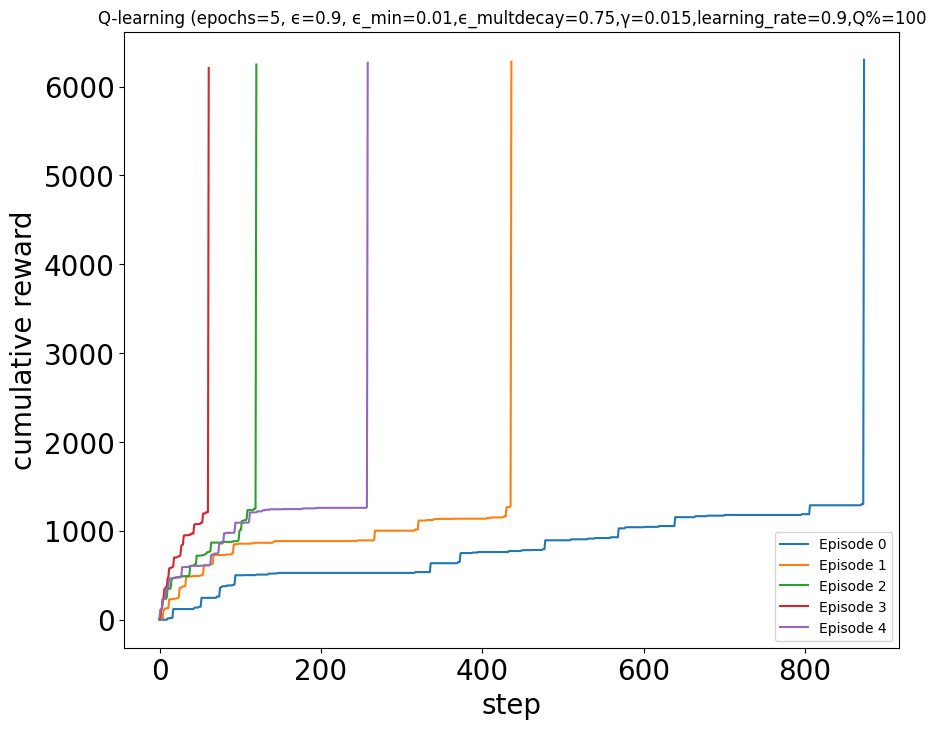

In [16]:
# plot cumulative rewards for all episodes
p.plot_all_episodes(qlearning_results[0])

In [17]:
# Plot the Q-matrices

In [18]:
# Print non-zero coordinate in the Q matrix Q_source
i = np.where(Q_source_10.qm)
q = Q_source_10.qm[i]
list(zip(np.array([Q_source_10.state_space.pretty_print(i) for i in i[0]]), np.array([Q_source_10.action_space.pretty_print(i) for i in i[1]]), q))

[('#551',
  array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
  14.33258239782043),
 ('#1233',
  array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
  6.266967666659498e-27),
 ('#1233',
  array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0]),
  9.70443908902219e-28),
 ('#1233', array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0]), 4500.81),
 ('#1637',
  array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
  99.21640265966583),
 ('#1639',
  array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
  0.2289560548632233),
 ('#1639',
  array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0]),
  16.463057152514757),
 ('#2960',
  array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
  91.69275540694952),
 ('#3961',
  array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
  165.84048338889914),
 ('#3961',
  array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0]),
  165.85463948462868)]

In [19]:
# Print non-zero coordinate in the Q matrix Q_attack
i2 = np.where(Q_attack_10.qm)
q2 = Q_attack_10.qm[i2]
list(zip([Q_attack_10.state_space.pretty_print(i) for i in i2[0]], [Q_attack_10.action_space.pretty_print(i) for i in i2[1]], q2))


##################################################

[('#51', 1, 0.00186169799570924),
 ('#51', 5, 0.000896159184037802),
 ('#51', 6, 0.0009300803011035924),
 ('#51', 8, 2.5132922942074738e-05),
 ('#51', 9, 0.00028122470887557874),
 ('#51', 10, 0.0009391332247480318),
 ('#51', 11, 8.774065794207465e-05),
 ('#51', 13, 0.0006260773499999996),
 ('#51', 14, 0.0002027837303881883),
 ('#671', 0, 6.885762640842868e-05),
 ('#671', 1, 2.5582321935000007e-05),
 ('#671', 2, 0.0003132355484815846),
 ('#671', 3, 6.686297551954052e-05),
 ('#671', 4, 2.4227852084999994e-05),
 ('#671', 5, 0.0002988630467136476),
 ('#671', 6, 0.0003460691932653763),
 ('#671', 7, 1.7123225849999996e-05),
 ('#671', 8, 8.929422585000001e-05),
 ('#671', 9, 6.934652261291174e-05),
 ('#671', 10, 0.00031787784935481634),
 ('#671', 11, 8.154610996239641e-06),
 ('#671', 12, 0.000592878032021214),
 ('#671', 13, 0.00031350467431828094),
 ('#671', 14, 4.386474483974997e-06),
 ('#815', 1, 1.3372222629200736),
 ('#815', 5, 5.126156133035009),
 ('#815', 6, 1.3379129352568238),
 ('#815'

## Transfer learning from size 4 to size 10
Exploiting Q-matrix learned from a different network.

###### Q-learning
Learning with: episode_count=5,iteration_count=9000,ϵ=0.9,ϵ_min=0.01, ϵ_multdecay=0.75,γ=0.015,learning_rate=0.9,Q%=100
  ## Episode: 1/5 'Q-learning' ϵ=0.9000, γ=0.015,learning_rate=0.9,Q%=100


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 5|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 5|reward:   14.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 1|Iteration 17|reward:  114.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 1|Iteration 17|reward:  114.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 1|Iteration 19|reward:  116.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 1|Iteration 19|reward:  116.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 1|Iteration 23|reward:  130.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 1|Iteration 23|reward:  130.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 1|Iteration 24|reward:  136.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 1|Iteration 24|reward:  136.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 1|Iteration 29|reward:  142.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 1|Iteration 29|reward:  142.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 1|Iteration 33|reward:  242.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 1|Iteration 33|reward:  242.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 1|Iteration 35|reward:  253.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 1|Iteration 35|reward:  253.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 1|Iteration 36|reward:  262.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 1|Iteration 36|reward:  262.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 1|Iteration 48|reward:  268.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 1|Iteration 48|reward:  268.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 1|Iteration 50|reward:  270.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 1|Iteration 50|reward:  270.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 1|Iteration 53|reward:  274.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 1|Iteration 53|reward:  274.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 1|Iteration 57|reward:  374.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 1|Iteration 57|reward:  374.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 1|Iteration 99|reward:  374.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 1|Iteration 110|reward:  376.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 1|Iteration 110|reward:  376.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 1|Iteration 150|reward:  387.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 1|Iteration 150|reward:  387.0|last_reward_at:  150|Elapsed Time: 0:00:00||

Episode 1|Iteration 160|reward:  395.0|last_reward_at:  150|Elapsed Time: 0:00:00||

Episode 1|Iteration 160|reward:  395.0|last_reward_at:  160|Elapsed Time: 0:00:00||

Episode 1|Iteration 171|reward:  401.0|last_reward_at:  160|Elapsed Time: 0:00:00||

Episode 1|Iteration 171|reward:  401.0|last_reward_at:  171|Elapsed Time: 0:00:00||

Episode 1|Iteration 213|reward:  401.0|last_reward_at:  171|Elapsed Time: 0:00:00||

Episode 1|Iteration 228|reward:  401.0|last_reward_at:  171|Elapsed Time: 0:00:00||

Episode 1|Iteration 267|reward:  401.0|last_reward_at:  171|Elapsed Time: 0:00:00||

Episode 1|Iteration 314|reward:  401.0|last_reward_at:  171|Elapsed Time: 0:00:00||

Episode 1|Iteration 342|reward:  401.0|last_reward_at:  171|Elapsed Time: 0:00:00||

Episode 1|Iteration 352|reward:  410.0|last_reward_at:  171|Elapsed Time: 0:00:00||

Episode 1|Iteration 352|reward:  410.0|last_reward_at:  352|Elapsed Time: 0:00:00||

Episode 1|Iteration 362|reward:  510.0|last_reward_at:  352|Elapsed Time: 0:00:00||

Episode 1|Iteration 362|reward:  510.0|last_reward_at:  362|Elapsed Time: 0:00:00||

Episode 1|Iteration 364|reward:  521.0|last_reward_at:  362|Elapsed Time: 0:00:00||

Episode 1|Iteration 364|reward:  521.0|last_reward_at:  364|Elapsed Time: 0:00:00||

Episode 1|Iteration 377|reward:  530.0|last_reward_at:  364|Elapsed Time: 0:00:00||

Episode 1|Iteration 377|reward:  530.0|last_reward_at:  377|Elapsed Time: 0:00:00||

Episode 1|Iteration 402|reward: 5530.0|last_reward_at:  377|Elapsed Time: 0:00:00||

Episode 1|Iteration 402|reward: 5530.0|last_reward_at:  402|Elapsed Time: 0:00:00||

  Episode 1 ended at t=402 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 8/101 (0.07)
    explore-remote: 7/122 (0.05)
    explore-connect: 0/138 (0.00)
    exploit-local: 1/6 (0.14)
    exploit-remote: 1/13 (0.07)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 12
  ## Episode: 2/5 'Q-learning' ϵ=0.6750, γ=0.015,learning_rate=0.9,Q%=100


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:   18.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:  118.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 10|reward:  132.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 10|reward:  132.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 2|Iteration 13|reward:  232.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 2|Iteration 13|reward:  232.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 2|Iteration 15|reward:  234.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 2|Iteration 15|reward:  234.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 2|Iteration 20|reward:  240.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 2|Iteration 20|reward:  240.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 2|Iteration 22|reward:  254.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 2|Iteration 22|reward:  254.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 2|Iteration 23|reward:  354.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 2|Iteration 23|reward:  354.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 2|Iteration 25|reward:  360.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 2|Iteration 25|reward:  360.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 2|Iteration 27|reward:  362.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 2|Iteration 27|reward:  362.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 2|Iteration 43|reward:  368.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 2|Iteration 43|reward:  368.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 2|Iteration 47|reward:  382.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 2|Iteration 47|reward:  382.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 2|Iteration 50|reward:  482.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 2|Iteration 50|reward:  482.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 2|Iteration 68|reward:  484.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 2|Iteration 68|reward:  484.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 2|Iteration 71|reward:  498.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 2|Iteration 71|reward:  498.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 2|Iteration 81|reward:  504.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 2|Iteration 81|reward:  504.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 2|Iteration 82|reward: 5504.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 2|Iteration 82|reward: 5504.0|last_reward_at:   82|Elapsed Time: 0:00:00||

  Episode 2 ended at t=82 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/20 (0.17)
    explore-remote: 7/21 (0.25)
    explore-connect: 0/20 (0.00)
    exploit-local: 2/1 (0.67)
    exploit-remote: 0/2 (0.00)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 11
  ## Episode: 3/5 'Q-learning' ϵ=0.5063, γ=0.015,learning_rate=0.9,Q%=100


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 5|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 5|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 3|Iteration 7|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 3|Iteration 7|reward:  228.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 3|Iteration 8|reward:  242.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 3|Iteration 8|reward:  242.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 3|Iteration 9|reward:  342.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 3|Iteration 9|reward:  342.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 3|Iteration 10|reward:  348.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 3|Iteration 10|reward:  348.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 3|Iteration 11|reward:  350.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 3|Iteration 11|reward:  350.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 3|Iteration 19|reward:  356.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 3|Iteration 19|reward:  356.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 3|Iteration 23|reward:  358.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 3|Iteration 23|reward:  358.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 3|Iteration 26|reward:  372.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 3|Iteration 26|reward:  372.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 3|Iteration 27|reward:  472.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 3|Iteration 27|reward:  472.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 3|Iteration 31|reward:  478.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 3|Iteration 31|reward:  478.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 3|Iteration 37|reward:  484.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 3|Iteration 37|reward:  484.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 3|Iteration 41|reward:  495.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 3|Iteration 41|reward:  495.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 3|Iteration 50|reward:  497.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 3|Iteration 50|reward:  497.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 3|Iteration 59|reward:  499.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 3|Iteration 59|reward:  499.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 3|Iteration 67|reward:  508.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 3|Iteration 67|reward:  508.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 3|Iteration 69|reward: 5508.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 3|Iteration 69|reward: 5508.0|last_reward_at:   69|Elapsed Time: 0:00:00||

  Episode 3 ended at t=69 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/11 (0.15)
    explore-remote: 6/11 (0.35)
    explore-connect: 0/13 (0.00)
    exploit-local: 5/6 (0.45)
    exploit-remote: 1/9 (0.10)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 12
  ## Episode: 4/5 'Q-learning' ϵ=0.3797, γ=0.015,learning_rate=0.9,Q%=100


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:  116.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:  116.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:  130.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:  130.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 7|reward:  230.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 7|reward:  230.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 4|Iteration 8|reward:  236.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 4|Iteration 8|reward:  236.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 4|Iteration 14|reward:  250.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 4|Iteration 14|reward:  250.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 4|Iteration 18|reward:  350.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 4|Iteration 18|reward:  350.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 4|Iteration 21|reward:  352.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 4|Iteration 21|reward:  352.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 4|Iteration 22|reward:  358.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 4|Iteration 22|reward:  358.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 4|Iteration 27|reward:  372.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 4|Iteration 27|reward:  372.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 4|Iteration 28|reward:  472.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 4|Iteration 28|reward:  472.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 4|Iteration 31|reward:  474.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 4|Iteration 31|reward:  474.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 4|Iteration 34|reward:  480.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 4|Iteration 34|reward:  480.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 4|Iteration 35|reward:  482.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 4|Iteration 35|reward:  482.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 4|Iteration 40|reward:  496.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 4|Iteration 40|reward:  496.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 4|Iteration 41|reward: 5496.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 4|Iteration 41|reward: 5496.0|last_reward_at:   41|Elapsed Time: 0:00:00||

  Episode 4 ended at t=41 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/2 (0.33)
    explore-remote: 4/9 (0.31)
    explore-connect: 0/7 (0.00)
    exploit-local: 5/2 (0.71)
    exploit-remote: 2/4 (0.33)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 8
  ## Episode: 5/5 'Q-learning' ϵ=0.2848, γ=0.015,learning_rate=0.9,Q%=100


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 5|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 5|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 5|Iteration 5|reward:  234.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 5|Iteration 5|reward:  234.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 5|Iteration 8|reward:  236.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 5|Iteration 8|reward:  236.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 5|Iteration 10|reward:  250.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 5|Iteration 10|reward:  250.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 5|Iteration 12|reward:  350.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 5|Iteration 12|reward:  350.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 5|Iteration 13|reward:  356.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 5|Iteration 13|reward:  356.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 5|Iteration 15|reward:  358.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 5|Iteration 15|reward:  358.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 5|Iteration 18|reward:  364.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 5|Iteration 18|reward:  364.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 5|Iteration 23|reward:  378.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 5|Iteration 23|reward:  378.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 5|Iteration 25|reward:  478.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 5|Iteration 25|reward:  478.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 5|Iteration 31|reward:  484.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 5|Iteration 31|reward:  484.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 5|Iteration 34|reward:  486.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 5|Iteration 34|reward:  486.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 5|Iteration 43|reward:  500.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 5|Iteration 43|reward:  500.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 5|Iteration 44|reward: 5500.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 5|Iteration 44|reward: 5500.0|last_reward_at:   44|Elapsed Time: 0:00:00||

  Episode 5 ended at t=44 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/2 (0.50)
    explore-remote: 4/6 (0.40)
    explore-connect: 0/8 (0.00)
    exploit-local: 4/3 (0.57)
    exploit-remote: 2/8 (0.20)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 6
simulation ended


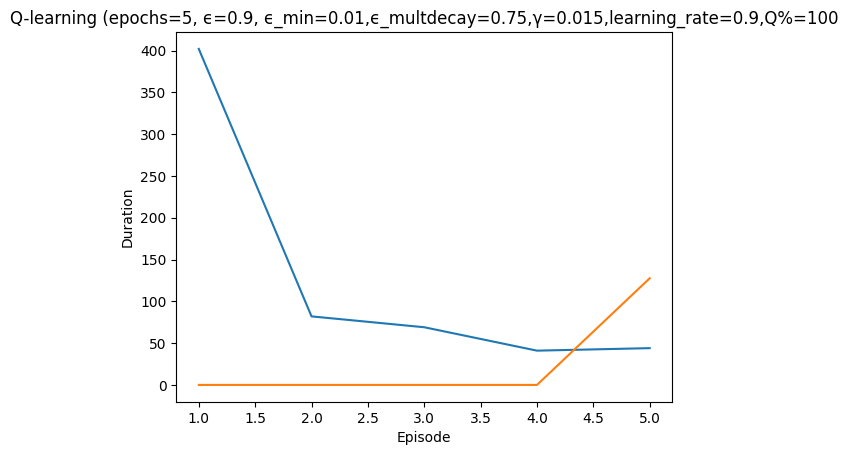

###### One shot on CyberBattleChain-10 - Trained on CyberBattleChain-4
Learning with: episode_count=5,iteration_count=9000,ϵ=0.5,ϵ_min=0.0, γ=0.0,learning_rate=0.0,Q%=0
  ## Episode: 1/5 'One shot on CyberBattleChain-10 - Trained on CyberBattleChain-4' ϵ=0.5000, γ=0.0,learning_rate=0.0,Q%=0


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 1|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 1|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 1|Iteration 9|reward:  116.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 1|Iteration 9|reward:  116.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 1|Iteration 11|reward:  130.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 1|Iteration 11|reward:  130.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 1|Iteration 12|reward:  230.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 1|Iteration 12|reward:  230.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 1|Iteration 14|reward:  232.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 1|Iteration 14|reward:  232.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 1|Iteration 19|reward:  238.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 1|Iteration 19|reward:  238.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 1|Iteration 23|reward:  244.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 1|Iteration 23|reward:  244.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 1|Iteration 47|reward:  244.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 1|Iteration 52|reward:  250.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 1|Iteration 52|reward:  250.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 1|Iteration 65|reward:  264.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 1|Iteration 65|reward:  264.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 1|Iteration 68|reward:  364.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 1|Iteration 68|reward:  364.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 1|Iteration 69|reward:  375.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 1|Iteration 69|reward:  375.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 1|Iteration 70|reward:  377.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 1|Iteration 70|reward:  377.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 1|Iteration 75|reward:  386.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 1|Iteration 75|reward:  386.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 1|Iteration 76|reward:  486.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 1|Iteration 76|reward:  486.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 1|Iteration 77|reward:  492.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 1|Iteration 77|reward:  492.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 1|Iteration 102|reward:  492.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 1|Iteration 115|reward:  494.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 1|Iteration 115|reward:  494.0|last_reward_at:  115|Elapsed Time: 0:00:00||

Episode 1|Iteration 132|reward:  500.0|last_reward_at:  115|Elapsed Time: 0:00:00||

Episode 1|Iteration 132|reward:  500.0|last_reward_at:  132|Elapsed Time: 0:00:00||

Episode 1|Iteration 134|reward:  514.0|last_reward_at:  132|Elapsed Time: 0:00:00||

Episode 1|Iteration 134|reward:  514.0|last_reward_at:  134|Elapsed Time: 0:00:00||

Episode 1|Iteration 136|reward:  516.0|last_reward_at:  134|Elapsed Time: 0:00:00||

Episode 1|Iteration 136|reward:  516.0|last_reward_at:  136|Elapsed Time: 0:00:00||

Episode 1|Iteration 137|reward:  616.0|last_reward_at:  136|Elapsed Time: 0:00:00||

Episode 1|Iteration 137|reward:  616.0|last_reward_at:  137|Elapsed Time: 0:00:00||

Episode 1|Iteration 144|reward:  622.0|last_reward_at:  137|Elapsed Time: 0:00:00||

Episode 1|Iteration 144|reward:  622.0|last_reward_at:  144|Elapsed Time: 0:00:00||

Episode 1|Iteration 145|reward:  633.0|last_reward_at:  144|Elapsed Time: 0:00:00||

Episode 1|Iteration 145|reward:  633.0|last_reward_at:  145|Elapsed Time: 0:00:00||

Episode 1|Iteration 155|reward:  639.0|last_reward_at:  145|Elapsed Time: 0:00:00||

Episode 1|Iteration 155|reward:  639.0|last_reward_at:  155|Elapsed Time: 0:00:00||

Episode 1|Iteration 162|reward:  647.0|last_reward_at:  155|Elapsed Time: 0:00:00||

Episode 1|Iteration 162|reward:  647.0|last_reward_at:  162|Elapsed Time: 0:00:00||

Episode 1|Iteration 163|reward:  653.0|last_reward_at:  162|Elapsed Time: 0:00:00||

Episode 1|Iteration 163|reward:  653.0|last_reward_at:  163|Elapsed Time: 0:00:00||

Episode 1|Iteration 174|reward:  662.0|last_reward_at:  163|Elapsed Time: 0:00:00||

Episode 1|Iteration 174|reward:  662.0|last_reward_at:  174|Elapsed Time: 0:00:00||

Episode 1|Iteration 175|reward:  762.0|last_reward_at:  174|Elapsed Time: 0:00:00||

Episode 1|Iteration 175|reward:  762.0|last_reward_at:  175|Elapsed Time: 0:00:00||

Episode 1|Iteration 189|reward:  764.0|last_reward_at:  175|Elapsed Time: 0:00:00||

Episode 1|Iteration 189|reward:  764.0|last_reward_at:  189|Elapsed Time: 0:00:00||

Episode 1|Iteration 215|reward:  764.0|last_reward_at:  189|Elapsed Time: 0:00:00||

Episode 1|Iteration 228|reward:  764.0|last_reward_at:  189|Elapsed Time: 0:00:00||

Episode 1|Iteration 242|reward:  778.0|last_reward_at:  189|Elapsed Time: 0:00:01||

Episode 1|Iteration 242|reward:  778.0|last_reward_at:  242|Elapsed Time: 0:00:01||

Episode 1|Iteration 243|reward:  878.0|last_reward_at:  242|Elapsed Time: 0:00:01||

Episode 1|Iteration 243|reward:  878.0|last_reward_at:  243|Elapsed Time: 0:00:01||

Episode 1|Iteration 262|reward:  889.0|last_reward_at:  243|Elapsed Time: 0:00:01||

Episode 1|Iteration 262|reward:  889.0|last_reward_at:  262|Elapsed Time: 0:00:01||

Episode 1|Iteration 269|reward:  895.0|last_reward_at:  262|Elapsed Time: 0:00:01||

Episode 1|Iteration 269|reward:  895.0|last_reward_at:  269|Elapsed Time: 0:00:01||

Episode 1|Iteration 272|reward:  903.0|last_reward_at:  269|Elapsed Time: 0:00:01||

Episode 1|Iteration 272|reward:  903.0|last_reward_at:  272|Elapsed Time: 0:00:01||

Episode 1|Iteration 274|reward:  912.0|last_reward_at:  272|Elapsed Time: 0:00:01||

Episode 1|Iteration 274|reward:  912.0|last_reward_at:  274|Elapsed Time: 0:00:01||

Episode 1|Iteration 276|reward: 1012.0|last_reward_at:  274|Elapsed Time: 0:00:01||

Episode 1|Iteration 276|reward: 1012.0|last_reward_at:  276|Elapsed Time: 0:00:01||

Episode 1|Iteration 278|reward: 1014.0|last_reward_at:  276|Elapsed Time: 0:00:01||

Episode 1|Iteration 278|reward: 1014.0|last_reward_at:  278|Elapsed Time: 0:00:01||

Episode 1|Iteration 299|reward: 1014.0|last_reward_at:  278|Elapsed Time: 0:00:01||

Episode 1|Iteration 323|reward: 1014.0|last_reward_at:  278|Elapsed Time: 0:00:01||

Episode 1|Iteration 330|reward: 1016.0|last_reward_at:  278|Elapsed Time: 0:00:01||

Episode 1|Iteration 330|reward: 1016.0|last_reward_at:  330|Elapsed Time: 0:00:01||

Episode 1|Iteration 332|reward: 1022.0|last_reward_at:  330|Elapsed Time: 0:00:01||

Episode 1|Iteration 332|reward: 1022.0|last_reward_at:  332|Elapsed Time: 0:00:01||

Episode 1|Iteration 342|reward: 1022.0|last_reward_at:  332|Elapsed Time: 0:00:01||

Episode 1|Iteration 362|reward: 1022.0|last_reward_at:  332|Elapsed Time: 0:00:01||

Episode 1|Iteration 386|reward: 1022.0|last_reward_at:  332|Elapsed Time: 0:00:01||

Episode 1|Iteration 410|reward: 1022.0|last_reward_at:  332|Elapsed Time: 0:00:01||

Episode 1|Iteration 429|reward: 1022.0|last_reward_at:  332|Elapsed Time: 0:00:01||

Episode 1|Iteration 451|reward: 1022.0|last_reward_at:  332|Elapsed Time: 0:00:02||

Episode 1|Iteration 469|reward: 1022.0|last_reward_at:  332|Elapsed Time: 0:00:02||

Episode 1|Iteration 490|reward: 1036.0|last_reward_at:  332|Elapsed Time: 0:00:02||

Episode 1|Iteration 490|reward: 1036.0|last_reward_at:  490|Elapsed Time: 0:00:02||

Episode 1|Iteration 493|reward: 1136.0|last_reward_at:  490|Elapsed Time: 0:00:02||

Episode 1|Iteration 493|reward: 1136.0|last_reward_at:  493|Elapsed Time: 0:00:02||

Episode 1|Iteration 510|reward: 1142.0|last_reward_at:  493|Elapsed Time: 0:00:02||

Episode 1|Iteration 510|reward: 1142.0|last_reward_at:  510|Elapsed Time: 0:00:02||

Episode 1|Iteration 520|reward: 1144.0|last_reward_at:  510|Elapsed Time: 0:00:02||

Episode 1|Iteration 520|reward: 1144.0|last_reward_at:  520|Elapsed Time: 0:00:02||

Episode 1|Iteration 541|reward: 1144.0|last_reward_at:  520|Elapsed Time: 0:00:02||

Episode 1|Iteration 560|reward: 1144.0|last_reward_at:  520|Elapsed Time: 0:00:02||

Episode 1|Iteration 563|reward: 1155.0|last_reward_at:  520|Elapsed Time: 0:00:02||

Episode 1|Iteration 563|reward: 1155.0|last_reward_at:  563|Elapsed Time: 0:00:02||

Episode 1|Iteration 584|reward: 1155.0|last_reward_at:  563|Elapsed Time: 0:00:02||

Episode 1|Iteration 593|reward: 1163.0|last_reward_at:  563|Elapsed Time: 0:00:02||

Episode 1|Iteration 593|reward: 1163.0|last_reward_at:  593|Elapsed Time: 0:00:02||

Episode 1|Iteration 594|reward: 1165.0|last_reward_at:  593|Elapsed Time: 0:00:02||

Episode 1|Iteration 594|reward: 1165.0|last_reward_at:  594|Elapsed Time: 0:00:02||

Episode 1|Iteration 615|reward: 1165.0|last_reward_at:  594|Elapsed Time: 0:00:02||

Episode 1|Iteration 628|reward: 1174.0|last_reward_at:  594|Elapsed Time: 0:00:02||

Episode 1|Iteration 628|reward: 1174.0|last_reward_at:  628|Elapsed Time: 0:00:02||

Episode 1|Iteration 629|reward: 1274.0|last_reward_at:  628|Elapsed Time: 0:00:02||

Episode 1|Iteration 629|reward: 1274.0|last_reward_at:  629|Elapsed Time: 0:00:02||

Episode 1|Iteration 636|reward: 1280.0|last_reward_at:  629|Elapsed Time: 0:00:03||

Episode 1|Iteration 636|reward: 1280.0|last_reward_at:  636|Elapsed Time: 0:00:03||

Episode 1|Iteration 651|reward: 1280.0|last_reward_at:  636|Elapsed Time: 0:00:03||

Episode 1|Iteration 668|reward: 1280.0|last_reward_at:  636|Elapsed Time: 0:00:03||

Episode 1|Iteration 684|reward: 1280.0|last_reward_at:  636|Elapsed Time: 0:00:03||

Episode 1|Iteration 702|reward: 1280.0|last_reward_at:  636|Elapsed Time: 0:00:03||

Episode 1|Iteration 714|reward: 1294.0|last_reward_at:  636|Elapsed Time: 0:00:03||

Episode 1|Iteration 714|reward: 1294.0|last_reward_at:  714|Elapsed Time: 0:00:03||

Episode 1|Iteration 716|reward: 6294.0|last_reward_at:  714|Elapsed Time: 0:00:03||

Episode 1|Iteration 716|reward: 6294.0|last_reward_at:  716|Elapsed Time: 0:00:03||

  Episode 1 ended at t=716 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 15/148 (0.09)
    explore-remote: 18/191 (0.09)
    explore-connect: 0/209 (0.00)
    exploit-local: 5/70 (0.07)
    exploit-remote: 2/47 (0.04)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 228
  ## Episode: 2/5 'One shot on CyberBattleChain-10 - Trained on CyberBattleChain-4' ϵ=0.5000, γ=0.0,learning_rate=0.0,Q%=0


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 15|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 15|reward:   14.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 2|Iteration 17|reward:  114.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 2|Iteration 17|reward:  114.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 2|Iteration 23|reward:  125.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 2|Iteration 23|reward:  125.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 2|Iteration 25|reward:  134.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 2|Iteration 25|reward:  134.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 2|Iteration 26|reward:  136.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 2|Iteration 26|reward:  136.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 2|Iteration 27|reward:  236.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 2|Iteration 27|reward:  236.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 2|Iteration 38|reward:  242.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 2|Iteration 38|reward:  242.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 2|Iteration 49|reward:  244.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 2|Iteration 49|reward:  244.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 2|Iteration 53|reward:  258.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 2|Iteration 53|reward:  258.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 2|Iteration 54|reward:  358.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 2|Iteration 54|reward:  358.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 2|Iteration 55|reward:  360.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 2|Iteration 55|reward:  360.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 2|Iteration 68|reward:  362.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 2|Iteration 68|reward:  362.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 2|Iteration 69|reward:  368.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 2|Iteration 69|reward:  368.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 2|Iteration 74|reward:  374.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 2|Iteration 74|reward:  374.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 2|Iteration 95|reward:  385.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 2|Iteration 95|reward:  385.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 2|Iteration 96|reward:  391.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 2|Iteration 96|reward:  391.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 2|Iteration 98|reward:  400.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 2|Iteration 98|reward:  400.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 2|Iteration 103|reward:  500.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 2|Iteration 103|reward:  500.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 2|Iteration 106|reward:  506.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 2|Iteration 106|reward:  506.0|last_reward_at:  106|Elapsed Time: 0:00:00||

Episode 2|Iteration 129|reward:  506.0|last_reward_at:  106|Elapsed Time: 0:00:00||

Episode 2|Iteration 150|reward:  506.0|last_reward_at:  106|Elapsed Time: 0:00:00||

Episode 2|Iteration 173|reward:  517.0|last_reward_at:  106|Elapsed Time: 0:00:00||

Episode 2|Iteration 173|reward:  517.0|last_reward_at:  173|Elapsed Time: 0:00:00||

Episode 2|Iteration 183|reward:  519.0|last_reward_at:  173|Elapsed Time: 0:00:00||

Episode 2|Iteration 183|reward:  519.0|last_reward_at:  183|Elapsed Time: 0:00:00||

Episode 2|Iteration 206|reward:  519.0|last_reward_at:  183|Elapsed Time: 0:00:00||

Episode 2|Iteration 228|reward:  519.0|last_reward_at:  183|Elapsed Time: 0:00:01||

Episode 2|Iteration 245|reward:  528.0|last_reward_at:  183|Elapsed Time: 0:00:01||

Episode 2|Iteration 245|reward:  528.0|last_reward_at:  245|Elapsed Time: 0:00:01||

Episode 2|Iteration 246|reward:  628.0|last_reward_at:  245|Elapsed Time: 0:00:01||

Episode 2|Iteration 246|reward:  628.0|last_reward_at:  246|Elapsed Time: 0:00:01||

Episode 2|Iteration 268|reward:  628.0|last_reward_at:  246|Elapsed Time: 0:00:01||

Episode 2|Iteration 278|reward:  642.0|last_reward_at:  246|Elapsed Time: 0:00:01||

Episode 2|Iteration 278|reward:  642.0|last_reward_at:  278|Elapsed Time: 0:00:01||

Episode 2|Iteration 280|reward:  742.0|last_reward_at:  278|Elapsed Time: 0:00:01||

Episode 2|Iteration 280|reward:  742.0|last_reward_at:  280|Elapsed Time: 0:00:01||

Episode 2|Iteration 283|reward:  744.0|last_reward_at:  280|Elapsed Time: 0:00:01||

Episode 2|Iteration 283|reward:  744.0|last_reward_at:  283|Elapsed Time: 0:00:01||

Episode 2|Iteration 301|reward:  758.0|last_reward_at:  283|Elapsed Time: 0:00:01||

Episode 2|Iteration 301|reward:  758.0|last_reward_at:  301|Elapsed Time: 0:00:01||

Episode 2|Iteration 304|reward:  858.0|last_reward_at:  301|Elapsed Time: 0:00:01||

Episode 2|Iteration 304|reward:  858.0|last_reward_at:  304|Elapsed Time: 0:00:01||

Episode 2|Iteration 305|reward:  864.0|last_reward_at:  304|Elapsed Time: 0:00:01||

Episode 2|Iteration 305|reward:  864.0|last_reward_at:  305|Elapsed Time: 0:00:01||

Episode 2|Iteration 318|reward:  866.0|last_reward_at:  305|Elapsed Time: 0:00:01||

Episode 2|Iteration 318|reward:  866.0|last_reward_at:  318|Elapsed Time: 0:00:01||

Episode 2|Iteration 331|reward:  872.0|last_reward_at:  318|Elapsed Time: 0:00:01||

Episode 2|Iteration 331|reward:  872.0|last_reward_at:  331|Elapsed Time: 0:00:01||

Episode 2|Iteration 357|reward:  872.0|last_reward_at:  331|Elapsed Time: 0:00:01||

Episode 2|Iteration 358|reward:  878.0|last_reward_at:  331|Elapsed Time: 0:00:01||

Episode 2|Iteration 358|reward:  878.0|last_reward_at:  358|Elapsed Time: 0:00:01||

Episode 2|Iteration 360|reward:  892.0|last_reward_at:  358|Elapsed Time: 0:00:01||

Episode 2|Iteration 360|reward:  892.0|last_reward_at:  360|Elapsed Time: 0:00:01||

Episode 2|Iteration 361|reward:  992.0|last_reward_at:  360|Elapsed Time: 0:00:01||

Episode 2|Iteration 361|reward:  992.0|last_reward_at:  361|Elapsed Time: 0:00:01||

Episode 2|Iteration 377|reward:  994.0|last_reward_at:  361|Elapsed Time: 0:00:01||

Episode 2|Iteration 377|reward:  994.0|last_reward_at:  377|Elapsed Time: 0:00:01||

Episode 2|Iteration 397|reward:  994.0|last_reward_at:  377|Elapsed Time: 0:00:01||

Episode 2|Iteration 411|reward: 1000.0|last_reward_at:  377|Elapsed Time: 0:00:01||

Episode 2|Iteration 411|reward: 1000.0|last_reward_at:  411|Elapsed Time: 0:00:01||

Episode 2|Iteration 419|reward: 1006.0|last_reward_at:  411|Elapsed Time: 0:00:01||

Episode 2|Iteration 419|reward: 1006.0|last_reward_at:  419|Elapsed Time: 0:00:01||

Episode 2|Iteration 438|reward: 1006.0|last_reward_at:  419|Elapsed Time: 0:00:02||

Episode 2|Iteration 448|reward: 1017.0|last_reward_at:  419|Elapsed Time: 0:00:02||

Episode 2|Iteration 448|reward: 1017.0|last_reward_at:  448|Elapsed Time: 0:00:02||

Episode 2|Iteration 456|reward: 1026.0|last_reward_at:  448|Elapsed Time: 0:00:02||

Episode 2|Iteration 456|reward: 1026.0|last_reward_at:  456|Elapsed Time: 0:00:02||

Episode 2|Iteration 457|reward: 1126.0|last_reward_at:  456|Elapsed Time: 0:00:02||

Episode 2|Iteration 457|reward: 1126.0|last_reward_at:  457|Elapsed Time: 0:00:02||

Episode 2|Iteration 465|reward: 1137.0|last_reward_at:  457|Elapsed Time: 0:00:02||

Episode 2|Iteration 465|reward: 1137.0|last_reward_at:  465|Elapsed Time: 0:00:02||

Episode 2|Iteration 470|reward: 1143.0|last_reward_at:  465|Elapsed Time: 0:00:02||

Episode 2|Iteration 470|reward: 1143.0|last_reward_at:  470|Elapsed Time: 0:00:02||

Episode 2|Iteration 486|reward: 1151.0|last_reward_at:  470|Elapsed Time: 0:00:02||

Episode 2|Iteration 486|reward: 1151.0|last_reward_at:  486|Elapsed Time: 0:00:02||

Episode 2|Iteration 488|reward: 1157.0|last_reward_at:  486|Elapsed Time: 0:00:02||

Episode 2|Iteration 488|reward: 1157.0|last_reward_at:  488|Elapsed Time: 0:00:02||

Episode 2|Iteration 491|reward: 1166.0|last_reward_at:  488|Elapsed Time: 0:00:02||

Episode 2|Iteration 491|reward: 1166.0|last_reward_at:  491|Elapsed Time: 0:00:02||

Episode 2|Iteration 493|reward: 1266.0|last_reward_at:  491|Elapsed Time: 0:00:02||

Episode 2|Iteration 493|reward: 1266.0|last_reward_at:  493|Elapsed Time: 0:00:02||

Episode 2|Iteration 500|reward: 1268.0|last_reward_at:  493|Elapsed Time: 0:00:02||

Episode 2|Iteration 500|reward: 1268.0|last_reward_at:  500|Elapsed Time: 0:00:02||

Episode 2|Iteration 501|reward: 1274.0|last_reward_at:  500|Elapsed Time: 0:00:02||

Episode 2|Iteration 501|reward: 1274.0|last_reward_at:  501|Elapsed Time: 0:00:02||

Episode 2|Iteration 523|reward: 1274.0|last_reward_at:  501|Elapsed Time: 0:00:02||

Episode 2|Iteration 544|reward: 1274.0|last_reward_at:  501|Elapsed Time: 0:00:02||

Episode 2|Iteration 562|reward: 1274.0|last_reward_at:  501|Elapsed Time: 0:00:02||

Episode 2|Iteration 572|reward: 1276.0|last_reward_at:  501|Elapsed Time: 0:00:02||

Episode 2|Iteration 572|reward: 1276.0|last_reward_at:  572|Elapsed Time: 0:00:02||

Episode 2|Iteration 593|reward: 1276.0|last_reward_at:  572|Elapsed Time: 0:00:02||

Episode 2|Iteration 611|reward: 1287.0|last_reward_at:  572|Elapsed Time: 0:00:02||

Episode 2|Iteration 611|reward: 1287.0|last_reward_at:  611|Elapsed Time: 0:00:02||

Episode 2|Iteration 630|reward: 1287.0|last_reward_at:  611|Elapsed Time: 0:00:03||

Episode 2|Iteration 648|reward: 1287.0|last_reward_at:  611|Elapsed Time: 0:00:03||

Episode 2|Iteration 666|reward: 1287.0|last_reward_at:  611|Elapsed Time: 0:00:03||

Episode 2|Iteration 684|reward: 1287.0|last_reward_at:  611|Elapsed Time: 0:00:03||

Episode 2|Iteration 702|reward: 1287.0|last_reward_at:  611|Elapsed Time: 0:00:03||

Episode 2|Iteration 722|reward: 1287.0|last_reward_at:  611|Elapsed Time: 0:00:03||

Episode 2|Iteration 741|reward: 1287.0|last_reward_at:  611|Elapsed Time: 0:00:03||

Episode 2|Iteration 761|reward: 1287.0|last_reward_at:  611|Elapsed Time: 0:00:03||

Episode 2|Iteration 780|reward: 1287.0|last_reward_at:  611|Elapsed Time: 0:00:03||

Episode 2|Iteration 798|reward: 1287.0|last_reward_at:  611|Elapsed Time: 0:00:03||

Episode 2|Iteration 816|reward: 1287.0|last_reward_at:  611|Elapsed Time: 0:00:04||

Episode 2|Iteration 835|reward: 1287.0|last_reward_at:  611|Elapsed Time: 0:00:04||

Episode 2|Iteration 851|reward: 1287.0|last_reward_at:  611|Elapsed Time: 0:00:04||

Episode 2|Iteration 868|reward: 1287.0|last_reward_at:  611|Elapsed Time: 0:00:04||

Episode 2|Iteration 873|reward: 1296.0|last_reward_at:  611|Elapsed Time: 0:00:04||

Episode 2|Iteration 873|reward: 1296.0|last_reward_at:  873|Elapsed Time: 0:00:04||

Episode 2|Iteration 878|reward: 6296.0|last_reward_at:  873|Elapsed Time: 0:00:04||

Episode 2|Iteration 878|reward: 6296.0|last_reward_at:  878|Elapsed Time: 0:00:04||

  Episode 2 ended at t=878 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 18/190 (0.09)
    explore-remote: 14/227 (0.06)
    explore-connect: 0/257 (0.00)
    exploit-local: 3/100 (0.03)
    exploit-remote: 6/52 (0.10)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 284
  ## Episode: 3/5 'One shot on CyberBattleChain-10 - Trained on CyberBattleChain-4' ϵ=0.5000, γ=0.0,learning_rate=0.0,Q%=0


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 12|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 12|reward:   14.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 3|Iteration 14|reward:   18.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 3|Iteration 14|reward:   18.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 3|Iteration 15|reward:  118.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 3|Iteration 15|reward:  118.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 3|Iteration 16|reward:  120.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 3|Iteration 16|reward:  120.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 3|Iteration 19|reward:  131.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 3|Iteration 19|reward:  131.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 3|Iteration 23|reward:  140.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 3|Iteration 23|reward:  140.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 3|Iteration 24|reward:  240.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 3|Iteration 24|reward:  240.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 3|Iteration 29|reward:  246.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 3|Iteration 29|reward:  246.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 3|Iteration 31|reward:  252.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 3|Iteration 31|reward:  252.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 3|Iteration 54|reward:  263.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 3|Iteration 54|reward:  263.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 3|Iteration 62|reward:  272.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 3|Iteration 62|reward:  272.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 3|Iteration 63|reward:  372.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 3|Iteration 63|reward:  372.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 3|Iteration 66|reward:  374.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 3|Iteration 66|reward:  374.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 3|Iteration 88|reward:  376.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 3|Iteration 88|reward:  376.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 3|Iteration 102|reward:  387.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 3|Iteration 102|reward:  387.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 3|Iteration 124|reward:  393.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 3|Iteration 124|reward:  393.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 3|Iteration 139|reward:  402.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 3|Iteration 139|reward:  402.0|last_reward_at:  139|Elapsed Time: 0:00:00||

Episode 3|Iteration 140|reward:  502.0|last_reward_at:  139|Elapsed Time: 0:00:00||

Episode 3|Iteration 140|reward:  502.0|last_reward_at:  140|Elapsed Time: 0:00:00||

Episode 3|Iteration 141|reward:  513.0|last_reward_at:  140|Elapsed Time: 0:00:00||

Episode 3|Iteration 141|reward:  513.0|last_reward_at:  141|Elapsed Time: 0:00:00||

Episode 3|Iteration 162|reward:  515.0|last_reward_at:  141|Elapsed Time: 0:00:00||

Episode 3|Iteration 162|reward:  515.0|last_reward_at:  162|Elapsed Time: 0:00:00||

Episode 3|Iteration 187|reward:  519.0|last_reward_at:  162|Elapsed Time: 0:00:00||

Episode 3|Iteration 187|reward:  519.0|last_reward_at:  187|Elapsed Time: 0:00:00||

Episode 3|Iteration 209|reward:  519.0|last_reward_at:  187|Elapsed Time: 0:00:00||

Episode 3|Iteration 228|reward:  519.0|last_reward_at:  187|Elapsed Time: 0:00:00||

Episode 3|Iteration 254|reward:  519.0|last_reward_at:  187|Elapsed Time: 0:00:00||

Episode 3|Iteration 279|reward:  519.0|last_reward_at:  187|Elapsed Time: 0:00:01||

Episode 3|Iteration 294|reward:  525.0|last_reward_at:  187|Elapsed Time: 0:00:01||

Episode 3|Iteration 294|reward:  525.0|last_reward_at:  294|Elapsed Time: 0:00:01||

Episode 3|Iteration 316|reward:  525.0|last_reward_at:  294|Elapsed Time: 0:00:01||

Episode 3|Iteration 341|reward:  525.0|last_reward_at:  294|Elapsed Time: 0:00:01||

Episode 3|Iteration 365|reward:  525.0|last_reward_at:  294|Elapsed Time: 0:00:01||

Episode 3|Iteration 391|reward:  525.0|last_reward_at:  294|Elapsed Time: 0:00:01||

Episode 3|Iteration 417|reward:  525.0|last_reward_at:  294|Elapsed Time: 0:00:01||

Episode 3|Iteration 443|reward:  525.0|last_reward_at:  294|Elapsed Time: 0:00:01||

Episode 3|Iteration 456|reward:  525.0|last_reward_at:  294|Elapsed Time: 0:00:01||

Episode 3|Iteration 480|reward:  525.0|last_reward_at:  294|Elapsed Time: 0:00:01||

Episode 3|Iteration 495|reward:  534.0|last_reward_at:  294|Elapsed Time: 0:00:01||

Episode 3|Iteration 495|reward:  534.0|last_reward_at:  495|Elapsed Time: 0:00:01||

Episode 3|Iteration 498|reward:  634.0|last_reward_at:  495|Elapsed Time: 0:00:01||

Episode 3|Iteration 498|reward:  634.0|last_reward_at:  498|Elapsed Time: 0:00:01||

Episode 3|Iteration 509|reward:  648.0|last_reward_at:  498|Elapsed Time: 0:00:02||

Episode 3|Iteration 509|reward:  648.0|last_reward_at:  509|Elapsed Time: 0:00:02||

Episode 3|Iteration 510|reward:  748.0|last_reward_at:  509|Elapsed Time: 0:00:02||

Episode 3|Iteration 510|reward:  748.0|last_reward_at:  510|Elapsed Time: 0:00:02||

Episode 3|Iteration 533|reward:  748.0|last_reward_at:  510|Elapsed Time: 0:00:02||

Episode 3|Iteration 556|reward:  754.0|last_reward_at:  510|Elapsed Time: 0:00:02||

Episode 3|Iteration 556|reward:  754.0|last_reward_at:  556|Elapsed Time: 0:00:02||

Episode 3|Iteration 558|reward:  765.0|last_reward_at:  556|Elapsed Time: 0:00:02||

Episode 3|Iteration 558|reward:  765.0|last_reward_at:  558|Elapsed Time: 0:00:02||

Episode 3|Iteration 561|reward:  769.0|last_reward_at:  558|Elapsed Time: 0:00:02||

Episode 3|Iteration 561|reward:  769.0|last_reward_at:  561|Elapsed Time: 0:00:02||

Episode 3|Iteration 576|reward:  775.0|last_reward_at:  561|Elapsed Time: 0:00:02||

Episode 3|Iteration 576|reward:  775.0|last_reward_at:  576|Elapsed Time: 0:00:02||

Episode 3|Iteration 593|reward:  781.0|last_reward_at:  576|Elapsed Time: 0:00:02||

Episode 3|Iteration 593|reward:  781.0|last_reward_at:  593|Elapsed Time: 0:00:02||

Episode 3|Iteration 597|reward:  790.0|last_reward_at:  593|Elapsed Time: 0:00:02||

Episode 3|Iteration 597|reward:  790.0|last_reward_at:  597|Elapsed Time: 0:00:02||

Episode 3|Iteration 598|reward:  890.0|last_reward_at:  597|Elapsed Time: 0:00:02||

Episode 3|Iteration 598|reward:  890.0|last_reward_at:  598|Elapsed Time: 0:00:02||

Episode 3|Iteration 613|reward:  892.0|last_reward_at:  598|Elapsed Time: 0:00:02||

Episode 3|Iteration 613|reward:  892.0|last_reward_at:  613|Elapsed Time: 0:00:02||

Episode 3|Iteration 634|reward:  906.0|last_reward_at:  613|Elapsed Time: 0:00:02||

Episode 3|Iteration 634|reward:  906.0|last_reward_at:  634|Elapsed Time: 0:00:02||

Episode 3|Iteration 636|reward: 1006.0|last_reward_at:  634|Elapsed Time: 0:00:02||

Episode 3|Iteration 636|reward: 1006.0|last_reward_at:  636|Elapsed Time: 0:00:02||

Episode 3|Iteration 641|reward: 1012.0|last_reward_at:  636|Elapsed Time: 0:00:02||

Episode 3|Iteration 641|reward: 1012.0|last_reward_at:  641|Elapsed Time: 0:00:02||

Episode 3|Iteration 664|reward: 1012.0|last_reward_at:  641|Elapsed Time: 0:00:02||

Episode 3|Iteration 684|reward: 1012.0|last_reward_at:  641|Elapsed Time: 0:00:02||

Episode 3|Iteration 701|reward: 1018.0|last_reward_at:  641|Elapsed Time: 0:00:02||

Episode 3|Iteration 701|reward: 1018.0|last_reward_at:  701|Elapsed Time: 0:00:02||

Episode 3|Iteration 703|reward: 1032.0|last_reward_at:  701|Elapsed Time: 0:00:02||

Episode 3|Iteration 703|reward: 1032.0|last_reward_at:  703|Elapsed Time: 0:00:02||

Episode 3|Iteration 704|reward: 1132.0|last_reward_at:  703|Elapsed Time: 0:00:02||

Episode 3|Iteration 704|reward: 1132.0|last_reward_at:  704|Elapsed Time: 0:00:02||

Episode 3|Iteration 708|reward: 1138.0|last_reward_at:  704|Elapsed Time: 0:00:03||

Episode 3|Iteration 708|reward: 1138.0|last_reward_at:  708|Elapsed Time: 0:00:03||

Episode 3|Iteration 718|reward: 1152.0|last_reward_at:  708|Elapsed Time: 0:00:03||

Episode 3|Iteration 718|reward: 1152.0|last_reward_at:  718|Elapsed Time: 0:00:03||

Episode 3|Iteration 719|reward: 1252.0|last_reward_at:  718|Elapsed Time: 0:00:03||

Episode 3|Iteration 719|reward: 1252.0|last_reward_at:  719|Elapsed Time: 0:00:03||

Episode 3|Iteration 723|reward: 1266.0|last_reward_at:  719|Elapsed Time: 0:00:03||

Episode 3|Iteration 723|reward: 1266.0|last_reward_at:  723|Elapsed Time: 0:00:03||

Episode 3|Iteration 726|reward: 6266.0|last_reward_at:  723|Elapsed Time: 0:00:03||

Episode 3|Iteration 726|reward: 6266.0|last_reward_at:  726|Elapsed Time: 0:00:03||

  Episode 3 ended at t=726 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 16/134 (0.11)
    explore-remote: 14/204 (0.06)
    explore-connect: 0/223 (0.00)
    exploit-local: 2/81 (0.02)
    exploit-remote: 2/39 (0.05)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 217
  ## Episode: 4/5 'One shot on CyberBattleChain-10 - Trained on CyberBattleChain-4' ϵ=0.5000, γ=0.0,learning_rate=0.0,Q%=0


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 5|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 5|reward:  114.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 4|Iteration 12|reward:  116.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 4|Iteration 12|reward:  116.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 4|Iteration 17|reward:  130.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 4|Iteration 17|reward:  130.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 4|Iteration 18|reward:  230.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 4|Iteration 18|reward:  230.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 4|Iteration 23|reward:  236.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 4|Iteration 23|reward:  236.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 4|Iteration 31|reward:  242.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 4|Iteration 31|reward:  242.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 4|Iteration 32|reward:  244.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 4|Iteration 32|reward:  244.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 4|Iteration 59|reward:  255.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 4|Iteration 59|reward:  255.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 4|Iteration 69|reward:  261.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 4|Iteration 69|reward:  261.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 4|Iteration 73|reward:  263.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 4|Iteration 73|reward:  263.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 4|Iteration 75|reward:  272.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 4|Iteration 75|reward:  272.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 4|Iteration 76|reward:  372.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 4|Iteration 76|reward:  372.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 4|Iteration 77|reward:  374.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 4|Iteration 77|reward:  374.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 4|Iteration 78|reward:  388.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 4|Iteration 78|reward:  388.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 4|Iteration 79|reward:  394.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 4|Iteration 79|reward:  394.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 4|Iteration 80|reward:  494.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 4|Iteration 80|reward:  494.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 4|Iteration 85|reward:  500.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 4|Iteration 85|reward:  500.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 4|Iteration 89|reward:  506.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 4|Iteration 89|reward:  506.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 4|Iteration 101|reward:  520.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 4|Iteration 101|reward:  520.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 4|Iteration 104|reward:  522.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 4|Iteration 104|reward:  522.0|last_reward_at:  104|Elapsed Time: 0:00:00||

Episode 4|Iteration 106|reward:  622.0|last_reward_at:  104|Elapsed Time: 0:00:00||

Episode 4|Iteration 106|reward:  622.0|last_reward_at:  106|Elapsed Time: 0:00:00||

Episode 4|Iteration 132|reward:  624.0|last_reward_at:  106|Elapsed Time: 0:00:00||

Episode 4|Iteration 132|reward:  624.0|last_reward_at:  132|Elapsed Time: 0:00:00||

Episode 4|Iteration 138|reward:  638.0|last_reward_at:  132|Elapsed Time: 0:00:00||

Episode 4|Iteration 138|reward:  638.0|last_reward_at:  138|Elapsed Time: 0:00:00||

Episode 4|Iteration 139|reward:  738.0|last_reward_at:  138|Elapsed Time: 0:00:00||

Episode 4|Iteration 139|reward:  738.0|last_reward_at:  139|Elapsed Time: 0:00:00||

Episode 4|Iteration 141|reward:  744.0|last_reward_at:  139|Elapsed Time: 0:00:00||

Episode 4|Iteration 141|reward:  744.0|last_reward_at:  141|Elapsed Time: 0:00:00||

Episode 4|Iteration 145|reward:  750.0|last_reward_at:  141|Elapsed Time: 0:00:00||

Episode 4|Iteration 145|reward:  750.0|last_reward_at:  145|Elapsed Time: 0:00:00||

Episode 4|Iteration 160|reward:  756.0|last_reward_at:  145|Elapsed Time: 0:00:00||

Episode 4|Iteration 160|reward:  756.0|last_reward_at:  160|Elapsed Time: 0:00:00||

Episode 4|Iteration 166|reward:  762.0|last_reward_at:  160|Elapsed Time: 0:00:00||

Episode 4|Iteration 166|reward:  762.0|last_reward_at:  166|Elapsed Time: 0:00:00||

Episode 4|Iteration 178|reward:  776.0|last_reward_at:  166|Elapsed Time: 0:00:00||

Episode 4|Iteration 178|reward:  776.0|last_reward_at:  178|Elapsed Time: 0:00:00||

Episode 4|Iteration 181|reward:  876.0|last_reward_at:  178|Elapsed Time: 0:00:00||

Episode 4|Iteration 181|reward:  876.0|last_reward_at:  181|Elapsed Time: 0:00:00||

Episode 4|Iteration 206|reward:  876.0|last_reward_at:  181|Elapsed Time: 0:00:00||

Episode 4|Iteration 224|reward:  876.0|last_reward_at:  181|Elapsed Time: 0:00:00||

Episode 4|Iteration 227|reward:  878.0|last_reward_at:  181|Elapsed Time: 0:00:00||

Episode 4|Iteration 227|reward:  878.0|last_reward_at:  227|Elapsed Time: 0:00:00||

Episode 4|Iteration 230|reward:  892.0|last_reward_at:  227|Elapsed Time: 0:00:00||

Episode 4|Iteration 230|reward:  892.0|last_reward_at:  230|Elapsed Time: 0:00:00||

Episode 4|Iteration 233|reward:  992.0|last_reward_at:  230|Elapsed Time: 0:00:01||

Episode 4|Iteration 233|reward:  992.0|last_reward_at:  233|Elapsed Time: 0:00:01||

Episode 4|Iteration 250|reward:  998.0|last_reward_at:  233|Elapsed Time: 0:00:01||

Episode 4|Iteration 250|reward:  998.0|last_reward_at:  250|Elapsed Time: 0:00:01||

Episode 4|Iteration 252|reward: 1004.0|last_reward_at:  250|Elapsed Time: 0:00:01||

Episode 4|Iteration 252|reward: 1004.0|last_reward_at:  252|Elapsed Time: 0:00:01||

Episode 4|Iteration 271|reward: 1004.0|last_reward_at:  252|Elapsed Time: 0:00:01||

Episode 4|Iteration 290|reward: 1004.0|last_reward_at:  252|Elapsed Time: 0:00:01||

Episode 4|Iteration 293|reward: 1015.0|last_reward_at:  252|Elapsed Time: 0:00:01||

Episode 4|Iteration 293|reward: 1015.0|last_reward_at:  293|Elapsed Time: 0:00:01||

Episode 4|Iteration 294|reward: 1017.0|last_reward_at:  293|Elapsed Time: 0:00:01||

Episode 4|Iteration 294|reward: 1017.0|last_reward_at:  294|Elapsed Time: 0:00:01||

Episode 4|Iteration 299|reward: 1023.0|last_reward_at:  294|Elapsed Time: 0:00:01||

Episode 4|Iteration 299|reward: 1023.0|last_reward_at:  299|Elapsed Time: 0:00:01||

Episode 4|Iteration 301|reward: 1027.0|last_reward_at:  299|Elapsed Time: 0:00:01||

Episode 4|Iteration 301|reward: 1027.0|last_reward_at:  301|Elapsed Time: 0:00:01||

Episode 4|Iteration 318|reward: 1029.0|last_reward_at:  301|Elapsed Time: 0:00:01||

Episode 4|Iteration 318|reward: 1029.0|last_reward_at:  318|Elapsed Time: 0:00:01||

Episode 4|Iteration 342|reward: 1029.0|last_reward_at:  318|Elapsed Time: 0:00:01||

Episode 4|Iteration 360|reward: 1029.0|last_reward_at:  318|Elapsed Time: 0:00:01||

Episode 4|Iteration 381|reward: 1029.0|last_reward_at:  318|Elapsed Time: 0:00:01||

Episode 4|Iteration 384|reward: 1035.0|last_reward_at:  318|Elapsed Time: 0:00:01||

Episode 4|Iteration 384|reward: 1035.0|last_reward_at:  384|Elapsed Time: 0:00:01||

Episode 4|Iteration 403|reward: 1035.0|last_reward_at:  384|Elapsed Time: 0:00:01||

Episode 4|Iteration 424|reward: 1035.0|last_reward_at:  384|Elapsed Time: 0:00:01||

Episode 4|Iteration 442|reward: 1044.0|last_reward_at:  384|Elapsed Time: 0:00:02||

Episode 4|Iteration 442|reward: 1044.0|last_reward_at:  442|Elapsed Time: 0:00:02||

Episode 4|Iteration 449|reward: 1144.0|last_reward_at:  442|Elapsed Time: 0:00:02||

Episode 4|Iteration 449|reward: 1144.0|last_reward_at:  449|Elapsed Time: 0:00:02||

Episode 4|Iteration 453|reward: 1155.0|last_reward_at:  449|Elapsed Time: 0:00:02||

Episode 4|Iteration 453|reward: 1155.0|last_reward_at:  453|Elapsed Time: 0:00:02||

Episode 4|Iteration 474|reward: 1155.0|last_reward_at:  453|Elapsed Time: 0:00:02||

Episode 4|Iteration 493|reward: 1155.0|last_reward_at:  453|Elapsed Time: 0:00:02||

Episode 4|Iteration 507|reward: 1163.0|last_reward_at:  453|Elapsed Time: 0:00:02||

Episode 4|Iteration 507|reward: 1163.0|last_reward_at:  507|Elapsed Time: 0:00:02||

Episode 4|Iteration 527|reward: 1163.0|last_reward_at:  507|Elapsed Time: 0:00:02||

Episode 4|Iteration 547|reward: 1163.0|last_reward_at:  507|Elapsed Time: 0:00:02||

Episode 4|Iteration 554|reward: 1169.0|last_reward_at:  507|Elapsed Time: 0:00:02||

Episode 4|Iteration 554|reward: 1169.0|last_reward_at:  554|Elapsed Time: 0:00:02||

Episode 4|Iteration 570|reward: 1169.0|last_reward_at:  554|Elapsed Time: 0:00:02||

Episode 4|Iteration 586|reward: 1169.0|last_reward_at:  554|Elapsed Time: 0:00:02||

Episode 4|Iteration 604|reward: 1169.0|last_reward_at:  554|Elapsed Time: 0:00:02||

Episode 4|Iteration 623|reward: 1169.0|last_reward_at:  554|Elapsed Time: 0:00:03||

Episode 4|Iteration 643|reward: 1169.0|last_reward_at:  554|Elapsed Time: 0:00:03||

Episode 4|Iteration 664|reward: 1169.0|last_reward_at:  554|Elapsed Time: 0:00:03||

Episode 4|Iteration 684|reward: 1169.0|last_reward_at:  554|Elapsed Time: 0:00:03||

Episode 4|Iteration 704|reward: 1169.0|last_reward_at:  554|Elapsed Time: 0:00:03||

Episode 4|Iteration 719|reward: 1178.0|last_reward_at:  554|Elapsed Time: 0:00:03||

Episode 4|Iteration 719|reward: 1178.0|last_reward_at:  719|Elapsed Time: 0:00:03||

Episode 4|Iteration 724|reward: 1278.0|last_reward_at:  719|Elapsed Time: 0:00:03||

Episode 4|Iteration 724|reward: 1278.0|last_reward_at:  724|Elapsed Time: 0:00:03||

Episode 4|Iteration 742|reward: 1278.0|last_reward_at:  724|Elapsed Time: 0:00:03||

Episode 4|Iteration 761|reward: 1278.0|last_reward_at:  724|Elapsed Time: 0:00:03||

Episode 4|Iteration 780|reward: 1278.0|last_reward_at:  724|Elapsed Time: 0:00:03||

Episode 4|Iteration 792|reward: 1289.0|last_reward_at:  724|Elapsed Time: 0:00:03||

Episode 4|Iteration 792|reward: 1289.0|last_reward_at:  792|Elapsed Time: 0:00:03||

Episode 4|Iteration 797|reward: 1298.0|last_reward_at:  792|Elapsed Time: 0:00:03||

Episode 4|Iteration 797|reward: 1298.0|last_reward_at:  797|Elapsed Time: 0:00:03||

Episode 4|Iteration 805|reward: 6298.0|last_reward_at:  797|Elapsed Time: 0:00:03||

Episode 4|Iteration 805|reward: 6298.0|last_reward_at:  805|Elapsed Time: 0:00:03||

  Episode 4 ended at t=805 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 14/166 (0.08)
    explore-remote: 16/222 (0.07)
    explore-connect: 0/213 (0.00)
    exploit-local: 7/99 (0.07)
    exploit-remote: 4/53 (0.07)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 234
  ## Episode: 5/5 'One shot on CyberBattleChain-10 - Trained on CyberBattleChain-4' ϵ=0.5000, γ=0.0,learning_rate=0.0,Q%=0


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 9|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 9|reward:   14.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 5|Iteration 10|reward:  114.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 5|Iteration 10|reward:  114.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 5|Iteration 11|reward:  128.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 5|Iteration 11|reward:  128.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 5|Iteration 12|reward:  228.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 5|Iteration 12|reward:  228.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 5|Iteration 14|reward:  234.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 5|Iteration 14|reward:  234.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 5|Iteration 25|reward:  236.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 5|Iteration 25|reward:  236.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 5|Iteration 33|reward:  242.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 5|Iteration 33|reward:  242.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 5|Iteration 47|reward:  244.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 5|Iteration 47|reward:  244.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 5|Iteration 53|reward:  250.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 5|Iteration 53|reward:  250.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 5|Iteration 80|reward:  250.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 5|Iteration 108|reward:  250.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 5|Iteration 132|reward:  264.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 5|Iteration 132|reward:  264.0|last_reward_at:  132|Elapsed Time: 0:00:00||

Episode 5|Iteration 133|reward:  364.0|last_reward_at:  132|Elapsed Time: 0:00:00||

Episode 5|Iteration 133|reward:  364.0|last_reward_at:  133|Elapsed Time: 0:00:00||

Episode 5|Iteration 159|reward:  378.0|last_reward_at:  133|Elapsed Time: 0:00:00||

Episode 5|Iteration 159|reward:  378.0|last_reward_at:  159|Elapsed Time: 0:00:00||

Episode 5|Iteration 162|reward:  478.0|last_reward_at:  159|Elapsed Time: 0:00:00||

Episode 5|Iteration 162|reward:  478.0|last_reward_at:  162|Elapsed Time: 0:00:00||

Episode 5|Iteration 165|reward:  484.0|last_reward_at:  162|Elapsed Time: 0:00:00||

Episode 5|Iteration 165|reward:  484.0|last_reward_at:  165|Elapsed Time: 0:00:00||

Episode 5|Iteration 167|reward:  498.0|last_reward_at:  165|Elapsed Time: 0:00:00||

Episode 5|Iteration 167|reward:  498.0|last_reward_at:  167|Elapsed Time: 0:00:00||

Episode 5|Iteration 172|reward:  598.0|last_reward_at:  167|Elapsed Time: 0:00:00||

Episode 5|Iteration 172|reward:  598.0|last_reward_at:  172|Elapsed Time: 0:00:00||

Episode 5|Iteration 175|reward:  609.0|last_reward_at:  172|Elapsed Time: 0:00:00||

Episode 5|Iteration 175|reward:  609.0|last_reward_at:  175|Elapsed Time: 0:00:00||

Episode 5|Iteration 176|reward:  615.0|last_reward_at:  175|Elapsed Time: 0:00:00||

Episode 5|Iteration 176|reward:  615.0|last_reward_at:  176|Elapsed Time: 0:00:00||

Episode 5|Iteration 178|reward:  621.0|last_reward_at:  176|Elapsed Time: 0:00:00||

Episode 5|Iteration 178|reward:  621.0|last_reward_at:  178|Elapsed Time: 0:00:00||

Episode 5|Iteration 180|reward:  623.0|last_reward_at:  178|Elapsed Time: 0:00:00||

Episode 5|Iteration 180|reward:  623.0|last_reward_at:  180|Elapsed Time: 0:00:00||

Episode 5|Iteration 197|reward:  625.0|last_reward_at:  180|Elapsed Time: 0:00:00||

Episode 5|Iteration 197|reward:  625.0|last_reward_at:  197|Elapsed Time: 0:00:00||

Episode 5|Iteration 211|reward:  631.0|last_reward_at:  197|Elapsed Time: 0:00:00||

Episode 5|Iteration 211|reward:  631.0|last_reward_at:  211|Elapsed Time: 0:00:00||

Episode 5|Iteration 218|reward:  640.0|last_reward_at:  211|Elapsed Time: 0:00:00||

Episode 5|Iteration 218|reward:  640.0|last_reward_at:  218|Elapsed Time: 0:00:00||

Episode 5|Iteration 220|reward:  740.0|last_reward_at:  218|Elapsed Time: 0:00:00||

Episode 5|Iteration 220|reward:  740.0|last_reward_at:  220|Elapsed Time: 0:00:00||

Episode 5|Iteration 229|reward:  754.0|last_reward_at:  220|Elapsed Time: 0:00:00||

Episode 5|Iteration 229|reward:  754.0|last_reward_at:  229|Elapsed Time: 0:00:00||

Episode 5|Iteration 230|reward:  854.0|last_reward_at:  229|Elapsed Time: 0:00:00||

Episode 5|Iteration 230|reward:  854.0|last_reward_at:  230|Elapsed Time: 0:00:00||

Episode 5|Iteration 231|reward:  860.0|last_reward_at:  230|Elapsed Time: 0:00:00||

Episode 5|Iteration 231|reward:  860.0|last_reward_at:  231|Elapsed Time: 0:00:00||

Episode 5|Iteration 246|reward:  862.0|last_reward_at:  231|Elapsed Time: 0:00:00||

Episode 5|Iteration 246|reward:  862.0|last_reward_at:  246|Elapsed Time: 0:00:00||

Episode 5|Iteration 270|reward:  862.0|last_reward_at:  246|Elapsed Time: 0:00:01||

Episode 5|Iteration 277|reward:  864.0|last_reward_at:  246|Elapsed Time: 0:00:01||

Episode 5|Iteration 277|reward:  864.0|last_reward_at:  277|Elapsed Time: 0:00:01||

Episode 5|Iteration 299|reward:  864.0|last_reward_at:  277|Elapsed Time: 0:00:01||

Episode 5|Iteration 310|reward:  870.0|last_reward_at:  277|Elapsed Time: 0:00:01||

Episode 5|Iteration 310|reward:  870.0|last_reward_at:  310|Elapsed Time: 0:00:01||

Episode 5|Iteration 318|reward:  881.0|last_reward_at:  310|Elapsed Time: 0:00:01||

Episode 5|Iteration 318|reward:  881.0|last_reward_at:  318|Elapsed Time: 0:00:01||

Episode 5|Iteration 326|reward:  887.0|last_reward_at:  318|Elapsed Time: 0:00:01||

Episode 5|Iteration 326|reward:  887.0|last_reward_at:  326|Elapsed Time: 0:00:01||

Episode 5|Iteration 327|reward:  889.0|last_reward_at:  326|Elapsed Time: 0:00:01||

Episode 5|Iteration 327|reward:  889.0|last_reward_at:  327|Elapsed Time: 0:00:01||

Episode 5|Iteration 332|reward:  891.0|last_reward_at:  327|Elapsed Time: 0:00:01||

Episode 5|Iteration 332|reward:  891.0|last_reward_at:  332|Elapsed Time: 0:00:01||

Episode 5|Iteration 351|reward:  900.0|last_reward_at:  332|Elapsed Time: 0:00:01||

Episode 5|Iteration 351|reward:  900.0|last_reward_at:  351|Elapsed Time: 0:00:01||

Episode 5|Iteration 353|reward: 1000.0|last_reward_at:  351|Elapsed Time: 0:00:01||

Episode 5|Iteration 353|reward: 1000.0|last_reward_at:  353|Elapsed Time: 0:00:01||

Episode 5|Iteration 373|reward: 1011.0|last_reward_at:  353|Elapsed Time: 0:00:01||

Episode 5|Iteration 373|reward: 1011.0|last_reward_at:  373|Elapsed Time: 0:00:01||

Episode 5|Iteration 374|reward: 1015.0|last_reward_at:  373|Elapsed Time: 0:00:01||

Episode 5|Iteration 374|reward: 1015.0|last_reward_at:  374|Elapsed Time: 0:00:01||

Episode 5|Iteration 395|reward: 1015.0|last_reward_at:  374|Elapsed Time: 0:00:01||

Episode 5|Iteration 407|reward: 1021.0|last_reward_at:  374|Elapsed Time: 0:00:01||

Episode 5|Iteration 407|reward: 1021.0|last_reward_at:  407|Elapsed Time: 0:00:01||

Episode 5|Iteration 419|reward: 1023.0|last_reward_at:  407|Elapsed Time: 0:00:01||

Episode 5|Iteration 419|reward: 1023.0|last_reward_at:  419|Elapsed Time: 0:00:01||

Episode 5|Iteration 442|reward: 1023.0|last_reward_at:  419|Elapsed Time: 0:00:01||

Episode 5|Iteration 456|reward: 1023.0|last_reward_at:  419|Elapsed Time: 0:00:01||

Episode 5|Iteration 478|reward: 1023.0|last_reward_at:  419|Elapsed Time: 0:00:02||

Episode 5|Iteration 500|reward: 1023.0|last_reward_at:  419|Elapsed Time: 0:00:02||

Episode 5|Iteration 519|reward: 1023.0|last_reward_at:  419|Elapsed Time: 0:00:02||

Episode 5|Iteration 544|reward: 1023.0|last_reward_at:  419|Elapsed Time: 0:00:02||

Episode 5|Iteration 563|reward: 1023.0|last_reward_at:  419|Elapsed Time: 0:00:02||

Episode 5|Iteration 574|reward: 1029.0|last_reward_at:  419|Elapsed Time: 0:00:02||

Episode 5|Iteration 574|reward: 1029.0|last_reward_at:  574|Elapsed Time: 0:00:02||

Episode 5|Iteration 596|reward: 1029.0|last_reward_at:  574|Elapsed Time: 0:00:02||

Episode 5|Iteration 614|reward: 1035.0|last_reward_at:  574|Elapsed Time: 0:00:02||

Episode 5|Iteration 614|reward: 1035.0|last_reward_at:  614|Elapsed Time: 0:00:02||

Episode 5|Iteration 635|reward: 1035.0|last_reward_at:  614|Elapsed Time: 0:00:02||

Episode 5|Iteration 655|reward: 1035.0|last_reward_at:  614|Elapsed Time: 0:00:02||

Episode 5|Iteration 658|reward: 1044.0|last_reward_at:  614|Elapsed Time: 0:00:02||

Episode 5|Iteration 658|reward: 1044.0|last_reward_at:  658|Elapsed Time: 0:00:02||

Episode 5|Iteration 659|reward: 1144.0|last_reward_at:  658|Elapsed Time: 0:00:02||

Episode 5|Iteration 659|reward: 1144.0|last_reward_at:  659|Elapsed Time: 0:00:02||

Episode 5|Iteration 682|reward: 1144.0|last_reward_at:  659|Elapsed Time: 0:00:03||

Episode 5|Iteration 702|reward: 1144.0|last_reward_at:  659|Elapsed Time: 0:00:03||

Episode 5|Iteration 719|reward: 1158.0|last_reward_at:  659|Elapsed Time: 0:00:03||

Episode 5|Iteration 719|reward: 1158.0|last_reward_at:  719|Elapsed Time: 0:00:03||

Episode 5|Iteration 722|reward: 1258.0|last_reward_at:  719|Elapsed Time: 0:00:03||

Episode 5|Iteration 722|reward: 1258.0|last_reward_at:  722|Elapsed Time: 0:00:03||

Episode 5|Iteration 738|reward: 1258.0|last_reward_at:  722|Elapsed Time: 0:00:03||

Episode 5|Iteration 760|reward: 1258.0|last_reward_at:  722|Elapsed Time: 0:00:03||

Episode 5|Iteration 777|reward: 1258.0|last_reward_at:  722|Elapsed Time: 0:00:03||

Episode 5|Iteration 796|reward: 1258.0|last_reward_at:  722|Elapsed Time: 0:00:03||

Episode 5|Iteration 808|reward: 1264.0|last_reward_at:  722|Elapsed Time: 0:00:03||

Episode 5|Iteration 808|reward: 1264.0|last_reward_at:  808|Elapsed Time: 0:00:03||

Episode 5|Iteration 817|reward: 1275.0|last_reward_at:  808|Elapsed Time: 0:00:03||

Episode 5|Iteration 817|reward: 1275.0|last_reward_at:  817|Elapsed Time: 0:00:03||

Episode 5|Iteration 834|reward: 1275.0|last_reward_at:  817|Elapsed Time: 0:00:03||

Episode 5|Iteration 835|reward: 1281.0|last_reward_at:  817|Elapsed Time: 0:00:03||

Episode 5|Iteration 835|reward: 1281.0|last_reward_at:  835|Elapsed Time: 0:00:03||

Episode 5|Iteration 855|reward: 1281.0|last_reward_at:  835|Elapsed Time: 0:00:04||

Episode 5|Iteration 874|reward: 1281.0|last_reward_at:  835|Elapsed Time: 0:00:04||

Episode 5|Iteration 893|reward: 1281.0|last_reward_at:  835|Elapsed Time: 0:00:04||

Episode 5|Iteration 912|reward: 1281.0|last_reward_at:  835|Elapsed Time: 0:00:04||

Episode 5|Iteration 928|reward: 1281.0|last_reward_at:  835|Elapsed Time: 0:00:04||

Episode 5|Iteration 945|reward: 1281.0|last_reward_at:  835|Elapsed Time: 0:00:04||

Episode 5|Iteration 964|reward: 1281.0|last_reward_at:  835|Elapsed Time: 0:00:04||

Episode 5|Iteration 970|reward: 1287.0|last_reward_at:  835|Elapsed Time: 0:00:04||

Episode 5|Iteration 970|reward: 1287.0|last_reward_at:  970|Elapsed Time: 0:00:04||

Episode 5|Iteration 987|reward: 1287.0|last_reward_at:  970|Elapsed Time: 0:00:04||

Episode 5|Iteration 1007|reward: 1287.0|last_reward_at:  970|Elapsed Time: 0:00:04||

Episode 5|Iteration 1023|reward: 1296.0|last_reward_at:  970|Elapsed Time: 0:00:04||

Episode 5|Iteration 1023|reward: 1296.0|last_reward_at: 1023|Elapsed Time: 0:00:04||

Episode 5|Iteration 1028|reward: 6296.0|last_reward_at: 1023|Elapsed Time: 0:00:04||

Episode 5|Iteration 1028|reward: 6296.0|last_reward_at: 1028|Elapsed Time: 0:00:04||

  Episode 5 ended at t=1028 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 16/212 (0.07)
    explore-remote: 18/283 (0.06)
    explore-connect: 0/292 (0.00)
    exploit-local: 5/124 (0.04)
    exploit-remote: 2/65 (0.03)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 291
simulation ended


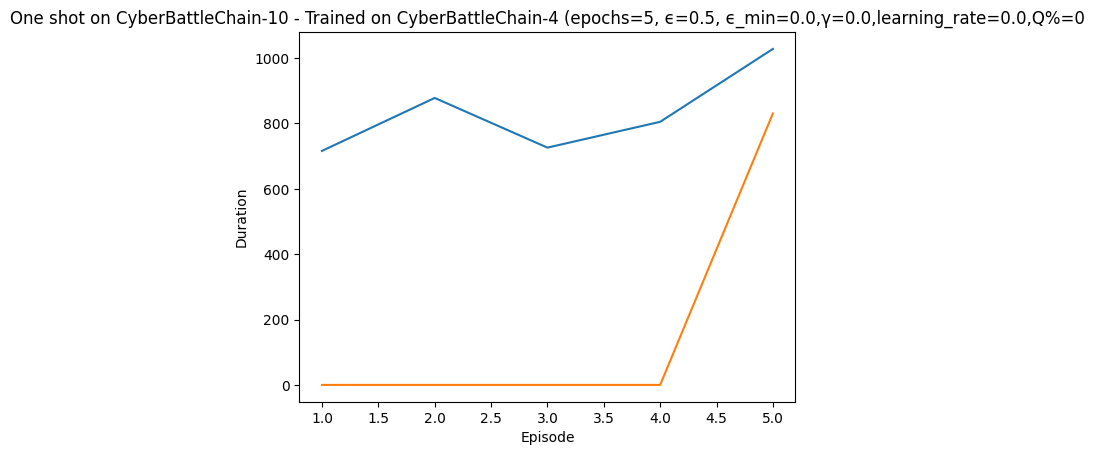

###### Benchmark
Learning with: episode_count=5,iteration_count=9000,ϵ=1.0,ϵ_min=0.0, 
  ## Episode: 1/5 'Benchmark' ϵ=1.0000, 


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 7|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 7|reward:   14.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 1|Iteration 14|reward:  114.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 1|Iteration 14|reward:  114.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 1|Iteration 17|reward:  116.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 1|Iteration 17|reward:  116.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 1|Iteration 25|reward:  118.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 1|Iteration 25|reward:  118.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 1|Iteration 36|reward:  132.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 1|Iteration 36|reward:  132.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 1|Iteration 41|reward:  140.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 1|Iteration 41|reward:  140.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 1|Iteration 55|reward:  146.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 1|Iteration 55|reward:  146.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 1|Iteration 94|reward:  152.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 1|Iteration 94|reward:  152.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 1|Iteration 176|reward:  252.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 1|Iteration 176|reward:  252.0|last_reward_at:  176|Elapsed Time: 0:00:00||

Episode 1|Iteration 245|reward:  263.0|last_reward_at:  176|Elapsed Time: 0:00:00||

Episode 1|Iteration 245|reward:  263.0|last_reward_at:  245|Elapsed Time: 0:00:00||

Episode 1|Iteration 246|reward:  272.0|last_reward_at:  245|Elapsed Time: 0:00:00||

Episode 1|Iteration 246|reward:  272.0|last_reward_at:  246|Elapsed Time: 0:00:00||

Episode 1|Iteration 277|reward:  274.0|last_reward_at:  246|Elapsed Time: 0:00:00||

Episode 1|Iteration 277|reward:  274.0|last_reward_at:  277|Elapsed Time: 0:00:00||

Episode 1|Iteration 287|reward:  278.0|last_reward_at:  277|Elapsed Time: 0:00:00||

Episode 1|Iteration 287|reward:  278.0|last_reward_at:  287|Elapsed Time: 0:00:00||

Episode 1|Iteration 398|reward:  278.0|last_reward_at:  287|Elapsed Time: 0:00:00||

Episode 1|Iteration 456|reward:  278.0|last_reward_at:  287|Elapsed Time: 0:00:00||

Episode 1|Iteration 559|reward:  278.0|last_reward_at:  287|Elapsed Time: 0:00:00||

Episode 1|Iteration 667|reward:  278.0|last_reward_at:  287|Elapsed Time: 0:00:00||

Episode 1|Iteration 705|reward:  378.0|last_reward_at:  287|Elapsed Time: 0:00:00||

Episode 1|Iteration 705|reward:  378.0|last_reward_at:  705|Elapsed Time: 0:00:00||

Episode 1|Iteration 732|reward:  389.0|last_reward_at:  705|Elapsed Time: 0:00:00||

Episode 1|Iteration 732|reward:  389.0|last_reward_at:  732|Elapsed Time: 0:00:00||

Episode 1|Iteration 734|reward:  398.0|last_reward_at:  732|Elapsed Time: 0:00:00||

Episode 1|Iteration 734|reward:  398.0|last_reward_at:  734|Elapsed Time: 0:00:00||

Episode 1|Iteration 737|reward:  404.0|last_reward_at:  734|Elapsed Time: 0:00:00||

Episode 1|Iteration 737|reward:  404.0|last_reward_at:  737|Elapsed Time: 0:00:00||

Episode 1|Iteration 738|reward:  412.0|last_reward_at:  737|Elapsed Time: 0:00:00||

Episode 1|Iteration 738|reward:  412.0|last_reward_at:  738|Elapsed Time: 0:00:00||

Episode 1|Iteration 768|reward:  512.0|last_reward_at:  738|Elapsed Time: 0:00:00||

Episode 1|Iteration 768|reward:  512.0|last_reward_at:  768|Elapsed Time: 0:00:00||

Episode 1|Iteration 805|reward:  523.0|last_reward_at:  768|Elapsed Time: 0:00:00||

Episode 1|Iteration 805|reward:  523.0|last_reward_at:  805|Elapsed Time: 0:00:00||

Episode 1|Iteration 809|reward:  525.0|last_reward_at:  805|Elapsed Time: 0:00:00||

Episode 1|Iteration 809|reward:  525.0|last_reward_at:  809|Elapsed Time: 0:00:00||

Episode 1|Iteration 814|reward:  529.0|last_reward_at:  809|Elapsed Time: 0:00:00||

Episode 1|Iteration 814|reward:  529.0|last_reward_at:  814|Elapsed Time: 0:00:00||

Episode 1|Iteration 877|reward:  538.0|last_reward_at:  814|Elapsed Time: 0:00:00||

Episode 1|Iteration 877|reward:  538.0|last_reward_at:  877|Elapsed Time: 0:00:00||

Episode 1|Iteration 956|reward:  538.0|last_reward_at:  877|Elapsed Time: 0:00:00||

Episode 1|Iteration 1026|reward:  538.0|last_reward_at:  877|Elapsed Time: 0:00:01||

Episode 1|Iteration 1105|reward:  538.0|last_reward_at:  877|Elapsed Time: 0:00:01||

Episode 1|Iteration 1185|reward:  538.0|last_reward_at:  877|Elapsed Time: 0:00:01||

Episode 1|Iteration 1186|reward:  638.0|last_reward_at:  877|Elapsed Time: 0:00:01||

Episode 1|Iteration 1186|reward:  638.0|last_reward_at: 1186|Elapsed Time: 0:00:01||

Episode 1|Iteration 1193|reward:  652.0|last_reward_at: 1186|Elapsed Time: 0:00:01||

Episode 1|Iteration 1193|reward:  652.0|last_reward_at: 1193|Elapsed Time: 0:00:01||

Episode 1|Iteration 1196|reward:  658.0|last_reward_at: 1193|Elapsed Time: 0:00:01||

Episode 1|Iteration 1196|reward:  658.0|last_reward_at: 1196|Elapsed Time: 0:00:01||

Episode 1|Iteration 1212|reward:  666.0|last_reward_at: 1196|Elapsed Time: 0:00:01||

Episode 1|Iteration 1212|reward:  666.0|last_reward_at: 1212|Elapsed Time: 0:00:01||

Episode 1|Iteration 1219|reward:  672.0|last_reward_at: 1212|Elapsed Time: 0:00:01||

Episode 1|Iteration 1219|reward:  672.0|last_reward_at: 1219|Elapsed Time: 0:00:01||

Episode 1|Iteration 1289|reward:  672.0|last_reward_at: 1219|Elapsed Time: 0:00:01||

Episode 1|Iteration 1356|reward:  672.0|last_reward_at: 1219|Elapsed Time: 0:00:01||

Episode 1|Iteration 1425|reward:  672.0|last_reward_at: 1219|Elapsed Time: 0:00:01||

Episode 1|Iteration 1482|reward:  672.0|last_reward_at: 1219|Elapsed Time: 0:00:01||

Episode 1|Iteration 1549|reward:  672.0|last_reward_at: 1219|Elapsed Time: 0:00:01||

Episode 1|Iteration 1595|reward:  672.0|last_reward_at: 1219|Elapsed Time: 0:00:01||

Episode 1|Iteration 1662|reward:  672.0|last_reward_at: 1219|Elapsed Time: 0:00:01||

Episode 1|Iteration 1709|reward:  672.0|last_reward_at: 1219|Elapsed Time: 0:00:02||

Episode 1|Iteration 1777|reward:  672.0|last_reward_at: 1219|Elapsed Time: 0:00:02||

Episode 1|Iteration 1823|reward:  672.0|last_reward_at: 1219|Elapsed Time: 0:00:02||

Episode 1|Iteration 1889|reward:  672.0|last_reward_at: 1219|Elapsed Time: 0:00:02||

Episode 1|Iteration 1937|reward:  672.0|last_reward_at: 1219|Elapsed Time: 0:00:02||

Episode 1|Iteration 2004|reward:  672.0|last_reward_at: 1219|Elapsed Time: 0:00:02||

Episode 1|Iteration 2051|reward:  672.0|last_reward_at: 1219|Elapsed Time: 0:00:02||

Episode 1|Iteration 2117|reward:  672.0|last_reward_at: 1219|Elapsed Time: 0:00:02||

Episode 1|Iteration 2165|reward:  672.0|last_reward_at: 1219|Elapsed Time: 0:00:02||

Episode 1|Iteration 2232|reward:  672.0|last_reward_at: 1219|Elapsed Time: 0:00:02||

Episode 1|Iteration 2279|reward:  672.0|last_reward_at: 1219|Elapsed Time: 0:00:02||

Episode 1|Iteration 2344|reward:  672.0|last_reward_at: 1219|Elapsed Time: 0:00:03||

Episode 1|Iteration 2393|reward:  672.0|last_reward_at: 1219|Elapsed Time: 0:00:03||

Episode 1|Iteration 2460|reward:  672.0|last_reward_at: 1219|Elapsed Time: 0:00:03||

Episode 1|Iteration 2507|reward:  672.0|last_reward_at: 1219|Elapsed Time: 0:00:03||

Episode 1|Iteration 2572|reward:  672.0|last_reward_at: 1219|Elapsed Time: 0:00:03||

Episode 1|Iteration 2591|reward:  772.0|last_reward_at: 1219|Elapsed Time: 0:00:03||

Episode 1|Iteration 2591|reward:  772.0|last_reward_at: 2591|Elapsed Time: 0:00:03||

Episode 1|Iteration 2653|reward:  772.0|last_reward_at: 2591|Elapsed Time: 0:00:03||

Episode 1|Iteration 2714|reward:  772.0|last_reward_at: 2591|Elapsed Time: 0:00:03||

Episode 1|Iteration 2742|reward:  783.0|last_reward_at: 2591|Elapsed Time: 0:00:03||

Episode 1|Iteration 2742|reward:  783.0|last_reward_at: 2742|Elapsed Time: 0:00:03||

Episode 1|Iteration 2759|reward:  792.0|last_reward_at: 2742|Elapsed Time: 0:00:03||

Episode 1|Iteration 2759|reward:  792.0|last_reward_at: 2759|Elapsed Time: 0:00:03||

Episode 1|Iteration 2787|reward:  796.0|last_reward_at: 2759|Elapsed Time: 0:00:03||

Episode 1|Iteration 2787|reward:  796.0|last_reward_at: 2787|Elapsed Time: 0:00:03||

Episode 1|Iteration 2801|reward:  798.0|last_reward_at: 2787|Elapsed Time: 0:00:03||

Episode 1|Iteration 2801|reward:  798.0|last_reward_at: 2801|Elapsed Time: 0:00:03||

Episode 1|Iteration 2846|reward:  798.0|last_reward_at: 2801|Elapsed Time: 0:00:03||

Episode 1|Iteration 2904|reward:  798.0|last_reward_at: 2801|Elapsed Time: 0:00:03||

Episode 1|Iteration 2960|reward:  798.0|last_reward_at: 2801|Elapsed Time: 0:00:04||

Episode 1|Iteration 3019|reward:  798.0|last_reward_at: 2801|Elapsed Time: 0:00:04||

Episode 1|Iteration 3073|reward:  798.0|last_reward_at: 2801|Elapsed Time: 0:00:04||

Episode 1|Iteration 3126|reward:  798.0|last_reward_at: 2801|Elapsed Time: 0:00:04||

Episode 1|Iteration 3178|reward:  798.0|last_reward_at: 2801|Elapsed Time: 0:00:04||

Episode 1|Iteration 3234|reward:  798.0|last_reward_at: 2801|Elapsed Time: 0:00:04||

Episode 1|Iteration 3291|reward:  798.0|last_reward_at: 2801|Elapsed Time: 0:00:04||

Episode 1|Iteration 3348|reward:  798.0|last_reward_at: 2801|Elapsed Time: 0:00:04||

Episode 1|Iteration 3406|reward:  798.0|last_reward_at: 2801|Elapsed Time: 0:00:04||

Episode 1|Iteration 3461|reward:  798.0|last_reward_at: 2801|Elapsed Time: 0:00:04||

Episode 1|Iteration 3513|reward:  798.0|last_reward_at: 2801|Elapsed Time: 0:00:05||

Episode 1|Iteration 3570|reward:  798.0|last_reward_at: 2801|Elapsed Time: 0:00:05||

Episode 1|Iteration 3628|reward:  798.0|last_reward_at: 2801|Elapsed Time: 0:00:05||

Episode 1|Iteration 3685|reward:  798.0|last_reward_at: 2801|Elapsed Time: 0:00:05||

Episode 1|Iteration 3742|reward:  798.0|last_reward_at: 2801|Elapsed Time: 0:00:05||

Episode 1|Iteration 3798|reward:  798.0|last_reward_at: 2801|Elapsed Time: 0:00:05||

Episode 1|Iteration 3855|reward:  798.0|last_reward_at: 2801|Elapsed Time: 0:00:05||

Episode 1|Iteration 3911|reward:  798.0|last_reward_at: 2801|Elapsed Time: 0:00:05||

Episode 1|Iteration 3967|reward:  798.0|last_reward_at: 2801|Elapsed Time: 0:00:05||

Episode 1|Iteration 4023|reward:  798.0|last_reward_at: 2801|Elapsed Time: 0:00:05||

Episode 1|Iteration 4076|reward:  798.0|last_reward_at: 2801|Elapsed Time: 0:00:06||

Episode 1|Iteration 4129|reward:  798.0|last_reward_at: 2801|Elapsed Time: 0:00:06||

Episode 1|Iteration 4185|reward:  798.0|last_reward_at: 2801|Elapsed Time: 0:00:06||

Episode 1|Iteration 4216|reward:  798.0|last_reward_at: 2801|Elapsed Time: 0:00:06||

Episode 1|Iteration 4271|reward:  798.0|last_reward_at: 2801|Elapsed Time: 0:00:06||

Episode 1|Iteration 4326|reward:  798.0|last_reward_at: 2801|Elapsed Time: 0:00:06||

Episode 1|Iteration 4381|reward:  798.0|last_reward_at: 2801|Elapsed Time: 0:00:06||

Episode 1|Iteration 4437|reward:  798.0|last_reward_at: 2801|Elapsed Time: 0:00:06||

Episode 1|Iteration 4493|reward:  798.0|last_reward_at: 2801|Elapsed Time: 0:00:06||

Episode 1|Iteration 4548|reward:  798.0|last_reward_at: 2801|Elapsed Time: 0:00:06||

Episode 1|Iteration 4597|reward:  798.0|last_reward_at: 2801|Elapsed Time: 0:00:07||

Episode 1|Iteration 4653|reward:  798.0|last_reward_at: 2801|Elapsed Time: 0:00:07||

Episode 1|Iteration 4709|reward:  798.0|last_reward_at: 2801|Elapsed Time: 0:00:07||

Episode 1|Iteration 4725|reward:  898.0|last_reward_at: 2801|Elapsed Time: 0:00:07||

Episode 1|Iteration 4725|reward:  898.0|last_reward_at: 4725|Elapsed Time: 0:00:07||

Episode 1|Iteration 4733|reward:  912.0|last_reward_at: 4725|Elapsed Time: 0:00:07||

Episode 1|Iteration 4733|reward:  912.0|last_reward_at: 4733|Elapsed Time: 0:00:07||

Episode 1|Iteration 4781|reward:  912.0|last_reward_at: 4733|Elapsed Time: 0:00:07||

Episode 1|Iteration 4792|reward:  918.0|last_reward_at: 4733|Elapsed Time: 0:00:07||

Episode 1|Iteration 4792|reward:  918.0|last_reward_at: 4792|Elapsed Time: 0:00:07||

Episode 1|Iteration 4822|reward:  926.0|last_reward_at: 4792|Elapsed Time: 0:00:07||

Episode 1|Iteration 4822|reward:  926.0|last_reward_at: 4822|Elapsed Time: 0:00:07||

Episode 1|Iteration 4870|reward:  926.0|last_reward_at: 4822|Elapsed Time: 0:00:07||

Episode 1|Iteration 4899|reward:  926.0|last_reward_at: 4822|Elapsed Time: 0:00:07||

Episode 1|Iteration 4946|reward:  926.0|last_reward_at: 4822|Elapsed Time: 0:00:07||

Episode 1|Iteration 4994|reward:  926.0|last_reward_at: 4822|Elapsed Time: 0:00:07||

Episode 1|Iteration 5042|reward:  926.0|last_reward_at: 4822|Elapsed Time: 0:00:07||

Episode 1|Iteration 5089|reward:  926.0|last_reward_at: 4822|Elapsed Time: 0:00:08||

Episode 1|Iteration 5118|reward:  932.0|last_reward_at: 4822|Elapsed Time: 0:00:08||

Episode 1|Iteration 5118|reward:  932.0|last_reward_at: 5118|Elapsed Time: 0:00:08||

Episode 1|Iteration 5167|reward:  932.0|last_reward_at: 5118|Elapsed Time: 0:00:08||

Episode 1|Iteration 5215|reward:  932.0|last_reward_at: 5118|Elapsed Time: 0:00:08||

Episode 1|Iteration 5241|reward:  932.0|last_reward_at: 5118|Elapsed Time: 0:00:08||

Episode 1|Iteration 5287|reward:  932.0|last_reward_at: 5118|Elapsed Time: 0:00:08||

Episode 1|Iteration 5335|reward:  932.0|last_reward_at: 5118|Elapsed Time: 0:00:08||

Episode 1|Iteration 5384|reward:  932.0|last_reward_at: 5118|Elapsed Time: 0:00:08||

Episode 1|Iteration 5432|reward:  932.0|last_reward_at: 5118|Elapsed Time: 0:00:08||

Episode 1|Iteration 5469|reward:  932.0|last_reward_at: 5118|Elapsed Time: 0:00:08||

Episode 1|Iteration 5515|reward:  932.0|last_reward_at: 5118|Elapsed Time: 0:00:08||

Episode 1|Iteration 5560|reward:  932.0|last_reward_at: 5118|Elapsed Time: 0:00:09||

Episode 1|Iteration 5608|reward:  932.0|last_reward_at: 5118|Elapsed Time: 0:00:09||

Episode 1|Iteration 5656|reward:  932.0|last_reward_at: 5118|Elapsed Time: 0:00:09||

Episode 1|Iteration 5697|reward:  932.0|last_reward_at: 5118|Elapsed Time: 0:00:09||

Episode 1|Iteration 5737|reward:  932.0|last_reward_at: 5118|Elapsed Time: 0:00:09||

Episode 1|Iteration 5784|reward:  932.0|last_reward_at: 5118|Elapsed Time: 0:00:09||

Episode 1|Iteration 5811|reward:  932.0|last_reward_at: 5118|Elapsed Time: 0:00:09||

Episode 1|Iteration 5857|reward:  932.0|last_reward_at: 5118|Elapsed Time: 0:00:09||

Episode 1|Iteration 5905|reward:  932.0|last_reward_at: 5118|Elapsed Time: 0:00:09||

Episode 1|Iteration 5953|reward:  932.0|last_reward_at: 5118|Elapsed Time: 0:00:09||

Episode 1|Iteration 6001|reward:  932.0|last_reward_at: 5118|Elapsed Time: 0:00:10||

Episode 1|Iteration 6038|reward:  932.0|last_reward_at: 5118|Elapsed Time: 0:00:10||

Episode 1|Iteration 6084|reward:  932.0|last_reward_at: 5118|Elapsed Time: 0:00:10||

Episode 1|Iteration 6131|reward:  932.0|last_reward_at: 5118|Elapsed Time: 0:00:10||

Episode 1|Iteration 6178|reward:  932.0|last_reward_at: 5118|Elapsed Time: 0:00:10||

Episode 1|Iteration 6225|reward:  932.0|last_reward_at: 5118|Elapsed Time: 0:00:10||

Episode 1|Iteration 6266|reward:  932.0|last_reward_at: 5118|Elapsed Time: 0:00:10||

Episode 1|Iteration 6310|reward:  932.0|last_reward_at: 5118|Elapsed Time: 0:00:10||

Episode 1|Iteration 6357|reward:  932.0|last_reward_at: 5118|Elapsed Time: 0:00:10||

Episode 1|Iteration 6405|reward:  932.0|last_reward_at: 5118|Elapsed Time: 0:00:10||

Episode 1|Iteration 6452|reward:  932.0|last_reward_at: 5118|Elapsed Time: 0:00:10||

Episode 1|Iteration 6494|reward:  932.0|last_reward_at: 5118|Elapsed Time: 0:00:11||

Episode 1|Iteration 6539|reward:  932.0|last_reward_at: 5118|Elapsed Time: 0:00:11||

Episode 1|Iteration 6585|reward:  932.0|last_reward_at: 5118|Elapsed Time: 0:00:11||

Episode 1|Iteration 6631|reward:  932.0|last_reward_at: 5118|Elapsed Time: 0:00:11||

Episode 1|Iteration 6668|reward: 1032.0|last_reward_at: 5118|Elapsed Time: 0:00:11||

Episode 1|Iteration 6668|reward: 1032.0|last_reward_at: 6668|Elapsed Time: 0:00:11||

Episode 1|Iteration 6712|reward: 1032.0|last_reward_at: 6668|Elapsed Time: 0:00:11||

Episode 1|Iteration 6729|reward: 1043.0|last_reward_at: 6668|Elapsed Time: 0:00:11||

Episode 1|Iteration 6729|reward: 1043.0|last_reward_at: 6729|Elapsed Time: 0:00:11||

Episode 1|Iteration 6764|reward: 1052.0|last_reward_at: 6729|Elapsed Time: 0:00:11||

Episode 1|Iteration 6764|reward: 1052.0|last_reward_at: 6764|Elapsed Time: 0:00:11||

Episode 1|Iteration 6805|reward: 1054.0|last_reward_at: 6764|Elapsed Time: 0:00:11||

Episode 1|Iteration 6805|reward: 1054.0|last_reward_at: 6805|Elapsed Time: 0:00:11||

Episode 1|Iteration 6818|reward: 1058.0|last_reward_at: 6805|Elapsed Time: 0:00:11||

Episode 1|Iteration 6818|reward: 1058.0|last_reward_at: 6818|Elapsed Time: 0:00:11||

Episode 1|Iteration 6835|reward: 1158.0|last_reward_at: 6818|Elapsed Time: 0:00:11||

Episode 1|Iteration 6835|reward: 1158.0|last_reward_at: 6835|Elapsed Time: 0:00:11||

Episode 1|Iteration 6877|reward: 1158.0|last_reward_at: 6835|Elapsed Time: 0:00:11||

Episode 1|Iteration 6917|reward: 1158.0|last_reward_at: 6835|Elapsed Time: 0:00:12||

Episode 1|Iteration 6922|reward: 1172.0|last_reward_at: 6835|Elapsed Time: 0:00:12||

Episode 1|Iteration 6922|reward: 1172.0|last_reward_at: 6922|Elapsed Time: 0:00:12||

Episode 1|Iteration 6946|reward: 1178.0|last_reward_at: 6922|Elapsed Time: 0:00:12||

Episode 1|Iteration 6946|reward: 1178.0|last_reward_at: 6946|Elapsed Time: 0:00:12||

Episode 1|Iteration 6986|reward: 1178.0|last_reward_at: 6946|Elapsed Time: 0:00:12||

Episode 1|Iteration 7006|reward: 1184.0|last_reward_at: 6946|Elapsed Time: 0:00:12||

Episode 1|Iteration 7006|reward: 1184.0|last_reward_at: 7006|Elapsed Time: 0:00:12||

Episode 1|Iteration 7046|reward: 1184.0|last_reward_at: 7006|Elapsed Time: 0:00:12||

Episode 1|Iteration 7085|reward: 1184.0|last_reward_at: 7006|Elapsed Time: 0:00:12||

Episode 1|Iteration 7124|reward: 1184.0|last_reward_at: 7006|Elapsed Time: 0:00:12||

Episode 1|Iteration 7163|reward: 1184.0|last_reward_at: 7006|Elapsed Time: 0:00:12||

Episode 1|Iteration 7201|reward: 1184.0|last_reward_at: 7006|Elapsed Time: 0:00:12||

Episode 1|Iteration 7221|reward: 1192.0|last_reward_at: 7006|Elapsed Time: 0:00:12||

Episode 1|Iteration 7221|reward: 1192.0|last_reward_at: 7221|Elapsed Time: 0:00:12||

Episode 1|Iteration 7259|reward: 1192.0|last_reward_at: 7221|Elapsed Time: 0:00:12||

Episode 1|Iteration 7292|reward: 1192.0|last_reward_at: 7221|Elapsed Time: 0:00:13||

Episode 1|Iteration 7330|reward: 1192.0|last_reward_at: 7221|Elapsed Time: 0:00:13||

Episode 1|Iteration 7369|reward: 1192.0|last_reward_at: 7221|Elapsed Time: 0:00:13||

Episode 1|Iteration 7406|reward: 1192.0|last_reward_at: 7221|Elapsed Time: 0:00:13||

Episode 1|Iteration 7444|reward: 1192.0|last_reward_at: 7221|Elapsed Time: 0:00:13||

Episode 1|Iteration 7482|reward: 1192.0|last_reward_at: 7221|Elapsed Time: 0:00:13||

Episode 1|Iteration 7519|reward: 1192.0|last_reward_at: 7221|Elapsed Time: 0:00:13||

Episode 1|Iteration 7557|reward: 1192.0|last_reward_at: 7221|Elapsed Time: 0:00:13||

Episode 1|Iteration 7596|reward: 1192.0|last_reward_at: 7221|Elapsed Time: 0:00:13||

Episode 1|Iteration 7633|reward: 1192.0|last_reward_at: 7221|Elapsed Time: 0:00:13||

Episode 1|Iteration 7669|reward: 1192.0|last_reward_at: 7221|Elapsed Time: 0:00:14||

Episode 1|Iteration 7708|reward: 1192.0|last_reward_at: 7221|Elapsed Time: 0:00:14||

Episode 1|Iteration 7747|reward: 1192.0|last_reward_at: 7221|Elapsed Time: 0:00:14||

Episode 1|Iteration 7785|reward: 1192.0|last_reward_at: 7221|Elapsed Time: 0:00:14||

Episode 1|Iteration 7824|reward: 1192.0|last_reward_at: 7221|Elapsed Time: 0:00:14||

Episode 1|Iteration 7861|reward: 1192.0|last_reward_at: 7221|Elapsed Time: 0:00:14||

Episode 1|Iteration 7898|reward: 1192.0|last_reward_at: 7221|Elapsed Time: 0:00:14||

Episode 1|Iteration 7937|reward: 1192.0|last_reward_at: 7221|Elapsed Time: 0:00:14||

Episode 1|Iteration 7975|reward: 1192.0|last_reward_at: 7221|Elapsed Time: 0:00:14||

Episode 1|Iteration 8012|reward: 1192.0|last_reward_at: 7221|Elapsed Time: 0:00:14||

Episode 1|Iteration 8049|reward: 1192.0|last_reward_at: 7221|Elapsed Time: 0:00:15||

Episode 1|Iteration 8088|reward: 1192.0|last_reward_at: 7221|Elapsed Time: 0:00:15||

Episode 1|Iteration 8127|reward: 1192.0|last_reward_at: 7221|Elapsed Time: 0:00:15||

Episode 1|Iteration 8166|reward: 1192.0|last_reward_at: 7221|Elapsed Time: 0:00:15||

Episode 1|Iteration 8203|reward: 1192.0|last_reward_at: 7221|Elapsed Time: 0:00:15||

Episode 1|Iteration 8240|reward: 1192.0|last_reward_at: 7221|Elapsed Time: 0:00:15||

Episode 1|Iteration 8278|reward: 1192.0|last_reward_at: 7221|Elapsed Time: 0:00:15||

Episode 1|Iteration 8316|reward: 1192.0|last_reward_at: 7221|Elapsed Time: 0:00:15||

Episode 1|Iteration 8354|reward: 1192.0|last_reward_at: 7221|Elapsed Time: 0:00:15||

Episode 1|Iteration 8392|reward: 1192.0|last_reward_at: 7221|Elapsed Time: 0:00:15||

Episode 1|Iteration 8428|reward: 1192.0|last_reward_at: 7221|Elapsed Time: 0:00:16||

Episode 1|Iteration 8466|reward: 1192.0|last_reward_at: 7221|Elapsed Time: 0:00:16||

Episode 1|Iteration 8504|reward: 1192.0|last_reward_at: 7221|Elapsed Time: 0:00:16||

Episode 1|Iteration 8542|reward: 1192.0|last_reward_at: 7221|Elapsed Time: 0:00:16||

Episode 1|Iteration 8580|reward: 1192.0|last_reward_at: 7221|Elapsed Time: 0:00:16||

Episode 1|Iteration 8618|reward: 1192.0|last_reward_at: 7221|Elapsed Time: 0:00:16||

Episode 1|Iteration 8656|reward: 1192.0|last_reward_at: 7221|Elapsed Time: 0:00:16||

Episode 1|Iteration 8693|reward: 1192.0|last_reward_at: 7221|Elapsed Time: 0:00:16||

Episode 1|Iteration 8730|reward: 1192.0|last_reward_at: 7221|Elapsed Time: 0:00:16||

Episode 1|Iteration 8768|reward: 1192.0|last_reward_at: 7221|Elapsed Time: 0:00:16||

Episode 1|Iteration 8802|reward: 1192.0|last_reward_at: 7221|Elapsed Time: 0:00:17||

Episode 1|Iteration 8838|reward: 1192.0|last_reward_at: 7221|Elapsed Time: 0:00:17||

Episode 1|Iteration 8873|reward: 1192.0|last_reward_at: 7221|Elapsed Time: 0:00:17||

Episode 1|Iteration 8912|reward: 1192.0|last_reward_at: 7221|Elapsed Time: 0:00:17||

Episode 1|Iteration 8950|reward: 1192.0|last_reward_at: 7221|Elapsed Time: 0:00:17||

Episode 1|Iteration 8988|reward: 1192.0|last_reward_at: 7221|Elapsed Time: 0:00:17||

Episode 1|Iteration 9000|reward: 1192.0|last_reward_at: 7221|Elapsed Time: 0:00:17||

  Episode 1 stopped at t=9000 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 19/2499 (0.01)
    explore-remote: 20/3303 (0.01)
    explore-connect: 9/3150 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 2/5 'Benchmark' ϵ=1.0000, 


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:   14.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 13|reward:   18.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 13|reward:   18.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 2|Iteration 16|reward:   20.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 2|Iteration 16|reward:   20.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 2|Iteration 54|reward:  120.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 2|Iteration 54|reward:  120.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 2|Iteration 60|reward:  131.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 2|Iteration 60|reward:  131.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 2|Iteration 61|reward:  139.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 2|Iteration 61|reward:  139.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 2|Iteration 67|reward:  148.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 2|Iteration 67|reward:  148.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 2|Iteration 79|reward:  154.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 2|Iteration 79|reward:  154.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 2|Iteration 130|reward:  254.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 2|Iteration 130|reward:  254.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 2|Iteration 139|reward:  265.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 2|Iteration 139|reward:  265.0|last_reward_at:  139|Elapsed Time: 0:00:00||

Episode 2|Iteration 143|reward:  274.0|last_reward_at:  139|Elapsed Time: 0:00:00||

Episode 2|Iteration 143|reward:  274.0|last_reward_at:  143|Elapsed Time: 0:00:00||

Episode 2|Iteration 153|reward:  278.0|last_reward_at:  143|Elapsed Time: 0:00:00||

Episode 2|Iteration 153|reward:  278.0|last_reward_at:  153|Elapsed Time: 0:00:00||

Episode 2|Iteration 196|reward:  280.0|last_reward_at:  153|Elapsed Time: 0:00:00||

Episode 2|Iteration 196|reward:  280.0|last_reward_at:  196|Elapsed Time: 0:00:00||

Episode 2|Iteration 241|reward:  380.0|last_reward_at:  196|Elapsed Time: 0:00:00||

Episode 2|Iteration 241|reward:  380.0|last_reward_at:  241|Elapsed Time: 0:00:00||

Episode 2|Iteration 268|reward:  391.0|last_reward_at:  241|Elapsed Time: 0:00:00||

Episode 2|Iteration 268|reward:  391.0|last_reward_at:  268|Elapsed Time: 0:00:00||

Episode 2|Iteration 273|reward:  400.0|last_reward_at:  268|Elapsed Time: 0:00:00||

Episode 2|Iteration 273|reward:  400.0|last_reward_at:  273|Elapsed Time: 0:00:00||

Episode 2|Iteration 283|reward:  406.0|last_reward_at:  273|Elapsed Time: 0:00:00||

Episode 2|Iteration 283|reward:  406.0|last_reward_at:  283|Elapsed Time: 0:00:00||

Episode 2|Iteration 313|reward:  414.0|last_reward_at:  283|Elapsed Time: 0:00:00||

Episode 2|Iteration 313|reward:  414.0|last_reward_at:  313|Elapsed Time: 0:00:00||

Episode 2|Iteration 400|reward:  414.0|last_reward_at:  313|Elapsed Time: 0:00:00||

Episode 2|Iteration 456|reward:  414.0|last_reward_at:  313|Elapsed Time: 0:00:00||

Episode 2|Iteration 545|reward:  414.0|last_reward_at:  313|Elapsed Time: 0:00:00||

Episode 2|Iteration 634|reward:  414.0|last_reward_at:  313|Elapsed Time: 0:00:00||

Episode 2|Iteration 684|reward:  414.0|last_reward_at:  313|Elapsed Time: 0:00:00||

Episode 2|Iteration 771|reward:  414.0|last_reward_at:  313|Elapsed Time: 0:00:00||

Episode 2|Iteration 859|reward:  414.0|last_reward_at:  313|Elapsed Time: 0:00:00||

Episode 2|Iteration 912|reward:  414.0|last_reward_at:  313|Elapsed Time: 0:00:01||

Episode 2|Iteration 999|reward:  414.0|last_reward_at:  313|Elapsed Time: 0:00:01||

Episode 2|Iteration 1085|reward:  414.0|last_reward_at:  313|Elapsed Time: 0:00:01||

Episode 2|Iteration 1140|reward:  414.0|last_reward_at:  313|Elapsed Time: 0:00:01||

Episode 2|Iteration 1210|reward:  414.0|last_reward_at:  313|Elapsed Time: 0:00:01||

Episode 2|Iteration 1254|reward:  414.0|last_reward_at:  313|Elapsed Time: 0:00:01||

Episode 2|Iteration 1340|reward:  414.0|last_reward_at:  313|Elapsed Time: 0:00:01||

Episode 2|Iteration 1427|reward:  414.0|last_reward_at:  313|Elapsed Time: 0:00:01||

Episode 2|Iteration 1482|reward:  414.0|last_reward_at:  313|Elapsed Time: 0:00:01||

Episode 2|Iteration 1567|reward:  414.0|last_reward_at:  313|Elapsed Time: 0:00:01||

Episode 2|Iteration 1653|reward:  414.0|last_reward_at:  313|Elapsed Time: 0:00:01||

Episode 2|Iteration 1709|reward:  414.0|last_reward_at:  313|Elapsed Time: 0:00:01||

Episode 2|Iteration 1794|reward:  414.0|last_reward_at:  313|Elapsed Time: 0:00:02||

Episode 2|Iteration 1880|reward:  414.0|last_reward_at:  313|Elapsed Time: 0:00:02||

Episode 2|Iteration 1937|reward:  414.0|last_reward_at:  313|Elapsed Time: 0:00:02||

Episode 2|Iteration 2000|reward:  514.0|last_reward_at:  313|Elapsed Time: 0:00:02||

Episode 2|Iteration 2000|reward:  514.0|last_reward_at: 2000|Elapsed Time: 0:00:02||

Episode 2|Iteration 2051|reward:  514.0|last_reward_at: 2000|Elapsed Time: 0:00:02||

Episode 2|Iteration 2051|reward:  528.0|last_reward_at: 2000|Elapsed Time: 0:00:02||

Episode 2|Iteration 2051|reward:  528.0|last_reward_at: 2051|Elapsed Time: 0:00:02||

Episode 2|Iteration 2056|reward:  530.0|last_reward_at: 2051|Elapsed Time: 0:00:02||

Episode 2|Iteration 2056|reward:  530.0|last_reward_at: 2056|Elapsed Time: 0:00:02||

Episode 2|Iteration 2064|reward:  534.0|last_reward_at: 2056|Elapsed Time: 0:00:02||

Episode 2|Iteration 2064|reward:  534.0|last_reward_at: 2064|Elapsed Time: 0:00:02||

Episode 2|Iteration 2119|reward:  540.0|last_reward_at: 2064|Elapsed Time: 0:00:02||

Episode 2|Iteration 2119|reward:  540.0|last_reward_at: 2119|Elapsed Time: 0:00:02||

Episode 2|Iteration 2165|reward:  540.0|last_reward_at: 2119|Elapsed Time: 0:00:02||

Episode 2|Iteration 2239|reward:  540.0|last_reward_at: 2119|Elapsed Time: 0:00:02||

Episode 2|Iteration 2279|reward:  540.0|last_reward_at: 2119|Elapsed Time: 0:00:02||

Episode 2|Iteration 2354|reward:  540.0|last_reward_at: 2119|Elapsed Time: 0:00:02||

Episode 2|Iteration 2393|reward:  540.0|last_reward_at: 2119|Elapsed Time: 0:00:02||

Episode 2|Iteration 2468|reward:  540.0|last_reward_at: 2119|Elapsed Time: 0:00:02||

Episode 2|Iteration 2507|reward:  540.0|last_reward_at: 2119|Elapsed Time: 0:00:02||

Episode 2|Iteration 2581|reward:  540.0|last_reward_at: 2119|Elapsed Time: 0:00:03||

Episode 2|Iteration 2621|reward:  540.0|last_reward_at: 2119|Elapsed Time: 0:00:03||

Episode 2|Iteration 2690|reward:  540.0|last_reward_at: 2119|Elapsed Time: 0:00:03||

Episode 2|Iteration 2735|reward:  540.0|last_reward_at: 2119|Elapsed Time: 0:00:03||

Episode 2|Iteration 2809|reward:  540.0|last_reward_at: 2119|Elapsed Time: 0:00:03||

Episode 2|Iteration 2845|reward:  640.0|last_reward_at: 2119|Elapsed Time: 0:00:03||

Episode 2|Iteration 2845|reward:  640.0|last_reward_at: 2845|Elapsed Time: 0:00:03||

Episode 2|Iteration 2849|reward:  654.0|last_reward_at: 2845|Elapsed Time: 0:00:03||

Episode 2|Iteration 2849|reward:  654.0|last_reward_at: 2849|Elapsed Time: 0:00:03||

Episode 2|Iteration 2866|reward:  660.0|last_reward_at: 2849|Elapsed Time: 0:00:03||

Episode 2|Iteration 2866|reward:  660.0|last_reward_at: 2866|Elapsed Time: 0:00:03||

Episode 2|Iteration 2870|reward:  666.0|last_reward_at: 2866|Elapsed Time: 0:00:03||

Episode 2|Iteration 2870|reward:  666.0|last_reward_at: 2870|Elapsed Time: 0:00:03||

Episode 2|Iteration 2875|reward:  674.0|last_reward_at: 2870|Elapsed Time: 0:00:03||

Episode 2|Iteration 2875|reward:  674.0|last_reward_at: 2875|Elapsed Time: 0:00:03||

Episode 2|Iteration 2942|reward:  674.0|last_reward_at: 2875|Elapsed Time: 0:00:03||

Episode 2|Iteration 3008|reward:  674.0|last_reward_at: 2875|Elapsed Time: 0:00:03||

Episode 2|Iteration 3073|reward:  674.0|last_reward_at: 2875|Elapsed Time: 0:00:03||

Episode 2|Iteration 3139|reward:  674.0|last_reward_at: 2875|Elapsed Time: 0:00:03||

Episode 2|Iteration 3190|reward:  674.0|last_reward_at: 2875|Elapsed Time: 0:00:03||

Episode 2|Iteration 3254|reward:  674.0|last_reward_at: 2875|Elapsed Time: 0:00:04||

Episode 2|Iteration 3304|reward:  674.0|last_reward_at: 2875|Elapsed Time: 0:00:04||

Episode 2|Iteration 3367|reward:  674.0|last_reward_at: 2875|Elapsed Time: 0:00:04||

Episode 2|Iteration 3418|reward:  674.0|last_reward_at: 2875|Elapsed Time: 0:00:04||

Episode 2|Iteration 3478|reward:  674.0|last_reward_at: 2875|Elapsed Time: 0:00:04||

Episode 2|Iteration 3532|reward:  674.0|last_reward_at: 2875|Elapsed Time: 0:00:04||

Episode 2|Iteration 3596|reward:  674.0|last_reward_at: 2875|Elapsed Time: 0:00:04||

Episode 2|Iteration 3646|reward:  674.0|last_reward_at: 2875|Elapsed Time: 0:00:04||

Episode 2|Iteration 3709|reward:  674.0|last_reward_at: 2875|Elapsed Time: 0:00:04||

Episode 2|Iteration 3760|reward:  674.0|last_reward_at: 2875|Elapsed Time: 0:00:04||

Episode 2|Iteration 3823|reward:  674.0|last_reward_at: 2875|Elapsed Time: 0:00:05||

Episode 2|Iteration 3874|reward:  674.0|last_reward_at: 2875|Elapsed Time: 0:00:05||

Episode 2|Iteration 3937|reward:  674.0|last_reward_at: 2875|Elapsed Time: 0:00:05||

Episode 2|Iteration 3988|reward:  674.0|last_reward_at: 2875|Elapsed Time: 0:00:05||

Episode 2|Iteration 4050|reward:  674.0|last_reward_at: 2875|Elapsed Time: 0:00:05||

Episode 2|Iteration 4102|reward:  674.0|last_reward_at: 2875|Elapsed Time: 0:00:05||

Episode 2|Iteration 4164|reward:  674.0|last_reward_at: 2875|Elapsed Time: 0:00:05||

Episode 2|Iteration 4216|reward:  674.0|last_reward_at: 2875|Elapsed Time: 0:00:05||

Episode 2|Iteration 4277|reward:  674.0|last_reward_at: 2875|Elapsed Time: 0:00:05||

Episode 2|Iteration 4330|reward:  674.0|last_reward_at: 2875|Elapsed Time: 0:00:05||

Episode 2|Iteration 4392|reward:  674.0|last_reward_at: 2875|Elapsed Time: 0:00:05||

Episode 2|Iteration 4444|reward:  674.0|last_reward_at: 2875|Elapsed Time: 0:00:06||

Episode 2|Iteration 4505|reward:  674.0|last_reward_at: 2875|Elapsed Time: 0:00:06||

Episode 2|Iteration 4557|reward:  674.0|last_reward_at: 2875|Elapsed Time: 0:00:06||

Episode 2|Iteration 4591|reward:  774.0|last_reward_at: 2875|Elapsed Time: 0:00:06||

Episode 2|Iteration 4591|reward:  774.0|last_reward_at: 4591|Elapsed Time: 0:00:06||

Episode 2|Iteration 4627|reward:  788.0|last_reward_at: 4591|Elapsed Time: 0:00:06||

Episode 2|Iteration 4627|reward:  788.0|last_reward_at: 4627|Elapsed Time: 0:00:06||

Episode 2|Iteration 4662|reward:  794.0|last_reward_at: 4627|Elapsed Time: 0:00:06||

Episode 2|Iteration 4662|reward:  794.0|last_reward_at: 4662|Elapsed Time: 0:00:06||

Episode 2|Iteration 4679|reward:  796.0|last_reward_at: 4662|Elapsed Time: 0:00:06||

Episode 2|Iteration 4679|reward:  796.0|last_reward_at: 4679|Elapsed Time: 0:00:06||

Episode 2|Iteration 4685|reward:  800.0|last_reward_at: 4679|Elapsed Time: 0:00:06||

Episode 2|Iteration 4685|reward:  800.0|last_reward_at: 4685|Elapsed Time: 0:00:06||

Episode 2|Iteration 4740|reward:  800.0|last_reward_at: 4685|Elapsed Time: 0:00:06||

Episode 2|Iteration 4784|reward:  900.0|last_reward_at: 4685|Elapsed Time: 0:00:06||

Episode 2|Iteration 4784|reward:  900.0|last_reward_at: 4784|Elapsed Time: 0:00:06||

Episode 2|Iteration 4824|reward:  911.0|last_reward_at: 4784|Elapsed Time: 0:00:06||

Episode 2|Iteration 4824|reward:  911.0|last_reward_at: 4824|Elapsed Time: 0:00:06||

Episode 2|Iteration 4831|reward:  917.0|last_reward_at: 4824|Elapsed Time: 0:00:06||

Episode 2|Iteration 4831|reward:  917.0|last_reward_at: 4831|Elapsed Time: 0:00:06||

Episode 2|Iteration 4839|reward:  925.0|last_reward_at: 4831|Elapsed Time: 0:00:06||

Episode 2|Iteration 4839|reward:  925.0|last_reward_at: 4839|Elapsed Time: 0:00:06||

Episode 2|Iteration 4860|reward:  934.0|last_reward_at: 4839|Elapsed Time: 0:00:06||

Episode 2|Iteration 4860|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:06||

Episode 2|Iteration 4899|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:06||

Episode 2|Iteration 4947|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:06||

Episode 2|Iteration 4995|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:07||

Episode 2|Iteration 5044|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:07||

Episode 2|Iteration 5093|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:07||

Episode 2|Iteration 5127|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:07||

Episode 2|Iteration 5173|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:07||

Episode 2|Iteration 5218|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:07||

Episode 2|Iteration 5265|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:07||

Episode 2|Iteration 5314|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:07||

Episode 2|Iteration 5355|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:07||

Episode 2|Iteration 5402|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:07||

Episode 2|Iteration 5450|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:08||

Episode 2|Iteration 5498|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:08||

Episode 2|Iteration 5546|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:08||

Episode 2|Iteration 5583|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:08||

Episode 2|Iteration 5630|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:08||

Episode 2|Iteration 5675|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:08||

Episode 2|Iteration 5721|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:08||

Episode 2|Iteration 5768|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:08||

Episode 2|Iteration 5811|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:08||

Episode 2|Iteration 5858|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:08||

Episode 2|Iteration 5906|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:08||

Episode 2|Iteration 5953|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:09||

Episode 2|Iteration 6001|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:09||

Episode 2|Iteration 6038|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:09||

Episode 2|Iteration 6084|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:09||

Episode 2|Iteration 6128|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:09||

Episode 2|Iteration 6152|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:09||

Episode 2|Iteration 6198|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:09||

Episode 2|Iteration 6245|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:09||

Episode 2|Iteration 6293|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:09||

Episode 2|Iteration 6340|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:09||

Episode 2|Iteration 6380|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:10||

Episode 2|Iteration 6427|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:10||

Episode 2|Iteration 6474|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:10||

Episode 2|Iteration 6521|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:10||

Episode 2|Iteration 6564|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:10||

Episode 2|Iteration 6608|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:10||

Episode 2|Iteration 6654|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:10||

Episode 2|Iteration 6701|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:10||

Episode 2|Iteration 6748|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:10||

Episode 2|Iteration 6795|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:10||

Episode 2|Iteration 6836|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:10||

Episode 2|Iteration 6881|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:11||

Episode 2|Iteration 6928|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:11||

Episode 2|Iteration 6975|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:11||

Episode 2|Iteration 7021|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:11||

Episode 2|Iteration 7064|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:11||

Episode 2|Iteration 7108|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:11||

Episode 2|Iteration 7152|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:11||

Episode 2|Iteration 7178|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:11||

Episode 2|Iteration 7223|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:11||

Episode 2|Iteration 7270|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:11||

Episode 2|Iteration 7317|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:12||

Episode 2|Iteration 7364|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:12||

Episode 2|Iteration 7406|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:12||

Episode 2|Iteration 7451|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:12||

Episode 2|Iteration 7494|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:12||

Episode 2|Iteration 7519|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:12||

Episode 2|Iteration 7564|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:12||

Episode 2|Iteration 7610|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:12||

Episode 2|Iteration 7657|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:12||

Episode 2|Iteration 7703|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:12||

Episode 2|Iteration 7747|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:13||

Episode 2|Iteration 7792|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:13||

Episode 2|Iteration 7838|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:13||

Episode 2|Iteration 7884|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:13||

Episode 2|Iteration 7927|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:13||

Episode 2|Iteration 7967|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:13||

Episode 2|Iteration 8013|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:13||

Episode 2|Iteration 8060|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:13||

Episode 2|Iteration 8089|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:13||

Episode 2|Iteration 8134|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:13||

Episode 2|Iteration 8180|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:13||

Episode 2|Iteration 8226|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:14||

Episode 2|Iteration 8272|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:14||

Episode 2|Iteration 8317|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:14||

Episode 2|Iteration 8362|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:14||

Episode 2|Iteration 8390|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:14||

Episode 2|Iteration 8431|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:14||

Episode 2|Iteration 8475|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:14||

Episode 2|Iteration 8520|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:14||

Episode 2|Iteration 8545|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:14||

Episode 2|Iteration 8589|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:14||

Episode 2|Iteration 8627|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:15||

Episode 2|Iteration 8659|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:15||

Episode 2|Iteration 8703|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:15||

Episode 2|Iteration 8748|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:15||

Episode 2|Iteration 8773|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:15||

Episode 2|Iteration 8815|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:15||

Episode 2|Iteration 8860|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:15||

Episode 2|Iteration 8887|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:15||

Episode 2|Iteration 8930|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:15||

Episode 2|Iteration 8971|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:15||

Episode 2|Iteration 9000|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:15||

Episode 2|Iteration 9000|reward:  934.0|last_reward_at: 4860|Elapsed Time: 0:00:15||

  Episode 2 stopped at t=9000 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 15/2404 (0.01)
    explore-remote: 16/3258 (0.00)
    explore-connect: 7/3300 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 3/5 'Benchmark' ϵ=1.0000, 


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:   16.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:   16.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 10|reward:  116.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 10|reward:  116.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 3|Iteration 21|reward:  127.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 3|Iteration 21|reward:  127.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 3|Iteration 35|reward:  135.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 3|Iteration 35|reward:  135.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 3|Iteration 42|reward:  141.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 3|Iteration 42|reward:  141.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 3|Iteration 43|reward:  143.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 3|Iteration 43|reward:  143.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 3|Iteration 114|reward:  143.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 3|Iteration 115|reward:  152.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 3|Iteration 115|reward:  152.0|last_reward_at:  115|Elapsed Time: 0:00:00||

Episode 3|Iteration 228|reward:  152.0|last_reward_at:  115|Elapsed Time: 0:00:00||

Episode 3|Iteration 342|reward:  152.0|last_reward_at:  115|Elapsed Time: 0:00:00||

Episode 3|Iteration 344|reward:  252.0|last_reward_at:  115|Elapsed Time: 0:00:00||

Episode 3|Iteration 344|reward:  252.0|last_reward_at:  344|Elapsed Time: 0:00:00||

Episode 3|Iteration 398|reward:  263.0|last_reward_at:  344|Elapsed Time: 0:00:00||

Episode 3|Iteration 398|reward:  263.0|last_reward_at:  398|Elapsed Time: 0:00:00||

Episode 3|Iteration 401|reward:  265.0|last_reward_at:  398|Elapsed Time: 0:00:00||

Episode 3|Iteration 401|reward:  265.0|last_reward_at:  401|Elapsed Time: 0:00:00||

Episode 3|Iteration 417|reward:  274.0|last_reward_at:  401|Elapsed Time: 0:00:00||

Episode 3|Iteration 417|reward:  274.0|last_reward_at:  417|Elapsed Time: 0:00:00||

Episode 3|Iteration 424|reward:  278.0|last_reward_at:  417|Elapsed Time: 0:00:00||

Episode 3|Iteration 424|reward:  278.0|last_reward_at:  424|Elapsed Time: 0:00:00||

Episode 3|Iteration 441|reward:  378.0|last_reward_at:  424|Elapsed Time: 0:00:00||

Episode 3|Iteration 441|reward:  378.0|last_reward_at:  441|Elapsed Time: 0:00:00||

Episode 3|Iteration 446|reward:  392.0|last_reward_at:  441|Elapsed Time: 0:00:00||

Episode 3|Iteration 446|reward:  392.0|last_reward_at:  446|Elapsed Time: 0:00:00||

Episode 3|Iteration 451|reward:  398.0|last_reward_at:  446|Elapsed Time: 0:00:00||

Episode 3|Iteration 451|reward:  398.0|last_reward_at:  451|Elapsed Time: 0:00:00||

Episode 3|Iteration 509|reward:  404.0|last_reward_at:  451|Elapsed Time: 0:00:00||

Episode 3|Iteration 509|reward:  404.0|last_reward_at:  509|Elapsed Time: 0:00:00||

Episode 3|Iteration 532|reward:  412.0|last_reward_at:  509|Elapsed Time: 0:00:00||

Episode 3|Iteration 532|reward:  412.0|last_reward_at:  532|Elapsed Time: 0:00:00||

Episode 3|Iteration 618|reward:  412.0|last_reward_at:  532|Elapsed Time: 0:00:00||

Episode 3|Iteration 670|reward:  512.0|last_reward_at:  532|Elapsed Time: 0:00:00||

Episode 3|Iteration 670|reward:  512.0|last_reward_at:  670|Elapsed Time: 0:00:00||

Episode 3|Iteration 681|reward:  523.0|last_reward_at:  670|Elapsed Time: 0:00:00||

Episode 3|Iteration 681|reward:  523.0|last_reward_at:  681|Elapsed Time: 0:00:00||

Episode 3|Iteration 686|reward:  532.0|last_reward_at:  681|Elapsed Time: 0:00:00||

Episode 3|Iteration 686|reward:  532.0|last_reward_at:  686|Elapsed Time: 0:00:00||

Episode 3|Iteration 693|reward:  534.0|last_reward_at:  686|Elapsed Time: 0:00:00||

Episode 3|Iteration 693|reward:  534.0|last_reward_at:  693|Elapsed Time: 0:00:00||

Episode 3|Iteration 713|reward:  538.0|last_reward_at:  693|Elapsed Time: 0:00:00||

Episode 3|Iteration 713|reward:  538.0|last_reward_at:  713|Elapsed Time: 0:00:00||

Episode 3|Iteration 797|reward:  538.0|last_reward_at:  713|Elapsed Time: 0:00:00||

Episode 3|Iteration 878|reward:  538.0|last_reward_at:  713|Elapsed Time: 0:00:00||

Episode 3|Iteration 960|reward:  538.0|last_reward_at:  713|Elapsed Time: 0:00:01||

Episode 3|Iteration 1026|reward:  538.0|last_reward_at:  713|Elapsed Time: 0:00:01||

Episode 3|Iteration 1107|reward:  538.0|last_reward_at:  713|Elapsed Time: 0:00:01||

Episode 3|Iteration 1188|reward:  538.0|last_reward_at:  713|Elapsed Time: 0:00:01||

Episode 3|Iteration 1254|reward:  538.0|last_reward_at:  713|Elapsed Time: 0:00:01||

Episode 3|Iteration 1334|reward:  538.0|last_reward_at:  713|Elapsed Time: 0:00:01||

Episode 3|Iteration 1410|reward:  538.0|last_reward_at:  713|Elapsed Time: 0:00:01||

Episode 3|Iteration 1482|reward:  538.0|last_reward_at:  713|Elapsed Time: 0:00:01||

Episode 3|Iteration 1556|reward:  638.0|last_reward_at:  713|Elapsed Time: 0:00:01||

Episode 3|Iteration 1556|reward:  638.0|last_reward_at: 1556|Elapsed Time: 0:00:01||

Episode 3|Iteration 1595|reward:  638.0|last_reward_at: 1556|Elapsed Time: 0:00:01||

Episode 3|Iteration 1607|reward:  652.0|last_reward_at: 1556|Elapsed Time: 0:00:01||

Episode 3|Iteration 1607|reward:  652.0|last_reward_at: 1607|Elapsed Time: 0:00:01||

Episode 3|Iteration 1617|reward:  660.0|last_reward_at: 1607|Elapsed Time: 0:00:01||

Episode 3|Iteration 1617|reward:  660.0|last_reward_at: 1617|Elapsed Time: 0:00:01||

Episode 3|Iteration 1627|reward:  666.0|last_reward_at: 1617|Elapsed Time: 0:00:01||

Episode 3|Iteration 1627|reward:  666.0|last_reward_at: 1627|Elapsed Time: 0:00:01||

Episode 3|Iteration 1674|reward:  672.0|last_reward_at: 1627|Elapsed Time: 0:00:01||

Episode 3|Iteration 1674|reward:  672.0|last_reward_at: 1674|Elapsed Time: 0:00:01||

Episode 3|Iteration 1709|reward:  672.0|last_reward_at: 1674|Elapsed Time: 0:00:01||

Episode 3|Iteration 1776|reward:  672.0|last_reward_at: 1674|Elapsed Time: 0:00:02||

Episode 3|Iteration 1823|reward:  672.0|last_reward_at: 1674|Elapsed Time: 0:00:02||

Episode 3|Iteration 1891|reward:  672.0|last_reward_at: 1674|Elapsed Time: 0:00:02||

Episode 3|Iteration 1937|reward:  672.0|last_reward_at: 1674|Elapsed Time: 0:00:02||

Episode 3|Iteration 2003|reward:  672.0|last_reward_at: 1674|Elapsed Time: 0:00:02||

Episode 3|Iteration 2051|reward:  672.0|last_reward_at: 1674|Elapsed Time: 0:00:02||

Episode 3|Iteration 2114|reward:  672.0|last_reward_at: 1674|Elapsed Time: 0:00:02||

Episode 3|Iteration 2165|reward:  672.0|last_reward_at: 1674|Elapsed Time: 0:00:02||

Episode 3|Iteration 2233|reward:  672.0|last_reward_at: 1674|Elapsed Time: 0:00:02||

Episode 3|Iteration 2279|reward:  672.0|last_reward_at: 1674|Elapsed Time: 0:00:02||

Episode 3|Iteration 2345|reward:  672.0|last_reward_at: 1674|Elapsed Time: 0:00:02||

Episode 3|Iteration 2393|reward:  672.0|last_reward_at: 1674|Elapsed Time: 0:00:03||

Episode 3|Iteration 2459|reward:  672.0|last_reward_at: 1674|Elapsed Time: 0:00:03||

Episode 3|Iteration 2507|reward:  672.0|last_reward_at: 1674|Elapsed Time: 0:00:03||

Episode 3|Iteration 2571|reward:  672.0|last_reward_at: 1674|Elapsed Time: 0:00:03||

Episode 3|Iteration 2621|reward:  672.0|last_reward_at: 1674|Elapsed Time: 0:00:03||

Episode 3|Iteration 2687|reward:  672.0|last_reward_at: 1674|Elapsed Time: 0:00:03||

Episode 3|Iteration 2735|reward:  672.0|last_reward_at: 1674|Elapsed Time: 0:00:03||

Episode 3|Iteration 2800|reward:  672.0|last_reward_at: 1674|Elapsed Time: 0:00:03||

Episode 3|Iteration 2849|reward:  672.0|last_reward_at: 1674|Elapsed Time: 0:00:03||

Episode 3|Iteration 2913|reward:  672.0|last_reward_at: 1674|Elapsed Time: 0:00:03||

Episode 3|Iteration 2963|reward:  672.0|last_reward_at: 1674|Elapsed Time: 0:00:03||

Episode 3|Iteration 3027|reward:  672.0|last_reward_at: 1674|Elapsed Time: 0:00:03||

Episode 3|Iteration 3076|reward:  672.0|last_reward_at: 1674|Elapsed Time: 0:00:04||

Episode 3|Iteration 3140|reward:  672.0|last_reward_at: 1674|Elapsed Time: 0:00:04||

Episode 3|Iteration 3190|reward:  672.0|last_reward_at: 1674|Elapsed Time: 0:00:04||

Episode 3|Iteration 3255|reward:  672.0|last_reward_at: 1674|Elapsed Time: 0:00:04||

Episode 3|Iteration 3304|reward:  672.0|last_reward_at: 1674|Elapsed Time: 0:00:04||

Episode 3|Iteration 3368|reward:  672.0|last_reward_at: 1674|Elapsed Time: 0:00:04||

Episode 3|Iteration 3418|reward:  672.0|last_reward_at: 1674|Elapsed Time: 0:00:04||

Episode 3|Iteration 3483|reward:  672.0|last_reward_at: 1674|Elapsed Time: 0:00:04||

Episode 3|Iteration 3532|reward:  672.0|last_reward_at: 1674|Elapsed Time: 0:00:04||

Episode 3|Iteration 3596|reward:  672.0|last_reward_at: 1674|Elapsed Time: 0:00:04||

Episode 3|Iteration 3646|reward:  672.0|last_reward_at: 1674|Elapsed Time: 0:00:04||

Episode 3|Iteration 3709|reward:  672.0|last_reward_at: 1674|Elapsed Time: 0:00:05||

Episode 3|Iteration 3760|reward:  672.0|last_reward_at: 1674|Elapsed Time: 0:00:05||

Episode 3|Iteration 3824|reward:  672.0|last_reward_at: 1674|Elapsed Time: 0:00:05||

Episode 3|Iteration 3874|reward:  672.0|last_reward_at: 1674|Elapsed Time: 0:00:05||

Episode 3|Iteration 3937|reward:  672.0|last_reward_at: 1674|Elapsed Time: 0:00:05||

Episode 3|Iteration 3988|reward:  672.0|last_reward_at: 1674|Elapsed Time: 0:00:05||

Episode 3|Iteration 4051|reward:  672.0|last_reward_at: 1674|Elapsed Time: 0:00:05||

Episode 3|Iteration 4102|reward:  672.0|last_reward_at: 1674|Elapsed Time: 0:00:05||

Episode 3|Iteration 4165|reward:  672.0|last_reward_at: 1674|Elapsed Time: 0:00:05||

Episode 3|Iteration 4216|reward:  672.0|last_reward_at: 1674|Elapsed Time: 0:00:05||

Episode 3|Iteration 4277|reward:  672.0|last_reward_at: 1674|Elapsed Time: 0:00:05||

Episode 3|Iteration 4330|reward:  672.0|last_reward_at: 1674|Elapsed Time: 0:00:06||

Episode 3|Iteration 4393|reward:  672.0|last_reward_at: 1674|Elapsed Time: 0:00:06||

Episode 3|Iteration 4444|reward:  672.0|last_reward_at: 1674|Elapsed Time: 0:00:06||

Episode 3|Iteration 4506|reward:  672.0|last_reward_at: 1674|Elapsed Time: 0:00:06||

Episode 3|Iteration 4557|reward:  672.0|last_reward_at: 1674|Elapsed Time: 0:00:06||

Episode 3|Iteration 4620|reward:  672.0|last_reward_at: 1674|Elapsed Time: 0:00:06||

Episode 3|Iteration 4671|reward:  672.0|last_reward_at: 1674|Elapsed Time: 0:00:06||

Episode 3|Iteration 4733|reward:  672.0|last_reward_at: 1674|Elapsed Time: 0:00:06||

Episode 3|Iteration 4785|reward:  672.0|last_reward_at: 1674|Elapsed Time: 0:00:06||

Episode 3|Iteration 4846|reward:  672.0|last_reward_at: 1674|Elapsed Time: 0:00:06||

Episode 3|Iteration 4899|reward:  672.0|last_reward_at: 1674|Elapsed Time: 0:00:06||

Episode 3|Iteration 4959|reward:  672.0|last_reward_at: 1674|Elapsed Time: 0:00:07||

Episode 3|Iteration 5013|reward:  672.0|last_reward_at: 1674|Elapsed Time: 0:00:07||

Episode 3|Iteration 5075|reward:  672.0|last_reward_at: 1674|Elapsed Time: 0:00:07||

Episode 3|Iteration 5127|reward:  672.0|last_reward_at: 1674|Elapsed Time: 0:00:07||

Episode 3|Iteration 5187|reward:  672.0|last_reward_at: 1674|Elapsed Time: 0:00:07||

Episode 3|Iteration 5241|reward:  672.0|last_reward_at: 1674|Elapsed Time: 0:00:07||

Episode 3|Iteration 5301|reward:  672.0|last_reward_at: 1674|Elapsed Time: 0:00:07||

Episode 3|Iteration 5355|reward:  672.0|last_reward_at: 1674|Elapsed Time: 0:00:07||

Episode 3|Iteration 5377|reward:  772.0|last_reward_at: 1674|Elapsed Time: 0:00:07||

Episode 3|Iteration 5377|reward:  772.0|last_reward_at: 5377|Elapsed Time: 0:00:07||

Episode 3|Iteration 5430|reward:  772.0|last_reward_at: 5377|Elapsed Time: 0:00:07||

Episode 3|Iteration 5437|reward:  783.0|last_reward_at: 5377|Elapsed Time: 0:00:07||

Episode 3|Iteration 5437|reward:  783.0|last_reward_at: 5437|Elapsed Time: 0:00:07||

Episode 3|Iteration 5449|reward:  792.0|last_reward_at: 5437|Elapsed Time: 0:00:07||

Episode 3|Iteration 5449|reward:  792.0|last_reward_at: 5449|Elapsed Time: 0:00:07||

Episode 3|Iteration 5453|reward:  796.0|last_reward_at: 5449|Elapsed Time: 0:00:07||

Episode 3|Iteration 5453|reward:  796.0|last_reward_at: 5453|Elapsed Time: 0:00:07||

Episode 3|Iteration 5465|reward:  798.0|last_reward_at: 5453|Elapsed Time: 0:00:07||

Episode 3|Iteration 5465|reward:  798.0|last_reward_at: 5465|Elapsed Time: 0:00:07||

Episode 3|Iteration 5518|reward:  798.0|last_reward_at: 5465|Elapsed Time: 0:00:08||

Episode 3|Iteration 5572|reward:  798.0|last_reward_at: 5465|Elapsed Time: 0:00:08||

Episode 3|Iteration 5626|reward:  898.0|last_reward_at: 5465|Elapsed Time: 0:00:08||

Episode 3|Iteration 5626|reward:  898.0|last_reward_at: 5626|Elapsed Time: 0:00:08||

Episode 3|Iteration 5650|reward:  912.0|last_reward_at: 5626|Elapsed Time: 0:00:08||

Episode 3|Iteration 5650|reward:  912.0|last_reward_at: 5650|Elapsed Time: 0:00:08||

Episode 3|Iteration 5669|reward:  920.0|last_reward_at: 5650|Elapsed Time: 0:00:08||

Episode 3|Iteration 5669|reward:  920.0|last_reward_at: 5669|Elapsed Time: 0:00:08||

Episode 3|Iteration 5686|reward:  926.0|last_reward_at: 5669|Elapsed Time: 0:00:08||

Episode 3|Iteration 5686|reward:  926.0|last_reward_at: 5686|Elapsed Time: 0:00:08||

Episode 3|Iteration 5736|reward:  926.0|last_reward_at: 5686|Elapsed Time: 0:00:08||

Episode 3|Iteration 5783|reward:  926.0|last_reward_at: 5686|Elapsed Time: 0:00:08||

Episode 3|Iteration 5811|reward:  926.0|last_reward_at: 5686|Elapsed Time: 0:00:08||

Episode 3|Iteration 5860|reward:  926.0|last_reward_at: 5686|Elapsed Time: 0:00:08||

Episode 3|Iteration 5909|reward:  926.0|last_reward_at: 5686|Elapsed Time: 0:00:08||

Episode 3|Iteration 5952|reward:  932.0|last_reward_at: 5686|Elapsed Time: 0:00:08||

Episode 3|Iteration 5952|reward:  932.0|last_reward_at: 5952|Elapsed Time: 0:00:08||

Episode 3|Iteration 5999|reward:  932.0|last_reward_at: 5952|Elapsed Time: 0:00:09||

Episode 3|Iteration 6038|reward:  932.0|last_reward_at: 5952|Elapsed Time: 0:00:09||

Episode 3|Iteration 6085|reward:  932.0|last_reward_at: 5952|Elapsed Time: 0:00:09||

Episode 3|Iteration 6133|reward:  932.0|last_reward_at: 5952|Elapsed Time: 0:00:09||

Episode 3|Iteration 6181|reward:  932.0|last_reward_at: 5952|Elapsed Time: 0:00:09||

Episode 3|Iteration 6228|reward:  932.0|last_reward_at: 5952|Elapsed Time: 0:00:09||

Episode 3|Iteration 6266|reward:  932.0|last_reward_at: 5952|Elapsed Time: 0:00:09||

Episode 3|Iteration 6311|reward:  932.0|last_reward_at: 5952|Elapsed Time: 0:00:09||

Episode 3|Iteration 6359|reward:  932.0|last_reward_at: 5952|Elapsed Time: 0:00:09||

Episode 3|Iteration 6408|reward:  932.0|last_reward_at: 5952|Elapsed Time: 0:00:09||

Episode 3|Iteration 6455|reward:  932.0|last_reward_at: 5952|Elapsed Time: 0:00:09||

Episode 3|Iteration 6494|reward:  932.0|last_reward_at: 5952|Elapsed Time: 0:00:10||

Episode 3|Iteration 6540|reward:  932.0|last_reward_at: 5952|Elapsed Time: 0:00:10||

Episode 3|Iteration 6588|reward:  932.0|last_reward_at: 5952|Elapsed Time: 0:00:10||

Episode 3|Iteration 6636|reward:  932.0|last_reward_at: 5952|Elapsed Time: 0:00:10||

Episode 3|Iteration 6684|reward:  932.0|last_reward_at: 5952|Elapsed Time: 0:00:10||

Episode 3|Iteration 6722|reward:  932.0|last_reward_at: 5952|Elapsed Time: 0:00:10||

Episode 3|Iteration 6768|reward:  932.0|last_reward_at: 5952|Elapsed Time: 0:00:10||

Episode 3|Iteration 6815|reward:  932.0|last_reward_at: 5952|Elapsed Time: 0:00:10||

Episode 3|Iteration 6862|reward:  932.0|last_reward_at: 5952|Elapsed Time: 0:00:10||

Episode 3|Iteration 6910|reward:  932.0|last_reward_at: 5952|Elapsed Time: 0:00:10||

Episode 3|Iteration 6950|reward:  932.0|last_reward_at: 5952|Elapsed Time: 0:00:11||

Episode 3|Iteration 6995|reward:  932.0|last_reward_at: 5952|Elapsed Time: 0:00:11||

Episode 3|Iteration 7043|reward:  932.0|last_reward_at: 5952|Elapsed Time: 0:00:11||

Episode 3|Iteration 7090|reward:  932.0|last_reward_at: 5952|Elapsed Time: 0:00:11||

Episode 3|Iteration 7137|reward:  932.0|last_reward_at: 5952|Elapsed Time: 0:00:11||

Episode 3|Iteration 7178|reward:  932.0|last_reward_at: 5952|Elapsed Time: 0:00:11||

Episode 3|Iteration 7223|reward:  932.0|last_reward_at: 5952|Elapsed Time: 0:00:11||

Episode 3|Iteration 7269|reward:  932.0|last_reward_at: 5952|Elapsed Time: 0:00:11||

Episode 3|Iteration 7315|reward:  932.0|last_reward_at: 5952|Elapsed Time: 0:00:11||

Episode 3|Iteration 7361|reward:  932.0|last_reward_at: 5952|Elapsed Time: 0:00:11||

Episode 3|Iteration 7406|reward:  932.0|last_reward_at: 5952|Elapsed Time: 0:00:12||

Episode 3|Iteration 7451|reward:  932.0|last_reward_at: 5952|Elapsed Time: 0:00:12||

Episode 3|Iteration 7495|reward:  932.0|last_reward_at: 5952|Elapsed Time: 0:00:12||

Episode 3|Iteration 7519|reward:  932.0|last_reward_at: 5952|Elapsed Time: 0:00:12||

Episode 3|Iteration 7562|reward:  932.0|last_reward_at: 5952|Elapsed Time: 0:00:12||

Episode 3|Iteration 7607|reward:  932.0|last_reward_at: 5952|Elapsed Time: 0:00:12||

Episode 3|Iteration 7633|reward:  932.0|last_reward_at: 5952|Elapsed Time: 0:00:12||

Episode 3|Iteration 7678|reward:  932.0|last_reward_at: 5952|Elapsed Time: 0:00:12||

Episode 3|Iteration 7725|reward:  932.0|last_reward_at: 5952|Elapsed Time: 0:00:12||

Episode 3|Iteration 7772|reward:  932.0|last_reward_at: 5952|Elapsed Time: 0:00:12||

Episode 3|Iteration 7818|reward:  932.0|last_reward_at: 5952|Elapsed Time: 0:00:12||

Episode 3|Iteration 7861|reward:  932.0|last_reward_at: 5952|Elapsed Time: 0:00:13||

Episode 3|Iteration 7907|reward:  932.0|last_reward_at: 5952|Elapsed Time: 0:00:13||

Episode 3|Iteration 7953|reward:  932.0|last_reward_at: 5952|Elapsed Time: 0:00:13||

Episode 3|Iteration 7999|reward:  932.0|last_reward_at: 5952|Elapsed Time: 0:00:13||

Episode 3|Iteration 8045|reward:  932.0|last_reward_at: 5952|Elapsed Time: 0:00:13||

Episode 3|Iteration 8089|reward:  932.0|last_reward_at: 5952|Elapsed Time: 0:00:13||

Episode 3|Iteration 8134|reward:  932.0|last_reward_at: 5952|Elapsed Time: 0:00:13||

Episode 3|Iteration 8180|reward:  932.0|last_reward_at: 5952|Elapsed Time: 0:00:13||

Episode 3|Iteration 8226|reward:  932.0|last_reward_at: 5952|Elapsed Time: 0:00:13||

Episode 3|Iteration 8272|reward:  932.0|last_reward_at: 5952|Elapsed Time: 0:00:13||

Episode 3|Iteration 8316|reward:  932.0|last_reward_at: 5952|Elapsed Time: 0:00:14||

Episode 3|Iteration 8362|reward:  932.0|last_reward_at: 5952|Elapsed Time: 0:00:14||

Episode 3|Iteration 8371|reward: 1032.0|last_reward_at: 5952|Elapsed Time: 0:00:14||

Episode 3|Iteration 8371|reward: 1032.0|last_reward_at: 8371|Elapsed Time: 0:00:14||

Episode 3|Iteration 8414|reward: 1032.0|last_reward_at: 8371|Elapsed Time: 0:00:14||

Episode 3|Iteration 8456|reward: 1032.0|last_reward_at: 8371|Elapsed Time: 0:00:14||

Episode 3|Iteration 8479|reward: 1046.0|last_reward_at: 8371|Elapsed Time: 0:00:14||

Episode 3|Iteration 8479|reward: 1046.0|last_reward_at: 8479|Elapsed Time: 0:00:14||

Episode 3|Iteration 8480|reward: 1050.0|last_reward_at: 8479|Elapsed Time: 0:00:14||

Episode 3|Iteration 8480|reward: 1050.0|last_reward_at: 8480|Elapsed Time: 0:00:14||

Episode 3|Iteration 8500|reward: 1052.0|last_reward_at: 8480|Elapsed Time: 0:00:14||

Episode 3|Iteration 8500|reward: 1052.0|last_reward_at: 8500|Elapsed Time: 0:00:14||

Episode 3|Iteration 8541|reward: 1052.0|last_reward_at: 8500|Elapsed Time: 0:00:14||

Episode 3|Iteration 8577|reward: 1058.0|last_reward_at: 8500|Elapsed Time: 0:00:14||

Episode 3|Iteration 8577|reward: 1058.0|last_reward_at: 8577|Elapsed Time: 0:00:14||

Episode 3|Iteration 8618|reward: 1058.0|last_reward_at: 8577|Elapsed Time: 0:00:14||

Episode 3|Iteration 8659|reward: 1058.0|last_reward_at: 8577|Elapsed Time: 0:00:14||

Episode 3|Iteration 8699|reward: 1058.0|last_reward_at: 8577|Elapsed Time: 0:00:14||

Episode 3|Iteration 8739|reward: 1058.0|last_reward_at: 8577|Elapsed Time: 0:00:15||

Episode 3|Iteration 8773|reward: 1058.0|last_reward_at: 8577|Elapsed Time: 0:00:15||

Episode 3|Iteration 8785|reward: 1158.0|last_reward_at: 8577|Elapsed Time: 0:00:15||

Episode 3|Iteration 8785|reward: 1158.0|last_reward_at: 8785|Elapsed Time: 0:00:15||

Episode 3|Iteration 8794|reward: 1172.0|last_reward_at: 8785|Elapsed Time: 0:00:15||

Episode 3|Iteration 8794|reward: 1172.0|last_reward_at: 8794|Elapsed Time: 0:00:15||

Episode 3|Iteration 8795|reward: 1180.0|last_reward_at: 8794|Elapsed Time: 0:00:15||

Episode 3|Iteration 8795|reward: 1180.0|last_reward_at: 8795|Elapsed Time: 0:00:15||

Episode 3|Iteration 8821|reward: 1280.0|last_reward_at: 8795|Elapsed Time: 0:00:15||

Episode 3|Iteration 8821|reward: 1280.0|last_reward_at: 8821|Elapsed Time: 0:00:15||

Episode 3|Iteration 8828|reward: 1294.0|last_reward_at: 8821|Elapsed Time: 0:00:15||

Episode 3|Iteration 8828|reward: 1294.0|last_reward_at: 8828|Elapsed Time: 0:00:15||

Episode 3|Iteration 8849|reward: 1300.0|last_reward_at: 8828|Elapsed Time: 0:00:15||

Episode 3|Iteration 8849|reward: 1300.0|last_reward_at: 8849|Elapsed Time: 0:00:15||

Episode 3|Iteration 8866|reward: 1306.0|last_reward_at: 8849|Elapsed Time: 0:00:15||

Episode 3|Iteration 8866|reward: 1306.0|last_reward_at: 8866|Elapsed Time: 0:00:15||

Episode 3|Iteration 8887|reward: 1306.0|last_reward_at: 8866|Elapsed Time: 0:00:15||

Episode 3|Iteration 8916|reward: 1306.0|last_reward_at: 8866|Elapsed Time: 0:00:15||

Episode 3|Iteration 8950|reward: 1306.0|last_reward_at: 8866|Elapsed Time: 0:00:15||

Episode 3|Iteration 8986|reward: 1306.0|last_reward_at: 8866|Elapsed Time: 0:00:15||

Episode 3|Iteration 9000|reward: 1306.0|last_reward_at: 8866|Elapsed Time: 0:00:15||

  Episode 3 stopped at t=9000 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 20/2455 (0.01)
    explore-remote: 20/3248 (0.01)
    explore-connect: 10/3247 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 4/5 'Benchmark' ϵ=1.0000, 


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 6|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 6|reward:   14.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 4|Iteration 8|reward:   18.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 4|Iteration 8|reward:   18.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 4|Iteration 14|reward:   20.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 4|Iteration 14|reward:   20.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 4|Iteration 46|reward:  120.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 4|Iteration 46|reward:  120.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 4|Iteration 69|reward:  134.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 4|Iteration 69|reward:  134.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 4|Iteration 84|reward:  140.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 4|Iteration 84|reward:  140.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 4|Iteration 98|reward:  148.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 4|Iteration 98|reward:  148.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 4|Iteration 111|reward:  248.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 4|Iteration 111|reward:  248.0|last_reward_at:  111|Elapsed Time: 0:00:00||

Episode 4|Iteration 125|reward:  259.0|last_reward_at:  111|Elapsed Time: 0:00:00||

Episode 4|Iteration 125|reward:  259.0|last_reward_at:  125|Elapsed Time: 0:00:00||

Episode 4|Iteration 130|reward:  261.0|last_reward_at:  125|Elapsed Time: 0:00:00||

Episode 4|Iteration 130|reward:  261.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 4|Iteration 135|reward:  270.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 4|Iteration 135|reward:  270.0|last_reward_at:  135|Elapsed Time: 0:00:00||

Episode 4|Iteration 144|reward:  276.0|last_reward_at:  135|Elapsed Time: 0:00:00||

Episode 4|Iteration 144|reward:  276.0|last_reward_at:  144|Elapsed Time: 0:00:00||

Episode 4|Iteration 160|reward:  280.0|last_reward_at:  144|Elapsed Time: 0:00:00||

Episode 4|Iteration 160|reward:  280.0|last_reward_at:  160|Elapsed Time: 0:00:00||

Episode 4|Iteration 228|reward:  280.0|last_reward_at:  160|Elapsed Time: 0:00:00||

Episode 4|Iteration 313|reward:  380.0|last_reward_at:  160|Elapsed Time: 0:00:00||

Episode 4|Iteration 313|reward:  380.0|last_reward_at:  313|Elapsed Time: 0:00:00||

Episode 4|Iteration 329|reward:  394.0|last_reward_at:  313|Elapsed Time: 0:00:00||

Episode 4|Iteration 329|reward:  394.0|last_reward_at:  329|Elapsed Time: 0:00:00||

Episode 4|Iteration 332|reward:  400.0|last_reward_at:  329|Elapsed Time: 0:00:00||

Episode 4|Iteration 332|reward:  400.0|last_reward_at:  332|Elapsed Time: 0:00:00||

Episode 4|Iteration 347|reward:  406.0|last_reward_at:  332|Elapsed Time: 0:00:00||

Episode 4|Iteration 347|reward:  406.0|last_reward_at:  347|Elapsed Time: 0:00:00||

Episode 4|Iteration 374|reward:  414.0|last_reward_at:  347|Elapsed Time: 0:00:00||

Episode 4|Iteration 374|reward:  414.0|last_reward_at:  374|Elapsed Time: 0:00:00||

Episode 4|Iteration 456|reward:  414.0|last_reward_at:  374|Elapsed Time: 0:00:00||

Episode 4|Iteration 481|reward:  514.0|last_reward_at:  374|Elapsed Time: 0:00:00||

Episode 4|Iteration 481|reward:  514.0|last_reward_at:  481|Elapsed Time: 0:00:00||

Episode 4|Iteration 496|reward:  528.0|last_reward_at:  481|Elapsed Time: 0:00:00||

Episode 4|Iteration 496|reward:  528.0|last_reward_at:  496|Elapsed Time: 0:00:00||

Episode 4|Iteration 536|reward:  534.0|last_reward_at:  496|Elapsed Time: 0:00:00||

Episode 4|Iteration 536|reward:  534.0|last_reward_at:  536|Elapsed Time: 0:00:00||

Episode 4|Iteration 573|reward:  536.0|last_reward_at:  536|Elapsed Time: 0:00:00||

Episode 4|Iteration 573|reward:  536.0|last_reward_at:  573|Elapsed Time: 0:00:00||

Episode 4|Iteration 593|reward:  540.0|last_reward_at:  573|Elapsed Time: 0:00:00||

Episode 4|Iteration 593|reward:  540.0|last_reward_at:  593|Elapsed Time: 0:00:00||

Episode 4|Iteration 670|reward:  540.0|last_reward_at:  593|Elapsed Time: 0:00:00||

Episode 4|Iteration 744|reward:  540.0|last_reward_at:  593|Elapsed Time: 0:00:00||

Episode 4|Iteration 798|reward:  540.0|last_reward_at:  593|Elapsed Time: 0:00:00||

Episode 4|Iteration 879|reward:  540.0|last_reward_at:  593|Elapsed Time: 0:00:00||

Episode 4|Iteration 961|reward:  540.0|last_reward_at:  593|Elapsed Time: 0:00:01||

Episode 4|Iteration 1026|reward:  540.0|last_reward_at:  593|Elapsed Time: 0:00:01||

Episode 4|Iteration 1105|reward:  540.0|last_reward_at:  593|Elapsed Time: 0:00:01||

Episode 4|Iteration 1186|reward:  540.0|last_reward_at:  593|Elapsed Time: 0:00:01||

Episode 4|Iteration 1254|reward:  540.0|last_reward_at:  593|Elapsed Time: 0:00:01||

Episode 4|Iteration 1333|reward:  540.0|last_reward_at:  593|Elapsed Time: 0:00:01||

Episode 4|Iteration 1414|reward:  540.0|last_reward_at:  593|Elapsed Time: 0:00:01||

Episode 4|Iteration 1482|reward:  540.0|last_reward_at:  593|Elapsed Time: 0:00:01||

Episode 4|Iteration 1561|reward:  540.0|last_reward_at:  593|Elapsed Time: 0:00:01||

Episode 4|Iteration 1642|reward:  540.0|last_reward_at:  593|Elapsed Time: 0:00:01||

Episode 4|Iteration 1709|reward:  540.0|last_reward_at:  593|Elapsed Time: 0:00:02||

Episode 4|Iteration 1786|reward:  540.0|last_reward_at:  593|Elapsed Time: 0:00:02||

Episode 4|Iteration 1819|reward:  640.0|last_reward_at:  593|Elapsed Time: 0:00:02||

Episode 4|Iteration 1819|reward:  640.0|last_reward_at: 1819|Elapsed Time: 0:00:02||

Episode 4|Iteration 1839|reward:  654.0|last_reward_at: 1819|Elapsed Time: 0:00:02||

Episode 4|Iteration 1839|reward:  654.0|last_reward_at: 1839|Elapsed Time: 0:00:02||

Episode 4|Iteration 1853|reward:  660.0|last_reward_at: 1839|Elapsed Time: 0:00:02||

Episode 4|Iteration 1853|reward:  660.0|last_reward_at: 1853|Elapsed Time: 0:00:02||

Episode 4|Iteration 1864|reward:  668.0|last_reward_at: 1853|Elapsed Time: 0:00:02||

Episode 4|Iteration 1864|reward:  668.0|last_reward_at: 1864|Elapsed Time: 0:00:02||

Episode 4|Iteration 1932|reward:  668.0|last_reward_at: 1864|Elapsed Time: 0:00:02||

Episode 4|Iteration 2000|reward:  668.0|last_reward_at: 1864|Elapsed Time: 0:00:02||

Episode 4|Iteration 2044|reward:  674.0|last_reward_at: 1864|Elapsed Time: 0:00:02||

Episode 4|Iteration 2044|reward:  674.0|last_reward_at: 2044|Elapsed Time: 0:00:02||

Episode 4|Iteration 2112|reward:  674.0|last_reward_at: 2044|Elapsed Time: 0:00:02||

Episode 4|Iteration 2165|reward:  674.0|last_reward_at: 2044|Elapsed Time: 0:00:02||

Episode 4|Iteration 2230|reward:  674.0|last_reward_at: 2044|Elapsed Time: 0:00:02||

Episode 4|Iteration 2279|reward:  674.0|last_reward_at: 2044|Elapsed Time: 0:00:02||

Episode 4|Iteration 2346|reward:  674.0|last_reward_at: 2044|Elapsed Time: 0:00:02||

Episode 4|Iteration 2393|reward:  674.0|last_reward_at: 2044|Elapsed Time: 0:00:03||

Episode 4|Iteration 2458|reward:  674.0|last_reward_at: 2044|Elapsed Time: 0:00:03||

Episode 4|Iteration 2505|reward:  774.0|last_reward_at: 2044|Elapsed Time: 0:00:03||

Episode 4|Iteration 2505|reward:  774.0|last_reward_at: 2505|Elapsed Time: 0:00:03||

Episode 4|Iteration 2511|reward:  788.0|last_reward_at: 2505|Elapsed Time: 0:00:03||

Episode 4|Iteration 2511|reward:  788.0|last_reward_at: 2511|Elapsed Time: 0:00:03||

Episode 4|Iteration 2571|reward:  788.0|last_reward_at: 2511|Elapsed Time: 0:00:03||

Episode 4|Iteration 2574|reward:  790.0|last_reward_at: 2511|Elapsed Time: 0:00:03||

Episode 4|Iteration 2574|reward:  790.0|last_reward_at: 2574|Elapsed Time: 0:00:03||

Episode 4|Iteration 2579|reward:  794.0|last_reward_at: 2574|Elapsed Time: 0:00:03||

Episode 4|Iteration 2579|reward:  794.0|last_reward_at: 2579|Elapsed Time: 0:00:03||

Episode 4|Iteration 2591|reward:  800.0|last_reward_at: 2579|Elapsed Time: 0:00:03||

Episode 4|Iteration 2591|reward:  800.0|last_reward_at: 2591|Elapsed Time: 0:00:03||

Episode 4|Iteration 2621|reward:  800.0|last_reward_at: 2591|Elapsed Time: 0:00:03||

Episode 4|Iteration 2678|reward:  800.0|last_reward_at: 2591|Elapsed Time: 0:00:03||

Episode 4|Iteration 2735|reward:  800.0|last_reward_at: 2591|Elapsed Time: 0:00:03||

Episode 4|Iteration 2792|reward:  800.0|last_reward_at: 2591|Elapsed Time: 0:00:03||

Episode 4|Iteration 2849|reward:  800.0|last_reward_at: 2591|Elapsed Time: 0:00:03||

Episode 4|Iteration 2907|reward:  800.0|last_reward_at: 2591|Elapsed Time: 0:00:03||

Episode 4|Iteration 2963|reward:  800.0|last_reward_at: 2591|Elapsed Time: 0:00:04||

Episode 4|Iteration 3020|reward:  800.0|last_reward_at: 2591|Elapsed Time: 0:00:04||

Episode 4|Iteration 3076|reward:  800.0|last_reward_at: 2591|Elapsed Time: 0:00:04||

Episode 4|Iteration 3133|reward:  800.0|last_reward_at: 2591|Elapsed Time: 0:00:04||

Episode 4|Iteration 3189|reward:  800.0|last_reward_at: 2591|Elapsed Time: 0:00:04||

Episode 4|Iteration 3247|reward:  800.0|last_reward_at: 2591|Elapsed Time: 0:00:04||

Episode 4|Iteration 3303|reward:  800.0|last_reward_at: 2591|Elapsed Time: 0:00:04||

Episode 4|Iteration 3330|reward:  900.0|last_reward_at: 2591|Elapsed Time: 0:00:04||

Episode 4|Iteration 3330|reward:  900.0|last_reward_at: 3330|Elapsed Time: 0:00:04||

Episode 4|Iteration 3333|reward:  911.0|last_reward_at: 3330|Elapsed Time: 0:00:04||

Episode 4|Iteration 3333|reward:  911.0|last_reward_at: 3333|Elapsed Time: 0:00:04||

Episode 4|Iteration 3370|reward:  917.0|last_reward_at: 3333|Elapsed Time: 0:00:04||

Episode 4|Iteration 3370|reward:  917.0|last_reward_at: 3370|Elapsed Time: 0:00:04||

Episode 4|Iteration 3418|reward:  917.0|last_reward_at: 3370|Elapsed Time: 0:00:04||

Episode 4|Iteration 3450|reward:  925.0|last_reward_at: 3370|Elapsed Time: 0:00:04||

Episode 4|Iteration 3450|reward:  925.0|last_reward_at: 3450|Elapsed Time: 0:00:04||

Episode 4|Iteration 3501|reward:  925.0|last_reward_at: 3450|Elapsed Time: 0:00:05||

Episode 4|Iteration 3532|reward:  925.0|last_reward_at: 3450|Elapsed Time: 0:00:05||

Episode 4|Iteration 3580|reward:  925.0|last_reward_at: 3450|Elapsed Time: 0:00:05||

Episode 4|Iteration 3618|reward:  934.0|last_reward_at: 3450|Elapsed Time: 0:00:05||

Episode 4|Iteration 3618|reward:  934.0|last_reward_at: 3618|Elapsed Time: 0:00:05||

Episode 4|Iteration 3646|reward:  934.0|last_reward_at: 3618|Elapsed Time: 0:00:05||

Episode 4|Iteration 3695|reward:  934.0|last_reward_at: 3618|Elapsed Time: 0:00:05||

Episode 4|Iteration 3745|reward:  934.0|last_reward_at: 3618|Elapsed Time: 0:00:05||

Episode 4|Iteration 3795|reward:  934.0|last_reward_at: 3618|Elapsed Time: 0:00:05||

Episode 4|Iteration 3844|reward:  934.0|last_reward_at: 3618|Elapsed Time: 0:00:05||

Episode 4|Iteration 3874|reward:  934.0|last_reward_at: 3618|Elapsed Time: 0:00:05||

Episode 4|Iteration 3923|reward:  934.0|last_reward_at: 3618|Elapsed Time: 0:00:05||

Episode 4|Iteration 3973|reward:  934.0|last_reward_at: 3618|Elapsed Time: 0:00:05||

Episode 4|Iteration 4023|reward:  934.0|last_reward_at: 3618|Elapsed Time: 0:00:06||

Episode 4|Iteration 4072|reward:  934.0|last_reward_at: 3618|Elapsed Time: 0:00:06||

Episode 4|Iteration 4102|reward:  934.0|last_reward_at: 3618|Elapsed Time: 0:00:06||

Episode 4|Iteration 4150|reward:  934.0|last_reward_at: 3618|Elapsed Time: 0:00:06||

Episode 4|Iteration 4199|reward:  934.0|last_reward_at: 3618|Elapsed Time: 0:00:06||

Episode 4|Iteration 4249|reward:  934.0|last_reward_at: 3618|Elapsed Time: 0:00:06||

Episode 4|Iteration 4298|reward:  934.0|last_reward_at: 3618|Elapsed Time: 0:00:06||

Episode 4|Iteration 4330|reward:  934.0|last_reward_at: 3618|Elapsed Time: 0:00:06||

Episode 4|Iteration 4377|reward:  934.0|last_reward_at: 3618|Elapsed Time: 0:00:06||

Episode 4|Iteration 4425|reward:  934.0|last_reward_at: 3618|Elapsed Time: 0:00:06||

Episode 4|Iteration 4474|reward:  934.0|last_reward_at: 3618|Elapsed Time: 0:00:07||

Episode 4|Iteration 4523|reward:  934.0|last_reward_at: 3618|Elapsed Time: 0:00:07||

Episode 4|Iteration 4557|reward:  934.0|last_reward_at: 3618|Elapsed Time: 0:00:07||

Episode 4|Iteration 4604|reward:  934.0|last_reward_at: 3618|Elapsed Time: 0:00:07||

Episode 4|Iteration 4653|reward:  934.0|last_reward_at: 3618|Elapsed Time: 0:00:07||

Episode 4|Iteration 4702|reward:  934.0|last_reward_at: 3618|Elapsed Time: 0:00:07||

Episode 4|Iteration 4750|reward:  934.0|last_reward_at: 3618|Elapsed Time: 0:00:07||

Episode 4|Iteration 4785|reward:  934.0|last_reward_at: 3618|Elapsed Time: 0:00:07||

Episode 4|Iteration 4832|reward:  934.0|last_reward_at: 3618|Elapsed Time: 0:00:07||

Episode 4|Iteration 4879|reward:  934.0|last_reward_at: 3618|Elapsed Time: 0:00:07||

Episode 4|Iteration 4926|reward:  934.0|last_reward_at: 3618|Elapsed Time: 0:00:07||

Episode 4|Iteration 4975|reward:  934.0|last_reward_at: 3618|Elapsed Time: 0:00:08||

Episode 4|Iteration 5013|reward:  934.0|last_reward_at: 3618|Elapsed Time: 0:00:08||

Episode 4|Iteration 5060|reward:  934.0|last_reward_at: 3618|Elapsed Time: 0:00:08||

Episode 4|Iteration 5107|reward:  934.0|last_reward_at: 3618|Elapsed Time: 0:00:08||

Episode 4|Iteration 5153|reward:  934.0|last_reward_at: 3618|Elapsed Time: 0:00:08||

Episode 4|Iteration 5201|reward:  934.0|last_reward_at: 3618|Elapsed Time: 0:00:08||

Episode 4|Iteration 5241|reward:  934.0|last_reward_at: 3618|Elapsed Time: 0:00:08||

Episode 4|Iteration 5288|reward:  934.0|last_reward_at: 3618|Elapsed Time: 0:00:08||

Episode 4|Iteration 5336|reward:  934.0|last_reward_at: 3618|Elapsed Time: 0:00:08||

Episode 4|Iteration 5383|reward:  934.0|last_reward_at: 3618|Elapsed Time: 0:00:08||

Episode 4|Iteration 5429|reward:  934.0|last_reward_at: 3618|Elapsed Time: 0:00:09||

Episode 4|Iteration 5469|reward:  934.0|last_reward_at: 3618|Elapsed Time: 0:00:09||

Episode 4|Iteration 5517|reward:  934.0|last_reward_at: 3618|Elapsed Time: 0:00:09||

Episode 4|Iteration 5566|reward:  934.0|last_reward_at: 3618|Elapsed Time: 0:00:09||

Episode 4|Iteration 5615|reward:  934.0|last_reward_at: 3618|Elapsed Time: 0:00:09||

Episode 4|Iteration 5664|reward:  934.0|last_reward_at: 3618|Elapsed Time: 0:00:09||

Episode 4|Iteration 5697|reward:  934.0|last_reward_at: 3618|Elapsed Time: 0:00:09||

Episode 4|Iteration 5744|reward:  934.0|last_reward_at: 3618|Elapsed Time: 0:00:09||

Episode 4|Iteration 5792|reward:  934.0|last_reward_at: 3618|Elapsed Time: 0:00:09||

Episode 4|Iteration 5840|reward:  934.0|last_reward_at: 3618|Elapsed Time: 0:00:09||

Episode 4|Iteration 5888|reward:  934.0|last_reward_at: 3618|Elapsed Time: 0:00:10||

Episode 4|Iteration 5925|reward:  934.0|last_reward_at: 3618|Elapsed Time: 0:00:10||

Episode 4|Iteration 5972|reward:  934.0|last_reward_at: 3618|Elapsed Time: 0:00:10||

Episode 4|Iteration 6019|reward:  934.0|last_reward_at: 3618|Elapsed Time: 0:00:10||

Episode 4|Iteration 6067|reward:  934.0|last_reward_at: 3618|Elapsed Time: 0:00:10||

Episode 4|Iteration 6113|reward:  934.0|last_reward_at: 3618|Elapsed Time: 0:00:10||

Episode 4|Iteration 6152|reward:  934.0|last_reward_at: 3618|Elapsed Time: 0:00:10||

Episode 4|Iteration 6198|reward:  934.0|last_reward_at: 3618|Elapsed Time: 0:00:10||

Episode 4|Iteration 6245|reward:  934.0|last_reward_at: 3618|Elapsed Time: 0:00:10||

Episode 4|Iteration 6292|reward:  934.0|last_reward_at: 3618|Elapsed Time: 0:00:10||

Episode 4|Iteration 6339|reward:  934.0|last_reward_at: 3618|Elapsed Time: 0:00:10||

Episode 4|Iteration 6380|reward:  934.0|last_reward_at: 3618|Elapsed Time: 0:00:11||

Episode 4|Iteration 6425|reward:  934.0|last_reward_at: 3618|Elapsed Time: 0:00:11||

Episode 4|Iteration 6471|reward:  934.0|last_reward_at: 3618|Elapsed Time: 0:00:11||

Episode 4|Iteration 6518|reward:  934.0|last_reward_at: 3618|Elapsed Time: 0:00:11||

Episode 4|Iteration 6565|reward:  934.0|last_reward_at: 3618|Elapsed Time: 0:00:11||

Episode 4|Iteration 6608|reward:  934.0|last_reward_at: 3618|Elapsed Time: 0:00:11||

Episode 4|Iteration 6654|reward:  934.0|last_reward_at: 3618|Elapsed Time: 0:00:11||

Episode 4|Iteration 6700|reward:  934.0|last_reward_at: 3618|Elapsed Time: 0:00:11||

Episode 4|Iteration 6746|reward:  934.0|last_reward_at: 3618|Elapsed Time: 0:00:11||

Episode 4|Iteration 6793|reward:  934.0|last_reward_at: 3618|Elapsed Time: 0:00:11||

Episode 4|Iteration 6836|reward:  934.0|last_reward_at: 3618|Elapsed Time: 0:00:12||

Episode 4|Iteration 6881|reward:  934.0|last_reward_at: 3618|Elapsed Time: 0:00:12||

Episode 4|Iteration 6927|reward:  934.0|last_reward_at: 3618|Elapsed Time: 0:00:12||

Episode 4|Iteration 6950|reward:  934.0|last_reward_at: 3618|Elapsed Time: 0:00:12||

Episode 4|Iteration 6993|reward:  934.0|last_reward_at: 3618|Elapsed Time: 0:00:12||

Episode 4|Iteration 7037|reward:  934.0|last_reward_at: 3618|Elapsed Time: 0:00:12||

Episode 4|Iteration 7064|reward:  934.0|last_reward_at: 3618|Elapsed Time: 0:00:12||

Episode 4|Iteration 7109|reward:  934.0|last_reward_at: 3618|Elapsed Time: 0:00:12||

Episode 4|Iteration 7155|reward:  934.0|last_reward_at: 3618|Elapsed Time: 0:00:12||

Episode 4|Iteration 7201|reward:  934.0|last_reward_at: 3618|Elapsed Time: 0:00:12||

Episode 4|Iteration 7247|reward:  934.0|last_reward_at: 3618|Elapsed Time: 0:00:12||

Episode 4|Iteration 7292|reward:  934.0|last_reward_at: 3618|Elapsed Time: 0:00:13||

Episode 4|Iteration 7332|reward: 1034.0|last_reward_at: 3618|Elapsed Time: 0:00:13||

Episode 4|Iteration 7332|reward: 1034.0|last_reward_at: 7332|Elapsed Time: 0:00:13||

Episode 4|Iteration 7375|reward: 1034.0|last_reward_at: 7332|Elapsed Time: 0:00:13||

Episode 4|Iteration 7392|reward: 1048.0|last_reward_at: 7332|Elapsed Time: 0:00:13||

Episode 4|Iteration 7392|reward: 1048.0|last_reward_at: 7392|Elapsed Time: 0:00:13||

Episode 4|Iteration 7396|reward: 1054.0|last_reward_at: 7392|Elapsed Time: 0:00:13||

Episode 4|Iteration 7396|reward: 1054.0|last_reward_at: 7396|Elapsed Time: 0:00:13||

Episode 4|Iteration 7438|reward: 1054.0|last_reward_at: 7396|Elapsed Time: 0:00:13||

Episode 4|Iteration 7479|reward: 1054.0|last_reward_at: 7396|Elapsed Time: 0:00:13||

Episode 4|Iteration 7483|reward: 1058.0|last_reward_at: 7396|Elapsed Time: 0:00:13||

Episode 4|Iteration 7483|reward: 1058.0|last_reward_at: 7483|Elapsed Time: 0:00:13||

Episode 4|Iteration 7508|reward: 1060.0|last_reward_at: 7483|Elapsed Time: 0:00:13||

Episode 4|Iteration 7508|reward: 1060.0|last_reward_at: 7508|Elapsed Time: 0:00:13||

Episode 4|Iteration 7548|reward: 1060.0|last_reward_at: 7508|Elapsed Time: 0:00:13||

Episode 4|Iteration 7589|reward: 1060.0|last_reward_at: 7508|Elapsed Time: 0:00:13||

Episode 4|Iteration 7630|reward: 1060.0|last_reward_at: 7508|Elapsed Time: 0:00:13||

Episode 4|Iteration 7672|reward: 1060.0|last_reward_at: 7508|Elapsed Time: 0:00:14||

Episode 4|Iteration 7713|reward: 1060.0|last_reward_at: 7508|Elapsed Time: 0:00:14||

Episode 4|Iteration 7747|reward: 1060.0|last_reward_at: 7508|Elapsed Time: 0:00:14||

Episode 4|Iteration 7787|reward: 1060.0|last_reward_at: 7508|Elapsed Time: 0:00:14||

Episode 4|Iteration 7828|reward: 1060.0|last_reward_at: 7508|Elapsed Time: 0:00:14||

Episode 4|Iteration 7861|reward: 1060.0|last_reward_at: 7508|Elapsed Time: 0:00:14||

Episode 4|Iteration 7900|reward: 1060.0|last_reward_at: 7508|Elapsed Time: 0:00:14||

Episode 4|Iteration 7941|reward: 1060.0|last_reward_at: 7508|Elapsed Time: 0:00:14||

Episode 4|Iteration 7975|reward: 1060.0|last_reward_at: 7508|Elapsed Time: 0:00:14||

Episode 4|Iteration 8011|reward: 1060.0|last_reward_at: 7508|Elapsed Time: 0:00:14||

Episode 4|Iteration 8051|reward: 1060.0|last_reward_at: 7508|Elapsed Time: 0:00:14||

Episode 4|Iteration 8089|reward: 1060.0|last_reward_at: 7508|Elapsed Time: 0:00:15||

Episode 4|Iteration 8129|reward: 1060.0|last_reward_at: 7508|Elapsed Time: 0:00:15||

Episode 4|Iteration 8170|reward: 1060.0|last_reward_at: 7508|Elapsed Time: 0:00:15||

Episode 4|Iteration 8203|reward: 1060.0|last_reward_at: 7508|Elapsed Time: 0:00:15||

Episode 4|Iteration 8243|reward: 1060.0|last_reward_at: 7508|Elapsed Time: 0:00:15||

Episode 4|Iteration 8281|reward: 1060.0|last_reward_at: 7508|Elapsed Time: 0:00:15||

Episode 4|Iteration 8317|reward: 1060.0|last_reward_at: 7508|Elapsed Time: 0:00:15||

Episode 4|Iteration 8356|reward: 1060.0|last_reward_at: 7508|Elapsed Time: 0:00:15||

Episode 4|Iteration 8397|reward: 1060.0|last_reward_at: 7508|Elapsed Time: 0:00:15||

Episode 4|Iteration 8431|reward: 1060.0|last_reward_at: 7508|Elapsed Time: 0:00:15||

Episode 4|Iteration 8470|reward: 1060.0|last_reward_at: 7508|Elapsed Time: 0:00:16||

Episode 4|Iteration 8510|reward: 1060.0|last_reward_at: 7508|Elapsed Time: 0:00:16||

Episode 4|Iteration 8545|reward: 1060.0|last_reward_at: 7508|Elapsed Time: 0:00:16||

Episode 4|Iteration 8584|reward: 1060.0|last_reward_at: 7508|Elapsed Time: 0:00:16||

Episode 4|Iteration 8624|reward: 1060.0|last_reward_at: 7508|Elapsed Time: 0:00:16||

Episode 4|Iteration 8659|reward: 1060.0|last_reward_at: 7508|Elapsed Time: 0:00:16||

Episode 4|Iteration 8697|reward: 1060.0|last_reward_at: 7508|Elapsed Time: 0:00:16||

Episode 4|Iteration 8733|reward: 1060.0|last_reward_at: 7508|Elapsed Time: 0:00:16||

Episode 4|Iteration 8773|reward: 1060.0|last_reward_at: 7508|Elapsed Time: 0:00:16||

Episode 4|Iteration 8811|reward: 1060.0|last_reward_at: 7508|Elapsed Time: 0:00:16||

Episode 4|Iteration 8852|reward: 1060.0|last_reward_at: 7508|Elapsed Time: 0:00:16||

Episode 4|Iteration 8887|reward: 1060.0|last_reward_at: 7508|Elapsed Time: 0:00:17||

Episode 4|Iteration 8926|reward: 1060.0|last_reward_at: 7508|Elapsed Time: 0:00:17||

Episode 4|Iteration 8964|reward: 1060.0|last_reward_at: 7508|Elapsed Time: 0:00:17||

Episode 4|Iteration 9000|reward: 1060.0|last_reward_at: 7508|Elapsed Time: 0:00:17||

Episode 4|Iteration 9000|reward: 1060.0|last_reward_at: 7508|Elapsed Time: 0:00:17||

  Episode 4 stopped at t=9000 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 17/2539 (0.01)
    explore-remote: 18/3185 (0.01)
    explore-connect: 8/3233 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 5/5 'Benchmark' ϵ=1.0000, 


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 5|Iteration 8|reward:   18.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 5|Iteration 8|reward:   18.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 5|Iteration 16|reward:   20.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 5|Iteration 16|reward:   20.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 5|Iteration 84|reward:  120.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 5|Iteration 84|reward:  120.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 5|Iteration 88|reward:  131.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 5|Iteration 88|reward:  131.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 5|Iteration 89|reward:  139.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 5|Iteration 89|reward:  139.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 5|Iteration 101|reward:  145.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 5|Iteration 101|reward:  145.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 5|Iteration 107|reward:  154.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 5|Iteration 107|reward:  154.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 5|Iteration 156|reward:  254.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 5|Iteration 156|reward:  254.0|last_reward_at:  156|Elapsed Time: 0:00:00||

Episode 5|Iteration 160|reward:  265.0|last_reward_at:  156|Elapsed Time: 0:00:00||

Episode 5|Iteration 160|reward:  265.0|last_reward_at:  160|Elapsed Time: 0:00:00||

Episode 5|Iteration 164|reward:  274.0|last_reward_at:  160|Elapsed Time: 0:00:00||

Episode 5|Iteration 164|reward:  274.0|last_reward_at:  164|Elapsed Time: 0:00:00||

Episode 5|Iteration 175|reward:  276.0|last_reward_at:  164|Elapsed Time: 0:00:00||

Episode 5|Iteration 175|reward:  276.0|last_reward_at:  175|Elapsed Time: 0:00:00||

Episode 5|Iteration 197|reward:  280.0|last_reward_at:  175|Elapsed Time: 0:00:00||

Episode 5|Iteration 197|reward:  280.0|last_reward_at:  197|Elapsed Time: 0:00:00||

Episode 5|Iteration 236|reward:  380.0|last_reward_at:  197|Elapsed Time: 0:00:00||

Episode 5|Iteration 236|reward:  380.0|last_reward_at:  236|Elapsed Time: 0:00:00||

Episode 5|Iteration 248|reward:  394.0|last_reward_at:  236|Elapsed Time: 0:00:00||

Episode 5|Iteration 248|reward:  394.0|last_reward_at:  248|Elapsed Time: 0:00:00||

Episode 5|Iteration 251|reward:  400.0|last_reward_at:  248|Elapsed Time: 0:00:00||

Episode 5|Iteration 251|reward:  400.0|last_reward_at:  251|Elapsed Time: 0:00:00||

Episode 5|Iteration 257|reward:  408.0|last_reward_at:  251|Elapsed Time: 0:00:00||

Episode 5|Iteration 257|reward:  408.0|last_reward_at:  257|Elapsed Time: 0:00:00||

Episode 5|Iteration 300|reward:  414.0|last_reward_at:  257|Elapsed Time: 0:00:00||

Episode 5|Iteration 300|reward:  414.0|last_reward_at:  300|Elapsed Time: 0:00:00||

Episode 5|Iteration 302|reward:  514.0|last_reward_at:  300|Elapsed Time: 0:00:00||

Episode 5|Iteration 302|reward:  514.0|last_reward_at:  302|Elapsed Time: 0:00:00||

Episode 5|Iteration 331|reward:  525.0|last_reward_at:  302|Elapsed Time: 0:00:00||

Episode 5|Iteration 331|reward:  525.0|last_reward_at:  331|Elapsed Time: 0:00:00||

Episode 5|Iteration 343|reward:  529.0|last_reward_at:  331|Elapsed Time: 0:00:00||

Episode 5|Iteration 343|reward:  529.0|last_reward_at:  343|Elapsed Time: 0:00:00||

Episode 5|Iteration 371|reward:  531.0|last_reward_at:  343|Elapsed Time: 0:00:00||

Episode 5|Iteration 371|reward:  531.0|last_reward_at:  371|Elapsed Time: 0:00:00||

Episode 5|Iteration 453|reward:  531.0|last_reward_at:  371|Elapsed Time: 0:00:00||

Episode 5|Iteration 504|reward:  540.0|last_reward_at:  371|Elapsed Time: 0:00:00||

Episode 5|Iteration 504|reward:  540.0|last_reward_at:  504|Elapsed Time: 0:00:00||

Episode 5|Iteration 570|reward:  540.0|last_reward_at:  504|Elapsed Time: 0:00:00||

Episode 5|Iteration 652|reward:  540.0|last_reward_at:  504|Elapsed Time: 0:00:00||

Episode 5|Iteration 721|reward:  640.0|last_reward_at:  504|Elapsed Time: 0:00:00||

Episode 5|Iteration 721|reward:  640.0|last_reward_at:  721|Elapsed Time: 0:00:00||

Episode 5|Iteration 753|reward:  654.0|last_reward_at:  721|Elapsed Time: 0:00:00||

Episode 5|Iteration 753|reward:  654.0|last_reward_at:  753|Elapsed Time: 0:00:00||

Episode 5|Iteration 783|reward:  660.0|last_reward_at:  753|Elapsed Time: 0:00:00||

Episode 5|Iteration 783|reward:  660.0|last_reward_at:  783|Elapsed Time: 0:00:00||

Episode 5|Iteration 800|reward:  668.0|last_reward_at:  783|Elapsed Time: 0:00:00||

Episode 5|Iteration 800|reward:  668.0|last_reward_at:  800|Elapsed Time: 0:00:00||

Episode 5|Iteration 828|reward:  674.0|last_reward_at:  800|Elapsed Time: 0:00:00||

Episode 5|Iteration 828|reward:  674.0|last_reward_at:  828|Elapsed Time: 0:00:00||

Episode 5|Iteration 897|reward:  674.0|last_reward_at:  828|Elapsed Time: 0:00:01||

Episode 5|Iteration 965|reward:  674.0|last_reward_at:  828|Elapsed Time: 0:00:01||

Episode 5|Iteration 1026|reward:  674.0|last_reward_at:  828|Elapsed Time: 0:00:01||

Episode 5|Iteration 1092|reward:  674.0|last_reward_at:  828|Elapsed Time: 0:00:01||

Episode 5|Iteration 1140|reward:  674.0|last_reward_at:  828|Elapsed Time: 0:00:01||

Episode 5|Iteration 1202|reward:  674.0|last_reward_at:  828|Elapsed Time: 0:00:01||

Episode 5|Iteration 1235|reward:  674.0|last_reward_at:  828|Elapsed Time: 0:00:01||

Episode 5|Iteration 1292|reward:  674.0|last_reward_at:  828|Elapsed Time: 0:00:01||

Episode 5|Iteration 1354|reward:  674.0|last_reward_at:  828|Elapsed Time: 0:00:01||

Episode 5|Iteration 1373|reward:  774.0|last_reward_at:  828|Elapsed Time: 0:00:01||

Episode 5|Iteration 1373|reward:  774.0|last_reward_at: 1373|Elapsed Time: 0:00:01||

Episode 5|Iteration 1386|reward:  785.0|last_reward_at: 1373|Elapsed Time: 0:00:01||

Episode 5|Iteration 1386|reward:  785.0|last_reward_at: 1386|Elapsed Time: 0:00:01||

Episode 5|Iteration 1392|reward:  787.0|last_reward_at: 1386|Elapsed Time: 0:00:01||

Episode 5|Iteration 1392|reward:  787.0|last_reward_at: 1392|Elapsed Time: 0:00:01||

Episode 5|Iteration 1436|reward:  791.0|last_reward_at: 1392|Elapsed Time: 0:00:02||

Episode 5|Iteration 1436|reward:  791.0|last_reward_at: 1436|Elapsed Time: 0:00:02||

Episode 5|Iteration 1467|reward:  800.0|last_reward_at: 1436|Elapsed Time: 0:00:02||

Episode 5|Iteration 1467|reward:  800.0|last_reward_at: 1467|Elapsed Time: 0:00:02||

Episode 5|Iteration 1514|reward:  800.0|last_reward_at: 1467|Elapsed Time: 0:00:02||

Episode 5|Iteration 1575|reward:  800.0|last_reward_at: 1467|Elapsed Time: 0:00:02||

Episode 5|Iteration 1635|reward:  800.0|last_reward_at: 1467|Elapsed Time: 0:00:02||

Episode 5|Iteration 1696|reward:  800.0|last_reward_at: 1467|Elapsed Time: 0:00:02||

Episode 5|Iteration 1756|reward:  800.0|last_reward_at: 1467|Elapsed Time: 0:00:02||

Episode 5|Iteration 1816|reward:  800.0|last_reward_at: 1467|Elapsed Time: 0:00:02||

Episode 5|Iteration 1876|reward:  800.0|last_reward_at: 1467|Elapsed Time: 0:00:02||

Episode 5|Iteration 1935|reward:  800.0|last_reward_at: 1467|Elapsed Time: 0:00:02||

Episode 5|Iteration 1996|reward:  800.0|last_reward_at: 1467|Elapsed Time: 0:00:03||

Episode 5|Iteration 2051|reward:  800.0|last_reward_at: 1467|Elapsed Time: 0:00:03||

Episode 5|Iteration 2110|reward:  800.0|last_reward_at: 1467|Elapsed Time: 0:00:03||

Episode 5|Iteration 2165|reward:  800.0|last_reward_at: 1467|Elapsed Time: 0:00:03||

Episode 5|Iteration 2220|reward:  800.0|last_reward_at: 1467|Elapsed Time: 0:00:03||

Episode 5|Iteration 2222|reward:  900.0|last_reward_at: 1467|Elapsed Time: 0:00:03||

Episode 5|Iteration 2222|reward:  900.0|last_reward_at: 2222|Elapsed Time: 0:00:03||

Episode 5|Iteration 2223|reward:  914.0|last_reward_at: 2222|Elapsed Time: 0:00:03||

Episode 5|Iteration 2223|reward:  914.0|last_reward_at: 2223|Elapsed Time: 0:00:03||

Episode 5|Iteration 2257|reward:  922.0|last_reward_at: 2223|Elapsed Time: 0:00:03||

Episode 5|Iteration 2257|reward:  922.0|last_reward_at: 2257|Elapsed Time: 0:00:03||

Episode 5|Iteration 2262|reward:  928.0|last_reward_at: 2257|Elapsed Time: 0:00:03||

Episode 5|Iteration 2262|reward:  928.0|last_reward_at: 2262|Elapsed Time: 0:00:03||

Episode 5|Iteration 2316|reward:  928.0|last_reward_at: 2262|Elapsed Time: 0:00:03||

Episode 5|Iteration 2323|reward:  934.0|last_reward_at: 2262|Elapsed Time: 0:00:03||

Episode 5|Iteration 2323|reward:  934.0|last_reward_at: 2323|Elapsed Time: 0:00:03||

Episode 5|Iteration 2376|reward:  934.0|last_reward_at: 2323|Elapsed Time: 0:00:03||

Episode 5|Iteration 2427|reward:  934.0|last_reward_at: 2323|Elapsed Time: 0:00:03||

Episode 5|Iteration 2479|reward:  934.0|last_reward_at: 2323|Elapsed Time: 0:00:03||

Episode 5|Iteration 2507|reward:  934.0|last_reward_at: 2323|Elapsed Time: 0:00:03||

Episode 5|Iteration 2558|reward:  934.0|last_reward_at: 2323|Elapsed Time: 0:00:04||

Episode 5|Iteration 2607|reward:  934.0|last_reward_at: 2323|Elapsed Time: 0:00:04||

Episode 5|Iteration 2660|reward:  934.0|last_reward_at: 2323|Elapsed Time: 0:00:04||

Episode 5|Iteration 2710|reward:  934.0|last_reward_at: 2323|Elapsed Time: 0:00:04||

Episode 5|Iteration 2762|reward:  934.0|last_reward_at: 2323|Elapsed Time: 0:00:04||

Episode 5|Iteration 2813|reward:  934.0|last_reward_at: 2323|Elapsed Time: 0:00:04||

Episode 5|Iteration 2849|reward:  934.0|last_reward_at: 2323|Elapsed Time: 0:00:04||

Episode 5|Iteration 2899|reward:  934.0|last_reward_at: 2323|Elapsed Time: 0:00:04||

Episode 5|Iteration 2950|reward:  934.0|last_reward_at: 2323|Elapsed Time: 0:00:04||

Episode 5|Iteration 3001|reward:  934.0|last_reward_at: 2323|Elapsed Time: 0:00:04||

Episode 5|Iteration 3053|reward:  934.0|last_reward_at: 2323|Elapsed Time: 0:00:05||

Episode 5|Iteration 3103|reward:  934.0|last_reward_at: 2323|Elapsed Time: 0:00:05||

Episode 5|Iteration 3152|reward:  934.0|last_reward_at: 2323|Elapsed Time: 0:00:05||

Episode 5|Iteration 3190|reward:  934.0|last_reward_at: 2323|Elapsed Time: 0:00:05||

Episode 5|Iteration 3240|reward:  934.0|last_reward_at: 2323|Elapsed Time: 0:00:05||

Episode 5|Iteration 3291|reward:  934.0|last_reward_at: 2323|Elapsed Time: 0:00:05||

Episode 5|Iteration 3341|reward:  934.0|last_reward_at: 2323|Elapsed Time: 0:00:05||

Episode 5|Iteration 3393|reward:  934.0|last_reward_at: 2323|Elapsed Time: 0:00:05||

Episode 5|Iteration 3443|reward:  934.0|last_reward_at: 2323|Elapsed Time: 0:00:05||

Episode 5|Iteration 3495|reward:  934.0|last_reward_at: 2323|Elapsed Time: 0:00:05||

Episode 5|Iteration 3532|reward:  934.0|last_reward_at: 2323|Elapsed Time: 0:00:06||

Episode 5|Iteration 3544|reward: 1034.0|last_reward_at: 2323|Elapsed Time: 0:00:06||

Episode 5|Iteration 3544|reward: 1034.0|last_reward_at: 3544|Elapsed Time: 0:00:06||

Episode 5|Iteration 3591|reward: 1034.0|last_reward_at: 3544|Elapsed Time: 0:00:06||

Episode 5|Iteration 3629|reward: 1048.0|last_reward_at: 3544|Elapsed Time: 0:00:06||

Episode 5|Iteration 3629|reward: 1048.0|last_reward_at: 3629|Elapsed Time: 0:00:06||

Episode 5|Iteration 3645|reward: 1050.0|last_reward_at: 3629|Elapsed Time: 0:00:06||

Episode 5|Iteration 3645|reward: 1050.0|last_reward_at: 3645|Elapsed Time: 0:00:06||

Episode 5|Iteration 3688|reward: 1050.0|last_reward_at: 3645|Elapsed Time: 0:00:06||

Episode 5|Iteration 3733|reward: 1050.0|last_reward_at: 3645|Elapsed Time: 0:00:06||

Episode 5|Iteration 3749|reward: 1054.0|last_reward_at: 3645|Elapsed Time: 0:00:06||

Episode 5|Iteration 3749|reward: 1054.0|last_reward_at: 3749|Elapsed Time: 0:00:06||

Episode 5|Iteration 3794|reward: 1054.0|last_reward_at: 3749|Elapsed Time: 0:00:06||

Episode 5|Iteration 3839|reward: 1054.0|last_reward_at: 3749|Elapsed Time: 0:00:06||

Episode 5|Iteration 3851|reward: 1060.0|last_reward_at: 3749|Elapsed Time: 0:00:06||

Episode 5|Iteration 3851|reward: 1060.0|last_reward_at: 3851|Elapsed Time: 0:00:06||

Episode 5|Iteration 3896|reward: 1060.0|last_reward_at: 3851|Elapsed Time: 0:00:06||

Episode 5|Iteration 3940|reward: 1060.0|last_reward_at: 3851|Elapsed Time: 0:00:06||

Episode 5|Iteration 3986|reward: 1060.0|last_reward_at: 3851|Elapsed Time: 0:00:07||

Episode 5|Iteration 4031|reward: 1060.0|last_reward_at: 3851|Elapsed Time: 0:00:07||

Episode 5|Iteration 4076|reward: 1060.0|last_reward_at: 3851|Elapsed Time: 0:00:07||

Episode 5|Iteration 4102|reward: 1060.0|last_reward_at: 3851|Elapsed Time: 0:00:07||

Episode 5|Iteration 4142|reward: 1060.0|last_reward_at: 3851|Elapsed Time: 0:00:07||

Episode 5|Iteration 4185|reward: 1060.0|last_reward_at: 3851|Elapsed Time: 0:00:07||

Episode 5|Iteration 4216|reward: 1060.0|last_reward_at: 3851|Elapsed Time: 0:00:07||

Episode 5|Iteration 4259|reward: 1060.0|last_reward_at: 3851|Elapsed Time: 0:00:07||

Episode 5|Iteration 4303|reward: 1060.0|last_reward_at: 3851|Elapsed Time: 0:00:07||

Episode 5|Iteration 4330|reward: 1060.0|last_reward_at: 3851|Elapsed Time: 0:00:07||

Episode 5|Iteration 4372|reward: 1060.0|last_reward_at: 3851|Elapsed Time: 0:00:07||

Episode 5|Iteration 4416|reward: 1060.0|last_reward_at: 3851|Elapsed Time: 0:00:08||

Episode 5|Iteration 4444|reward: 1060.0|last_reward_at: 3851|Elapsed Time: 0:00:08||

Episode 5|Iteration 4485|reward: 1060.0|last_reward_at: 3851|Elapsed Time: 0:00:08||

Episode 5|Iteration 4528|reward: 1060.0|last_reward_at: 3851|Elapsed Time: 0:00:08||

Episode 5|Iteration 4557|reward: 1060.0|last_reward_at: 3851|Elapsed Time: 0:00:08||

Episode 5|Iteration 4600|reward: 1060.0|last_reward_at: 3851|Elapsed Time: 0:00:08||

Episode 5|Iteration 4644|reward: 1060.0|last_reward_at: 3851|Elapsed Time: 0:00:08||

Episode 5|Iteration 4671|reward: 1060.0|last_reward_at: 3851|Elapsed Time: 0:00:08||

Episode 5|Iteration 4713|reward: 1060.0|last_reward_at: 3851|Elapsed Time: 0:00:08||

Episode 5|Iteration 4757|reward: 1060.0|last_reward_at: 3851|Elapsed Time: 0:00:08||

Episode 5|Iteration 4785|reward: 1060.0|last_reward_at: 3851|Elapsed Time: 0:00:08||

Episode 5|Iteration 4827|reward: 1060.0|last_reward_at: 3851|Elapsed Time: 0:00:08||

Episode 5|Iteration 4870|reward: 1060.0|last_reward_at: 3851|Elapsed Time: 0:00:09||

Episode 5|Iteration 4899|reward: 1060.0|last_reward_at: 3851|Elapsed Time: 0:00:09||

Episode 5|Iteration 4941|reward: 1060.0|last_reward_at: 3851|Elapsed Time: 0:00:09||

Episode 5|Iteration 4982|reward: 1060.0|last_reward_at: 3851|Elapsed Time: 0:00:09||

Episode 5|Iteration 4983|reward: 1160.0|last_reward_at: 3851|Elapsed Time: 0:00:09||

Episode 5|Iteration 4983|reward: 1160.0|last_reward_at: 4983|Elapsed Time: 0:00:09||

Episode 5|Iteration 5013|reward: 1160.0|last_reward_at: 4983|Elapsed Time: 0:00:09||

Episode 5|Iteration 5055|reward: 1160.0|last_reward_at: 4983|Elapsed Time: 0:00:09||

Episode 5|Iteration 5076|reward: 1174.0|last_reward_at: 4983|Elapsed Time: 0:00:09||

Episode 5|Iteration 5076|reward: 1174.0|last_reward_at: 5076|Elapsed Time: 0:00:09||

Episode 5|Iteration 5078|reward: 1180.0|last_reward_at: 5076|Elapsed Time: 0:00:09||

Episode 5|Iteration 5078|reward: 1180.0|last_reward_at: 5078|Elapsed Time: 0:00:09||

Episode 5|Iteration 5090|reward: 1188.0|last_reward_at: 5078|Elapsed Time: 0:00:09||

Episode 5|Iteration 5090|reward: 1188.0|last_reward_at: 5090|Elapsed Time: 0:00:09||

Episode 5|Iteration 5127|reward: 1188.0|last_reward_at: 5090|Elapsed Time: 0:00:09||

Episode 5|Iteration 5166|reward: 1188.0|last_reward_at: 5090|Elapsed Time: 0:00:09||

Episode 5|Iteration 5201|reward: 1188.0|last_reward_at: 5090|Elapsed Time: 0:00:09||

Episode 5|Iteration 5241|reward: 1188.0|last_reward_at: 5090|Elapsed Time: 0:00:10||

Episode 5|Iteration 5281|reward: 1188.0|last_reward_at: 5090|Elapsed Time: 0:00:10||

Episode 5|Iteration 5307|reward: 1194.0|last_reward_at: 5090|Elapsed Time: 0:00:10||

Episode 5|Iteration 5307|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:10||

Episode 5|Iteration 5346|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:10||

Episode 5|Iteration 5380|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:10||

Episode 5|Iteration 5418|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:10||

Episode 5|Iteration 5448|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:10||

Episode 5|Iteration 5469|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:10||

Episode 5|Iteration 5508|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:10||

Episode 5|Iteration 5547|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:10||

Episode 5|Iteration 5581|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:10||

Episode 5|Iteration 5622|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:11||

Episode 5|Iteration 5661|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:11||

Episode 5|Iteration 5697|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:11||

Episode 5|Iteration 5733|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:11||

Episode 5|Iteration 5772|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:11||

Episode 5|Iteration 5811|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:11||

Episode 5|Iteration 5850|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:11||

Episode 5|Iteration 5890|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:11||

Episode 5|Iteration 5925|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:11||

Episode 5|Iteration 5963|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:11||

Episode 5|Iteration 6002|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:12||

Episode 5|Iteration 6038|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:12||

Episode 5|Iteration 6076|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:12||

Episode 5|Iteration 6112|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:12||

Episode 5|Iteration 6136|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:12||

Episode 5|Iteration 6174|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:12||

Episode 5|Iteration 6211|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:12||

Episode 5|Iteration 6250|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:12||

Episode 5|Iteration 6289|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:12||

Episode 5|Iteration 6328|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:12||

Episode 5|Iteration 6368|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:13||

Episode 5|Iteration 6407|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:13||

Episode 5|Iteration 6446|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:13||

Episode 5|Iteration 6484|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:13||

Episode 5|Iteration 6522|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:13||

Episode 5|Iteration 6561|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:13||

Episode 5|Iteration 6600|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:13||

Episode 5|Iteration 6639|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:13||

Episode 5|Iteration 6678|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:13||

Episode 5|Iteration 6716|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:13||

Episode 5|Iteration 6755|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:14||

Episode 5|Iteration 6793|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:14||

Episode 5|Iteration 6832|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:14||

Episode 5|Iteration 6869|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:14||

Episode 5|Iteration 6908|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:14||

Episode 5|Iteration 6946|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:14||

Episode 5|Iteration 6985|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:14||

Episode 5|Iteration 7024|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:14||

Episode 5|Iteration 7063|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:14||

Episode 5|Iteration 7101|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:14||

Episode 5|Iteration 7140|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:15||

Episode 5|Iteration 7178|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:15||

Episode 5|Iteration 7216|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:15||

Episode 5|Iteration 7250|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:15||

Episode 5|Iteration 7285|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:15||

Episode 5|Iteration 7319|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:15||

Episode 5|Iteration 7356|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:15||

Episode 5|Iteration 7394|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:15||

Episode 5|Iteration 7432|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:15||

Episode 5|Iteration 7469|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:15||

Episode 5|Iteration 7508|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:16||

Episode 5|Iteration 7546|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:16||

Episode 5|Iteration 7585|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:16||

Episode 5|Iteration 7621|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:16||

Episode 5|Iteration 7658|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:16||

Episode 5|Iteration 7696|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:16||

Episode 5|Iteration 7735|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:16||

Episode 5|Iteration 7774|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:16||

Episode 5|Iteration 7813|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:16||

Episode 5|Iteration 7851|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:16||

Episode 5|Iteration 7889|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:17||

Episode 5|Iteration 7927|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:17||

Episode 5|Iteration 7965|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:17||

Episode 5|Iteration 8002|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:17||

Episode 5|Iteration 8040|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:17||

Episode 5|Iteration 8078|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:17||

Episode 5|Iteration 8116|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:17||

Episode 5|Iteration 8154|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:17||

Episode 5|Iteration 8191|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:17||

Episode 5|Iteration 8229|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:17||

Episode 5|Iteration 8266|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:18||

Episode 5|Iteration 8304|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:18||

Episode 5|Iteration 8342|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:18||

Episode 5|Iteration 8379|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:18||

Episode 5|Iteration 8417|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:18||

Episode 5|Iteration 8454|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:18||

Episode 5|Iteration 8492|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:18||

Episode 5|Iteration 8530|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:18||

Episode 5|Iteration 8567|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:18||

Episode 5|Iteration 8605|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:19||

Episode 5|Iteration 8643|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:19||

Episode 5|Iteration 8681|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:19||

Episode 5|Iteration 8717|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:19||

Episode 5|Iteration 8754|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:19||

Episode 5|Iteration 8791|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:19||

Episode 5|Iteration 8828|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:19||

Episode 5|Iteration 8863|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:19||

Episode 5|Iteration 8887|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:19||

Episode 5|Iteration 8922|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:19||

Episode 5|Iteration 8959|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:20||

Episode 5|Iteration 8996|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:20||

Episode 5|Iteration 9000|reward: 1194.0|last_reward_at: 5307|Elapsed Time: 0:00:20||

  Episode 5 stopped at t=9000 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 19/2491 (0.01)
    explore-remote: 20/3179 (0.01)
    explore-connect: 9/3282 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
simulation ended


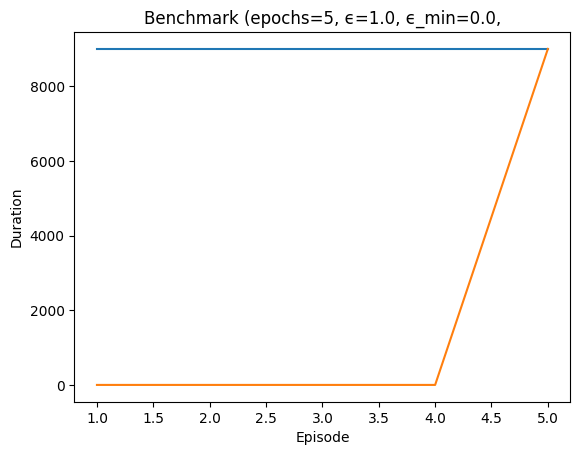

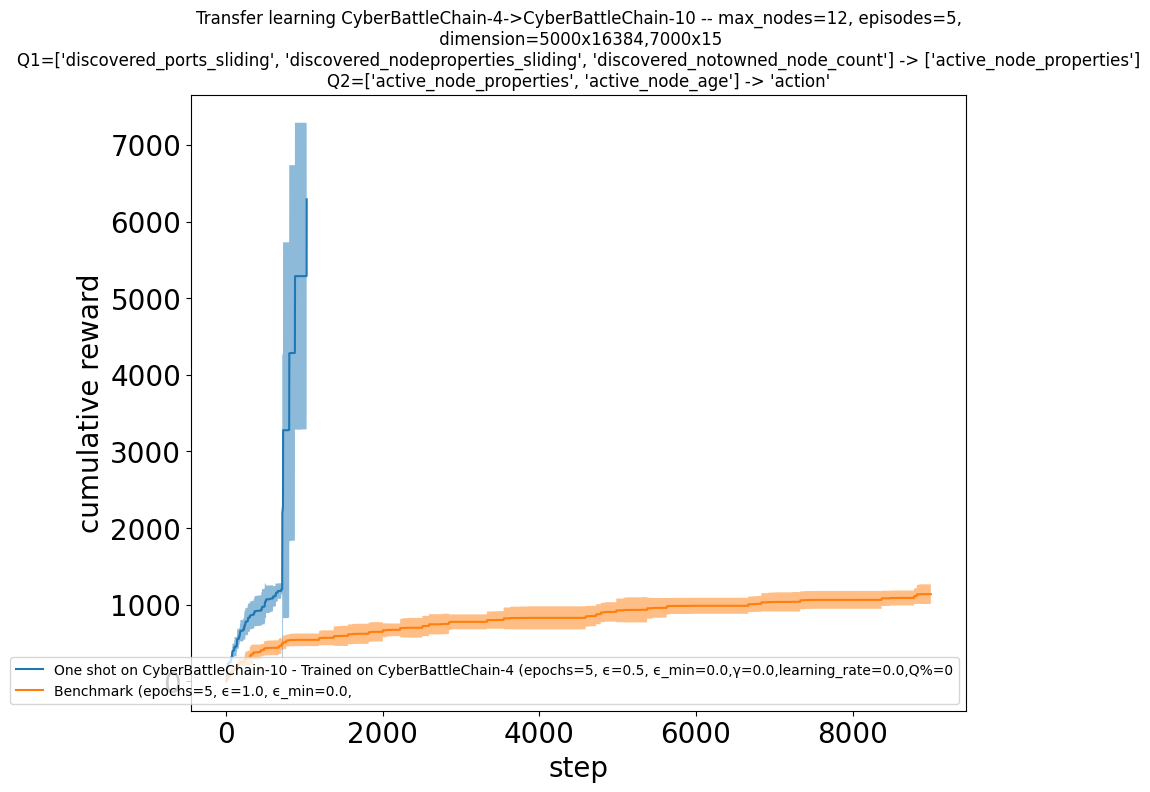

###### One shot on CyberBattleChain-4 - Trained on CyberBattleChain-10
Learning with: episode_count=5,iteration_count=9000,ϵ=0.5,ϵ_min=0.0, γ=0.0,learning_rate=0.0,Q%=0
  ## Episode: 1/5 'One shot on CyberBattleChain-4 - Trained on CyberBattleChain-10' ϵ=0.5000, γ=0.0,learning_rate=0.0,Q%=0


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 4|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 4|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 1|Iteration 7|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 1|Iteration 7|reward:  128.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 1|Iteration 8|reward:  228.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 1|Iteration 8|reward:  228.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 1|Iteration 10|reward:  239.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 1|Iteration 10|reward:  239.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 1|Iteration 14|reward:  248.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 1|Iteration 14|reward:  248.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 1|Iteration 17|reward:  348.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 1|Iteration 17|reward:  348.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 1|Iteration 20|reward:  350.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 1|Iteration 20|reward:  350.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 1|Iteration 22|reward:  352.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 1|Iteration 22|reward:  352.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 1|Iteration 24|reward:  358.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 1|Iteration 24|reward:  358.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 1|Iteration 30|reward:  360.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 1|Iteration 30|reward:  360.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 1|Iteration 51|reward:  366.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 1|Iteration 51|reward:  366.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 1|Iteration 57|reward:  368.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 1|Iteration 57|reward:  368.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 1|Iteration 66|reward:  379.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 1|Iteration 66|reward:  379.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 1|Iteration 82|reward:  385.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 1|Iteration 82|reward:  385.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 1|Iteration 106|reward:  385.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 1|Iteration 132|reward:  385.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 1|Iteration 144|reward:  393.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 1|Iteration 144|reward:  393.0|last_reward_at:  144|Elapsed Time: 0:00:00||

Episode 1|Iteration 148|reward:  402.0|last_reward_at:  144|Elapsed Time: 0:00:00||

Episode 1|Iteration 148|reward:  402.0|last_reward_at:  148|Elapsed Time: 0:00:00||

Episode 1|Iteration 151|reward:  502.0|last_reward_at:  148|Elapsed Time: 0:00:00||

Episode 1|Iteration 151|reward:  502.0|last_reward_at:  151|Elapsed Time: 0:00:00||

Episode 1|Iteration 153|reward:  516.0|last_reward_at:  151|Elapsed Time: 0:00:00||

Episode 1|Iteration 153|reward:  516.0|last_reward_at:  153|Elapsed Time: 0:00:00||

Episode 1|Iteration 156|reward: 5516.0|last_reward_at:  153|Elapsed Time: 0:00:00||

Episode 1|Iteration 156|reward: 5516.0|last_reward_at:  156|Elapsed Time: 0:00:00||

  Episode 1 ended at t=156 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/34 (0.11)
    explore-remote: 7/28 (0.20)
    explore-connect: 1/36 (0.03)
    exploit-local: 3/28 (0.10)
    exploit-remote: 1/10 (0.09)
    exploit-connect: 4/0 (1.00)
  exploit deflected to exploration: 32
  ## Episode: 2/5 'One shot on CyberBattleChain-4 - Trained on CyberBattleChain-10' ϵ=0.5000, γ=0.0,learning_rate=0.0,Q%=0


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:  116.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:  116.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 15|reward:  130.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 15|reward:  130.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 2|Iteration 16|reward:  230.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 2|Iteration 16|reward:  230.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 2|Iteration 25|reward:  241.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 2|Iteration 25|reward:  241.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 2|Iteration 29|reward:  243.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 2|Iteration 29|reward:  243.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 2|Iteration 30|reward:  245.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 2|Iteration 30|reward:  245.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 2|Iteration 39|reward:  251.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 2|Iteration 39|reward:  251.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 2|Iteration 50|reward:  257.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 2|Iteration 50|reward:  257.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 2|Iteration 57|reward:  266.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 2|Iteration 57|reward:  266.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 2|Iteration 58|reward:  366.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 2|Iteration 58|reward:  366.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 2|Iteration 82|reward:  368.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 2|Iteration 82|reward:  368.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 2|Iteration 93|reward:  379.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 2|Iteration 93|reward:  379.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 2|Iteration 94|reward:  387.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 2|Iteration 94|reward:  387.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 2|Iteration 101|reward:  393.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 2|Iteration 101|reward:  393.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 2|Iteration 127|reward:  393.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 2|Iteration 129|reward:  402.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 2|Iteration 129|reward:  402.0|last_reward_at:  129|Elapsed Time: 0:00:00||

Episode 2|Iteration 132|reward:  408.0|last_reward_at:  129|Elapsed Time: 0:00:00||

Episode 2|Iteration 132|reward:  408.0|last_reward_at:  132|Elapsed Time: 0:00:00||

Episode 2|Iteration 133|reward:  508.0|last_reward_at:  132|Elapsed Time: 0:00:00||

Episode 2|Iteration 133|reward:  508.0|last_reward_at:  133|Elapsed Time: 0:00:00||

Episode 2|Iteration 156|reward:  508.0|last_reward_at:  133|Elapsed Time: 0:00:00||

Episode 2|Iteration 168|reward:  522.0|last_reward_at:  133|Elapsed Time: 0:00:00||

Episode 2|Iteration 168|reward:  522.0|last_reward_at:  168|Elapsed Time: 0:00:00||

Episode 2|Iteration 174|reward: 5522.0|last_reward_at:  168|Elapsed Time: 0:00:00||

Episode 2|Iteration 174|reward: 5522.0|last_reward_at:  174|Elapsed Time: 0:00:00||

  Episode 2 ended at t=174 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 7/29 (0.19)
    explore-remote: 6/43 (0.12)
    explore-connect: 0/45 (0.00)
    exploit-local: 1/27 (0.04)
    exploit-remote: 2/9 (0.18)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 44
  ## Episode: 3/5 'One shot on CyberBattleChain-4 - Trained on CyberBattleChain-10' ϵ=0.5000, γ=0.0,learning_rate=0.0,Q%=0


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 14|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 14|reward:  128.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 3|Iteration 16|reward:  228.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 3|Iteration 16|reward:  228.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 3|Iteration 17|reward:  234.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 3|Iteration 17|reward:  234.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 3|Iteration 22|reward:  245.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 3|Iteration 22|reward:  245.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 3|Iteration 25|reward:  254.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 3|Iteration 25|reward:  254.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 3|Iteration 26|reward:  354.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 3|Iteration 26|reward:  354.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 3|Iteration 35|reward:  356.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 3|Iteration 35|reward:  356.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 3|Iteration 38|reward:  358.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 3|Iteration 38|reward:  358.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 3|Iteration 40|reward:  372.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 3|Iteration 40|reward:  372.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 3|Iteration 42|reward:  472.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 3|Iteration 42|reward:  472.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 3|Iteration 43|reward:  483.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 3|Iteration 43|reward:  483.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 3|Iteration 49|reward:  485.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 3|Iteration 49|reward:  485.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 3|Iteration 55|reward:  491.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 3|Iteration 55|reward:  491.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 3|Iteration 59|reward:  497.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 3|Iteration 59|reward:  497.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 3|Iteration 62|reward:  506.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 3|Iteration 62|reward:  506.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 3|Iteration 64|reward: 5506.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 3|Iteration 64|reward: 5506.0|last_reward_at:   64|Elapsed Time: 0:00:00||

  Episode 3 ended at t=64 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 7/13 (0.35)
    explore-remote: 4/11 (0.27)
    explore-connect: 0/12 (0.00)
    exploit-local: 1/6 (0.14)
    exploit-remote: 1/4 (0.20)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 13
  ## Episode: 4/5 'One shot on CyberBattleChain-4 - Trained on CyberBattleChain-10' ϵ=0.5000, γ=0.0,learning_rate=0.0,Q%=0


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 6|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 6|reward:  128.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 4|Iteration 7|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 4|Iteration 7|reward:  228.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 4|Iteration 8|reward:  230.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 4|Iteration 8|reward:  230.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 4|Iteration 14|reward:  236.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 4|Iteration 14|reward:  236.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 4|Iteration 18|reward:  238.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 4|Iteration 18|reward:  238.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 4|Iteration 27|reward:  252.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 4|Iteration 27|reward:  252.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 4|Iteration 28|reward:  352.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 4|Iteration 28|reward:  352.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 4|Iteration 30|reward:  354.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 4|Iteration 30|reward:  354.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 4|Iteration 52|reward:  354.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 4|Iteration 53|reward:  356.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 4|Iteration 53|reward:  356.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 4|Iteration 61|reward:  362.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 4|Iteration 61|reward:  362.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 4|Iteration 69|reward:  368.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 4|Iteration 69|reward:  368.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 4|Iteration 93|reward:  368.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 4|Iteration 100|reward:  374.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 4|Iteration 100|reward:  374.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 4|Iteration 132|reward:  374.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 4|Iteration 142|reward:  388.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 4|Iteration 142|reward:  388.0|last_reward_at:  142|Elapsed Time: 0:00:00||

Episode 4|Iteration 143|reward:  488.0|last_reward_at:  142|Elapsed Time: 0:00:00||

Episode 4|Iteration 143|reward:  488.0|last_reward_at:  143|Elapsed Time: 0:00:00||

Episode 4|Iteration 153|reward:  502.0|last_reward_at:  143|Elapsed Time: 0:00:00||

Episode 4|Iteration 153|reward:  502.0|last_reward_at:  153|Elapsed Time: 0:00:00||

Episode 4|Iteration 154|reward: 5502.0|last_reward_at:  153|Elapsed Time: 0:00:00||

Episode 4|Iteration 154|reward: 5502.0|last_reward_at:  154|Elapsed Time: 0:00:00||

  Episode 4 ended at t=154 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/19 (0.21)
    explore-remote: 4/50 (0.07)
    explore-connect: 0/39 (0.00)
    exploit-local: 2/20 (0.09)
    exploit-remote: 2/8 (0.20)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 46
  ## Episode: 5/5 'One shot on CyberBattleChain-4 - Trained on CyberBattleChain-10' ϵ=0.5000, γ=0.0,learning_rate=0.0,Q%=0


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 5|Iteration 4|reward:  134.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 5|Iteration 4|reward:  134.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 5|Iteration 5|reward:  234.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 5|Iteration 5|reward:  234.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 5|Iteration 6|reward:  240.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 5|Iteration 6|reward:  240.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 5|Iteration 8|reward:  254.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 5|Iteration 8|reward:  254.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 5|Iteration 10|reward:  354.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 5|Iteration 10|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 5|Iteration 12|reward:  356.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 5|Iteration 12|reward:  356.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 5|Iteration 19|reward:  358.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 5|Iteration 19|reward:  358.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 5|Iteration 21|reward:  369.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 5|Iteration 21|reward:  369.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 5|Iteration 24|reward:  371.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 5|Iteration 24|reward:  371.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 5|Iteration 25|reward:  379.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 5|Iteration 25|reward:  379.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 5|Iteration 28|reward:  381.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 5|Iteration 28|reward:  381.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 5|Iteration 38|reward:  387.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 5|Iteration 38|reward:  387.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 5|Iteration 43|reward:  393.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 5|Iteration 43|reward:  393.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 5|Iteration 53|reward:  399.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 5|Iteration 53|reward:  399.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 5|Iteration 76|reward:  399.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 5|Iteration 94|reward:  399.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 5|Iteration 114|reward:  399.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 5|Iteration 115|reward:  408.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 5|Iteration 115|reward:  408.0|last_reward_at:  115|Elapsed Time: 0:00:00||

Episode 5|Iteration 116|reward:  508.0|last_reward_at:  115|Elapsed Time: 0:00:00||

Episode 5|Iteration 116|reward:  508.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 5|Iteration 134|reward:  519.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 5|Iteration 134|reward:  519.0|last_reward_at:  134|Elapsed Time: 0:00:00||

Episode 5|Iteration 153|reward:  528.0|last_reward_at:  134|Elapsed Time: 0:00:00||

Episode 5|Iteration 153|reward:  528.0|last_reward_at:  153|Elapsed Time: 0:00:00||

Episode 5|Iteration 157|reward: 5528.0|last_reward_at:  153|Elapsed Time: 0:00:00||

Episode 5|Iteration 157|reward: 5528.0|last_reward_at:  157|Elapsed Time: 0:00:00||

  Episode 5 ended at t=157 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 7/30 (0.19)
    explore-remote: 7/28 (0.20)
    explore-connect: 0/48 (0.00)
    exploit-local: 2/22 (0.08)
    exploit-remote: 1/7 (0.12)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 41
simulation ended


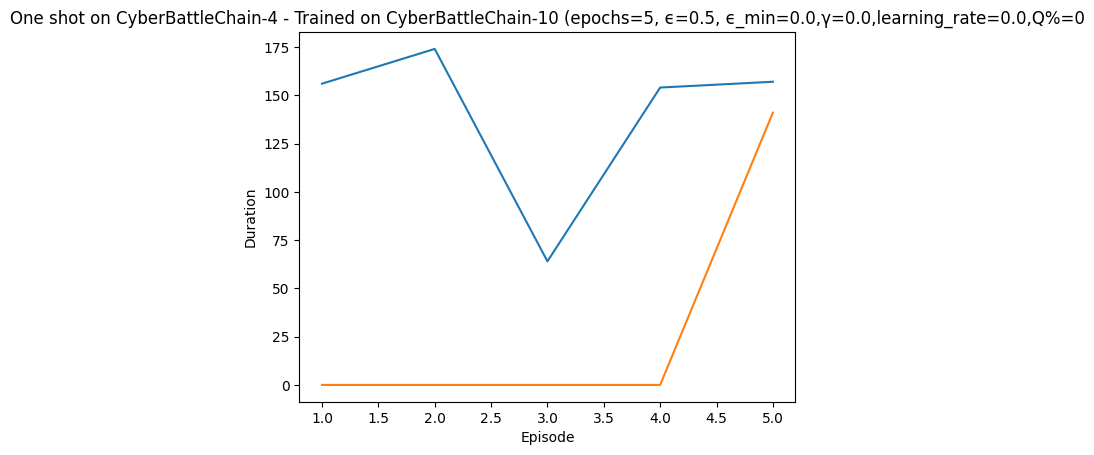

###### Benchmark
Learning with: episode_count=5,iteration_count=9000,ϵ=1.0,ϵ_min=0.0, 
  ## Episode: 1/5 'Benchmark' ϵ=1.0000, 


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 1|Iteration 5|reward:   16.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 1|Iteration 5|reward:   16.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 1|Iteration 11|reward:   20.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 1|Iteration 11|reward:   20.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 1|Iteration 14|reward:  120.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 1|Iteration 14|reward:  120.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 1|Iteration 30|reward:  131.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 1|Iteration 30|reward:  131.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 1|Iteration 32|reward:  137.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 1|Iteration 32|reward:  137.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 1|Iteration 41|reward:  146.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 1|Iteration 41|reward:  146.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 1|Iteration 56|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 1|Iteration 56|reward:  154.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 1|Iteration 83|reward:  254.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 1|Iteration 83|reward:  254.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 1|Iteration 111|reward:  268.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 1|Iteration 111|reward:  268.0|last_reward_at:  111|Elapsed Time: 0:00:00||

Episode 1|Iteration 114|reward:  272.0|last_reward_at:  111|Elapsed Time: 0:00:00||

Episode 1|Iteration 114|reward:  272.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 1|Iteration 145|reward:  274.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 1|Iteration 145|reward:  274.0|last_reward_at:  145|Elapsed Time: 0:00:00||

Episode 1|Iteration 178|reward:  280.0|last_reward_at:  145|Elapsed Time: 0:00:00||

Episode 1|Iteration 178|reward:  280.0|last_reward_at:  178|Elapsed Time: 0:00:00||

Episode 1|Iteration 182|reward:  380.0|last_reward_at:  178|Elapsed Time: 0:00:00||

Episode 1|Iteration 182|reward:  380.0|last_reward_at:  182|Elapsed Time: 0:00:00||

Episode 1|Iteration 194|reward:  394.0|last_reward_at:  182|Elapsed Time: 0:00:00||

Episode 1|Iteration 194|reward:  394.0|last_reward_at:  194|Elapsed Time: 0:00:00||

Episode 1|Iteration 209|reward:  402.0|last_reward_at:  194|Elapsed Time: 0:00:00||

Episode 1|Iteration 209|reward:  402.0|last_reward_at:  209|Elapsed Time: 0:00:00||

Episode 1|Iteration 254|reward:  502.0|last_reward_at:  209|Elapsed Time: 0:00:00||

Episode 1|Iteration 254|reward:  502.0|last_reward_at:  254|Elapsed Time: 0:00:00||

Episode 1|Iteration 281|reward:  508.0|last_reward_at:  254|Elapsed Time: 0:00:00||

Episode 1|Iteration 281|reward:  508.0|last_reward_at:  281|Elapsed Time: 0:00:00||

Episode 1|Iteration 282|reward:  514.0|last_reward_at:  281|Elapsed Time: 0:00:00||

Episode 1|Iteration 282|reward:  514.0|last_reward_at:  282|Elapsed Time: 0:00:00||

Episode 1|Iteration 310|reward:  525.0|last_reward_at:  282|Elapsed Time: 0:00:00||

Episode 1|Iteration 310|reward:  525.0|last_reward_at:  310|Elapsed Time: 0:00:00||

Episode 1|Iteration 394|reward:  525.0|last_reward_at:  310|Elapsed Time: 0:00:00||

Episode 1|Iteration 412|reward:  534.0|last_reward_at:  310|Elapsed Time: 0:00:00||

Episode 1|Iteration 412|reward:  534.0|last_reward_at:  412|Elapsed Time: 0:00:00||

Episode 1|Iteration 456|reward:  534.0|last_reward_at:  412|Elapsed Time: 0:00:00||

Episode 1|Iteration 540|reward:  534.0|last_reward_at:  412|Elapsed Time: 0:00:00||

Episode 1|Iteration 622|reward:  534.0|last_reward_at:  412|Elapsed Time: 0:00:00||

Episode 1|Iteration 684|reward:  534.0|last_reward_at:  412|Elapsed Time: 0:00:00||

Episode 1|Iteration 766|reward:  534.0|last_reward_at:  412|Elapsed Time: 0:00:00||

Episode 1|Iteration 850|reward:  534.0|last_reward_at:  412|Elapsed Time: 0:00:00||

Episode 1|Iteration 912|reward:  534.0|last_reward_at:  412|Elapsed Time: 0:00:01||

Episode 1|Iteration 993|reward:  534.0|last_reward_at:  412|Elapsed Time: 0:00:01||

Episode 1|Iteration 1075|reward:  534.0|last_reward_at:  412|Elapsed Time: 0:00:01||

Episode 1|Iteration 1140|reward:  534.0|last_reward_at:  412|Elapsed Time: 0:00:01||

Episode 1|Iteration 1222|reward:  534.0|last_reward_at:  412|Elapsed Time: 0:00:01||

Episode 1|Iteration 1304|reward:  534.0|last_reward_at:  412|Elapsed Time: 0:00:01||

Episode 1|Iteration 1368|reward:  534.0|last_reward_at:  412|Elapsed Time: 0:00:01||

Episode 1|Iteration 1445|reward:  534.0|last_reward_at:  412|Elapsed Time: 0:00:01||

Episode 1|Iteration 1526|reward:  534.0|last_reward_at:  412|Elapsed Time: 0:00:01||

Episode 1|Iteration 1595|reward:  534.0|last_reward_at:  412|Elapsed Time: 0:00:01||

Episode 1|Iteration 1673|reward:  534.0|last_reward_at:  412|Elapsed Time: 0:00:02||

Episode 1|Iteration 1751|reward:  534.0|last_reward_at:  412|Elapsed Time: 0:00:02||

Episode 1|Iteration 1823|reward:  534.0|last_reward_at:  412|Elapsed Time: 0:00:02||

Episode 1|Iteration 1902|reward:  534.0|last_reward_at:  412|Elapsed Time: 0:00:02||

Episode 1|Iteration 1983|reward:  534.0|last_reward_at:  412|Elapsed Time: 0:00:02||

Episode 1|Iteration 2051|reward:  534.0|last_reward_at:  412|Elapsed Time: 0:00:02||

Episode 1|Iteration 2129|reward:  534.0|last_reward_at:  412|Elapsed Time: 0:00:02||

Episode 1|Iteration 2207|reward:  534.0|last_reward_at:  412|Elapsed Time: 0:00:02||

Episode 1|Iteration 2279|reward:  534.0|last_reward_at:  412|Elapsed Time: 0:00:02||

Episode 1|Iteration 2357|reward:  534.0|last_reward_at:  412|Elapsed Time: 0:00:02||

Episode 1|Iteration 2435|reward:  534.0|last_reward_at:  412|Elapsed Time: 0:00:02||

Episode 1|Iteration 2507|reward:  534.0|last_reward_at:  412|Elapsed Time: 0:00:03||

Episode 1|Iteration 2584|reward:  534.0|last_reward_at:  412|Elapsed Time: 0:00:03||

Episode 1|Iteration 2661|reward:  534.0|last_reward_at:  412|Elapsed Time: 0:00:03||

Episode 1|Iteration 2713|reward: 5534.0|last_reward_at:  412|Elapsed Time: 0:00:03||

Episode 1|Iteration 2713|reward: 5534.0|last_reward_at: 2713|Elapsed Time: 0:00:03||

  Episode 1 ended at t=2713 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/728 (0.01)
    explore-remote: 8/996 (0.01)
    explore-connect: 5/967 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 2/5 'Benchmark' ϵ=1.0000, 


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:   18.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 7|reward:   20.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 7|reward:   20.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 2|Iteration 74|reward:  120.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 2|Iteration 74|reward:  120.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 2|Iteration 132|reward:  134.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 2|Iteration 132|reward:  134.0|last_reward_at:  132|Elapsed Time: 0:00:00||

Episode 2|Iteration 142|reward:  140.0|last_reward_at:  132|Elapsed Time: 0:00:00||

Episode 2|Iteration 142|reward:  140.0|last_reward_at:  142|Elapsed Time: 0:00:00||

Episode 2|Iteration 148|reward:  148.0|last_reward_at:  142|Elapsed Time: 0:00:00||

Episode 2|Iteration 148|reward:  148.0|last_reward_at:  148|Elapsed Time: 0:00:00||

Episode 2|Iteration 157|reward:  248.0|last_reward_at:  148|Elapsed Time: 0:00:00||

Episode 2|Iteration 157|reward:  248.0|last_reward_at:  157|Elapsed Time: 0:00:00||

Episode 2|Iteration 180|reward:  262.0|last_reward_at:  157|Elapsed Time: 0:00:00||

Episode 2|Iteration 180|reward:  262.0|last_reward_at:  180|Elapsed Time: 0:00:00||

Episode 2|Iteration 181|reward:  266.0|last_reward_at:  180|Elapsed Time: 0:00:00||

Episode 2|Iteration 181|reward:  266.0|last_reward_at:  181|Elapsed Time: 0:00:00||

Episode 2|Iteration 184|reward:  272.0|last_reward_at:  181|Elapsed Time: 0:00:00||

Episode 2|Iteration 184|reward:  272.0|last_reward_at:  184|Elapsed Time: 0:00:00||

Episode 2|Iteration 211|reward:  274.0|last_reward_at:  184|Elapsed Time: 0:00:00||

Episode 2|Iteration 211|reward:  274.0|last_reward_at:  211|Elapsed Time: 0:00:00||

Episode 2|Iteration 256|reward:  374.0|last_reward_at:  211|Elapsed Time: 0:00:00||

Episode 2|Iteration 256|reward:  374.0|last_reward_at:  256|Elapsed Time: 0:00:00||

Episode 2|Iteration 283|reward:  388.0|last_reward_at:  256|Elapsed Time: 0:00:00||

Episode 2|Iteration 283|reward:  388.0|last_reward_at:  283|Elapsed Time: 0:00:00||

Episode 2|Iteration 286|reward:  394.0|last_reward_at:  283|Elapsed Time: 0:00:00||

Episode 2|Iteration 286|reward:  394.0|last_reward_at:  286|Elapsed Time: 0:00:00||

Episode 2|Iteration 291|reward:  402.0|last_reward_at:  286|Elapsed Time: 0:00:00||

Episode 2|Iteration 291|reward:  402.0|last_reward_at:  291|Elapsed Time: 0:00:00||

Episode 2|Iteration 308|reward:  408.0|last_reward_at:  291|Elapsed Time: 0:00:00||

Episode 2|Iteration 308|reward:  408.0|last_reward_at:  308|Elapsed Time: 0:00:00||

Episode 2|Iteration 310|reward:  414.0|last_reward_at:  308|Elapsed Time: 0:00:00||

Episode 2|Iteration 310|reward:  414.0|last_reward_at:  310|Elapsed Time: 0:00:00||

Episode 2|Iteration 394|reward:  414.0|last_reward_at:  310|Elapsed Time: 0:00:00||

Episode 2|Iteration 446|reward:  514.0|last_reward_at:  310|Elapsed Time: 0:00:00||

Episode 2|Iteration 446|reward:  514.0|last_reward_at:  446|Elapsed Time: 0:00:00||

Episode 2|Iteration 534|reward:  514.0|last_reward_at:  446|Elapsed Time: 0:00:00||

Episode 2|Iteration 578|reward:  528.0|last_reward_at:  446|Elapsed Time: 0:00:00||

Episode 2|Iteration 578|reward:  528.0|last_reward_at:  578|Elapsed Time: 0:00:00||

Episode 2|Iteration 598|reward:  534.0|last_reward_at:  578|Elapsed Time: 0:00:00||

Episode 2|Iteration 598|reward:  534.0|last_reward_at:  598|Elapsed Time: 0:00:00||

Episode 2|Iteration 680|reward:  534.0|last_reward_at:  598|Elapsed Time: 0:00:00||

Episode 2|Iteration 762|reward:  534.0|last_reward_at:  598|Elapsed Time: 0:00:00||

Episode 2|Iteration 846|reward:  534.0|last_reward_at:  598|Elapsed Time: 0:00:00||

Episode 2|Iteration 912|reward:  534.0|last_reward_at:  598|Elapsed Time: 0:00:01||

Episode 2|Iteration 993|reward:  534.0|last_reward_at:  598|Elapsed Time: 0:00:01||

Episode 2|Iteration 1075|reward:  534.0|last_reward_at:  598|Elapsed Time: 0:00:01||

Episode 2|Iteration 1097|reward: 5534.0|last_reward_at:  598|Elapsed Time: 0:00:01||

Episode 2|Iteration 1097|reward: 5534.0|last_reward_at: 1097|Elapsed Time: 0:00:01||

  Episode 2 ended at t=1097 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/281 (0.03)
    explore-remote: 8/391 (0.02)
    explore-connect: 5/403 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 3/5 'Benchmark' ϵ=1.0000, 


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 4|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 4|reward:   14.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 11|reward:   18.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 11|reward:   18.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 3|Iteration 13|reward:   20.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 3|Iteration 13|reward:   20.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 3|Iteration 20|reward:  120.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 3|Iteration 20|reward:  120.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 3|Iteration 34|reward:  131.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 3|Iteration 34|reward:  131.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 3|Iteration 39|reward:  139.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 3|Iteration 39|reward:  139.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 3|Iteration 50|reward:  148.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 3|Iteration 50|reward:  148.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 3|Iteration 60|reward:  154.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 3|Iteration 60|reward:  154.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 3|Iteration 165|reward:  254.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 3|Iteration 165|reward:  254.0|last_reward_at:  165|Elapsed Time: 0:00:00||

Episode 3|Iteration 171|reward:  268.0|last_reward_at:  165|Elapsed Time: 0:00:00||

Episode 3|Iteration 171|reward:  268.0|last_reward_at:  171|Elapsed Time: 0:00:00||

Episode 3|Iteration 181|reward:  270.0|last_reward_at:  171|Elapsed Time: 0:00:00||

Episode 3|Iteration 181|reward:  270.0|last_reward_at:  181|Elapsed Time: 0:00:00||

Episode 3|Iteration 191|reward:  274.0|last_reward_at:  181|Elapsed Time: 0:00:00||

Episode 3|Iteration 191|reward:  274.0|last_reward_at:  191|Elapsed Time: 0:00:00||

Episode 3|Iteration 228|reward:  280.0|last_reward_at:  191|Elapsed Time: 0:00:00||

Episode 3|Iteration 228|reward:  280.0|last_reward_at:  228|Elapsed Time: 0:00:00||

Episode 3|Iteration 257|reward:  380.0|last_reward_at:  228|Elapsed Time: 0:00:00||

Episode 3|Iteration 257|reward:  380.0|last_reward_at:  257|Elapsed Time: 0:00:00||

Episode 3|Iteration 261|reward:  394.0|last_reward_at:  257|Elapsed Time: 0:00:00||

Episode 3|Iteration 261|reward:  394.0|last_reward_at:  261|Elapsed Time: 0:00:00||

Episode 3|Iteration 263|reward:  402.0|last_reward_at:  261|Elapsed Time: 0:00:00||

Episode 3|Iteration 263|reward:  402.0|last_reward_at:  263|Elapsed Time: 0:00:00||

Episode 3|Iteration 302|reward:  408.0|last_reward_at:  263|Elapsed Time: 0:00:00||

Episode 3|Iteration 302|reward:  408.0|last_reward_at:  302|Elapsed Time: 0:00:00||

Episode 3|Iteration 393|reward:  408.0|last_reward_at:  302|Elapsed Time: 0:00:00||

Episode 3|Iteration 406|reward:  414.0|last_reward_at:  302|Elapsed Time: 0:00:00||

Episode 3|Iteration 406|reward:  414.0|last_reward_at:  406|Elapsed Time: 0:00:00||

Episode 3|Iteration 456|reward:  414.0|last_reward_at:  406|Elapsed Time: 0:00:00||

Episode 3|Iteration 547|reward:  414.0|last_reward_at:  406|Elapsed Time: 0:00:00||

Episode 3|Iteration 637|reward:  414.0|last_reward_at:  406|Elapsed Time: 0:00:00||

Episode 3|Iteration 684|reward:  414.0|last_reward_at:  406|Elapsed Time: 0:00:00||

Episode 3|Iteration 774|reward:  414.0|last_reward_at:  406|Elapsed Time: 0:00:00||

Episode 3|Iteration 865|reward:  414.0|last_reward_at:  406|Elapsed Time: 0:00:00||

Episode 3|Iteration 912|reward:  414.0|last_reward_at:  406|Elapsed Time: 0:00:00||

Episode 3|Iteration 1001|reward:  414.0|last_reward_at:  406|Elapsed Time: 0:00:01||

Episode 3|Iteration 1084|reward:  414.0|last_reward_at:  406|Elapsed Time: 0:00:01||

Episode 3|Iteration 1140|reward:  414.0|last_reward_at:  406|Elapsed Time: 0:00:01||

Episode 3|Iteration 1226|reward:  414.0|last_reward_at:  406|Elapsed Time: 0:00:01||

Episode 3|Iteration 1313|reward:  414.0|last_reward_at:  406|Elapsed Time: 0:00:01||

Episode 3|Iteration 1368|reward:  414.0|last_reward_at:  406|Elapsed Time: 0:00:01||

Episode 3|Iteration 1455|reward:  414.0|last_reward_at:  406|Elapsed Time: 0:00:01||

Episode 3|Iteration 1542|reward:  414.0|last_reward_at:  406|Elapsed Time: 0:00:01||

Episode 3|Iteration 1595|reward:  414.0|last_reward_at:  406|Elapsed Time: 0:00:01||

Episode 3|Iteration 1649|reward:  514.0|last_reward_at:  406|Elapsed Time: 0:00:01||

Episode 3|Iteration 1649|reward:  514.0|last_reward_at: 1649|Elapsed Time: 0:00:01||

Episode 3|Iteration 1708|reward:  525.0|last_reward_at: 1649|Elapsed Time: 0:00:01||

Episode 3|Iteration 1708|reward:  525.0|last_reward_at: 1708|Elapsed Time: 0:00:01||

Episode 3|Iteration 1768|reward:  534.0|last_reward_at: 1708|Elapsed Time: 0:00:01||

Episode 3|Iteration 1768|reward:  534.0|last_reward_at: 1768|Elapsed Time: 0:00:01||

Episode 3|Iteration 1823|reward:  534.0|last_reward_at: 1768|Elapsed Time: 0:00:02||

Episode 3|Iteration 1896|reward:  534.0|last_reward_at: 1768|Elapsed Time: 0:00:02||

Episode 3|Iteration 1937|reward:  534.0|last_reward_at: 1768|Elapsed Time: 0:00:02||

Episode 3|Iteration 2015|reward:  534.0|last_reward_at: 1768|Elapsed Time: 0:00:02||

Episode 3|Iteration 2094|reward:  534.0|last_reward_at: 1768|Elapsed Time: 0:00:02||

Episode 3|Iteration 2165|reward:  534.0|last_reward_at: 1768|Elapsed Time: 0:00:02||

Episode 3|Iteration 2242|reward:  534.0|last_reward_at: 1768|Elapsed Time: 0:00:02||

Episode 3|Iteration 2320|reward:  534.0|last_reward_at: 1768|Elapsed Time: 0:00:02||

Episode 3|Iteration 2393|reward:  534.0|last_reward_at: 1768|Elapsed Time: 0:00:02||

Episode 3|Iteration 2470|reward:  534.0|last_reward_at: 1768|Elapsed Time: 0:00:02||

Episode 3|Iteration 2507|reward:  534.0|last_reward_at: 1768|Elapsed Time: 0:00:02||

Episode 3|Iteration 2582|reward:  534.0|last_reward_at: 1768|Elapsed Time: 0:00:03||

Episode 3|Iteration 2621|reward:  534.0|last_reward_at: 1768|Elapsed Time: 0:00:03||

Episode 3|Iteration 2693|reward:  534.0|last_reward_at: 1768|Elapsed Time: 0:00:03||

Episode 3|Iteration 2735|reward:  534.0|last_reward_at: 1768|Elapsed Time: 0:00:03||

Episode 3|Iteration 2812|reward:  534.0|last_reward_at: 1768|Elapsed Time: 0:00:03||

Episode 3|Iteration 2889|reward: 5534.0|last_reward_at: 1768|Elapsed Time: 0:00:03||

Episode 3|Iteration 2889|reward: 5534.0|last_reward_at: 2889|Elapsed Time: 0:00:03||

  Episode 3 ended at t=2889 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/728 (0.01)
    explore-remote: 8/1060 (0.01)
    explore-connect: 5/1079 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 4/5 'Benchmark' ϵ=1.0000, 


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 28|reward:   16.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 28|reward:   16.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 4|Iteration 29|reward:   20.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 4|Iteration 29|reward:   20.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 4|Iteration 55|reward:  120.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 4|Iteration 55|reward:  120.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 4|Iteration 107|reward:  134.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 4|Iteration 107|reward:  134.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 4|Iteration 108|reward:  140.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 4|Iteration 108|reward:  140.0|last_reward_at:  108|Elapsed Time: 0:00:00||

Episode 4|Iteration 111|reward:  146.0|last_reward_at:  108|Elapsed Time: 0:00:00||

Episode 4|Iteration 111|reward:  146.0|last_reward_at:  111|Elapsed Time: 0:00:00||

Episode 4|Iteration 128|reward:  154.0|last_reward_at:  111|Elapsed Time: 0:00:00||

Episode 4|Iteration 128|reward:  154.0|last_reward_at:  128|Elapsed Time: 0:00:00||

Episode 4|Iteration 154|reward:  254.0|last_reward_at:  128|Elapsed Time: 0:00:00||

Episode 4|Iteration 154|reward:  254.0|last_reward_at:  154|Elapsed Time: 0:00:00||

Episode 4|Iteration 159|reward:  265.0|last_reward_at:  154|Elapsed Time: 0:00:00||

Episode 4|Iteration 159|reward:  265.0|last_reward_at:  159|Elapsed Time: 0:00:00||

Episode 4|Iteration 160|reward:  267.0|last_reward_at:  159|Elapsed Time: 0:00:00||

Episode 4|Iteration 160|reward:  267.0|last_reward_at:  160|Elapsed Time: 0:00:00||

Episode 4|Iteration 173|reward:  276.0|last_reward_at:  160|Elapsed Time: 0:00:00||

Episode 4|Iteration 173|reward:  276.0|last_reward_at:  173|Elapsed Time: 0:00:00||

Episode 4|Iteration 190|reward:  280.0|last_reward_at:  173|Elapsed Time: 0:00:00||

Episode 4|Iteration 190|reward:  280.0|last_reward_at:  190|Elapsed Time: 0:00:00||

Episode 4|Iteration 296|reward:  280.0|last_reward_at:  190|Elapsed Time: 0:00:00||

Episode 4|Iteration 402|reward:  280.0|last_reward_at:  190|Elapsed Time: 0:00:00||

Episode 4|Iteration 511|reward:  280.0|last_reward_at:  190|Elapsed Time: 0:00:00||

Episode 4|Iteration 514|reward:  380.0|last_reward_at:  190|Elapsed Time: 0:00:00||

Episode 4|Iteration 514|reward:  380.0|last_reward_at:  514|Elapsed Time: 0:00:00||

Episode 4|Iteration 543|reward:  394.0|last_reward_at:  514|Elapsed Time: 0:00:00||

Episode 4|Iteration 543|reward:  394.0|last_reward_at:  543|Elapsed Time: 0:00:00||

Episode 4|Iteration 564|reward:  400.0|last_reward_at:  543|Elapsed Time: 0:00:00||

Episode 4|Iteration 564|reward:  400.0|last_reward_at:  564|Elapsed Time: 0:00:00||

Episode 4|Iteration 567|reward:  406.0|last_reward_at:  564|Elapsed Time: 0:00:00||

Episode 4|Iteration 567|reward:  406.0|last_reward_at:  567|Elapsed Time: 0:00:00||

Episode 4|Iteration 587|reward:  414.0|last_reward_at:  567|Elapsed Time: 0:00:00||

Episode 4|Iteration 587|reward:  414.0|last_reward_at:  587|Elapsed Time: 0:00:00||

Episode 4|Iteration 672|reward:  414.0|last_reward_at:  587|Elapsed Time: 0:00:00||

Episode 4|Iteration 685|reward:  514.0|last_reward_at:  587|Elapsed Time: 0:00:00||

Episode 4|Iteration 685|reward:  514.0|last_reward_at:  685|Elapsed Time: 0:00:00||

Episode 4|Iteration 718|reward:  525.0|last_reward_at:  685|Elapsed Time: 0:00:00||

Episode 4|Iteration 718|reward:  525.0|last_reward_at:  718|Elapsed Time: 0:00:00||

Episode 4|Iteration 763|reward:  534.0|last_reward_at:  718|Elapsed Time: 0:00:00||

Episode 4|Iteration 763|reward:  534.0|last_reward_at:  763|Elapsed Time: 0:00:00||

Episode 4|Iteration 845|reward:  534.0|last_reward_at:  763|Elapsed Time: 0:00:00||

Episode 4|Iteration 912|reward:  534.0|last_reward_at:  763|Elapsed Time: 0:00:00||

Episode 4|Iteration 993|reward:  534.0|last_reward_at:  763|Elapsed Time: 0:00:01||

Episode 4|Iteration 1074|reward:  534.0|last_reward_at:  763|Elapsed Time: 0:00:01||

Episode 4|Iteration 1140|reward:  534.0|last_reward_at:  763|Elapsed Time: 0:00:01||

Episode 4|Iteration 1219|reward:  534.0|last_reward_at:  763|Elapsed Time: 0:00:01||

Episode 4|Iteration 1301|reward:  534.0|last_reward_at:  763|Elapsed Time: 0:00:01||

Episode 4|Iteration 1368|reward:  534.0|last_reward_at:  763|Elapsed Time: 0:00:01||

Episode 4|Iteration 1448|reward:  534.0|last_reward_at:  763|Elapsed Time: 0:00:01||

Episode 4|Iteration 1525|reward:  534.0|last_reward_at:  763|Elapsed Time: 0:00:01||

Episode 4|Iteration 1595|reward:  534.0|last_reward_at:  763|Elapsed Time: 0:00:01||

Episode 4|Iteration 1674|reward:  534.0|last_reward_at:  763|Elapsed Time: 0:00:01||

Episode 4|Iteration 1753|reward:  534.0|last_reward_at:  763|Elapsed Time: 0:00:02||

Episode 4|Iteration 1823|reward:  534.0|last_reward_at:  763|Elapsed Time: 0:00:02||

Episode 4|Iteration 1901|reward:  534.0|last_reward_at:  763|Elapsed Time: 0:00:02||

Episode 4|Iteration 1979|reward:  534.0|last_reward_at:  763|Elapsed Time: 0:00:02||

Episode 4|Iteration 2051|reward:  534.0|last_reward_at:  763|Elapsed Time: 0:00:02||

Episode 4|Iteration 2122|reward:  534.0|last_reward_at:  763|Elapsed Time: 0:00:02||

Episode 4|Iteration 2165|reward:  534.0|last_reward_at:  763|Elapsed Time: 0:00:02||

Episode 4|Iteration 2241|reward:  534.0|last_reward_at:  763|Elapsed Time: 0:00:02||

Episode 4|Iteration 2279|reward:  534.0|last_reward_at:  763|Elapsed Time: 0:00:02||

Episode 4|Iteration 2356|reward:  534.0|last_reward_at:  763|Elapsed Time: 0:00:02||

Episode 4|Iteration 2433|reward:  534.0|last_reward_at:  763|Elapsed Time: 0:00:02||

Episode 4|Iteration 2507|reward:  534.0|last_reward_at:  763|Elapsed Time: 0:00:03||

Episode 4|Iteration 2556|reward: 5534.0|last_reward_at:  763|Elapsed Time: 0:00:03||

Episode 4|Iteration 2556|reward: 5534.0|last_reward_at: 2556|Elapsed Time: 0:00:03||

  Episode 4 ended at t=2556 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/697 (0.01)
    explore-remote: 8/923 (0.01)
    explore-connect: 5/914 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 5/5 'Benchmark' ϵ=1.0000, 


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 3|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 3|reward:   18.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 5|Iteration 4|reward:   20.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 5|Iteration 4|reward:   20.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 5|Iteration 16|reward:  120.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 5|Iteration 16|reward:  120.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 5|Iteration 19|reward:  131.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 5|Iteration 19|reward:  131.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 5|Iteration 26|reward:  140.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 5|Iteration 26|reward:  140.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 5|Iteration 34|reward:  148.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 5|Iteration 34|reward:  148.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 5|Iteration 36|reward:  154.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 5|Iteration 36|reward:  154.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 5|Iteration 114|reward:  154.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 5|Iteration 169|reward:  254.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 5|Iteration 169|reward:  254.0|last_reward_at:  169|Elapsed Time: 0:00:00||

Episode 5|Iteration 202|reward:  268.0|last_reward_at:  169|Elapsed Time: 0:00:00||

Episode 5|Iteration 202|reward:  268.0|last_reward_at:  202|Elapsed Time: 0:00:00||

Episode 5|Iteration 203|reward:  270.0|last_reward_at:  202|Elapsed Time: 0:00:00||

Episode 5|Iteration 203|reward:  270.0|last_reward_at:  203|Elapsed Time: 0:00:00||

Episode 5|Iteration 212|reward:  274.0|last_reward_at:  203|Elapsed Time: 0:00:00||

Episode 5|Iteration 212|reward:  274.0|last_reward_at:  212|Elapsed Time: 0:00:00||

Episode 5|Iteration 317|reward:  274.0|last_reward_at:  212|Elapsed Time: 0:00:00||

Episode 5|Iteration 415|reward:  274.0|last_reward_at:  212|Elapsed Time: 0:00:00||

Episode 5|Iteration 445|reward:  374.0|last_reward_at:  212|Elapsed Time: 0:00:00||

Episode 5|Iteration 445|reward:  374.0|last_reward_at:  445|Elapsed Time: 0:00:00||

Episode 5|Iteration 506|reward:  388.0|last_reward_at:  445|Elapsed Time: 0:00:00||

Episode 5|Iteration 506|reward:  388.0|last_reward_at:  506|Elapsed Time: 0:00:00||

Episode 5|Iteration 538|reward:  394.0|last_reward_at:  506|Elapsed Time: 0:00:00||

Episode 5|Iteration 538|reward:  394.0|last_reward_at:  538|Elapsed Time: 0:00:00||

Episode 5|Iteration 547|reward:  402.0|last_reward_at:  538|Elapsed Time: 0:00:00||

Episode 5|Iteration 547|reward:  402.0|last_reward_at:  547|Elapsed Time: 0:00:00||

Episode 5|Iteration 592|reward:  408.0|last_reward_at:  547|Elapsed Time: 0:00:00||

Episode 5|Iteration 592|reward:  408.0|last_reward_at:  592|Elapsed Time: 0:00:00||

Episode 5|Iteration 610|reward:  414.0|last_reward_at:  592|Elapsed Time: 0:00:00||

Episode 5|Iteration 610|reward:  414.0|last_reward_at:  610|Elapsed Time: 0:00:00||

Episode 5|Iteration 684|reward:  414.0|last_reward_at:  610|Elapsed Time: 0:00:00||

Episode 5|Iteration 772|reward:  414.0|last_reward_at:  610|Elapsed Time: 0:00:00||

Episode 5|Iteration 861|reward:  414.0|last_reward_at:  610|Elapsed Time: 0:00:00||

Episode 5|Iteration 912|reward:  414.0|last_reward_at:  610|Elapsed Time: 0:00:00||

Episode 5|Iteration 981|reward:  514.0|last_reward_at:  610|Elapsed Time: 0:00:01||

Episode 5|Iteration 981|reward:  514.0|last_reward_at:  981|Elapsed Time: 0:00:01||

Episode 5|Iteration 1015|reward:  528.0|last_reward_at:  981|Elapsed Time: 0:00:01||

Episode 5|Iteration 1015|reward:  528.0|last_reward_at: 1015|Elapsed Time: 0:00:01||

Episode 5|Iteration 1060|reward:  534.0|last_reward_at: 1015|Elapsed Time: 0:00:01||

Episode 5|Iteration 1060|reward:  534.0|last_reward_at: 1060|Elapsed Time: 0:00:01||

Episode 5|Iteration 1139|reward:  534.0|last_reward_at: 1060|Elapsed Time: 0:00:01||

Episode 5|Iteration 1222|reward:  534.0|last_reward_at: 1060|Elapsed Time: 0:00:01||

Episode 5|Iteration 1239|reward: 5534.0|last_reward_at: 1060|Elapsed Time: 0:00:01||

Episode 5|Iteration 1239|reward: 5534.0|last_reward_at: 1239|Elapsed Time: 0:00:01||

  Episode 5 ended at t=1239 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/318 (0.03)
    explore-remote: 8/440 (0.02)
    explore-connect: 5/459 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
simulation ended


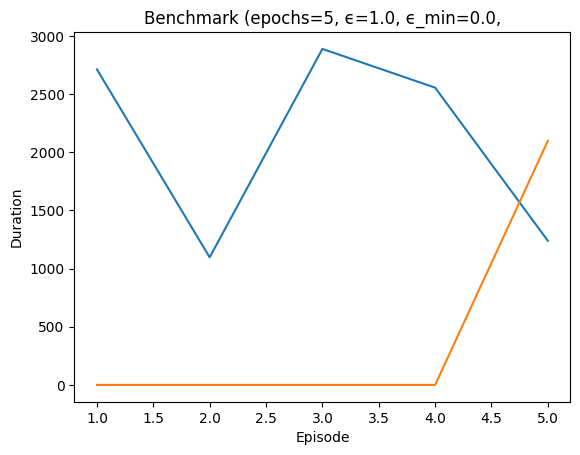

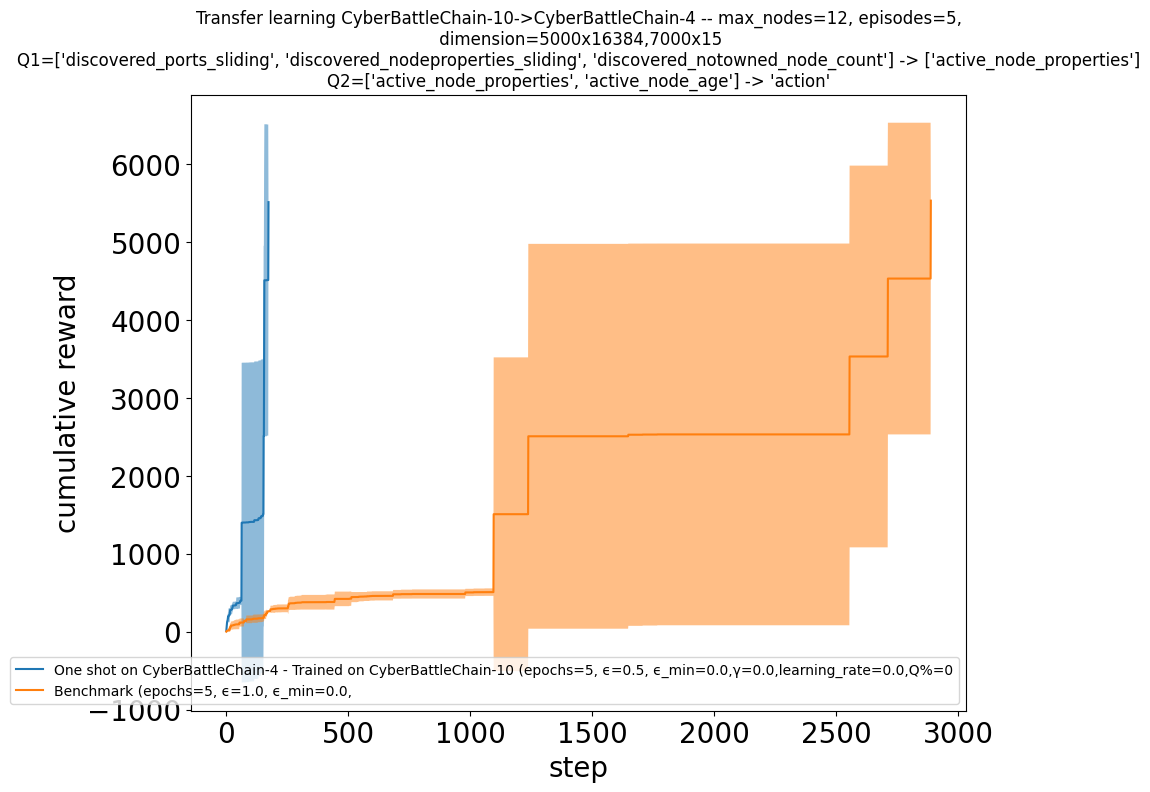

In [20]:
# Train Q-matrix on CyberBattle network of size 4
cyberbattlechain_4 = gym.make("CyberBattleChain-v0", size=4, attacker_goal=AttackerGoal(own_atleast_percent=1.0)).unwrapped
assert isinstance(cyberbattlechain_4, cyberbattle_env.CyberBattleEnv)

qlearning_bestrun_4 = qlearning_run(0.015, gym_env=cyberbattlechain_4)


def stop_learning(trained_learner):
    return TrainedLearner(
        learner=a.QTabularLearner(ep, gamma=0.0, learning_rate=0.0, exploit_percentile=0, trained=trained_learner["learner"]),
        title=trained_learner["title"],
        trained_on=trained_learner["trained_on"],
        all_episodes_rewards=trained_learner["all_episodes_rewards"],
        all_episodes_availability=trained_learner["all_episodes_availability"],
    )


learner.transfer_learning_evaluation(
    environment_properties=ep,
    trained_learner=stop_learning(qlearning_bestrun_4),
    eval_env=cyberbattlechain_10,
    eval_epsilon=0.5,  # alternate with exploration to help generalization to bigger network
    eval_episode_count=eval_episode_count,
    iteration_count=iteration_count,
)

learner.transfer_learning_evaluation(
    environment_properties=ep,
    trained_learner=stop_learning(qlearning_bestrun_10),
    eval_env=cyberbattlechain_4,
    eval_epsilon=0.5,
    eval_episode_count=eval_episode_count,
    iteration_count=iteration_count,
)